In [1]:
%pylab inline
import pandas as pd
import sys
import gc
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
DAY=int(os.environ["THE_DAY"])

In [3]:
print "the day", DAY

the day 2


In [4]:
dim=(54, 4100, 1704)
def get_series(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==dim
    return b
def get_series2(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==(4100, 54, 1704)
    return b  
def s_lag(arr,lag=1):
    l,m,n=arr.shape
    assert lag>0 and lag<n
    a=arr[:,:,:-lag]
    b=np.empty(shape=[l,m,lag],dtype=arr.dtype)
    b.fill(np.nan)
    ba=np.concatenate([b,a],axis=2)
    assert ba.shape==arr.shape
    assert ba.dtype==arr.dtype
    return ba    

In [5]:
cat_lag_features={
 "city_0",
  "class_0",
  "cluster_0",
  "family_0",
  "state_0",
  "type_0",

 'city_mv36',
 'class_mv36',
 'cluster_mv36',
 'family_mv36',
 'state_mv36',
 'type_mv36',    
 
 'item_mean_0',
 'store_mean_0',
 }
cat_features={
 'holiday_0',
 #'onpromotion_0',
 'wage_0',
 'd900'
 }
oil_features={'oil_0', 'oil_d1', 'oil_d10', 'oil_d15', 'oil_d3', 'oil_d5'}
sales_ma_features={'sales_ma_112',
 'sales_ma_14',
 'sales_ma_224',
 'sales_ma_28',
 'sales_ma_3',
 'sales_ma_56',
 'sales_ma_7'}
sales_season_ma_features={'sales_week_season_ma_p13',
 'sales_week_season_ma_p2',
 'sales_week_season_ma_p3',
 'sales_week_season_ma_p4',
 'sales_week_season_ma_p7'}

#move x, fix y
def _get_feature(name,lag=0,offset=0):
    if name in cat_lag_features :
        assert lag == 0
        if name in ['item_mean_0','class_mv36','family_mv36','class_0','family_0']:
            s=get_series2(name)
        else:
            s=get_series(name)
        return s_lag(s,offset)
    if name in cat_features or name in oil_features:
        assert offset==0 and lag==0
        s= get_series(name)
        if name =='holiday_0': s[np.isnan(s)]=0
        return s
    if name =="y_0" or name in sales_ma_features or name in sales_season_ma_features:
        #assert  lag == 0
        s=get_series(name)
        if offset==0 and lag==0: return s
        return s_lag(s,lag=offset+lag)
def get_feature(name,lag=0,offset=0):
    s=_get_feature(name=name,lag=lag,offset=offset)
    if s.shape == ( 4100,54, 1704):
        s=np.rollaxis(s,1,0)
    assert s.shape==(54, 4100, 1704), s.shape
    return s
def get_all_features(offset=1):
    assert offset>0
    all_features=[]
    for name in cat_lag_features:
        all_features.append({"name":name,"lag":0,"offset":offset})
    for name in cat_features:
        all_features.append({"name":name,"lag":0,"offset":0})   
#     for name in oil_features:
#         all_features.append({"name":name,"lag":0,"offset":0})  
    for i in range(0,7):
        all_features.append({"name":"y_0","lag":i ,"offset":offset})  
    for name in sales_ma_features:
        all_features.append({"name":name,"lag":0,"offset":offset})  
    for name in sales_season_ma_features:
        all_features.append({"name":name,"lag":(700-offset)%7,"offset":offset})
#     for i in range(1,8):
#         all_features.append({"name":"oil_0","lag":i,"offset":offset})              
    return all_features    
def calc_feature(feat):
    return get_feature(**feat)
def col_name(feat):
    return "{}-lag{}-offset{}".format(feat['name'],feat['lag'],feat['offset'])
def get_train_test(day):
    assert(day>0)
    cols=[]
    train_lst=[]
    
    for feat in get_all_features(day):
        col=col_name(feat)
        print col,
        arr=calc_feature(feat).astype(np.float16)
        train_lst.append(arr)
        cols.append(col)
        gc.collect()
        #break
    return cols,  np.array(train_lst)

In [6]:
def read_data(day):
    print "read data for day", day
    dirname='../input/d'+str(day)+"/"
    y=get_series('y_0')
    cols,train_test=get_train_test(day)
    cols=np.array(cols)    
    train_test=np.rollaxis(train_test,0,4)
    print "loaded", y.shape,train_test.shape 
    return cols,train_test,y.astype(np.float16)

In [7]:
%time cols,train_test,y=read_data(DAY)
rawy=y.copy()
y[np.isnan(y)]=0

read data for day 2


store_mean_0-lag0-offset2

 family_0-lag0-offset2

 city_0-lag0-offset2

 cluster_mv36-lag0-offset2

 cluster_0-lag0-offset2

 city_mv36-lag0-offset2

 item_mean_0-lag0-offset2

 class_0-lag0-offset2

 type_0-lag0-offset2

 type_mv36-lag0-offset2

 state_mv36-lag0-offset2

 class_mv36-lag0-offset2

 state_0-lag0-offset2

 family_mv36-lag0-offset2

 holiday_0-lag0-offset0

 d900-lag0-offset0

 wage_0-lag0-offset0

 y_0-lag0-offset2

 y_0-lag1-offset2

 y_0-lag2-offset2

 y_0-lag3-offset2

 y_0-lag4-offset2

 y_0-lag5-offset2

 y_0-lag6-offset2

 sales_ma_224-lag0-offset2

 sales_ma_14-lag0-offset2

 sales_ma_28-lag0-offset2

 sales_ma_112-lag0-offset2

 sales_ma_7-lag0-offset2

 sales_ma_3-lag0-offset2

 sales_ma_56-lag0-offset2

 sales_week_season_ma_p7-lag5-offset2

 sales_week_season_ma_p4-lag5-offset2

 sales_week_season_ma_p13-lag5-offset2

 sales_week_season_ma_p2-lag5-offset2

 sales_week_season_ma_p3-lag5-offset2

 loaded (54, 4100, 1704) (54, 4100, 1704, 36)


CPU times: user 2min 39s, sys: 27.3 s, total: 3min 6s
Wall time: 3min 6s


In [8]:
print "types", [u.dtype for u in (cols, train_test, y)]
print "shapes", [u.shape for u in (cols, train_test, y)]
print "mem(gb)",np.round(train_test.nbytes/1024.**3,2), np.round(y.nbytes/1024.**3,2)

types [dtype('S37'), dtype('float16'), dtype('float16')]
shapes [(36,), (54, 4100, 1704, 36), (54, 4100, 1704)]
mem(gb) 25.3 0.7


In [9]:
gc.collect()

0

In [10]:
def show_data(store,item,date,filters=None):
    thisy=y[store,item,date-5:date+2]
    a=train_test[store,item,date-5:date+2,:]
    a=np.squeeze(a)
    print a.shape
    columns=cols
    if filters is not None: 
        columns = [u for u in columns if filters(u)]
    df=pd.DataFrame(a,columns=cols,index=range(date-5,date+2))[columns]
    df['target']=thisy
    with pd.option_context('display.max_columns', None):
        display(df)

In [11]:
show_data(0,1000,1688, None)#lambda u: 'y_0' in u)

(7, 36)


store_mean_0-lag0-offset2  family_0-lag0-offset2  city_0-lag0-offset2  \
1683                   1.617188               1.627930             1.789062   
1684                   1.546875               1.627930             1.714844   
1685                   1.312500               1.722656             1.834961   
1686                   1.383789               1.694336             1.823242   
1687                   1.216797               1.751953             1.890625   
1688                   1.533203               1.664062             1.812500   
1689                   1.501953               1.662109             1.800781   

      cluster_mv36-lag0-offset2  cluster_0-lag0-offset2  \
1683                   1.641602                1.624023   
1684                   1.636719                1.526367   
1685                   1.636719                1.576172   
1686                   1.634766                1.574219   
1687                   1.631836                1.590820   
1688                   1.626953                1.574219   
1689                   1.625000                1.550781   

      city_mv36-lag0-offset2  item_mean_0-lag0-offset2  class_0-lag0-offset2  \
1683                1.869141                  1.795898              1.632812   
1684                1.864258                  2.003906              1.706055   
1685                1.866211                  2.191406              1.846680   
1686                1.865234                  2.173828              1.803711   
1687                1.862305                  1.844727              1.630859   
1688                1.856445                  1.675781              1.546875   
1689                1.854492                  1.651367              1.586914   

      type_0-lag0-offset2  type_mv36-lag0-offset2  state_mv36-lag0-offset2  \
1683             1.632812                1.654297                 1.868164   
1684             1.553711                1.650391                 1.863281   
1685             1.637695                1.652344                 1.865234   
1686             1.593750                1.650391                 1.864258   
1687             1.621094                1.648438                 1.861328   
1688             1.607422                1.644531                 1.854492   
1689             1.577148                1.642578                 1.853516   

      class_mv36-lag0-offset2  state_0-lag0-offset2  family_mv36-lag0-offset2  \
1683                 1.669922              1.790039                  1.716797   
1684                 1.671875              1.719727                  1.715820   
1685                 1.678711              1.834961                  1.717773   
1686                 1.679688              1.820312                  1.717773   
1687                 1.674805              1.885742                  1.715820   
1688                 1.670898              1.813477                  1.709961   
1689                 1.671875              1.803711                  1.708984   

      holiday_0-lag0-offset0  d900-lag0-offset0  wage_0-lag0-offset0  \
1683                     1.0                1.0             0.733398   
1684                     0.0                1.0             0.799805   
1685                     0.0                1.0             0.866699   
1686                     0.0                1.0             0.933105   
1687                     0.0                1.0             0.000000   
1688                     0.0                1.0             0.066650   
1689                     0.0                1.0             0.133301   

      y_0-lag0-offset2  y_0-lag1-offset2  y_0-lag2-offset2  y_0-lag3-offset2  \
1683          2.080078          2.302734          2.484375          1.098633   
1684          2.773438          2.080078          2.302734          2.484375   
1685          2.638672          2.773438          2.080078          2.302734   
1686          0.693359          2.638672          2.773438          2.080078   
1687    

In [12]:
def show_data2():
    lst=[]
    days=range(1685,1691)
    for i in range(train_test.shape[-1]):
        lsta=[cols[i]]
        for d in days:
            u=train_test[:,:,d,i]
            lsta.append(np.round(np.isnan(u).mean(),4))
        lst.append(lsta)
            #print '{:>40s} {:.4f} {:.4f} {:.4f} {:.4f}' .format(cols[i],
         #                  np.isnan(u).mean(), np.isnan(v).mean(), np.isnan(w).mean(), np.isnan(ww).mean())
    df=pd.DataFrame(np.array(lst) ,columns=['col']+days)
    return df

In [13]:
show_data2()

col    1685    1686    1687    1688  \
0               store_mean_0-lag0-offset2     0.0     0.0     0.0     0.0   
1                   family_0-lag0-offset2  0.0002  0.0002     0.0  0.0002   
2                     city_0-lag0-offset2     0.0     0.0     0.0     0.0   
3               cluster_mv36-lag0-offset2     0.0     0.0     0.0     0.0   
4                  cluster_0-lag0-offset2     0.0     0.0     0.0     0.0   
5                  city_mv36-lag0-offset2     0.0     0.0     0.0     0.0   
6                item_mean_0-lag0-offset2   0.078  0.0827  0.0798  0.0824   
7                    class_0-lag0-offset2  0.0066  0.0071  0.0068  0.0073   
8                     type_0-lag0-offset2     0.0     0.0     0.0     0.0   
9                  type_mv36-lag0-offset2     0.0     0.0     0.0     0.0   
10                state_mv36-lag0-offset2     0.0     0.0     0.0     0.0   
11                class_mv36-lag0-offset2  0.0083  0.0083  0.0083  0.0083   
12                   state_0-lag0-offset2     0.0     0.0     0.0     0.0   
13               family_mv36-lag0-offset2     0.0     0.0     0.0     0.0   
14                 holiday_0-lag0-offset0     0.0     0.0     0.0     0.0   
15                      d900-lag0-offset0     0.0     0.0     0.0     0.0   
16                    wage_0-lag0-offset0     0.0     0.0     0.0     0.0   
17                       y_0-lag0-offset2  0.5276  0.5249  0.5208  0.5359   
18                       y_0-lag1-offset2  0.5549  0.5276  0.5249  0.5208   
19                       y_0-lag2-offset2  0.5438  0.5549  0.5276  0.5249   
20                       y_0-lag3-offset2  0.5431  0.5438  0.5549  0.5276   
21                       y_0-lag4-offset2  0.5308  0.5431  0.5438  0.5549   
22                       y_0-lag5-offset2  0.4994  0.5308  0.5431  0.5438   
23                       y_0-lag6-offset2  0.4992  0.4994  0.5308  0.5431   
24              sales_ma_224-lag0-offset2  0.5006  0.5002  0.4986  0.4985   
25               sales_ma_14-lag0-offset2  0.5072  0.5092  0.5118  0.5132   
26               sales_ma_28-lag0-offset2  0.5017  0.5029  0.5039  0.5041   
27              sales_ma_112-lag0-offset2  0.4897  0.4898  0.4901  0.4905   
28                sales_ma_7-lag0-offset2  0.5043  0.5092  0.5128  0.5133   
29                sales_ma_3-lag0-offset2   0.529  0.5213  0.5104  0.5127   
30               sales_ma_56-lag0-offset2  0.4945  0.4955  0.4961  0.4962   
31   sales_week_season_ma_p7-lag5-offset2     0.0     0.0     0.0     0.0   
32   sales_week_season_ma_p4-lag5-offset2     0.0     0.0     0.0     0.0   
33  sales_week_season_ma_p13-lag5-offset2     0.0     0.0     0.0     0.0   
34   sales_week_season_ma_p2-lag5-offset2  0.4994  0.5308  0.5431  0.5438   
35   sales_week_season_ma_p3-lag5-offset2     0.0     0.0     0.0     0.0   

      1689    1690  
0      0.0     1.0  
1   0.0002     1.0  
2      0.0     1.0  
3      0.0     0.0  
4      0.0     1.0  
5      0.0     0.0  
6   0.0802     1.0  
7   0.0073     1.0  
8      0.0     1.0  
9      0.0     0.0  
10     0.0     0.0  
11  0.0083  0.0083  
12     0.0     1.0  
13     0.0     0.0  
14     0.0     0.0  
15     0.0     0.0  
16     0.0     0.0  
17  0.5356     1.0  
18  0.5359  0.5356  
19  0.5208  0.5359  
20  0.5249  0.5208  
21  0.5276  0.5249  
22  0.5549  0.5276  
23  0.5438  0.5549  
24  0.4984  0.4996  
25   0.516  0.5365  
26  0.5038  0.5124  
27  0.4904  0.4926  
28  0.5118  0.5472  
29  0.5173  0.6162  
30   0.496  0.5002  
31     0.0     0.0  
32     0.0     0.0  
33     0.0     0.0  
34  0.5549  0.5276  
35     0.0     0.0

# cv

In [14]:
def make_data(train_test,y,low,high):
    y_train=y[:,:,low:high]
    X_train=train_test[:,:,low:high,:]
    #ind=~np.isnan(y_train)
    a,b=X_train.reshape([-1,X_train.shape[-1]]),y_train.reshape(-1)
    print a.shape,b.shape,a.dtype,b.dtype
    return a,b 

In [15]:
if 0:
    X_train,y_train=make_data(train_test,y,100,1628)
    X_valid,y_valid=make_data(train_test,y,1628,1668)
    X_test,y_test=make_data(train_test,y,1668,1688)
else:    
    X_train,y_train=make_data(train_test,y,100,1688)
    X_valid,y_valid=None,None
    X_test,y_test=None,None    

(351583200, 36) (351583200,) float16 float16


In [16]:
from sklearn.model_selection import GridSearchCV,ParameterGrid,ParameterSampler
from sklearn.metrics import  make_scorer
from multiprocessing import Pool

In [17]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer, Dropout,BatchNormalization
from keras import metrics,backend,regularizers, backend as K, losses
import keras
import tensorflow as tf
from keras.engine.topology import Layer
from keras.backend.tensorflow_backend import set_session

Using TensorFlow backend.


In [18]:
print K.floatx()

float32


In [19]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.intra_op_parallelism_threads=8
config.inter_op_parallelism_threads=8
set_session(tf.Session(config=config))

In [20]:
input_dim=train_test.shape[-1]
input_dim

36

In [21]:
class TransformNALayer(Layer):

    def __init__(self,   **kwargs):
        super(TransformNALayer, self).__init__(**kwargs)
        self.supports_masking = True
    def build(self, input_shape):
        super(TransformNALayer, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x,training=None):
        def make_na(x):
            ind=tf.is_nan(x)
            filled_x=tf.where(ind, tf.zeros_like(x,dtype=np.float32), x)
            ind=tf.cast(ind,tf.float32)
            filled_x=tf.cast(filled_x,tf.float32)
            return  tf.cast(tf.concat([filled_x,ind],axis=1),tf.float32)
        def add_dropout(x):
            def f(x):
                ind=tf.random_uniform([1,36])<tf.random_uniform([1])[0]/tf.constant(5.0)
                ind2=tf.cast(ind,tf.float32)*tf.ones_like(x)
                newx=tf.where(ind2>0,tf.constant(np.nan,dtype=tf.float32)*tf.ones_like(x), x)
                return newx
            return tf.cond(tf.random_uniform([1])[0]>tf.constant(0.5),lambda: f(x),lambda : x)
        return K.in_train_phase(make_na(add_dropout(x)),make_na(x),training=training)
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1]*2)        

In [22]:
def RMSE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [23]:
def step_decay(epoch):
   initial_lrate = 0.01
   drop = 0.5
   epochs_drop = 1.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   print "set learning rate to",lrate
   return lrate
lrate = keras.callbacks.LearningRateScheduler(step_decay)

In [24]:
#plt.plot([step_decay(u) for u in range(5)])

In [25]:
class KerasModel:
    def __init__(self,params={}):
        self.params=params
        self.model=None
    def _make_model(self):
        params=self.params
        model = Sequential()
        model.add(InputLayer(input_shape=params['input_dim']))
        model.add(TransformNALayer())
        for sz in params["hidden_layer_sizes"]:
            if params['batch_normalization']:
                model.add(BatchNormalization())
            model.add(Dense(sz,kernel_regularizer=regularizers.l2(params['l2'])))
            model.add(Dropout(params['dropout_rate']))            
            model.add(Activation(params['activation']))
        if params['loss'] == 'mean_squared_error':
            model.add(Dense(1,activation=None))
            this_loss="mean_squared_error"
            if params['metric']=="mean_squared_error":
                this_metrics=['mean_squared_error']
            else:
                raise Exception("unknown")
        else:
            raise Exception("unknown")
        model.compile(optimizer=params['optimizer'],
          loss=this_loss,
                      metrics=None)
          #metrics=this_metrics)

        self.model=model
        return self
    def fit(self,X,y,valid_X=None,valid_y=None):
        params=self.params
        validation_split=params['validation_split']
        patience=params['patience']
        if self.model is None:
            self._make_model()
        metric_name=self.model.metrics_names[-1]
        #print "earlystopping on "+metric_name
        #self.name='day'+str(DAY)+'_adam.{epoch:02d}-{val_loss:.3f}.h5'
        self.name='day'+str(DAY)+'_adam_w0_wop.h5'
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience)
        checkpoint = keras.callbacks.ModelCheckpoint(self.name, monitor='val_loss', 
                                                     verbose=1, 
                                                     save_best_only=True, 
                                                     save_weights_only=False, 
                                                     mode='auto', period=1)        
        batch_size=params['batch_size']

        validation_data=None
        if valid_X is not None:
            validation_split=None
            validation_data=(X_valid,y_valid)
        self.hist=self.model.fit(X, y, batch_size=batch_size,epochs=200, 
                       validation_split=validation_split, 
                       validation_data=validation_data,
                       callbacks=[early_stopping,checkpoint],verbose=1)
        return self
    def load_best(self):
        return keras.models.load_model(self.name,
                                       custom_objects={'TransformNALayer':TransformNALayer})
    

In [26]:
param_grid={'input_dim':[(input_dim,)],
            'batch_size':[1024],
            'hidden_layer_sizes': [(256,256),()],
            'metric':['mean_squared_error' ],
            'loss':['mean_squared_error'],
            "validation_split":[0.1],"patience":[3],
            "dropout_rate":[0.0],
            "activation":['relu'],    
            "l2":[1e-6,0],
            "epsilon":[0.1],
            'batch_normalization': [False],
            "optimizer":['adam','adam','adagrad']
           }
parameters=list(ParameterGrid(param_grid))
len(parameters)

12

In [27]:
parameter=parameters[0]
parameter

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [28]:
def run_once(parameter):
    backend.clear_session()
    set_session(tf.Session(config=config))
    a=KerasModel(parameter)
    a._make_model()
    h=a.fit(X,y)
    return [parameter,h.history]

In [29]:
if 0:
    backend.clear_session()
    set_session(tf.Session(config=config))    
    a=KerasModel(parameter)
    a._make_model()
    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    for l in a.model.layers:
        print l, l.input_shape 
    display(SVG(model_to_dot(a.model).create(prog='dot', format='svg')))
   

In [30]:
backend.clear_session()
set_session(tf.Session(config=config))   
a=KerasModel(parameter)
a._make_model()
a.params

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [31]:
a.fit(X_train,y_train,X_valid,y_valid)

Train on 316424880 samples, validate on 35158320 samples


Epoch 1/200


     1024/316424880 [..............................] - ETA: 2473:30:45 - loss: 1.6444

     9216/316424880 [..............................] - ETA: 275:21:08 - loss: 0.6175 

    16384/316424880 [..............................] - ETA: 155:10:20 - loss: 0.4730

    24576/316424880 [..............................] - ETA: 103:38:50 - loss: 0.4034

    32768/316424880 [..............................] - ETA: 77:52:56 - loss: 0.3684 

    40960/316424880 [..............................] - ETA: 62:24:46 - loss: 0.3425

    49152/316424880 [..............................] - ETA: 52:06:19 - loss: 0.3271

    57344/316424880 [..............................] - ETA: 44:44:30 - loss: 0.3144

    65536/316424880 [..............................] - ETA: 39:13:08 - loss: 0.3038

    73728/316424880 [..............................] - ETA: 34:55:29 - loss: 0.3011

    81920/316424880 [..............................] - ETA: 31:29:18 - loss: 0.2955

    90112/316424880 [..............................] - ETA: 28:40:30 - loss: 0.2920

    98304/316424880 [..............................] - ETA: 26:19:54 - loss: 0.2891

   106496/316424880 [..............................] - ETA: 24:21:06 - loss: 0.2861

   114688/316424880 [..............................] - ETA: 22:39:11 - loss: 0.2821

   122880/316424880 [..............................] - ETA: 21:10:48 - loss: 0.2793

   131072/316424880 [..............................] - ETA: 19:53:27 - loss: 0.2768

   139264/316424880 [..............................] - ETA: 18:45:11 - loss: 0.2751

   147456/316424880 [..............................] - ETA: 17:44:29 - loss: 0.2729

   155648/316424880 [..............................] - ETA: 16:50:10 - loss: 0.2707

   163840/316424880 [..............................] - ETA: 16:01:20 - loss: 0.2705

   172032/316424880 [..............................] - ETA: 15:17:11 - loss: 0.2687

   180224/316424880 [..............................] - ETA: 14:37:03 - loss: 0.2680

   188416/316424880 [..............................] - ETA: 14:00:23 - loss: 0.2672

   196608/316424880 [..............................] - ETA: 13:26:45 - loss: 0.2658

   203776/316424880 [..............................] - ETA: 12:59:40 - loss: 0.2647

   211968/316424880 [..............................] - ETA: 12:30:51 - loss: 0.2637

   220160/316424880 [..............................] - ETA: 12:04:10 - loss: 0.2625

   228352/316424880 [..............................] - ETA: 11:39:24 - loss: 0.2612

   235520/316424880 [..............................] - ETA: 11:19:13 - loss: 0.2605

   243712/316424880 [..............................] - ETA: 10:57:30 - loss: 0.2601

   251904/316424880 [..............................] - ETA: 10:37:15 - loss: 0.2592

   260096/316424880 [..............................] - ETA: 10:18:12 - loss: 0.2589

   268288/316424880 [..............................] - ETA: 10:00:21 - loss: 0.2584

   276480/316424880 [..............................] - ETA: 9:43:36 - loss: 0.2582 

   284672/316424880 [..............................] - ETA: 9:27:49 - loss: 0.2575

   292864/316424880 [..............................] - ETA: 9:12:54 - loss: 0.2574

   301056/316424880 [..............................] - ETA: 8:58:48 - loss: 0.2570

   309248/316424880 [..............................] - ETA: 8:45:26 - loss: 0.2567

   317440/316424880 [..............................] - ETA: 8:32:45 - loss: 0.2566

   325632/316424880 [..............................] - ETA: 8:20:40 - loss: 0.2563

   333824/316424880 [..............................] - ETA: 8:09:11 - loss: 0.2558

   342016/316424880 [..............................] - ETA: 7:58:15 - loss: 0.2552

   350208/316424880 [..............................] - ETA: 7:47:51 - loss: 0.2547

   358400/316424880 [..............................] - ETA: 7:37:57 - loss: 0.2539

   366592/316424880 [..............................] - ETA: 7:28:27 - loss: 0.2535

   374784/316424880 [..............................] - ETA: 7:19:23 - loss: 0.2531

   382976/316424880 [..............................] - ETA: 7:10:43 - loss: 0.2528

   391168/316424880 [..............................] - ETA: 7:02:24 - loss: 0.2521

   399360/316424880 [..............................] - ETA: 6:54:25 - loss: 0.2517

   407552/316424880 [..............................] - ETA: 6:46:45 - loss: 0.2510

   415744/316424880 [..............................] - ETA: 6:39:23 - loss: 0.2504

   423936/316424880 [..............................] - ETA: 6:32:18 - loss: 0.2504

   432128/316424880 [..............................] - ETA: 6:25:29 - loss: 0.2503

   440320/316424880 [..............................] - ETA: 6:18:55 - loss: 0.2504

   448512/316424880 [..............................] - ETA: 6:12:36 - loss: 0.2500

   456704/316424880 [..............................] - ETA: 6:06:33 - loss: 0.2499

   464896/316424880 [..............................] - ETA: 6:00:41 - loss: 0.2499

   473088/316424880 [..............................] - ETA: 5:55:01 - loss: 0.2497

   481280/316424880 [..............................] - ETA: 5:49:32 - loss: 0.2494

   489472/316424880 [..............................] - ETA: 5:44:14 - loss: 0.2492

   497664/316424880 [..............................] - ETA: 5:39:06 - loss: 0.2487

   505856/316424880 [..............................] - ETA: 5:34:09 - loss: 0.2483

   514048/316424880 [..............................] - ETA: 5:29:20 - loss: 0.2482

   522240/316424880 [..............................] - ETA: 5:24:42 - loss: 0.2480

   530432/316424880 [..............................] - ETA: 5:20:11 - loss: 0.2477

   538624/316424880 [..............................] - ETA: 5:15:50 - loss: 0.2472

   545792/316424880 [..............................] - ETA: 5:12:10 - loss: 0.2468

   553984/316424880 [..............................] - ETA: 5:08:03 - loss: 0.2468

   562176/316424880 [..............................] - ETA: 5:04:03 - loss: 0.2466

   570368/316424880 [..............................] - ETA: 5:00:11 - loss: 0.2466

   578560/316424880 [..............................] - ETA: 4:56:26 - loss: 0.2464

   586752/316424880 [..............................] - ETA: 4:52:45 - loss: 0.2462

   594944/316424880 [..............................] - ETA: 4:49:11 - loss: 0.2460

   603136/316424880 [..............................] - ETA: 4:45:44 - loss: 0.2458

   611328/316424880 [..............................] - ETA: 4:42:21 - loss: 0.2457

   619520/316424880 [..............................] - ETA: 4:39:05 - loss: 0.2454

   627712/316424880 [..............................] - ETA: 4:35:54 - loss: 0.2451

   635904/316424880 [..............................] - ETA: 4:32:46 - loss: 0.2450

   644096/316424880 [..............................] - ETA: 4:29:44 - loss: 0.2448

   652288/316424880 [..............................] - ETA: 4:26:46 - loss: 0.2446

   660480/316424880 [..............................] - ETA: 4:23:53 - loss: 0.2444

   668672/316424880 [..............................] - ETA: 4:21:04 - loss: 0.2444

   676864/316424880 [..............................] - ETA: 4:18:18 - loss: 0.2444

   685056/316424880 [..............................] - ETA: 4:15:35 - loss: 0.2443

   693248/316424880 [..............................] - ETA: 4:12:58 - loss: 0.2442

   701440/316424880 [..............................] - ETA: 4:10:24 - loss: 0.2440

   709632/316424880 [..............................] - ETA: 4:07:54 - loss: 0.2440

   717824/316424880 [..............................] - ETA: 4:05:27 - loss: 0.2439

   726016/316424880 [..............................] - ETA: 4:03:04 - loss: 0.2438

   734208/316424880 [..............................] - ETA: 4:00:44 - loss: 0.2436

   742400/316424880 [..............................] - ETA: 3:58:28 - loss: 0.2434

   750592/316424880 [..............................] - ETA: 3:56:14 - loss: 0.2433

   758784/316424880 [..............................] - ETA: 3:54:02 - loss: 0.2431

   766976/316424880 [..............................] - ETA: 3:51:54 - loss: 0.2429

   775168/316424880 [..............................] - ETA: 3:49:48 - loss: 0.2429

   783360/316424880 [..............................] - ETA: 3:47:46 - loss: 0.2429

   791552/316424880 [..............................] - ETA: 3:45:45 - loss: 0.2427

   799744/316424880 [..............................] - ETA: 3:43:47 - loss: 0.2426

   807936/316424880 [..............................] - ETA: 3:41:51 - loss: 0.2424

   816128/316424880 [..............................] - ETA: 3:39:57 - loss: 0.2423

   824320/316424880 [..............................] - ETA: 3:38:06 - loss: 0.2421

   832512/316424880 [..............................] - ETA: 3:36:18 - loss: 0.2419

   840704/316424880 [..............................] - ETA: 3:34:32 - loss: 0.2418

   848896/316424880 [..............................] - ETA: 3:32:47 - loss: 0.2416

   857088/316424880 [..............................] - ETA: 3:31:05 - loss: 0.2415

   865280/316424880 [..............................] - ETA: 3:29:25 - loss: 0.2414

   873472/316424880 [..............................] - ETA: 3:27:46 - loss: 0.2413

   881664/316424880 [..............................] - ETA: 3:26:09 - loss: 0.2411

   889856/316424880 [..............................] - ETA: 3:24:33 - loss: 0.2409

   898048/316424880 [..............................] - ETA: 3:22:59 - loss: 0.2408

   906240/316424880 [..............................] - ETA: 3:21:28 - loss: 0.2406

   914432/316424880 [..............................] - ETA: 3:19:58 - loss: 0.2405

   922624/316424880 [..............................] - ETA: 3:18:30 - loss: 0.2405

   930816/316424880 [..............................] - ETA: 3:17:03 - loss: 0.2405

   939008/316424880 [..............................] - ETA: 3:15:37 - loss: 0.2405

   947200/316424880 [..............................] - ETA: 3:14:13 - loss: 0.2403

   955392/316424880 [..............................] - ETA: 3:12:51 - loss: 0.2403

   963584/316424880 [..............................] - ETA: 3:11:30 - loss: 0.2402

   971776/316424880 [..............................] - ETA: 3:10:10 - loss: 0.2402

   979968/316424880 [..............................] - ETA: 3:08:51 - loss: 0.2401

   988160/316424880 [..............................] - ETA: 3:07:34 - loss: 0.2399

   996352/316424880 [..............................] - ETA: 3:06:19 - loss: 0.2399

  1004544/316424880 [..............................] - ETA: 3:05:05 - loss: 0.2399

  1012736/316424880 [..............................] - ETA: 3:03:51 - loss: 0.2398

  1020928/316424880 [..............................] - ETA: 3:02:39 - loss: 0.2398

  1029120/316424880 [..............................] - ETA: 3:01:28 - loss: 0.2396

  1037312/316424880 [..............................] - ETA: 3:00:18 - loss: 0.2395

  1045504/316424880 [..............................] - ETA: 2:59:09 - loss: 0.2397

  1053696/316424880 [..............................] - ETA: 2:58:01 - loss: 0.2397

  1061888/316424880 [..............................] - ETA: 2:56:54 - loss: 0.2397

  1070080/316424880 [..............................] - ETA: 2:55:48 - loss: 0.2397

  1078272/316424880 [..............................] - ETA: 2:54:43 - loss: 0.2396

  1086464/316424880 [..............................] - ETA: 2:53:40 - loss: 0.2397

  1094656/316424880 [..............................] - ETA: 2:52:37 - loss: 0.2397

  1102848/316424880 [..............................] - ETA: 2:51:35 - loss: 0.2396

  1111040/316424880 [..............................] - ETA: 2:50:34 - loss: 0.2396

  1119232/316424880 [..............................] - ETA: 2:49:34 - loss: 0.2397

  1127424/316424880 [..............................] - ETA: 2:48:35 - loss: 0.2396

  1135616/316424880 [..............................] - ETA: 2:47:37 - loss: 0.2396

  1143808/316424880 [..............................] - ETA: 2:46:39 - loss: 0.2395

  1152000/316424880 [..............................] - ETA: 2:45:42 - loss: 0.2394

  1160192/316424880 [..............................] - ETA: 2:44:47 - loss: 0.2393

  1168384/316424880 [..............................] - ETA: 2:43:52 - loss: 0.2392

  1176576/316424880 [..............................] - ETA: 2:42:57 - loss: 0.2391

  1184768/316424880 [..............................] - ETA: 2:42:05 - loss: 0.2390

  1192960/316424880 [..............................] - ETA: 2:41:11 - loss: 0.2388

  1201152/316424880 [..............................] - ETA: 2:40:19 - loss: 0.2388

  1209344/316424880 [..............................] - ETA: 2:39:27 - loss: 0.2389

  1217536/316424880 [..............................] - ETA: 2:38:37 - loss: 0.2389

  1225728/316424880 [..............................] - ETA: 2:37:47 - loss: 0.2389

  1233920/316424880 [..............................] - ETA: 2:36:58 - loss: 0.2390

  1242112/316424880 [..............................] - ETA: 2:36:09 - loss: 0.2389

  1250304/316424880 [..............................] - ETA: 2:35:20 - loss: 0.2389

  1258496/316424880 [..............................] - ETA: 2:34:33 - loss: 0.2389

  1266688/316424880 [..............................] - ETA: 2:33:46 - loss: 0.2387

  1274880/316424880 [..............................] - ETA: 2:33:00 - loss: 0.2386

  1283072/316424880 [..............................] - ETA: 2:32:14 - loss: 0.2385

  1291264/316424880 [..............................] - ETA: 2:31:29 - loss: 0.2385

  1299456/316424880 [..............................] - ETA: 2:30:45 - loss: 0.2384

  1307648/316424880 [..............................] - ETA: 2:30:01 - loss: 0.2383

  1315840/316424880 [..............................] - ETA: 2:29:18 - loss: 0.2383

  1324032/316424880 [..............................] - ETA: 2:28:35 - loss: 0.2382

  1332224/316424880 [..............................] - ETA: 2:27:52 - loss: 0.2381

  1340416/316424880 [..............................] - ETA: 2:27:11 - loss: 0.2381

  1348608/316424880 [..............................] - ETA: 2:26:29 - loss: 0.2381

  1356800/316424880 [..............................] - ETA: 2:25:49 - loss: 0.2381

  1364992/316424880 [..............................] - ETA: 2:25:09 - loss: 0.2381

  1373184/316424880 [..............................] - ETA: 2:24:29 - loss: 0.2380

  1381376/316424880 [..............................] - ETA: 2:23:49 - loss: 0.2379

  1389568/316424880 [..............................] - ETA: 2:23:10 - loss: 0.2378

  1397760/316424880 [..............................] - ETA: 2:22:31 - loss: 0.2377

  1405952/316424880 [..............................] - ETA: 2:21:53 - loss: 0.2376

  1414144/316424880 [..............................] - ETA: 2:21:16 - loss: 0.2375

  1422336/316424880 [..............................] - ETA: 2:20:38 - loss: 0.2375

  1430528/316424880 [..............................] - ETA: 2:20:01 - loss: 0.2374

  1438720/316424880 [..............................] - ETA: 2:19:25 - loss: 0.2374

  1446912/316424880 [..............................] - ETA: 2:18:49 - loss: 0.2373

  1455104/316424880 [..............................] - ETA: 2:18:14 - loss: 0.2372

  1463296/316424880 [..............................] - ETA: 2:17:39 - loss: 0.2371

  1471488/316424880 [..............................] - ETA: 2:17:04 - loss: 0.2370

  1478656/316424880 [..............................] - ETA: 2:16:35 - loss: 0.2371

  1486848/316424880 [..............................] - ETA: 2:16:00 - loss: 0.2370

  1495040/316424880 [..............................] - ETA: 2:15:27 - loss: 0.2370

  1503232/316424880 [..............................] - ETA: 2:14:53 - loss: 0.2371

  1511424/316424880 [..............................] - ETA: 2:14:21 - loss: 0.2370

  1519616/316424880 [..............................] - ETA: 2:13:49 - loss: 0.2370

  1527808/316424880 [..............................] - ETA: 2:13:16 - loss: 0.2369

  1536000/316424880 [..............................] - ETA: 2:12:45 - loss: 0.2370

  1544192/316424880 [..............................] - ETA: 2:12:14 - loss: 0.2370

  1552384/316424880 [..............................] - ETA: 2:11:42 - loss: 0.2369

  1560576/316424880 [..............................] - ETA: 2:11:11 - loss: 0.2369

  1568768/316424880 [..............................] - ETA: 2:10:41 - loss: 0.2368

  1576960/316424880 [..............................] - ETA: 2:10:11 - loss: 0.2367

  1585152/316424880 [..............................] - ETA: 2:09:41 - loss: 0.2367

  1593344/316424880 [..............................] - ETA: 2:09:11 - loss: 0.2367

  1601536/316424880 [..............................] - ETA: 2:08:42 - loss: 0.2366

  1609728/316424880 [..............................] - ETA: 2:08:13 - loss: 0.2366

  1617920/316424880 [..............................] - ETA: 2:07:44 - loss: 0.2365

  1626112/316424880 [..............................] - ETA: 2:07:16 - loss: 0.2364

  1634304/316424880 [..............................] - ETA: 2:06:48 - loss: 0.2364

  1642496/316424880 [..............................] - ETA: 2:06:20 - loss: 0.2363

  1650688/316424880 [..............................] - ETA: 2:05:53 - loss: 0.2362

  1658880/316424880 [..............................] - ETA: 2:05:25 - loss: 0.2361

  1667072/316424880 [..............................] - ETA: 2:04:58 - loss: 0.2362

  1675264/316424880 [..............................] - ETA: 2:04:31 - loss: 0.2362

  1683456/316424880 [..............................] - ETA: 2:04:05 - loss: 0.2361

  1691648/316424880 [..............................] - ETA: 2:03:39 - loss: 0.2361

  1699840/316424880 [..............................] - ETA: 2:03:13 - loss: 0.2360

  1708032/316424880 [..............................] - ETA: 2:02:47 - loss: 0.2361

  1716224/316424880 [..............................] - ETA: 2:02:22 - loss: 0.2361

  1724416/316424880 [..............................] - ETA: 2:01:56 - loss: 0.2360

  1732608/316424880 [..............................] - ETA: 2:01:31 - loss: 0.2360

  1740800/316424880 [..............................] - ETA: 2:01:06 - loss: 0.2359

  1748992/316424880 [..............................] - ETA: 2:00:41 - loss: 0.2359

  1757184/316424880 [..............................] - ETA: 2:00:17 - loss: 0.2358

  1765376/316424880 [..............................] - ETA: 1:59:53 - loss: 0.2358

  1772544/316424880 [..............................] - ETA: 1:59:33 - loss: 0.2358

  1780736/316424880 [..............................] - ETA: 1:59:09 - loss: 0.2357

  1787904/316424880 [..............................] - ETA: 1:58:49 - loss: 0.2357

  1796096/316424880 [..............................] - ETA: 1:58:26 - loss: 0.2356

  1804288/316424880 [..............................] - ETA: 1:58:03 - loss: 0.2355

  1810432/316424880 [..............................] - ETA: 1:57:48 - loss: 0.2355

  1818624/316424880 [..............................] - ETA: 1:57:24 - loss: 0.2354

  1826816/316424880 [..............................] - ETA: 1:57:01 - loss: 0.2354

  1835008/316424880 [..............................] - ETA: 1:56:39 - loss: 0.2354

  1843200/316424880 [..............................] - ETA: 1:56:17 - loss: 0.2354

  1851392/316424880 [..............................] - ETA: 1:55:55 - loss: 0.2354

  1859584/316424880 [..............................] - ETA: 1:55:33 - loss: 0.2353

  1867776/316424880 [..............................] - ETA: 1:55:12 - loss: 0.2353

  1875968/316424880 [..............................] - ETA: 1:54:50 - loss: 0.2354

  1884160/316424880 [..............................] - ETA: 1:54:29 - loss: 0.2354

  1892352/316424880 [..............................] - ETA: 1:54:08 - loss: 0.2355

  1900544/316424880 [..............................] - ETA: 1:53:47 - loss: 0.2355

  1908736/316424880 [..............................] - ETA: 1:53:26 - loss: 0.2355

  1916928/316424880 [..............................] - ETA: 1:53:06 - loss: 0.2355

  1925120/316424880 [..............................] - ETA: 1:52:46 - loss: 0.2355

  1933312/316424880 [..............................] - ETA: 1:52:26 - loss: 0.2354

  1941504/316424880 [..............................] - ETA: 1:52:06 - loss: 0.2354

  1949696/316424880 [..............................] - ETA: 1:51:46 - loss: 0.2353

  1957888/316424880 [..............................] - ETA: 1:51:27 - loss: 0.2353

  1966080/316424880 [..............................] - ETA: 1:51:07 - loss: 0.2353

  1974272/316424880 [..............................] - ETA: 1:50:48 - loss: 0.2353

  1982464/316424880 [..............................] - ETA: 1:50:28 - loss: 0.2352

  1990656/316424880 [..............................] - ETA: 1:50:09 - loss: 0.2352

  1997824/316424880 [..............................] - ETA: 1:49:53 - loss: 0.2351

  2006016/316424880 [..............................] - ETA: 1:49:35 - loss: 0.2351

  2014208/316424880 [..............................] - ETA: 1:49:16 - loss: 0.2350

  2022400/316424880 [..............................] - ETA: 1:48:58 - loss: 0.2350

  2030592/316424880 [..............................] - ETA: 1:48:39 - loss: 0.2349

  2038784/316424880 [..............................] - ETA: 1:48:21 - loss: 0.2349

  2046976/316424880 [..............................] - ETA: 1:48:03 - loss: 0.2348

  2055168/316424880 [..............................] - ETA: 1:47:45 - loss: 0.2349

  2063360/316424880 [..............................] - ETA: 1:47:27 - loss: 0.2348

  2071552/316424880 [..............................] - ETA: 1:47:10 - loss: 0.2348

  2079744/316424880 [..............................] - ETA: 1:46:52 - loss: 0.2347

  2087936/316424880 [..............................] - ETA: 1:46:35 - loss: 0.2347

  2096128/316424880 [..............................] - ETA: 1:46:18 - loss: 0.2346

  2104320/316424880 [..............................] - ETA: 1:46:01 - loss: 0.2345

  2112512/316424880 [..............................] - ETA: 1:45:44 - loss: 0.2345

  2120704/316424880 [..............................] - ETA: 1:45:27 - loss: 0.2345

  2128896/316424880 [..............................] - ETA: 1:45:11 - loss: 0.2345

  2137088/316424880 [..............................] - ETA: 1:44:54 - loss: 0.2345

  2145280/316424880 [..............................] - ETA: 1:44:38 - loss: 0.2344

  2153472/316424880 [..............................] - ETA: 1:44:22 - loss: 0.2344

  2161664/316424880 [..............................] - ETA: 1:44:06 - loss: 0.2344

  2169856/316424880 [..............................] - ETA: 1:43:50 - loss: 0.2344

  2178048/316424880 [..............................] - ETA: 1:43:34 - loss: 0.2343

  2186240/316424880 [..............................] - ETA: 1:43:18 - loss: 0.2343

  2194432/316424880 [..............................] - ETA: 1:43:02 - loss: 0.2342

  2202624/316424880 [..............................] - ETA: 1:42:46 - loss: 0.2342

  2210816/316424880 [..............................] - ETA: 1:42:31 - loss: 0.2342

  2219008/316424880 [..............................] - ETA: 1:42:15 - loss: 0.2342

  2227200/316424880 [..............................] - ETA: 1:42:00 - loss: 0.2342

  2235392/316424880 [..............................] - ETA: 1:41:45 - loss: 0.2342

  2243584/316424880 [..............................] - ETA: 1:41:30 - loss: 0.2342

  2251776/316424880 [..............................] - ETA: 1:41:15 - loss: 0.2342

  2259968/316424880 [..............................] - ETA: 1:41:00 - loss: 0.2342

  2268160/316424880 [..............................] - ETA: 1:40:46 - loss: 0.2342

  2276352/316424880 [..............................] - ETA: 1:40:31 - loss: 0.2341

  2284544/316424880 [..............................] - ETA: 1:40:17 - loss: 0.2340

  2292736/316424880 [..............................] - ETA: 1:40:02 - loss: 0.2340

  2300928/316424880 [..............................] - ETA: 1:39:48 - loss: 0.2340

  2309120/316424880 [..............................] - ETA: 1:39:34 - loss: 0.2339

  2317312/316424880 [..............................] - ETA: 1:39:20 - loss: 0.2339

  2325504/316424880 [..............................] - ETA: 1:39:06 - loss: 0.2339

  2333696/316424880 [..............................] - ETA: 1:38:52 - loss: 0.2339

  2341888/316424880 [..............................] - ETA: 1:38:38 - loss: 0.2338

  2350080/316424880 [..............................] - ETA: 1:38:24 - loss: 0.2338

  2358272/316424880 [..............................] - ETA: 1:38:11 - loss: 0.2339

  2366464/316424880 [..............................] - ETA: 1:37:57 - loss: 0.2339

  2374656/316424880 [..............................] - ETA: 1:37:44 - loss: 0.2339

  2382848/316424880 [..............................] - ETA: 1:37:31 - loss: 0.2339

  2391040/316424880 [..............................] - ETA: 1:37:18 - loss: 0.2338

  2399232/316424880 [..............................] - ETA: 1:37:05 - loss: 0.2338

  2407424/316424880 [..............................] - ETA: 1:36:52 - loss: 0.2338

  2415616/316424880 [..............................] - ETA: 1:36:39 - loss: 0.2337

  2423808/316424880 [..............................] - ETA: 1:36:26 - loss: 0.2337

  2432000/316424880 [..............................] - ETA: 1:36:13 - loss: 0.2337

  2440192/316424880 [..............................] - ETA: 1:36:01 - loss: 0.2336

  2448384/316424880 [..............................] - ETA: 1:35:48 - loss: 0.2336

  2456576/316424880 [..............................] - ETA: 1:35:36 - loss: 0.2336

  2464768/316424880 [..............................] - ETA: 1:35:23 - loss: 0.2336

  2472960/316424880 [..............................] - ETA: 1:35:11 - loss: 0.2335

  2481152/316424880 [..............................] - ETA: 1:34:58 - loss: 0.2335

  2489344/316424880 [..............................] - ETA: 1:34:46 - loss: 0.2335

  2497536/316424880 [..............................] - ETA: 1:34:34 - loss: 0.2335

  2505728/316424880 [..............................] - ETA: 1:34:22 - loss: 0.2335

  2513920/316424880 [..............................] - ETA: 1:34:11 - loss: 0.2335

  2522112/316424880 [..............................] - ETA: 1:33:59 - loss: 0.2334

  2530304/316424880 [..............................] - ETA: 1:33:47 - loss: 0.2334

  2538496/316424880 [..............................] - ETA: 1:33:36 - loss: 0.2333

  2546688/316424880 [..............................] - ETA: 1:33:24 - loss: 0.2333

  2554880/316424880 [..............................] - ETA: 1:33:13 - loss: 0.2332

  2563072/316424880 [..............................] - ETA: 1:33:01 - loss: 0.2332

  2571264/316424880 [..............................] - ETA: 1:32:50 - loss: 0.2331

  2579456/316424880 [..............................] - ETA: 1:32:39 - loss: 0.2331

  2587648/316424880 [..............................] - ETA: 1:32:27 - loss: 0.2331

  2595840/316424880 [..............................] - ETA: 1:32:17 - loss: 0.2330

  2604032/316424880 [..............................] - ETA: 1:32:05 - loss: 0.2330

  2612224/316424880 [..............................] - ETA: 1:31:55 - loss: 0.2330

  2620416/316424880 [..............................] - ETA: 1:31:44 - loss: 0.2329

  2628608/316424880 [..............................] - ETA: 1:31:33 - loss: 0.2329

  2636800/316424880 [..............................] - ETA: 1:31:22 - loss: 0.2329

  2644992/316424880 [..............................] - ETA: 1:31:11 - loss: 0.2329

  2653184/316424880 [..............................] - ETA: 1:31:01 - loss: 0.2329

  2661376/316424880 [..............................] - ETA: 1:30:50 - loss: 0.2330

  2669568/316424880 [..............................] - ETA: 1:30:40 - loss: 0.2330

  2677760/316424880 [..............................] - ETA: 1:30:29 - loss: 0.2329

  2685952/316424880 [..............................] - ETA: 1:30:19 - loss: 0.2329

  2694144/316424880 [..............................] - ETA: 1:30:08 - loss: 0.2328

  2702336/316424880 [..............................] - ETA: 1:29:58 - loss: 0.2328

  2710528/316424880 [..............................] - ETA: 1:29:48 - loss: 0.2327

  2718720/316424880 [..............................] - ETA: 1:29:38 - loss: 0.2327

  2726912/316424880 [..............................] - ETA: 1:29:28 - loss: 0.2327

  2735104/316424880 [..............................] - ETA: 1:29:18 - loss: 0.2327

  2743296/316424880 [..............................] - ETA: 1:29:08 - loss: 0.2326

  2751488/316424880 [..............................] - ETA: 1:28:58 - loss: 0.2326

  2759680/316424880 [..............................] - ETA: 1:28:48 - loss: 0.2326

  2767872/316424880 [..............................] - ETA: 1:28:38 - loss: 0.2325

  2776064/316424880 [..............................] - ETA: 1:28:28 - loss: 0.2325

  2784256/316424880 [..............................] - ETA: 1:28:18 - loss: 0.2326

  2792448/316424880 [..............................] - ETA: 1:28:08 - loss: 0.2325

  2800640/316424880 [..............................] - ETA: 1:27:58 - loss: 0.2325

  2808832/316424880 [..............................] - ETA: 1:27:49 - loss: 0.2325

  2817024/316424880 [..............................] - ETA: 1:27:39 - loss: 0.2325

  2825216/316424880 [..............................] - ETA: 1:27:30 - loss: 0.2325

  2833408/316424880 [..............................] - ETA: 1:27:21 - loss: 0.2324

  2841600/316424880 [..............................] - ETA: 1:27:11 - loss: 0.2324

  2849792/316424880 [..............................] - ETA: 1:27:02 - loss: 0.2325

  2857984/316424880 [..............................] - ETA: 1:26:53 - loss: 0.2325

  2866176/316424880 [..............................] - ETA: 1:26:44 - loss: 0.2325

  2874368/316424880 [..............................] - ETA: 1:26:35 - loss: 0.2324

  2882560/316424880 [..............................] - ETA: 1:26:26 - loss: 0.2324

  2890752/316424880 [..............................] - ETA: 1:26:17 - loss: 0.2324

  2898944/316424880 [..............................] - ETA: 1:26:08 - loss: 0.2324

  2907136/316424880 [..............................] - ETA: 1:25:59 - loss: 0.2323

  2915328/316424880 [..............................] - ETA: 1:25:50 - loss: 0.2323

  2923520/316424880 [..............................] - ETA: 1:25:42 - loss: 0.2323

  2931712/316424880 [..............................] - ETA: 1:25:33 - loss: 0.2323

  2939904/316424880 [..............................] - ETA: 1:25:24 - loss: 0.2322

  2948096/316424880 [..............................] - ETA: 1:25:15 - loss: 0.2322

  2956288/316424880 [..............................] - ETA: 1:25:07 - loss: 0.2321

  2964480/316424880 [..............................] - ETA: 1:24:58 - loss: 0.2321

  2972672/316424880 [..............................] - ETA: 1:24:49 - loss: 0.2321

  2980864/316424880 [..............................] - ETA: 1:24:41 - loss: 0.2321

  2988032/316424880 [..............................] - ETA: 1:24:34 - loss: 0.2321

  2996224/316424880 [..............................] - ETA: 1:24:25 - loss: 0.2320

  3004416/316424880 [..............................] - ETA: 1:24:17 - loss: 0.2320

  3012608/316424880 [..............................] - ETA: 1:24:08 - loss: 0.2320

  3020800/316424880 [..............................] - ETA: 1:24:00 - loss: 0.2320

  3028992/316424880 [..............................] - ETA: 1:23:52 - loss: 0.2320

  3036160/316424880 [..............................] - ETA: 1:23:45 - loss: 0.2320

  3044352/316424880 [..............................] - ETA: 1:23:37 - loss: 0.2319

  3052544/316424880 [..............................] - ETA: 1:23:29 - loss: 0.2319

  3060736/316424880 [..............................] - ETA: 1:23:21 - loss: 0.2319

  3068928/316424880 [..............................] - ETA: 1:23:12 - loss: 0.2319

  3077120/316424880 [..............................] - ETA: 1:23:04 - loss: 0.2319

  3085312/316424880 [..............................] - ETA: 1:22:56 - loss: 0.2319

  3093504/316424880 [..............................] - ETA: 1:22:48 - loss: 0.2319

  3101696/316424880 [..............................] - ETA: 1:22:40 - loss: 0.2318

  3109888/316424880 [..............................] - ETA: 1:22:33 - loss: 0.2318

  3118080/316424880 [..............................] - ETA: 1:22:25 - loss: 0.2318

  3126272/316424880 [..............................] - ETA: 1:22:18 - loss: 0.2318

  3134464/316424880 [..............................] - ETA: 1:22:10 - loss: 0.2317

  3142656/316424880 [..............................] - ETA: 1:22:03 - loss: 0.2317

  3150848/316424880 [..............................] - ETA: 1:21:55 - loss: 0.2317

  3159040/316424880 [..............................] - ETA: 1:21:48 - loss: 0.2317

  3167232/316424880 [..............................] - ETA: 1:21:40 - loss: 0.2317

  3175424/316424880 [..............................] - ETA: 1:21:33 - loss: 0.2317

  3183616/316424880 [..............................] - ETA: 1:21:25 - loss: 0.2316

  3191808/316424880 [..............................] - ETA: 1:21:18 - loss: 0.2317

  3200000/316424880 [..............................] - ETA: 1:21:10 - loss: 0.2316

  3208192/316424880 [..............................] - ETA: 1:21:03 - loss: 0.2316

  3216384/316424880 [..............................] - ETA: 1:20:56 - loss: 0.2316

  3224576/316424880 [..............................] - ETA: 1:20:49 - loss: 0.2315

  3232768/316424880 [..............................] - ETA: 1:20:42 - loss: 0.2315

  3240960/316424880 [..............................] - ETA: 1:20:35 - loss: 0.2315

  3249152/316424880 [..............................] - ETA: 1:20:28 - loss: 0.2315

  3257344/316424880 [..............................] - ETA: 1:20:21 - loss: 0.2315

  3265536/316424880 [..............................] - ETA: 1:20:13 - loss: 0.2315

  3273728/316424880 [..............................] - ETA: 1:20:07 - loss: 0.2315

  3281920/316424880 [..............................] - ETA: 1:20:00 - loss: 0.2315

  3290112/316424880 [..............................] - ETA: 1:19:53 - loss: 0.2315

  3298304/316424880 [..............................] - ETA: 1:19:46 - loss: 0.2315

  3306496/316424880 [..............................] - ETA: 1:19:39 - loss: 0.2315

  3314688/316424880 [..............................] - ETA: 1:19:32 - loss: 0.2315

  3322880/316424880 [..............................] - ETA: 1:19:25 - loss: 0.2315

  3331072/316424880 [..............................] - ETA: 1:19:19 - loss: 0.2314

  3339264/316424880 [..............................] - ETA: 1:19:12 - loss: 0.2314

  3347456/316424880 [..............................] - ETA: 1:19:05 - loss: 0.2314

  3355648/316424880 [..............................] - ETA: 1:18:58 - loss: 0.2314

  3363840/316424880 [..............................] - ETA: 1:18:52 - loss: 0.2314

  3372032/316424880 [..............................] - ETA: 1:18:45 - loss: 0.2313

  3380224/316424880 [..............................] - ETA: 1:18:39 - loss: 0.2314

  3388416/316424880 [..............................] - ETA: 1:18:32 - loss: 0.2313

  3396608/316424880 [..............................] - ETA: 1:18:26 - loss: 0.2313

  3404800/316424880 [..............................] - ETA: 1:18:19 - loss: 0.2313

  3412992/316424880 [..............................] - ETA: 1:18:13 - loss: 0.2313

  3421184/316424880 [..............................] - ETA: 1:18:06 - loss: 0.2312

  3429376/316424880 [..............................] - ETA: 1:18:00 - loss: 0.2312

  3437568/316424880 [..............................] - ETA: 1:17:53 - loss: 0.2312

  3445760/316424880 [..............................] - ETA: 1:17:47 - loss: 0.2312

  3453952/316424880 [..............................] - ETA: 1:17:41 - loss: 0.2312

  3462144/316424880 [..............................] - ETA: 1:17:35 - loss: 0.2312

  3470336/316424880 [..............................] - ETA: 1:17:28 - loss: 0.2312

  3478528/316424880 [..............................] - ETA: 1:17:22 - loss: 0.2311

  3486720/316424880 [..............................] - ETA: 1:17:16 - loss: 0.2311

  3494912/316424880 [..............................] - ETA: 1:17:10 - loss: 0.2311

  3503104/316424880 [..............................] - ETA: 1:17:03 - loss: 0.2311

  3511296/316424880 [..............................] - ETA: 1:16:57 - loss: 0.2311

  3519488/316424880 [..............................] - ETA: 1:16:51 - loss: 0.2311

  3527680/316424880 [..............................] - ETA: 1:16:45 - loss: 0.2311

  3535872/316424880 [..............................] - ETA: 1:16:39 - loss: 0.2310

  3544064/316424880 [..............................] - ETA: 1:16:33 - loss: 0.2310

  3552256/316424880 [..............................] - ETA: 1:16:27 - loss: 0.2310

  3560448/316424880 [..............................] - ETA: 1:16:21 - loss: 0.2310

  3568640/316424880 [..............................] - ETA: 1:16:15 - loss: 0.2310

  3576832/316424880 [..............................] - ETA: 1:16:09 - loss: 0.2310

  3585024/316424880 [..............................] - ETA: 1:16:03 - loss: 0.2310

  3593216/316424880 [..............................] - ETA: 1:15:57 - loss: 0.2310

  3601408/316424880 [..............................] - ETA: 1:15:51 - loss: 0.2310

  3609600/316424880 [..............................] - ETA: 1:15:45 - loss: 0.2310

  3617792/316424880 [..............................] - ETA: 1:15:39 - loss: 0.2310

  3625984/316424880 [..............................] - ETA: 1:15:34 - loss: 0.2309

  3634176/316424880 [..............................] - ETA: 1:15:28 - loss: 0.2309

  3642368/316424880 [..............................] - ETA: 1:15:22 - loss: 0.2309

  3650560/316424880 [..............................] - ETA: 1:15:17 - loss: 0.2309

  3658752/316424880 [..............................] - ETA: 1:15:11 - loss: 0.2309

  3666944/316424880 [..............................] - ETA: 1:15:05 - loss: 0.2308

  3675136/316424880 [..............................] - ETA: 1:15:00 - loss: 0.2308

  3683328/316424880 [..............................] - ETA: 1:14:54 - loss: 0.2308

  3691520/316424880 [..............................] - ETA: 1:14:48 - loss: 0.2307

  3699712/316424880 [..............................] - ETA: 1:14:43 - loss: 0.2307

  3707904/316424880 [..............................] - ETA: 1:14:37 - loss: 0.2307

  3716096/316424880 [..............................] - ETA: 1:14:31 - loss: 0.2307

  3724288/316424880 [..............................] - ETA: 1:14:26 - loss: 0.2306

  3732480/316424880 [..............................] - ETA: 1:14:21 - loss: 0.2306

  3740672/316424880 [..............................] - ETA: 1:14:15 - loss: 0.2306

  3748864/316424880 [..............................] - ETA: 1:14:10 - loss: 0.2306

  3757056/316424880 [..............................] - ETA: 1:14:05 - loss: 0.2306

  3765248/316424880 [..............................] - ETA: 1:13:59 - loss: 0.2306

  3773440/316424880 [..............................] - ETA: 1:13:54 - loss: 0.2306

  3781632/316424880 [..............................] - ETA: 1:13:48 - loss: 0.2306

  3789824/316424880 [..............................] - ETA: 1:13:43 - loss: 0.2305

  3798016/316424880 [..............................] - ETA: 1:13:38 - loss: 0.2305

  3806208/316424880 [..............................] - ETA: 1:13:33 - loss: 0.2304

  3814400/316424880 [..............................] - ETA: 1:13:27 - loss: 0.2305

  3822592/316424880 [..............................] - ETA: 1:13:22 - loss: 0.2305

  3830784/316424880 [..............................] - ETA: 1:13:17 - loss: 0.2304

  3838976/316424880 [..............................] - ETA: 1:13:12 - loss: 0.2304

  3847168/316424880 [..............................] - ETA: 1:13:07 - loss: 0.2304

  3855360/316424880 [..............................] - ETA: 1:13:02 - loss: 0.2304

  3863552/316424880 [..............................] - ETA: 1:12:57 - loss: 0.2304

  3871744/316424880 [..............................] - ETA: 1:12:51 - loss: 0.2304

  3879936/316424880 [..............................] - ETA: 1:12:46 - loss: 0.2303

  3888128/316424880 [..............................] - ETA: 1:12:41 - loss: 0.2303

  3896320/316424880 [..............................] - ETA: 1:12:36 - loss: 0.2303

  3904512/316424880 [..............................] - ETA: 1:12:32 - loss: 0.2303

  3912704/316424880 [..............................] - ETA: 1:12:27 - loss: 0.2303

  3920896/316424880 [..............................] - ETA: 1:12:22 - loss: 0.2303

  3929088/316424880 [..............................] - ETA: 1:12:17 - loss: 0.2303

  3937280/316424880 [..............................] - ETA: 1:12:12 - loss: 0.2302

  3945472/316424880 [..............................] - ETA: 1:12:07 - loss: 0.2302

  3953664/316424880 [..............................] - ETA: 1:12:02 - loss: 0.2302

  3961856/316424880 [..............................] - ETA: 1:11:58 - loss: 0.2302

  3970048/316424880 [..............................] - ETA: 1:11:53 - loss: 0.2302

  3978240/316424880 [..............................] - ETA: 1:11:48 - loss: 0.2302

  3986432/316424880 [..............................] - ETA: 1:11:43 - loss: 0.2302

  3994624/316424880 [..............................] - ETA: 1:11:38 - loss: 0.2302

  4002816/316424880 [..............................] - ETA: 1:11:34 - loss: 0.2301

  4009984/316424880 [..............................] - ETA: 1:11:30 - loss: 0.2301

  4018176/316424880 [..............................] - ETA: 1:11:25 - loss: 0.2301

  4026368/316424880 [..............................] - ETA: 1:11:20 - loss: 0.2301

  4034560/316424880 [..............................] - ETA: 1:11:16 - loss: 0.2301

  4042752/316424880 [..............................] - ETA: 1:11:11 - loss: 0.2301

  4050944/316424880 [..............................] - ETA: 1:11:07 - loss: 0.2301

  4059136/316424880 [..............................] - ETA: 1:11:02 - loss: 0.2301

  4067328/316424880 [..............................] - ETA: 1:10:58 - loss: 0.2301

  4075520/316424880 [..............................] - ETA: 1:10:53 - loss: 0.2301

  4083712/316424880 [..............................] - ETA: 1:10:49 - loss: 0.2301

  4091904/316424880 [..............................] - ETA: 1:10:44 - loss: 0.2301

  4100096/316424880 [..............................] - ETA: 1:10:40 - loss: 0.2301

  4108288/316424880 [..............................] - ETA: 1:10:35 - loss: 0.2300

  4116480/316424880 [..............................] - ETA: 1:10:31 - loss: 0.2300

  4124672/316424880 [..............................] - ETA: 1:10:26 - loss: 0.2300

  4132864/316424880 [..............................] - ETA: 1:10:22 - loss: 0.2300

  4141056/316424880 [..............................] - ETA: 1:10:17 - loss: 0.2300

  4149248/316424880 [..............................] - ETA: 1:10:13 - loss: 0.2300

  4157440/316424880 [..............................] - ETA: 1:10:09 - loss: 0.2300

  4165632/316424880 [..............................] - ETA: 1:10:04 - loss: 0.2300

  4173824/316424880 [..............................] - ETA: 1:10:00 - loss: 0.2300

  4182016/316424880 [..............................] - ETA: 1:09:55 - loss: 0.2300

  4190208/316424880 [..............................] - ETA: 1:09:51 - loss: 0.2300

  4198400/316424880 [..............................] - ETA: 1:09:47 - loss: 0.2300

  4206592/316424880 [..............................] - ETA: 1:09:42 - loss: 0.2300

  4214784/316424880 [..............................] - ETA: 1:09:38 - loss: 0.2300

  4222976/316424880 [..............................] - ETA: 1:09:34 - loss: 0.2300

  4231168/316424880 [..............................] - ETA: 1:09:30 - loss: 0.2300

  4239360/316424880 [..............................] - ETA: 1:09:26 - loss: 0.2300

  4247552/316424880 [..............................] - ETA: 1:09:21 - loss: 0.2299

  4255744/316424880 [..............................] - ETA: 1:09:17 - loss: 0.2299

  4263936/316424880 [..............................] - ETA: 1:09:13 - loss: 0.2299

  4272128/316424880 [..............................] - ETA: 1:09:09 - loss: 0.2299

  4280320/316424880 [..............................] - ETA: 1:09:04 - loss: 0.2299

  4288512/316424880 [..............................] - ETA: 1:09:00 - loss: 0.2299

  4296704/316424880 [..............................] - ETA: 1:08:56 - loss: 0.2299

  4304896/316424880 [..............................] - ETA: 1:08:52 - loss: 0.2298

  4313088/316424880 [..............................] - ETA: 1:08:48 - loss: 0.2299

  4321280/316424880 [..............................] - ETA: 1:08:44 - loss: 0.2298

  4329472/316424880 [..............................] - ETA: 1:08:40 - loss: 0.2298

  4337664/316424880 [..............................] - ETA: 1:08:36 - loss: 0.2298

  4345856/316424880 [..............................] - ETA: 1:08:32 - loss: 0.2298

  4354048/316424880 [..............................] - ETA: 1:08:28 - loss: 0.2298

  4362240/316424880 [..............................] - ETA: 1:08:24 - loss: 0.2298

  4370432/316424880 [..............................] - ETA: 1:08:20 - loss: 0.2298

  4378624/316424880 [..............................] - ETA: 1:08:16 - loss: 0.2298

  4386816/316424880 [..............................] - ETA: 1:08:12 - loss: 0.2298

  4395008/316424880 [..............................] - ETA: 1:08:08 - loss: 0.2297

  4403200/316424880 [..............................] - ETA: 1:08:04 - loss: 0.2297

  4411392/316424880 [..............................] - ETA: 1:08:00 - loss: 0.2297

  4419584/316424880 [..............................] - ETA: 1:07:56 - loss: 0.2297

  4427776/316424880 [..............................] - ETA: 1:07:53 - loss: 0.2297

  4435968/316424880 [..............................] - ETA: 1:07:49 - loss: 0.2297

  4443136/316424880 [..............................] - ETA: 1:07:46 - loss: 0.2297

  4451328/316424880 [..............................] - ETA: 1:07:42 - loss: 0.2297

  4459520/316424880 [..............................] - ETA: 1:07:38 - loss: 0.2297

  4467712/316424880 [..............................] - ETA: 1:07:34 - loss: 0.2297

  4475904/316424880 [..............................] - ETA: 1:07:30 - loss: 0.2296

  4484096/316424880 [..............................] - ETA: 1:07:26 - loss: 0.2296

  4492288/316424880 [..............................] - ETA: 1:07:23 - loss: 0.2296

  4500480/316424880 [..............................] - ETA: 1:07:19 - loss: 0.2296

  4508672/316424880 [..............................] - ETA: 1:07:15 - loss: 0.2296

  4516864/316424880 [..............................] - ETA: 1:07:11 - loss: 0.2296

  4525056/316424880 [..............................] - ETA: 1:07:07 - loss: 0.2296

  4533248/316424880 [..............................] - ETA: 1:07:04 - loss: 0.2296

  4541440/316424880 [..............................] - ETA: 1:07:00 - loss: 0.2296

  4549632/316424880 [..............................] - ETA: 1:06:56 - loss: 0.2296

  4557824/316424880 [..............................] - ETA: 1:06:52 - loss: 0.2296

  4566016/316424880 [..............................] - ETA: 1:06:49 - loss: 0.2296

  4574208/316424880 [..............................] - ETA: 1:06:45 - loss: 0.2296

  4582400/316424880 [..............................] - ETA: 1:06:42 - loss: 0.2295

  4590592/316424880 [..............................] - ETA: 1:06:38 - loss: 0.2295

  4597760/316424880 [..............................] - ETA: 1:06:35 - loss: 0.2295

  4605952/316424880 [..............................] - ETA: 1:06:32 - loss: 0.2295

  4614144/316424880 [..............................] - ETA: 1:06:28 - loss: 0.2295

  4622336/316424880 [..............................] - ETA: 1:06:25 - loss: 0.2295

  4630528/316424880 [..............................] - ETA: 1:06:21 - loss: 0.2296

  4638720/316424880 [..............................] - ETA: 1:06:18 - loss: 0.2295

  4646912/316424880 [..............................] - ETA: 1:06:14 - loss: 0.2295

  4655104/316424880 [..............................] - ETA: 1:06:10 - loss: 0.2295

  4663296/316424880 [..............................] - ETA: 1:06:07 - loss: 0.2295

  4670464/316424880 [..............................] - ETA: 1:06:04 - loss: 0.2295

  4678656/316424880 [..............................] - ETA: 1:06:01 - loss: 0.2295

  4686848/316424880 [..............................] - ETA: 1:05:57 - loss: 0.2295

  4695040/316424880 [..............................] - ETA: 1:05:54 - loss: 0.2294

  4703232/316424880 [..............................] - ETA: 1:05:50 - loss: 0.2294

  4711424/316424880 [..............................] - ETA: 1:05:47 - loss: 0.2294

  4719616/316424880 [..............................] - ETA: 1:05:44 - loss: 0.2294

  4727808/316424880 [..............................] - ETA: 1:05:40 - loss: 0.2294

  4736000/316424880 [..............................] - ETA: 1:05:37 - loss: 0.2294

  4744192/316424880 [..............................] - ETA: 1:05:33 - loss: 0.2293

  4752384/316424880 [..............................] - ETA: 1:05:30 - loss: 0.2294

  4760576/316424880 [..............................] - ETA: 1:05:26 - loss: 0.2293

  4768768/316424880 [..............................] - ETA: 1:05:23 - loss: 0.2293

  4776960/316424880 [..............................] - ETA: 1:05:19 - loss: 0.2294

  4785152/316424880 [..............................] - ETA: 1:05:16 - loss: 0.2293

  4793344/316424880 [..............................] - ETA: 1:05:13 - loss: 0.2293

  4801536/316424880 [..............................] - ETA: 1:05:09 - loss: 0.2293

  4809728/316424880 [..............................] - ETA: 1:05:06 - loss: 0.2293

  4817920/316424880 [..............................] - ETA: 1:05:03 - loss: 0.2293

  4826112/316424880 [..............................] - ETA: 1:05:00 - loss: 0.2293

  4834304/316424880 [..............................] - ETA: 1:04:56 - loss: 0.2293

  4842496/316424880 [..............................] - ETA: 1:04:53 - loss: 0.2293

  4850688/316424880 [..............................] - ETA: 1:04:50 - loss: 0.2292

  4858880/316424880 [..............................] - ETA: 1:04:46 - loss: 0.2292

  4867072/316424880 [..............................] - ETA: 1:04:43 - loss: 0.2292

  4874240/316424880 [..............................] - ETA: 1:04:41 - loss: 0.2292

  4882432/316424880 [..............................] - ETA: 1:04:37 - loss: 0.2291

  4890624/316424880 [..............................] - ETA: 1:04:34 - loss: 0.2291

  4898816/316424880 [..............................] - ETA: 1:04:31 - loss: 0.2291

  4907008/316424880 [..............................] - ETA: 1:04:28 - loss: 0.2291

  4915200/316424880 [..............................] - ETA: 1:04:25 - loss: 0.2291

  4923392/316424880 [..............................] - ETA: 1:04:21 - loss: 0.2290

  4931584/316424880 [..............................] - ETA: 1:04:18 - loss: 0.2290

  4939776/316424880 [..............................] - ETA: 1:04:15 - loss: 0.2290

  4947968/316424880 [..............................] - ETA: 1:04:12 - loss: 0.2289

  4956160/316424880 [..............................] - ETA: 1:04:09 - loss: 0.2289

  4964352/316424880 [..............................] - ETA: 1:04:06 - loss: 0.2289

  4972544/316424880 [..............................] - ETA: 1:04:02 - loss: 0.2289

  4980736/316424880 [..............................] - ETA: 1:03:59 - loss: 0.2289

  4988928/316424880 [..............................] - ETA: 1:03:56 - loss: 0.2289

  4997120/316424880 [..............................] - ETA: 1:03:53 - loss: 0.2289

  5005312/316424880 [..............................] - ETA: 1:03:50 - loss: 0.2289

  5013504/316424880 [..............................] - ETA: 1:03:47 - loss: 0.2289

  5021696/316424880 [..............................] - ETA: 1:03:44 - loss: 0.2289

  5029888/316424880 [..............................] - ETA: 1:03:41 - loss: 0.2289

  5038080/316424880 [..............................] - ETA: 1:03:38 - loss: 0.2288

  5046272/316424880 [..............................] - ETA: 1:03:35 - loss: 0.2288

  5054464/316424880 [..............................] - ETA: 1:03:32 - loss: 0.2288

  5062656/316424880 [..............................] - ETA: 1:03:29 - loss: 0.2288

  5070848/316424880 [..............................] - ETA: 1:03:26 - loss: 0.2288

  5079040/316424880 [..............................] - ETA: 1:03:23 - loss: 0.2288

  5087232/316424880 [..............................] - ETA: 1:03:20 - loss: 0.2288

  5095424/316424880 [..............................] - ETA: 1:03:17 - loss: 0.2288

  5103616/316424880 [..............................] - ETA: 1:03:14 - loss: 0.2288

  5111808/316424880 [..............................] - ETA: 1:03:11 - loss: 0.2288

  5120000/316424880 [..............................] - ETA: 1:03:09 - loss: 0.2288

  5127168/316424880 [..............................] - ETA: 1:03:06 - loss: 0.2288

  5135360/316424880 [..............................] - ETA: 1:03:03 - loss: 0.2288

  5143552/316424880 [..............................] - ETA: 1:03:01 - loss: 0.2287

  5151744/316424880 [..............................] - ETA: 1:02:58 - loss: 0.2287

  5159936/316424880 [..............................] - ETA: 1:02:55 - loss: 0.2287

  5168128/316424880 [..............................] - ETA: 1:02:52 - loss: 0.2287

  5176320/316424880 [..............................] - ETA: 1:02:49 - loss: 0.2287

  5184512/316424880 [..............................] - ETA: 1:02:46 - loss: 0.2287

  5192704/316424880 [..............................] - ETA: 1:02:43 - loss: 0.2286

  5200896/316424880 [..............................] - ETA: 1:02:41 - loss: 0.2286

  5209088/316424880 [..............................] - ETA: 1:02:38 - loss: 0.2286

  5217280/316424880 [..............................] - ETA: 1:02:35 - loss: 0.2286

  5225472/316424880 [..............................] - ETA: 1:02:32 - loss: 0.2286

  5233664/316424880 [..............................] - ETA: 1:02:29 - loss: 0.2286

  5241856/316424880 [..............................] - ETA: 1:02:27 - loss: 0.2286

  5250048/316424880 [..............................] - ETA: 1:02:24 - loss: 0.2286

  5257216/316424880 [..............................] - ETA: 1:02:22 - loss: 0.2286

  5265408/316424880 [..............................] - ETA: 1:02:19 - loss: 0.2286

  5273600/316424880 [..............................] - ETA: 1:02:16 - loss: 0.2286

  5281792/316424880 [..............................] - ETA: 1:02:13 - loss: 0.2286

  5289984/316424880 [..............................] - ETA: 1:02:11 - loss: 0.2286

  5298176/316424880 [..............................] - ETA: 1:02:08 - loss: 0.2286

  5306368/316424880 [..............................] - ETA: 1:02:05 - loss: 0.2286

  5314560/316424880 [..............................] - ETA: 1:02:02 - loss: 0.2286

  5322752/316424880 [..............................] - ETA: 1:02:00 - loss: 0.2286

  5330944/316424880 [..............................] - ETA: 1:01:57 - loss: 0.2286

  5339136/316424880 [..............................] - ETA: 1:01:54 - loss: 0.2285

  5347328/316424880 [..............................] - ETA: 1:01:52 - loss: 0.2285

  5355520/316424880 [..............................] - ETA: 1:01:49 - loss: 0.2285

  5363712/316424880 [..............................] - ETA: 1:01:47 - loss: 0.2285

  5371904/316424880 [..............................] - ETA: 1:01:44 - loss: 0.2285

  5380096/316424880 [..............................] - ETA: 1:01:41 - loss: 0.2285

  5388288/316424880 [..............................] - ETA: 1:01:39 - loss: 0.2285

  5396480/316424880 [..............................] - ETA: 1:01:36 - loss: 0.2284

  5404672/316424880 [..............................] - ETA: 1:01:33 - loss: 0.2284

  5412864/316424880 [..............................] - ETA: 1:01:31 - loss: 0.2285

  5421056/316424880 [..............................] - ETA: 1:01:28 - loss: 0.2284

  5429248/316424880 [..............................] - ETA: 1:01:25 - loss: 0.2284

  5437440/316424880 [..............................] - ETA: 1:01:23 - loss: 0.2284

  5445632/316424880 [..............................] - ETA: 1:01:20 - loss: 0.2284

  5453824/316424880 [..............................] - ETA: 1:01:17 - loss: 0.2284

  5462016/316424880 [..............................] - ETA: 1:01:15 - loss: 0.2284

  5470208/316424880 [..............................] - ETA: 1:01:12 - loss: 0.2284

  5478400/316424880 [..............................] - ETA: 1:01:10 - loss: 0.2284

  5486592/316424880 [..............................] - ETA: 1:01:07 - loss: 0.2284

  5494784/316424880 [..............................] - ETA: 1:01:05 - loss: 0.2284

  5502976/316424880 [..............................] - ETA: 1:01:02 - loss: 0.2283

  5511168/316424880 [..............................] - ETA: 1:01:00 - loss: 0.2283

  5519360/316424880 [..............................] - ETA: 1:00:57 - loss: 0.2283

  5527552/316424880 [..............................] - ETA: 1:00:55 - loss: 0.2283

  5535744/316424880 [..............................] - ETA: 1:00:52 - loss: 0.2283

  5543936/316424880 [..............................] - ETA: 1:00:50 - loss: 0.2283

  5552128/316424880 [..............................] - ETA: 1:00:47 - loss: 0.2283

  5559296/316424880 [..............................] - ETA: 1:00:45 - loss: 0.2283

  5567488/316424880 [..............................] - ETA: 1:00:43 - loss: 0.2283

  5575680/316424880 [..............................] - ETA: 1:00:40 - loss: 0.2283

  5583872/316424880 [..............................] - ETA: 1:00:38 - loss: 0.2283

  5592064/316424880 [..............................] - ETA: 1:00:35 - loss: 0.2282

  5600256/316424880 [..............................] - ETA: 1:00:33 - loss: 0.2283

  5608448/316424880 [..............................] - ETA: 1:00:30 - loss: 0.2282

  5616640/316424880 [..............................] - ETA: 1:00:28 - loss: 0.2282

  5623808/316424880 [..............................] - ETA: 1:00:26 - loss: 0.2282

  5632000/316424880 [..............................] - ETA: 1:00:24 - loss: 0.2282

  5640192/316424880 [..............................] - ETA: 1:00:21 - loss: 0.2282

  5648384/316424880 [..............................] - ETA: 1:00:19 - loss: 0.2282

  5656576/316424880 [..............................] - ETA: 1:00:17 - loss: 0.2282

  5664768/316424880 [..............................] - ETA: 1:00:14 - loss: 0.2282

  5671936/316424880 [..............................] - ETA: 1:00:12 - loss: 0.2281

  5680128/316424880 [..............................] - ETA: 1:00:10 - loss: 0.2281

  5688320/316424880 [..............................] - ETA: 1:00:08 - loss: 0.2282

  5696512/316424880 [..............................] - ETA: 1:00:05 - loss: 0.2282

  5704704/316424880 [..............................] - ETA: 1:00:03 - loss: 0.2281

  5712896/316424880 [..............................] - ETA: 1:00:01 - loss: 0.2281

  5721088/316424880 [..............................] - ETA: 59:58 - loss: 0.2281  

  5729280/316424880 [..............................] - ETA: 59:56 - loss: 0.2281

  5737472/316424880 [..............................] - ETA: 59:54 - loss: 0.2281

  5745664/316424880 [..............................] - ETA: 59:51 - loss: 0.2280

  5753856/316424880 [..............................] - ETA: 59:49 - loss: 0.2280

  5762048/316424880 [..............................] - ETA: 59:47 - loss: 0.2280

  5770240/316424880 [..............................] - ETA: 59:45 - loss: 0.2280

  5778432/316424880 [..............................] - ETA: 59:42 - loss: 0.2280

  5786624/316424880 [..............................] - ETA: 59:40 - loss: 0.2280

  5794816/316424880 [..............................] - ETA: 59:38 - loss: 0.2280

  5803008/316424880 [..............................] - ETA: 59:36 - loss: 0.2280

  5811200/316424880 [..............................] - ETA: 59:33 - loss: 0.2280

  5819392/316424880 [..............................] - ETA: 59:31 - loss: 0.2279

  5827584/316424880 [..............................] - ETA: 59:29 - loss: 0.2280

  5835776/316424880 [..............................] - ETA: 59:27 - loss: 0.2280

  5843968/316424880 [..............................] - ETA: 59:24 - loss: 0.2279

  5852160/316424880 [..............................] - ETA: 59:22 - loss: 0.2279

  5860352/316424880 [..............................] - ETA: 59:20 - loss: 0.2279

  5868544/316424880 [..............................] - ETA: 59:17 - loss: 0.2279

  5876736/316424880 [..............................] - ETA: 59:15 - loss: 0.2279

  5884928/316424880 [..............................] - ETA: 59:13 - loss: 0.2279

  5893120/316424880 [..............................] - ETA: 59:11 - loss: 0.2279

  5901312/316424880 [..............................] - ETA: 59:08 - loss: 0.2279

  5909504/316424880 [..............................] - ETA: 59:06 - loss: 0.2278

  5917696/316424880 [..............................] - ETA: 59:04 - loss: 0.2278

  5925888/316424880 [..............................] - ETA: 59:02 - loss: 0.2278

  5934080/316424880 [..............................] - ETA: 58:59 - loss: 0.2278

  5942272/316424880 [..............................] - ETA: 58:57 - loss: 0.2278

  5950464/316424880 [..............................] - ETA: 58:55 - loss: 0.2278

  5958656/316424880 [..............................] - ETA: 58:53 - loss: 0.2278

  5966848/316424880 [..............................] - ETA: 58:51 - loss: 0.2278

  5975040/316424880 [..............................] - ETA: 58:48 - loss: 0.2278

  5983232/316424880 [..............................] - ETA: 58:46 - loss: 0.2278

  5991424/316424880 [..............................] - ETA: 58:44 - loss: 0.2278

  5999616/316424880 [..............................] - ETA: 58:42 - loss: 0.2278

  6007808/316424880 [..............................] - ETA: 58:40 - loss: 0.2278

  6016000/316424880 [..............................] - ETA: 58:37 - loss: 0.2278

  6024192/316424880 [..............................] - ETA: 58:35 - loss: 0.2278

  6032384/316424880 [..............................] - ETA: 58:33 - loss: 0.2278

  6040576/316424880 [..............................] - ETA: 58:31 - loss: 0.2278

  6048768/316424880 [..............................] - ETA: 58:29 - loss: 0.2278

  6056960/316424880 [..............................] - ETA: 58:27 - loss: 0.2278

  6065152/316424880 [..............................] - ETA: 58:25 - loss: 0.2278

  6073344/316424880 [..............................] - ETA: 58:22 - loss: 0.2278

  6081536/316424880 [..............................] - ETA: 58:20 - loss: 0.2278

  6089728/316424880 [..............................] - ETA: 58:18 - loss: 0.2278

  6097920/316424880 [..............................] - ETA: 58:16 - loss: 0.2278

  6106112/316424880 [..............................] - ETA: 58:14 - loss: 0.2278

  6114304/316424880 [..............................] - ETA: 58:12 - loss: 0.2277

  6122496/316424880 [..............................] - ETA: 58:10 - loss: 0.2277

  6129664/316424880 [..............................] - ETA: 58:08 - loss: 0.2277

  6137856/316424880 [..............................] - ETA: 58:06 - loss: 0.2277

  6145024/316424880 [..............................] - ETA: 58:05 - loss: 0.2277

  6153216/316424880 [..............................] - ETA: 58:03 - loss: 0.2277

  6161408/316424880 [..............................] - ETA: 58:01 - loss: 0.2277

  6169600/316424880 [..............................] - ETA: 57:58 - loss: 0.2277

  6177792/316424880 [..............................] - ETA: 57:56 - loss: 0.2277

  6185984/316424880 [..............................] - ETA: 57:54 - loss: 0.2277

  6193152/316424880 [..............................] - ETA: 57:53 - loss: 0.2277

  6201344/316424880 [..............................] - ETA: 57:51 - loss: 0.2277

  6209536/316424880 [..............................] - ETA: 57:49 - loss: 0.2276

  6217728/316424880 [..............................] - ETA: 57:47 - loss: 0.2276

  6225920/316424880 [..............................] - ETA: 57:45 - loss: 0.2276

  6234112/316424880 [..............................] - ETA: 57:43 - loss: 0.2276

  6242304/316424880 [..............................] - ETA: 57:41 - loss: 0.2276

  6250496/316424880 [..............................] - ETA: 57:39 - loss: 0.2276

  6258688/316424880 [..............................] - ETA: 57:37 - loss: 0.2276

  6266880/316424880 [..............................] - ETA: 57:35 - loss: 0.2276

  6275072/316424880 [..............................] - ETA: 57:33 - loss: 0.2276

  6283264/316424880 [..............................] - ETA: 57:32 - loss: 0.2276

  6291456/316424880 [..............................] - ETA: 57:30 - loss: 0.2275

  6299648/316424880 [..............................] - ETA: 57:28 - loss: 0.2275

  6307840/316424880 [..............................] - ETA: 57:26 - loss: 0.2275

  6316032/316424880 [..............................] - ETA: 57:24 - loss: 0.2275

  6323200/316424880 [..............................] - ETA: 57:22 - loss: 0.2275

  6331392/316424880 [..............................] - ETA: 57:20 - loss: 0.2275

  6339584/316424880 [..............................] - ETA: 57:19 - loss: 0.2275

  6347776/316424880 [..............................] - ETA: 57:17 - loss: 0.2275

  6355968/316424880 [..............................] - ETA: 57:15 - loss: 0.2276

  6364160/316424880 [..............................] - ETA: 57:13 - loss: 0.2276

  6372352/316424880 [..............................] - ETA: 57:11 - loss: 0.2275

  6380544/316424880 [..............................] - ETA: 57:09 - loss: 0.2275

  6388736/316424880 [..............................] - ETA: 57:07 - loss: 0.2275

  6396928/316424880 [..............................] - ETA: 57:05 - loss: 0.2275

  6404096/316424880 [..............................] - ETA: 57:04 - loss: 0.2275

  6412288/316424880 [..............................] - ETA: 57:02 - loss: 0.2275

  6420480/316424880 [..............................] - ETA: 57:00 - loss: 0.2275

  6428672/316424880 [..............................] - ETA: 56:58 - loss: 0.2275

  6436864/316424880 [..............................] - ETA: 56:56 - loss: 0.2275

  6445056/316424880 [..............................] - ETA: 56:54 - loss: 0.2275

  6453248/316424880 [..............................] - ETA: 56:53 - loss: 0.2275

  6461440/316424880 [..............................] - ETA: 56:51 - loss: 0.2275

  6469632/316424880 [..............................] - ETA: 56:49 - loss: 0.2275

  6477824/316424880 [..............................] - ETA: 56:47 - loss: 0.2275

  6486016/316424880 [..............................] - ETA: 56:45 - loss: 0.2274

  6494208/316424880 [..............................] - ETA: 56:43 - loss: 0.2274

  6502400/316424880 [..............................] - ETA: 56:41 - loss: 0.2274

  6510592/316424880 [..............................] - ETA: 56:39 - loss: 0.2274

  6518784/316424880 [..............................] - ETA: 56:38 - loss: 0.2274

  6526976/316424880 [..............................] - ETA: 56:36 - loss: 0.2274

  6535168/316424880 [..............................] - ETA: 56:34 - loss: 0.2274

  6543360/316424880 [..............................] - ETA: 56:32 - loss: 0.2274

  6551552/316424880 [..............................] - ETA: 56:30 - loss: 0.2274

  6559744/316424880 [..............................] - ETA: 56:29 - loss: 0.2274

  6567936/316424880 [..............................] - ETA: 56:27 - loss: 0.2274

  6576128/316424880 [..............................] - ETA: 56:25 - loss: 0.2274

  6584320/316424880 [..............................] - ETA: 56:23 - loss: 0.2274

  6592512/316424880 [..............................] - ETA: 56:22 - loss: 0.2274

  6600704/316424880 [..............................] - ETA: 56:20 - loss: 0.2274

  6608896/316424880 [..............................] - ETA: 56:18 - loss: 0.2274

  6617088/316424880 [..............................] - ETA: 56:16 - loss: 0.2274

  6625280/316424880 [..............................] - ETA: 56:14 - loss: 0.2273

  6633472/316424880 [..............................] - ETA: 56:13 - loss: 0.2273

  6640640/316424880 [..............................] - ETA: 56:11 - loss: 0.2273

  6648832/316424880 [..............................] - ETA: 56:09 - loss: 0.2273

  6657024/316424880 [..............................] - ETA: 56:08 - loss: 0.2273

  6665216/316424880 [..............................] - ETA: 56:06 - loss: 0.2273

  6673408/316424880 [..............................] - ETA: 56:04 - loss: 0.2273

  6681600/316424880 [..............................] - ETA: 56:03 - loss: 0.2273

  6689792/316424880 [..............................] - ETA: 56:01 - loss: 0.2273

  6697984/316424880 [..............................] - ETA: 55:59 - loss: 0.2272

  6706176/316424880 [..............................] - ETA: 55:57 - loss: 0.2272

  6714368/316424880 [..............................] - ETA: 55:56 - loss: 0.2272

  6722560/316424880 [..............................] - ETA: 55:54 - loss: 0.2272

  6730752/316424880 [..............................] - ETA: 55:52 - loss: 0.2272

  6738944/316424880 [..............................] - ETA: 55:51 - loss: 0.2272

  6747136/316424880 [..............................] - ETA: 55:49 - loss: 0.2272

  6755328/316424880 [..............................] - ETA: 55:47 - loss: 0.2272

  6763520/316424880 [..............................] - ETA: 55:46 - loss: 0.2272

  6771712/316424880 [..............................] - ETA: 55:44 - loss: 0.2272

  6779904/316424880 [..............................] - ETA: 55:42 - loss: 0.2272

  6788096/316424880 [..............................] - ETA: 55:41 - loss: 0.2272

  6796288/316424880 [..............................] - ETA: 55:39 - loss: 0.2272

  6804480/316424880 [..............................] - ETA: 55:37 - loss: 0.2271

  6812672/316424880 [..............................] - ETA: 55:36 - loss: 0.2271

  6820864/316424880 [..............................] - ETA: 55:34 - loss: 0.2271

  6829056/316424880 [..............................] - ETA: 55:32 - loss: 0.2271

  6837248/316424880 [..............................] - ETA: 55:31 - loss: 0.2271

  6845440/316424880 [..............................] - ETA: 55:29 - loss: 0.2271

  6853632/316424880 [..............................] - ETA: 55:27 - loss: 0.2271

  6861824/316424880 [..............................] - ETA: 55:26 - loss: 0.2271

  6870016/316424880 [..............................] - ETA: 55:24 - loss: 0.2271

  6878208/316424880 [..............................] - ETA: 55:22 - loss: 0.2271

  6886400/316424880 [..............................] - ETA: 55:21 - loss: 0.2271

  6894592/316424880 [..............................] - ETA: 55:19 - loss: 0.2271

  6902784/316424880 [..............................] - ETA: 55:18 - loss: 0.2271

  6910976/316424880 [..............................] - ETA: 55:16 - loss: 0.2271

  6919168/316424880 [..............................] - ETA: 55:14 - loss: 0.2270

  6927360/316424880 [..............................] - ETA: 55:13 - loss: 0.2270

  6935552/316424880 [..............................] - ETA: 55:11 - loss: 0.2270

  6943744/316424880 [..............................] - ETA: 55:09 - loss: 0.2270

  6950912/316424880 [..............................] - ETA: 55:08 - loss: 0.2270

  6959104/316424880 [..............................] - ETA: 55:07 - loss: 0.2270

  6967296/316424880 [..............................] - ETA: 55:05 - loss: 0.2270

  6975488/316424880 [..............................] - ETA: 55:04 - loss: 0.2270

  6983680/316424880 [..............................] - ETA: 55:02 - loss: 0.2270

  6991872/316424880 [..............................] - ETA: 55:01 - loss: 0.2270

  7000064/316424880 [..............................] - ETA: 54:59 - loss: 0.2270

  7008256/316424880 [..............................] - ETA: 54:57 - loss: 0.2270

  7016448/316424880 [..............................] - ETA: 54:56 - loss: 0.2270

  7023616/316424880 [..............................] - ETA: 54:55 - loss: 0.2270

  7031808/316424880 [..............................] - ETA: 54:53 - loss: 0.2270

  7040000/316424880 [..............................] - ETA: 54:52 - loss: 0.2270

  7048192/316424880 [..............................] - ETA: 54:50 - loss: 0.2270

  7056384/316424880 [..............................] - ETA: 54:49 - loss: 0.2269

  7064576/316424880 [..............................] - ETA: 54:47 - loss: 0.2269

  7072768/316424880 [..............................] - ETA: 54:45 - loss: 0.2269

  7080960/316424880 [..............................] - ETA: 54:44 - loss: 0.2269

  7089152/316424880 [..............................] - ETA: 54:42 - loss: 0.2269

  7097344/316424880 [..............................] - ETA: 54:41 - loss: 0.2269

  7105536/316424880 [..............................] - ETA: 54:39 - loss: 0.2269

  7113728/316424880 [..............................] - ETA: 54:38 - loss: 0.2269

  7121920/316424880 [..............................] - ETA: 54:36 - loss: 0.2269

  7130112/316424880 [..............................] - ETA: 54:34 - loss: 0.2269

  7138304/316424880 [..............................] - ETA: 54:33 - loss: 0.2269

  7146496/316424880 [..............................] - ETA: 54:31 - loss: 0.2268

  7154688/316424880 [..............................] - ETA: 54:30 - loss: 0.2268

  7162880/316424880 [..............................] - ETA: 54:28 - loss: 0.2268

  7171072/316424880 [..............................] - ETA: 54:27 - loss: 0.2268

  7179264/316424880 [..............................] - ETA: 54:25 - loss: 0.2268

  7187456/316424880 [..............................] - ETA: 54:24 - loss: 0.2268

  7195648/316424880 [..............................] - ETA: 54:22 - loss: 0.2268

  7203840/316424880 [..............................] - ETA: 54:21 - loss: 0.2268

  7212032/316424880 [..............................] - ETA: 54:19 - loss: 0.2268

  7220224/316424880 [..............................] - ETA: 54:18 - loss: 0.2268

  7228416/316424880 [..............................] - ETA: 54:16 - loss: 0.2268

  7236608/316424880 [..............................] - ETA: 54:15 - loss: 0.2268

  7244800/316424880 [..............................] - ETA: 54:13 - loss: 0.2268

  7252992/316424880 [..............................] - ETA: 54:12 - loss: 0.2268

  7261184/316424880 [..............................] - ETA: 54:10 - loss: 0.2268

  7269376/316424880 [..............................] - ETA: 54:08 - loss: 0.2268

  7277568/316424880 [..............................] - ETA: 54:07 - loss: 0.2268

  7285760/316424880 [..............................] - ETA: 54:06 - loss: 0.2268

  7293952/316424880 [..............................] - ETA: 54:04 - loss: 0.2268

  7302144/316424880 [..............................] - ETA: 54:03 - loss: 0.2268

  7310336/316424880 [..............................] - ETA: 54:01 - loss: 0.2268

  7318528/316424880 [..............................] - ETA: 54:00 - loss: 0.2268

  7326720/316424880 [..............................] - ETA: 53:58 - loss: 0.2268

  7334912/316424880 [..............................] - ETA: 53:57 - loss: 0.2268

  7343104/316424880 [..............................] - ETA: 53:55 - loss: 0.2267

  7351296/316424880 [..............................] - ETA: 53:54 - loss: 0.2267

  7359488/316424880 [..............................] - ETA: 53:53 - loss: 0.2267

  7367680/316424880 [..............................] - ETA: 53:51 - loss: 0.2267

  7375872/316424880 [..............................] - ETA: 53:50 - loss: 0.2267

  7384064/316424880 [..............................] - ETA: 53:48 - loss: 0.2267

  7392256/316424880 [..............................] - ETA: 53:47 - loss: 0.2267

  7400448/316424880 [..............................] - ETA: 53:45 - loss: 0.2267

  7408640/316424880 [..............................] - ETA: 53:44 - loss: 0.2267

  7416832/316424880 [..............................] - ETA: 53:43 - loss: 0.2267

  7425024/316424880 [..............................] - ETA: 53:41 - loss: 0.2267

  7433216/316424880 [..............................] - ETA: 53:40 - loss: 0.2267

  7441408/316424880 [..............................] - ETA: 53:38 - loss: 0.2267

  7449600/316424880 [..............................] - ETA: 53:37 - loss: 0.2266

  7457792/316424880 [..............................] - ETA: 53:36 - loss: 0.2266

  7465984/316424880 [..............................] - ETA: 53:34 - loss: 0.2266

  7474176/316424880 [..............................] - ETA: 53:33 - loss: 0.2266

  7482368/316424880 [..............................] - ETA: 53:31 - loss: 0.2266

  7490560/316424880 [..............................] - ETA: 53:30 - loss: 0.2266

  7498752/316424880 [..............................] - ETA: 53:29 - loss: 0.2266

  7506944/316424880 [..............................] - ETA: 53:27 - loss: 0.2266

  7515136/316424880 [..............................] - ETA: 53:26 - loss: 0.2266

  7523328/316424880 [..............................] - ETA: 53:24 - loss: 0.2266

  7531520/316424880 [..............................] - ETA: 53:23 - loss: 0.2265

  7539712/316424880 [..............................] - ETA: 53:21 - loss: 0.2265

  7547904/316424880 [..............................] - ETA: 53:20 - loss: 0.2265

  7556096/316424880 [..............................] - ETA: 53:19 - loss: 0.2265

  7564288/316424880 [..............................] - ETA: 53:17 - loss: 0.2265

  7572480/316424880 [..............................] - ETA: 53:16 - loss: 0.2265

  7580672/316424880 [..............................] - ETA: 53:14 - loss: 0.2265

  7588864/316424880 [..............................] - ETA: 53:13 - loss: 0.2265

  7597056/316424880 [..............................] - ETA: 53:12 - loss: 0.2265

  7605248/316424880 [..............................] - ETA: 53:10 - loss: 0.2265

  7613440/316424880 [..............................] - ETA: 53:09 - loss: 0.2265

  7621632/316424880 [..............................] - ETA: 53:08 - loss: 0.2265

  7629824/316424880 [..............................] - ETA: 53:06 - loss: 0.2265

  7638016/316424880 [..............................] - ETA: 53:05 - loss: 0.2265

  7646208/316424880 [..............................] - ETA: 53:03 - loss: 0.2265

  7654400/316424880 [..............................] - ETA: 53:02 - loss: 0.2265

  7662592/316424880 [..............................] - ETA: 53:01 - loss: 0.2265

  7670784/316424880 [..............................] - ETA: 52:59 - loss: 0.2265

  7678976/316424880 [..............................] - ETA: 52:58 - loss: 0.2265

  7687168/316424880 [..............................] - ETA: 52:57 - loss: 0.2265

  7695360/316424880 [..............................] - ETA: 52:56 - loss: 0.2265

  7703552/316424880 [..............................] - ETA: 52:54 - loss: 0.2265

  7711744/316424880 [..............................] - ETA: 52:53 - loss: 0.2265

  7719936/316424880 [..............................] - ETA: 52:52 - loss: 0.2265

  7728128/316424880 [..............................] - ETA: 52:50 - loss: 0.2265

  7736320/316424880 [..............................] - ETA: 52:49 - loss: 0.2265

  7744512/316424880 [..............................] - ETA: 52:48 - loss: 0.2265

  7752704/316424880 [..............................] - ETA: 52:46 - loss: 0.2265

  7760896/316424880 [..............................] - ETA: 52:45 - loss: 0.2265

  7769088/316424880 [..............................] - ETA: 52:44 - loss: 0.2265

  7777280/316424880 [..............................] - ETA: 52:42 - loss: 0.2265

  7785472/316424880 [..............................] - ETA: 52:41 - loss: 0.2265

  7793664/316424880 [..............................] - ETA: 52:40 - loss: 0.2265

  7801856/316424880 [..............................] - ETA: 52:39 - loss: 0.2264

  7810048/316424880 [..............................] - ETA: 52:37 - loss: 0.2264

  7818240/316424880 [..............................] - ETA: 52:36 - loss: 0.2264

  7826432/316424880 [..............................] - ETA: 52:35 - loss: 0.2264

  7834624/316424880 [..............................] - ETA: 52:33 - loss: 0.2265

  7842816/316424880 [..............................] - ETA: 52:32 - loss: 0.2264

  7851008/316424880 [..............................] - ETA: 52:31 - loss: 0.2264

  7859200/316424880 [..............................] - ETA: 52:30 - loss: 0.2265

  7867392/316424880 [..............................] - ETA: 52:28 - loss: 0.2264

  7875584/316424880 [..............................] - ETA: 52:27 - loss: 0.2264

  7883776/316424880 [..............................] - ETA: 52:26 - loss: 0.2264

  7891968/316424880 [..............................] - ETA: 52:24 - loss: 0.2264

  7900160/316424880 [..............................] - ETA: 52:23 - loss: 0.2264

  7908352/316424880 [..............................] - ETA: 52:22 - loss: 0.2264

  7916544/316424880 [..............................] - ETA: 52:21 - loss: 0.2264

  7924736/316424880 [..............................] - ETA: 52:19 - loss: 0.2264

  7932928/316424880 [..............................] - ETA: 52:18 - loss: 0.2264

  7941120/316424880 [..............................] - ETA: 52:17 - loss: 0.2264

  7949312/316424880 [..............................] - ETA: 52:16 - loss: 0.2264

  7957504/316424880 [..............................] - ETA: 52:14 - loss: 0.2264

  7965696/316424880 [..............................] - ETA: 52:13 - loss: 0.2264

  7973888/316424880 [..............................] - ETA: 52:12 - loss: 0.2264

  7982080/316424880 [..............................] - ETA: 52:11 - loss: 0.2264

  7990272/316424880 [..............................] - ETA: 52:10 - loss: 0.2263

  7998464/316424880 [..............................] - ETA: 52:08 - loss: 0.2263

  8006656/316424880 [..............................] - ETA: 52:07 - loss: 0.2263

  8014848/316424880 [..............................] - ETA: 52:06 - loss: 0.2264

  8023040/316424880 [..............................] - ETA: 52:05 - loss: 0.2264

  8031232/316424880 [..............................] - ETA: 52:04 - loss: 0.2263

  8039424/316424880 [..............................] - ETA: 52:02 - loss: 0.2263

  8047616/316424880 [..............................] - ETA: 52:01 - loss: 0.2263

  8055808/316424880 [..............................] - ETA: 52:00 - loss: 0.2263

  8064000/316424880 [..............................] - ETA: 51:59 - loss: 0.2263

  8072192/316424880 [..............................] - ETA: 51:58 - loss: 0.2263

  8080384/316424880 [..............................] - ETA: 51:56 - loss: 0.2263

  8088576/316424880 [..............................] - ETA: 51:55 - loss: 0.2263

  8096768/316424880 [..............................] - ETA: 51:54 - loss: 0.2263

  8104960/316424880 [..............................] - ETA: 51:53 - loss: 0.2263

  8113152/316424880 [..............................] - ETA: 51:52 - loss: 0.2263

  8121344/316424880 [..............................] - ETA: 51:50 - loss: 0.2263

  8129536/316424880 [..............................] - ETA: 51:49 - loss: 0.2263

  8137728/316424880 [..............................] - ETA: 51:48 - loss: 0.2263

  8145920/316424880 [..............................] - ETA: 51:47 - loss: 0.2263

  8154112/316424880 [..............................] - ETA: 51:46 - loss: 0.2262

  8162304/316424880 [..............................] - ETA: 51:44 - loss: 0.2262

  8170496/316424880 [..............................] - ETA: 51:43 - loss: 0.2262

  8178688/316424880 [..............................] - ETA: 51:42 - loss: 0.2262

  8187904/316424880 [..............................] - ETA: 51:41 - loss: 0.2262

  8196096/316424880 [..............................] - ETA: 51:39 - loss: 0.2262

  8204288/316424880 [..............................] - ETA: 51:38 - loss: 0.2262

  8212480/316424880 [..............................] - ETA: 51:37 - loss: 0.2262

  8220672/316424880 [..............................] - ETA: 51:36 - loss: 0.2262

  8228864/316424880 [..............................] - ETA: 51:35 - loss: 0.2262

  8237056/316424880 [..............................] - ETA: 51:34 - loss: 0.2261

  8245248/316424880 [..............................] - ETA: 51:33 - loss: 0.2261

  8253440/316424880 [..............................] - ETA: 51:31 - loss: 0.2261

  8261632/316424880 [..............................] - ETA: 51:30 - loss: 0.2261

  8269824/316424880 [..............................] - ETA: 51:29 - loss: 0.2261

  8278016/316424880 [..............................] - ETA: 51:28 - loss: 0.2261

  8286208/316424880 [..............................] - ETA: 51:27 - loss: 0.2261

  8294400/316424880 [..............................] - ETA: 51:26 - loss: 0.2261

  8302592/316424880 [..............................] - ETA: 51:25 - loss: 0.2261

  8310784/316424880 [..............................] - ETA: 51:23 - loss: 0.2261

  8318976/316424880 [..............................] - ETA: 51:22 - loss: 0.2261

  8327168/316424880 [..............................] - ETA: 51:21 - loss: 0.2261

  8334336/316424880 [..............................] - ETA: 51:20 - loss: 0.2261

  8342528/316424880 [..............................] - ETA: 51:19 - loss: 0.2261

  8350720/316424880 [..............................] - ETA: 51:18 - loss: 0.2261

  8358912/316424880 [..............................] - ETA: 51:17 - loss: 0.2261

  8367104/316424880 [..............................] - ETA: 51:16 - loss: 0.2261

  8375296/316424880 [..............................] - ETA: 51:14 - loss: 0.2261

  8384512/316424880 [..............................] - ETA: 51:13 - loss: 0.2261

  8392704/316424880 [..............................] - ETA: 51:12 - loss: 0.2260

  8400896/316424880 [..............................] - ETA: 51:11 - loss: 0.2260

  8409088/316424880 [..............................] - ETA: 51:10 - loss: 0.2260

  8417280/316424880 [..............................] - ETA: 51:09 - loss: 0.2260

  8425472/316424880 [..............................] - ETA: 51:07 - loss: 0.2260

  8433664/316424880 [..............................] - ETA: 51:06 - loss: 0.2260

  8441856/316424880 [..............................] - ETA: 51:05 - loss: 0.2260

  8450048/316424880 [..............................] - ETA: 51:04 - loss: 0.2260

  8458240/316424880 [..............................] - ETA: 51:03 - loss: 0.2260

  8466432/316424880 [..............................] - ETA: 51:02 - loss: 0.2260

  8474624/316424880 [..............................] - ETA: 51:01 - loss: 0.2260

  8482816/316424880 [..............................] - ETA: 51:00 - loss: 0.2260

  8491008/316424880 [..............................] - ETA: 50:59 - loss: 0.2260

  8499200/316424880 [..............................] - ETA: 50:57 - loss: 0.2260

  8507392/316424880 [..............................] - ETA: 50:56 - loss: 0.2260

  8515584/316424880 [..............................] - ETA: 50:55 - loss: 0.2260

  8523776/316424880 [..............................] - ETA: 50:54 - loss: 0.2259

  8531968/316424880 [..............................] - ETA: 50:53 - loss: 0.2259

  8540160/316424880 [..............................] - ETA: 50:52 - loss: 0.2259

  8548352/316424880 [..............................] - ETA: 50:51 - loss: 0.2259

  8556544/316424880 [..............................] - ETA: 50:50 - loss: 0.2259

  8564736/316424880 [..............................] - ETA: 50:49 - loss: 0.2259

  8572928/316424880 [..............................] - ETA: 50:48 - loss: 0.2259

  8581120/316424880 [..............................] - ETA: 50:47 - loss: 0.2259

  8589312/316424880 [..............................] - ETA: 50:46 - loss: 0.2259

  8597504/316424880 [..............................] - ETA: 50:45 - loss: 0.2259

  8604672/316424880 [..............................] - ETA: 50:44 - loss: 0.2259

  8612864/316424880 [..............................] - ETA: 50:43 - loss: 0.2259

  8621056/316424880 [..............................] - ETA: 50:42 - loss: 0.2259

  8629248/316424880 [..............................] - ETA: 50:41 - loss: 0.2259

  8637440/316424880 [..............................] - ETA: 50:40 - loss: 0.2259

  8645632/316424880 [..............................] - ETA: 50:38 - loss: 0.2259

  8653824/316424880 [..............................] - ETA: 50:37 - loss: 0.2258

  8662016/316424880 [..............................] - ETA: 50:36 - loss: 0.2258

  8670208/316424880 [..............................] - ETA: 50:35 - loss: 0.2258

  8678400/316424880 [..............................] - ETA: 50:34 - loss: 0.2258

  8686592/316424880 [..............................] - ETA: 50:33 - loss: 0.2258

  8694784/316424880 [..............................] - ETA: 50:32 - loss: 0.2258

  8702976/316424880 [..............................] - ETA: 50:31 - loss: 0.2258

  8711168/316424880 [..............................] - ETA: 50:30 - loss: 0.2258

  8719360/316424880 [..............................] - ETA: 50:29 - loss: 0.2257

  8727552/316424880 [..............................] - ETA: 50:28 - loss: 0.2257

  8735744/316424880 [..............................] - ETA: 50:27 - loss: 0.2257

  8743936/316424880 [..............................] - ETA: 50:26 - loss: 0.2257

  8752128/316424880 [..............................] - ETA: 50:25 - loss: 0.2257

  8760320/316424880 [..............................] - ETA: 50:24 - loss: 0.2257

  8768512/316424880 [..............................] - ETA: 50:23 - loss: 0.2257

  8776704/316424880 [..............................] - ETA: 50:22 - loss: 0.2257

  8784896/316424880 [..............................] - ETA: 50:21 - loss: 0.2257

  8793088/316424880 [..............................] - ETA: 50:20 - loss: 0.2257

  8801280/316424880 [..............................] - ETA: 50:19 - loss: 0.2257

  8809472/316424880 [..............................] - ETA: 50:18 - loss: 0.2257

  8817664/316424880 [..............................] - ETA: 50:17 - loss: 0.2257

  8825856/316424880 [..............................] - ETA: 50:16 - loss: 0.2257

  8834048/316424880 [..............................] - ETA: 50:15 - loss: 0.2257

  8842240/316424880 [..............................] - ETA: 50:14 - loss: 0.2257

  8850432/316424880 [..............................] - ETA: 50:13 - loss: 0.2257

  8858624/316424880 [..............................] - ETA: 50:12 - loss: 0.2257

  8866816/316424880 [..............................] - ETA: 50:11 - loss: 0.2257

  8875008/316424880 [..............................] - ETA: 50:10 - loss: 0.2257

  8883200/316424880 [..............................] - ETA: 50:09 - loss: 0.2257

  8891392/316424880 [..............................] - ETA: 50:08 - loss: 0.2257

  8899584/316424880 [..............................] - ETA: 50:07 - loss: 0.2257

  8907776/316424880 [..............................] - ETA: 50:06 - loss: 0.2257

  8915968/316424880 [..............................] - ETA: 50:05 - loss: 0.2256

  8924160/316424880 [..............................] - ETA: 50:04 - loss: 0.2256

  8932352/316424880 [..............................] - ETA: 50:03 - loss: 0.2256

  8940544/316424880 [..............................] - ETA: 50:02 - loss: 0.2256

  8948736/316424880 [..............................] - ETA: 50:01 - loss: 0.2256

  8956928/316424880 [..............................] - ETA: 50:00 - loss: 0.2256

  8965120/316424880 [..............................] - ETA: 49:59 - loss: 0.2256

  8973312/316424880 [..............................] - ETA: 49:58 - loss: 0.2256

  8981504/316424880 [..............................] - ETA: 49:57 - loss: 0.2256

  8989696/316424880 [..............................] - ETA: 49:56 - loss: 0.2256

  8997888/316424880 [..............................] - ETA: 49:55 - loss: 0.2256

  9006080/316424880 [..............................] - ETA: 49:54 - loss: 0.2256

  9014272/316424880 [..............................] - ETA: 49:53 - loss: 0.2256

  9022464/316424880 [..............................] - ETA: 49:52 - loss: 0.2256

  9030656/316424880 [..............................] - ETA: 49:51 - loss: 0.2256

  9038848/316424880 [..............................] - ETA: 49:50 - loss: 0.2256

  9047040/316424880 [..............................] - ETA: 49:49 - loss: 0.2256

  9055232/316424880 [..............................] - ETA: 49:48 - loss: 0.2256

  9063424/316424880 [..............................] - ETA: 49:47 - loss: 0.2256

  9071616/316424880 [..............................] - ETA: 49:46 - loss: 0.2256

  9079808/316424880 [..............................] - ETA: 49:45 - loss: 0.2256

  9088000/316424880 [..............................] - ETA: 49:44 - loss: 0.2256

  9096192/316424880 [..............................] - ETA: 49:43 - loss: 0.2256

  9104384/316424880 [..............................] - ETA: 49:42 - loss: 0.2256

  9112576/316424880 [..............................] - ETA: 49:41 - loss: 0.2256

  9120768/316424880 [..............................] - ETA: 49:40 - loss: 0.2256

  9128960/316424880 [..............................] - ETA: 49:39 - loss: 0.2256

  9137152/316424880 [..............................] - ETA: 49:38 - loss: 0.2256

  9144320/316424880 [..............................] - ETA: 49:38 - loss: 0.2256

  9152512/316424880 [..............................] - ETA: 49:37 - loss: 0.2256

  9160704/316424880 [..............................] - ETA: 49:36 - loss: 0.2256

  9168896/316424880 [..............................] - ETA: 49:35 - loss: 0.2255

  9177088/316424880 [..............................] - ETA: 49:34 - loss: 0.2255

  9185280/316424880 [..............................] - ETA: 49:33 - loss: 0.2255

  9193472/316424880 [..............................] - ETA: 49:32 - loss: 0.2255

  9201664/316424880 [..............................] - ETA: 49:31 - loss: 0.2255

  9209856/316424880 [..............................] - ETA: 49:30 - loss: 0.2255

  9218048/316424880 [..............................] - ETA: 49:29 - loss: 0.2255

  9226240/316424880 [..............................] - ETA: 49:28 - loss: 0.2255

  9234432/316424880 [..............................] - ETA: 49:27 - loss: 0.2255

  9242624/316424880 [..............................] - ETA: 49:26 - loss: 0.2255

  9250816/316424880 [..............................] - ETA: 49:25 - loss: 0.2255

  9259008/316424880 [..............................] - ETA: 49:24 - loss: 0.2255

  9267200/316424880 [..............................] - ETA: 49:23 - loss: 0.2255

  9275392/316424880 [..............................] - ETA: 49:22 - loss: 0.2255

  9283584/316424880 [..............................] - ETA: 49:22 - loss: 0.2255

  9291776/316424880 [..............................] - ETA: 49:21 - loss: 0.2255

  9299968/316424880 [..............................] - ETA: 49:20 - loss: 0.2255

  9308160/316424880 [..............................] - ETA: 49:19 - loss: 0.2255

  9316352/316424880 [..............................] - ETA: 49:18 - loss: 0.2255

  9323520/316424880 [..............................] - ETA: 49:17 - loss: 0.2254

  9331712/316424880 [..............................] - ETA: 49:17 - loss: 0.2254

  9339904/316424880 [..............................] - ETA: 49:16 - loss: 0.2254

  9348096/316424880 [..............................] - ETA: 49:15 - loss: 0.2254

  9356288/316424880 [..............................] - ETA: 49:14 - loss: 0.2254

  9364480/316424880 [..............................] - ETA: 49:13 - loss: 0.2254

  9372672/316424880 [..............................] - ETA: 49:12 - loss: 0.2254

  9380864/316424880 [..............................] - ETA: 49:11 - loss: 0.2254

  9389056/316424880 [..............................] - ETA: 49:11 - loss: 0.2254

  9397248/316424880 [..............................] - ETA: 49:10 - loss: 0.2254

  9405440/316424880 [..............................] - ETA: 49:09 - loss: 0.2254

  9413632/316424880 [..............................] - ETA: 49:08 - loss: 0.2254

  9421824/316424880 [..............................] - ETA: 49:07 - loss: 0.2254

  9430016/316424880 [..............................] - ETA: 49:06 - loss: 0.2254

  9438208/316424880 [..............................] - ETA: 49:05 - loss: 0.2254

  9446400/316424880 [..............................] - ETA: 49:04 - loss: 0.2254

  9454592/316424880 [..............................] - ETA: 49:03 - loss: 0.2254

  9462784/316424880 [..............................] - ETA: 49:03 - loss: 0.2254

  9470976/316424880 [..............................] - ETA: 49:02 - loss: 0.2254

  9478144/316424880 [..............................] - ETA: 49:01 - loss: 0.2254

  9486336/316424880 [..............................] - ETA: 49:00 - loss: 0.2254

  9494528/316424880 [..............................] - ETA: 48:59 - loss: 0.2254

  9502720/316424880 [..............................] - ETA: 48:58 - loss: 0.2254

  9510912/316424880 [..............................] - ETA: 48:58 - loss: 0.2254

  9519104/316424880 [..............................] - ETA: 48:57 - loss: 0.2254

  9527296/316424880 [..............................] - ETA: 48:56 - loss: 0.2254

  9535488/316424880 [..............................] - ETA: 48:55 - loss: 0.2253

  9543680/316424880 [..............................] - ETA: 48:54 - loss: 0.2254

  9551872/316424880 [..............................] - ETA: 48:53 - loss: 0.2253

  9560064/316424880 [..............................] - ETA: 48:52 - loss: 0.2253

  9568256/316424880 [..............................] - ETA: 48:51 - loss: 0.2253

  9576448/316424880 [..............................] - ETA: 48:51 - loss: 0.2253

  9584640/316424880 [..............................] - ETA: 48:50 - loss: 0.2253

  9592832/316424880 [..............................] - ETA: 48:49 - loss: 0.2253

  9601024/316424880 [..............................] - ETA: 48:48 - loss: 0.2253

  9609216/316424880 [..............................] - ETA: 48:47 - loss: 0.2253

  9617408/316424880 [..............................] - ETA: 48:46 - loss: 0.2253

  9625600/316424880 [..............................] - ETA: 48:45 - loss: 0.2253

  9633792/316424880 [..............................] - ETA: 48:45 - loss: 0.2253

  9641984/316424880 [..............................] - ETA: 48:44 - loss: 0.2253

  9650176/316424880 [..............................] - ETA: 48:43 - loss: 0.2253

  9658368/316424880 [..............................] - ETA: 48:42 - loss: 0.2253

  9666560/316424880 [..............................] - ETA: 48:41 - loss: 0.2252

  9674752/316424880 [..............................] - ETA: 48:40 - loss: 0.2252

  9682944/316424880 [..............................] - ETA: 48:39 - loss: 0.2252

  9691136/316424880 [..............................] - ETA: 48:39 - loss: 0.2252

  9699328/316424880 [..............................] - ETA: 48:38 - loss: 0.2252

  9707520/316424880 [..............................] - ETA: 48:37 - loss: 0.2252

  9715712/316424880 [..............................] - ETA: 48:36 - loss: 0.2252

  9723904/316424880 [..............................] - ETA: 48:35 - loss: 0.2252

  9732096/316424880 [..............................] - ETA: 48:34 - loss: 0.2252

  9740288/316424880 [..............................] - ETA: 48:34 - loss: 0.2252

  9748480/316424880 [..............................] - ETA: 48:33 - loss: 0.2252

  9756672/316424880 [..............................] - ETA: 48:32 - loss: 0.2252

  9764864/316424880 [..............................] - ETA: 48:31 - loss: 0.2252

  9773056/316424880 [..............................] - ETA: 48:30 - loss: 0.2252

  9781248/316424880 [..............................] - ETA: 48:30 - loss: 0.2252

  9789440/316424880 [..............................] - ETA: 48:29 - loss: 0.2252

  9797632/316424880 [..............................] - ETA: 48:28 - loss: 0.2252

  9805824/316424880 [..............................] - ETA: 48:27 - loss: 0.2252

  9814016/316424880 [..............................] - ETA: 48:26 - loss: 0.2252

  9822208/316424880 [..............................] - ETA: 48:25 - loss: 0.2252

  9830400/316424880 [..............................] - ETA: 48:25 - loss: 0.2252

  9838592/316424880 [..............................] - ETA: 48:24 - loss: 0.2252

  9846784/316424880 [..............................] - ETA: 48:23 - loss: 0.2252

  9854976/316424880 [..............................] - ETA: 48:22 - loss: 0.2251

  9863168/316424880 [..............................] - ETA: 48:21 - loss: 0.2251

  9871360/316424880 [..............................] - ETA: 48:20 - loss: 0.2251

  9879552/316424880 [..............................] - ETA: 48:19 - loss: 0.2251

  9887744/316424880 [..............................] - ETA: 48:19 - loss: 0.2251

  9895936/316424880 [..............................] - ETA: 48:18 - loss: 0.2251

  9904128/316424880 [..............................] - ETA: 48:17 - loss: 0.2251

  9912320/316424880 [..............................] - ETA: 48:16 - loss: 0.2251

  9920512/316424880 [..............................] - ETA: 48:15 - loss: 0.2251

  9928704/316424880 [..............................] - ETA: 48:15 - loss: 0.2251

  9936896/316424880 [..............................] - ETA: 48:14 - loss: 0.2251

  9945088/316424880 [..............................] - ETA: 48:13 - loss: 0.2250

  9953280/316424880 [..............................] - ETA: 48:12 - loss: 0.2250

  9961472/316424880 [..............................] - ETA: 48:11 - loss: 0.2250

  9969664/316424880 [..............................] - ETA: 48:11 - loss: 0.2250

  9977856/316424880 [..............................] - ETA: 48:10 - loss: 0.2250

  9986048/316424880 [..............................] - ETA: 48:09 - loss: 0.2250

  9994240/316424880 [..............................] - ETA: 48:08 - loss: 0.2250

 10002432/316424880 [..............................] - ETA: 48:07 - loss: 0.2250

 10010624/316424880 [..............................] - ETA: 48:07 - loss: 0.2250

 10018816/316424880 [..............................] - ETA: 48:06 - loss: 0.2250

 10027008/316424880 [..............................] - ETA: 48:05 - loss: 0.2250

 10035200/316424880 [..............................] - ETA: 48:04 - loss: 0.2250

 10043392/316424880 [..............................] - ETA: 48:03 - loss: 0.2250

 10051584/316424880 [..............................] - ETA: 48:02 - loss: 0.2250

 10059776/316424880 [..............................] - ETA: 48:02 - loss: 0.2250

 10067968/316424880 [..............................] - ETA: 48:01 - loss: 0.2250

 10076160/316424880 [..............................] - ETA: 48:00 - loss: 0.2250

 10084352/316424880 [..............................] - ETA: 47:59 - loss: 0.2249

 10091520/316424880 [..............................] - ETA: 47:59 - loss: 0.2249

 10099712/316424880 [..............................] - ETA: 47:58 - loss: 0.2249

 10107904/316424880 [..............................] - ETA: 47:57 - loss: 0.2249

 10116096/316424880 [..............................] - ETA: 47:56 - loss: 0.2249

 10124288/316424880 [..............................] - ETA: 47:56 - loss: 0.2249

 10132480/316424880 [..............................] - ETA: 47:55 - loss: 0.2249

 10140672/316424880 [..............................] - ETA: 47:54 - loss: 0.2249

 10148864/316424880 [..............................] - ETA: 47:53 - loss: 0.2249

 10157056/316424880 [..............................] - ETA: 47:52 - loss: 0.2249

 10165248/316424880 [..............................] - ETA: 47:52 - loss: 0.2249

 10173440/316424880 [..............................] - ETA: 47:51 - loss: 0.2249

 10181632/316424880 [..............................] - ETA: 47:50 - loss: 0.2249

 10189824/316424880 [..............................] - ETA: 47:49 - loss: 0.2249

 10198016/316424880 [..............................] - ETA: 47:48 - loss: 0.2249

 10206208/316424880 [..............................] - ETA: 47:48 - loss: 0.2249

 10214400/316424880 [..............................] - ETA: 47:47 - loss: 0.2249

 10222592/316424880 [..............................] - ETA: 47:46 - loss: 0.2249

 10230784/316424880 [..............................] - ETA: 47:45 - loss: 0.2249

 10238976/316424880 [..............................] - ETA: 47:45 - loss: 0.2249

 10247168/316424880 [..............................] - ETA: 47:44 - loss: 0.2249

 10255360/316424880 [..............................] - ETA: 47:43 - loss: 0.2249

 10263552/316424880 [..............................] - ETA: 47:42 - loss: 0.2249

 10271744/316424880 [..............................] - ETA: 47:41 - loss: 0.2249

 10279936/316424880 [..............................] - ETA: 47:41 - loss: 0.2249

 10288128/316424880 [..............................] - ETA: 47:40 - loss: 0.2249

 10296320/316424880 [..............................] - ETA: 47:39 - loss: 0.2249

 10304512/316424880 [..............................] - ETA: 47:38 - loss: 0.2249

 10312704/316424880 [..............................] - ETA: 47:38 - loss: 0.2249

 10320896/316424880 [..............................] - ETA: 47:37 - loss: 0.2249

 10329088/316424880 [..............................] - ETA: 47:36 - loss: 0.2249

 10337280/316424880 [..............................] - ETA: 47:35 - loss: 0.2249

 10345472/316424880 [..............................] - ETA: 47:35 - loss: 0.2249

 10353664/316424880 [..............................] - ETA: 47:34 - loss: 0.2249

 10361856/316424880 [..............................] - ETA: 47:33 - loss: 0.2249

 10370048/316424880 [..............................] - ETA: 47:32 - loss: 0.2249

 10378240/316424880 [..............................] - ETA: 47:31 - loss: 0.2249

 10386432/316424880 [..............................] - ETA: 47:31 - loss: 0.2249

 10394624/316424880 [..............................] - ETA: 47:30 - loss: 0.2249

 10402816/316424880 [..............................] - ETA: 47:29 - loss: 0.2249

 10411008/316424880 [..............................] - ETA: 47:29 - loss: 0.2249

 10419200/316424880 [..............................] - ETA: 47:28 - loss: 0.2249

 10427392/316424880 [..............................] - ETA: 47:27 - loss: 0.2249

 10435584/316424880 [..............................] - ETA: 47:26 - loss: 0.2248

 10443776/316424880 [..............................] - ETA: 47:26 - loss: 0.2248

 10451968/316424880 [..............................] - ETA: 47:25 - loss: 0.2248

 10460160/316424880 [..............................] - ETA: 47:24 - loss: 0.2248

 10468352/316424880 [..............................] - ETA: 47:23 - loss: 0.2248

 10476544/316424880 [..............................] - ETA: 47:23 - loss: 0.2248

 10484736/316424880 [..............................] - ETA: 47:22 - loss: 0.2248

 10492928/316424880 [..............................] - ETA: 47:21 - loss: 0.2248

 10501120/316424880 [..............................] - ETA: 47:20 - loss: 0.2248

 10509312/316424880 [..............................] - ETA: 47:20 - loss: 0.2248

 10517504/316424880 [..............................] - ETA: 47:19 - loss: 0.2248

 10525696/316424880 [..............................] - ETA: 47:18 - loss: 0.2248

 10533888/316424880 [..............................] - ETA: 47:17 - loss: 0.2248

 10542080/316424880 [..............................] - ETA: 47:17 - loss: 0.2248

 10550272/316424880 [>.............................] - ETA: 47:16 - loss: 0.2248

 10558464/316424880 [>.............................] - ETA: 47:15 - loss: 0.2248

 10566656/316424880 [>.............................] - ETA: 47:15 - loss: 0.2248

 10574848/316424880 [>.............................] - ETA: 47:14 - loss: 0.2248

 10583040/316424880 [>.............................] - ETA: 47:13 - loss: 0.2248

 10591232/316424880 [>.............................] - ETA: 47:12 - loss: 0.2248

 10599424/316424880 [>.............................] - ETA: 47:12 - loss: 0.2248

 10607616/316424880 [>.............................] - ETA: 47:11 - loss: 0.2247

 10615808/316424880 [>.............................] - ETA: 47:10 - loss: 0.2247

 10624000/316424880 [>.............................] - ETA: 47:09 - loss: 0.2247

 10632192/316424880 [>.............................] - ETA: 47:09 - loss: 0.2247

 10640384/316424880 [>.............................] - ETA: 47:08 - loss: 0.2247

 10648576/316424880 [>.............................] - ETA: 47:07 - loss: 0.2247

 10656768/316424880 [>.............................] - ETA: 47:07 - loss: 0.2247

 10663936/316424880 [>.............................] - ETA: 47:06 - loss: 0.2247

 10672128/316424880 [>.............................] - ETA: 47:05 - loss: 0.2247

 10680320/316424880 [>.............................] - ETA: 47:05 - loss: 0.2247

 10688512/316424880 [>.............................] - ETA: 47:04 - loss: 0.2247

 10696704/316424880 [>.............................] - ETA: 47:03 - loss: 0.2247

 10704896/316424880 [>.............................] - ETA: 47:03 - loss: 0.2247

 10713088/316424880 [>.............................] - ETA: 47:02 - loss: 0.2247

 10721280/316424880 [>.............................] - ETA: 47:01 - loss: 0.2247

 10729472/316424880 [>.............................] - ETA: 47:00 - loss: 0.2247

 10737664/316424880 [>.............................] - ETA: 47:00 - loss: 0.2247

 10745856/316424880 [>.............................] - ETA: 46:59 - loss: 0.2246

 10754048/316424880 [>.............................] - ETA: 46:58 - loss: 0.2246

 10762240/316424880 [>.............................] - ETA: 46:58 - loss: 0.2246

 10770432/316424880 [>.............................] - ETA: 46:57 - loss: 0.2246

 10778624/316424880 [>.............................] - ETA: 46:56 - loss: 0.2246

 10786816/316424880 [>.............................] - ETA: 46:55 - loss: 0.2246

 10793984/316424880 [>.............................] - ETA: 46:55 - loss: 0.2246

 10802176/316424880 [>.............................] - ETA: 46:54 - loss: 0.2246

 10810368/316424880 [>.............................] - ETA: 46:54 - loss: 0.2246

 10818560/316424880 [>.............................] - ETA: 46:53 - loss: 0.2246

 10826752/316424880 [>.............................] - ETA: 46:52 - loss: 0.2246

 10834944/316424880 [>.............................] - ETA: 46:51 - loss: 0.2246

 10843136/316424880 [>.............................] - ETA: 46:51 - loss: 0.2246

 10851328/316424880 [>.............................] - ETA: 46:50 - loss: 0.2246

 10859520/316424880 [>.............................] - ETA: 46:49 - loss: 0.2246

 10867712/316424880 [>.............................] - ETA: 46:49 - loss: 0.2246

 10875904/316424880 [>.............................] - ETA: 46:48 - loss: 0.2246

 10884096/316424880 [>.............................] - ETA: 46:47 - loss: 0.2246

 10892288/316424880 [>.............................] - ETA: 46:47 - loss: 0.2246

 10900480/316424880 [>.............................] - ETA: 46:46 - loss: 0.2246

 10908672/316424880 [>.............................] - ETA: 46:45 - loss: 0.2246

 10916864/316424880 [>.............................] - ETA: 46:44 - loss: 0.2246

 10925056/316424880 [>.............................] - ETA: 46:44 - loss: 0.2246

 10933248/316424880 [>.............................] - ETA: 46:43 - loss: 0.2246

 10941440/316424880 [>.............................] - ETA: 46:42 - loss: 0.2246

 10949632/316424880 [>.............................] - ETA: 46:42 - loss: 0.2245

 10957824/316424880 [>.............................] - ETA: 46:41 - loss: 0.2245

 10966016/316424880 [>.............................] - ETA: 46:40 - loss: 0.2245

 10974208/316424880 [>.............................] - ETA: 46:40 - loss: 0.2245

 10982400/316424880 [>.............................] - ETA: 46:39 - loss: 0.2245

 10990592/316424880 [>.............................] - ETA: 46:38 - loss: 0.2245

 10998784/316424880 [>.............................] - ETA: 46:38 - loss: 0.2245

 11006976/316424880 [>.............................] - ETA: 46:37 - loss: 0.2245

 11015168/316424880 [>.............................] - ETA: 46:36 - loss: 0.2245

 11023360/316424880 [>.............................] - ETA: 46:36 - loss: 0.2245

 11031552/316424880 [>.............................] - ETA: 46:35 - loss: 0.2245

 11039744/316424880 [>.............................] - ETA: 46:34 - loss: 0.2245

 11047936/316424880 [>.............................] - ETA: 46:34 - loss: 0.2245

 11057152/316424880 [>.............................] - ETA: 46:33 - loss: 0.2245

 11065344/316424880 [>.............................] - ETA: 46:32 - loss: 0.2245

 11073536/316424880 [>.............................] - ETA: 46:31 - loss: 0.2245

 11081728/316424880 [>.............................] - ETA: 46:31 - loss: 0.2245

 11089920/316424880 [>.............................] - ETA: 46:30 - loss: 0.2245

 11098112/316424880 [>.............................] - ETA: 46:29 - loss: 0.2245

 11106304/316424880 [>.............................] - ETA: 46:29 - loss: 0.2245

 11114496/316424880 [>.............................] - ETA: 46:28 - loss: 0.2245

 11122688/316424880 [>.............................] - ETA: 46:27 - loss: 0.2245

 11130880/316424880 [>.............................] - ETA: 46:27 - loss: 0.2245

 11139072/316424880 [>.............................] - ETA: 46:26 - loss: 0.2245

 11147264/316424880 [>.............................] - ETA: 46:25 - loss: 0.2245

 11155456/316424880 [>.............................] - ETA: 46:25 - loss: 0.2245

 11163648/316424880 [>.............................] - ETA: 46:24 - loss: 0.2245

 11171840/316424880 [>.............................] - ETA: 46:23 - loss: 0.2245

 11180032/316424880 [>.............................] - ETA: 46:23 - loss: 0.2245

 11188224/316424880 [>.............................] - ETA: 46:22 - loss: 0.2244

 11196416/316424880 [>.............................] - ETA: 46:22 - loss: 0.2244

 11204608/316424880 [>.............................] - ETA: 46:21 - loss: 0.2244

 11212800/316424880 [>.............................] - ETA: 46:20 - loss: 0.2244

 11220992/316424880 [>.............................] - ETA: 46:20 - loss: 0.2244

 11229184/316424880 [>.............................] - ETA: 46:19 - loss: 0.2244

 11237376/316424880 [>.............................] - ETA: 46:18 - loss: 0.2244

 11245568/316424880 [>.............................] - ETA: 46:18 - loss: 0.2244

 11253760/316424880 [>.............................] - ETA: 46:17 - loss: 0.2244

 11261952/316424880 [>.............................] - ETA: 46:16 - loss: 0.2244

 11270144/316424880 [>.............................] - ETA: 46:16 - loss: 0.2244

 11278336/316424880 [>.............................] - ETA: 46:15 - loss: 0.2244

 11286528/316424880 [>.............................] - ETA: 46:14 - loss: 0.2244

 11294720/316424880 [>.............................] - ETA: 46:14 - loss: 0.2244

 11302912/316424880 [>.............................] - ETA: 46:13 - loss: 0.2244

 11311104/316424880 [>.............................] - ETA: 46:12 - loss: 0.2244

 11319296/316424880 [>.............................] - ETA: 46:12 - loss: 0.2244

 11327488/316424880 [>.............................] - ETA: 46:11 - loss: 0.2244

 11335680/316424880 [>.............................] - ETA: 46:11 - loss: 0.2244

 11343872/316424880 [>.............................] - ETA: 46:10 - loss: 0.2244

 11352064/316424880 [>.............................] - ETA: 46:09 - loss: 0.2244

 11360256/316424880 [>.............................] - ETA: 46:09 - loss: 0.2244

 11368448/316424880 [>.............................] - ETA: 46:08 - loss: 0.2244

 11376640/316424880 [>.............................] - ETA: 46:08 - loss: 0.2244

 11384832/316424880 [>.............................] - ETA: 46:07 - loss: 0.2244

 11393024/316424880 [>.............................] - ETA: 46:06 - loss: 0.2244

 11401216/316424880 [>.............................] - ETA: 46:05 - loss: 0.2244

 11409408/316424880 [>.............................] - ETA: 46:05 - loss: 0.2244

 11417600/316424880 [>.............................] - ETA: 46:04 - loss: 0.2244

 11425792/316424880 [>.............................] - ETA: 46:04 - loss: 0.2244

 11433984/316424880 [>.............................] - ETA: 46:03 - loss: 0.2244

 11442176/316424880 [>.............................] - ETA: 46:02 - loss: 0.2244

 11450368/316424880 [>.............................] - ETA: 46:02 - loss: 0.2244

 11458560/316424880 [>.............................] - ETA: 46:01 - loss: 0.2244

 11466752/316424880 [>.............................] - ETA: 46:00 - loss: 0.2244

 11474944/316424880 [>.............................] - ETA: 46:00 - loss: 0.2244

 11483136/316424880 [>.............................] - ETA: 45:59 - loss: 0.2244

 11491328/316424880 [>.............................] - ETA: 45:59 - loss: 0.2244

 11499520/316424880 [>.............................] - ETA: 45:58 - loss: 0.2244

 11507712/316424880 [>.............................] - ETA: 45:58 - loss: 0.2244

 11515904/316424880 [>.............................] - ETA: 45:57 - loss: 0.2244

 11524096/316424880 [>.............................] - ETA: 45:56 - loss: 0.2244

 11532288/316424880 [>.............................] - ETA: 45:56 - loss: 0.2244

 11540480/316424880 [>.............................] - ETA: 45:55 - loss: 0.2243

 11548672/316424880 [>.............................] - ETA: 45:54 - loss: 0.2243

 11556864/316424880 [>.............................] - ETA: 45:54 - loss: 0.2243

 11565056/316424880 [>.............................] - ETA: 45:53 - loss: 0.2243

 11573248/316424880 [>.............................] - ETA: 45:53 - loss: 0.2243

 11581440/316424880 [>.............................] - ETA: 45:52 - loss: 0.2243

 11589632/316424880 [>.............................] - ETA: 45:51 - loss: 0.2243

 11597824/316424880 [>.............................] - ETA: 45:51 - loss: 0.2243

 11606016/316424880 [>.............................] - ETA: 45:50 - loss: 0.2243

 11614208/316424880 [>.............................] - ETA: 45:50 - loss: 0.2243

 11622400/316424880 [>.............................] - ETA: 45:49 - loss: 0.2243

 11630592/316424880 [>.............................] - ETA: 45:48 - loss: 0.2243

 11638784/316424880 [>.............................] - ETA: 45:48 - loss: 0.2243

 11646976/316424880 [>.............................] - ETA: 45:47 - loss: 0.2243

 11655168/316424880 [>.............................] - ETA: 45:46 - loss: 0.2243

 11663360/316424880 [>.............................] - ETA: 45:46 - loss: 0.2243

 11671552/316424880 [>.............................] - ETA: 45:45 - loss: 0.2243

 11679744/316424880 [>.............................] - ETA: 45:45 - loss: 0.2243

 11687936/316424880 [>.............................] - ETA: 45:44 - loss: 0.2243

 11696128/316424880 [>.............................] - ETA: 45:43 - loss: 0.2242

 11704320/316424880 [>.............................] - ETA: 45:43 - loss: 0.2242

 11712512/316424880 [>.............................] - ETA: 45:42 - loss: 0.2242

 11720704/316424880 [>.............................] - ETA: 45:42 - loss: 0.2242

 11728896/316424880 [>.............................] - ETA: 45:41 - loss: 0.2242

 11737088/316424880 [>.............................] - ETA: 45:40 - loss: 0.2242

 11745280/316424880 [>.............................] - ETA: 45:40 - loss: 0.2242

 11753472/316424880 [>.............................] - ETA: 45:39 - loss: 0.2242

 11761664/316424880 [>.............................] - ETA: 45:39 - loss: 0.2242

 11769856/316424880 [>.............................] - ETA: 45:38 - loss: 0.2242

 11778048/316424880 [>.............................] - ETA: 45:37 - loss: 0.2242

 11786240/316424880 [>.............................] - ETA: 45:37 - loss: 0.2242

 11794432/316424880 [>.............................] - ETA: 45:36 - loss: 0.2242

 11802624/316424880 [>.............................] - ETA: 45:36 - loss: 0.2242

 11810816/316424880 [>.............................] - ETA: 45:35 - loss: 0.2242

 11819008/316424880 [>.............................] - ETA: 45:34 - loss: 0.2242

 11827200/316424880 [>.............................] - ETA: 45:34 - loss: 0.2242

 11835392/316424880 [>.............................] - ETA: 45:33 - loss: 0.2242

 11843584/316424880 [>.............................] - ETA: 45:33 - loss: 0.2242

 11851776/316424880 [>.............................] - ETA: 45:32 - loss: 0.2241

 11859968/316424880 [>.............................] - ETA: 45:31 - loss: 0.2241

 11868160/316424880 [>.............................] - ETA: 45:31 - loss: 0.2241

 11876352/316424880 [>.............................] - ETA: 45:30 - loss: 0.2241

 11884544/316424880 [>.............................] - ETA: 45:30 - loss: 0.2241

 11892736/316424880 [>.............................] - ETA: 45:29 - loss: 0.2241

 11900928/316424880 [>.............................] - ETA: 45:29 - loss: 0.2241

 11909120/316424880 [>.............................] - ETA: 45:28 - loss: 0.2241

 11917312/316424880 [>.............................] - ETA: 45:27 - loss: 0.2241

 11925504/316424880 [>.............................] - ETA: 45:27 - loss: 0.2241

 11933696/316424880 [>.............................] - ETA: 45:26 - loss: 0.2241

 11941888/316424880 [>.............................] - ETA: 45:26 - loss: 0.2241

 11950080/316424880 [>.............................] - ETA: 45:25 - loss: 0.2241

 11958272/316424880 [>.............................] - ETA: 45:25 - loss: 0.2241

 11966464/316424880 [>.............................] - ETA: 45:24 - loss: 0.2241

 11974656/316424880 [>.............................] - ETA: 45:23 - loss: 0.2241

 11982848/316424880 [>.............................] - ETA: 45:23 - loss: 0.2240

 11991040/316424880 [>.............................] - ETA: 45:22 - loss: 0.2240

 11999232/316424880 [>.............................] - ETA: 45:22 - loss: 0.2240

 12007424/316424880 [>.............................] - ETA: 45:21 - loss: 0.2240

 12015616/316424880 [>.............................] - ETA: 45:21 - loss: 0.2240

 12023808/316424880 [>.............................] - ETA: 45:20 - loss: 0.2240

 12032000/316424880 [>.............................] - ETA: 45:20 - loss: 0.2240

 12040192/316424880 [>.............................] - ETA: 45:19 - loss: 0.2240

 12048384/316424880 [>.............................] - ETA: 45:18 - loss: 0.2240

 12056576/316424880 [>.............................] - ETA: 45:18 - loss: 0.2240

 12064768/316424880 [>.............................] - ETA: 45:17 - loss: 0.2240

 12072960/316424880 [>.............................] - ETA: 45:17 - loss: 0.2240

 12081152/316424880 [>.............................] - ETA: 45:16 - loss: 0.2240

 12089344/316424880 [>.............................] - ETA: 45:16 - loss: 0.2240

 12097536/316424880 [>.............................] - ETA: 45:15 - loss: 0.2240

 12105728/316424880 [>.............................] - ETA: 45:14 - loss: 0.2240

 12113920/316424880 [>.............................] - ETA: 45:14 - loss: 0.2240

 12122112/316424880 [>.............................] - ETA: 45:13 - loss: 0.2240

 12130304/316424880 [>.............................] - ETA: 45:13 - loss: 0.2239

 12138496/316424880 [>.............................] - ETA: 45:12 - loss: 0.2240

 12146688/316424880 [>.............................] - ETA: 45:12 - loss: 0.2240

 12154880/316424880 [>.............................] - ETA: 45:11 - loss: 0.2239

 12163072/316424880 [>.............................] - ETA: 45:10 - loss: 0.2239

 12171264/316424880 [>.............................] - ETA: 45:10 - loss: 0.2239

 12179456/316424880 [>.............................] - ETA: 45:09 - loss: 0.2239

 12187648/316424880 [>.............................] - ETA: 45:09 - loss: 0.2239

 12195840/316424880 [>.............................] - ETA: 45:08 - loss: 0.2239

 12204032/316424880 [>.............................] - ETA: 45:08 - loss: 0.2239

 12212224/316424880 [>.............................] - ETA: 45:07 - loss: 0.2239

 12220416/316424880 [>.............................] - ETA: 45:07 - loss: 0.2239

 12228608/316424880 [>.............................] - ETA: 45:06 - loss: 0.2239

 12236800/316424880 [>.............................] - ETA: 45:05 - loss: 0.2239

 12244992/316424880 [>.............................] - ETA: 45:05 - loss: 0.2239

 12253184/316424880 [>.............................] - ETA: 45:04 - loss: 0.2239

 12261376/316424880 [>.............................] - ETA: 45:04 - loss: 0.2239

 12269568/316424880 [>.............................] - ETA: 45:03 - loss: 0.2239

 12277760/316424880 [>.............................] - ETA: 45:03 - loss: 0.2239

 12285952/316424880 [>.............................] - ETA: 45:02 - loss: 0.2239

 12294144/316424880 [>.............................] - ETA: 45:02 - loss: 0.2239

 12302336/316424880 [>.............................] - ETA: 45:01 - loss: 0.2239

 12310528/316424880 [>.............................] - ETA: 45:00 - loss: 0.2239

 12318720/316424880 [>.............................] - ETA: 45:00 - loss: 0.2239

 12326912/316424880 [>.............................] - ETA: 44:59 - loss: 0.2239

 12335104/316424880 [>.............................] - ETA: 44:59 - loss: 0.2239

 12343296/316424880 [>.............................] - ETA: 44:58 - loss: 0.2239

 12351488/316424880 [>.............................] - ETA: 44:58 - loss: 0.2239

 12359680/316424880 [>.............................] - ETA: 44:57 - loss: 0.2239

 12367872/316424880 [>.............................] - ETA: 44:57 - loss: 0.2239

 12376064/316424880 [>.............................] - ETA: 44:56 - loss: 0.2239

 12384256/316424880 [>.............................] - ETA: 44:56 - loss: 0.2239

 12392448/316424880 [>.............................] - ETA: 44:55 - loss: 0.2239

 12400640/316424880 [>.............................] - ETA: 44:55 - loss: 0.2239

 12408832/316424880 [>.............................] - ETA: 44:54 - loss: 0.2239

 12417024/316424880 [>.............................] - ETA: 44:53 - loss: 0.2239

 12425216/316424880 [>.............................] - ETA: 44:53 - loss: 0.2239

 12433408/316424880 [>.............................] - ETA: 44:52 - loss: 0.2238

 12441600/316424880 [>.............................] - ETA: 44:52 - loss: 0.2238

 12449792/316424880 [>.............................] - ETA: 44:51 - loss: 0.2238

 12457984/316424880 [>.............................] - ETA: 44:51 - loss: 0.2239

 12466176/316424880 [>.............................] - ETA: 44:50 - loss: 0.2238

 12474368/316424880 [>.............................] - ETA: 44:50 - loss: 0.2239

 12482560/316424880 [>.............................] - ETA: 44:49 - loss: 0.2238

 12490752/316424880 [>.............................] - ETA: 44:48 - loss: 0.2239

 12498944/316424880 [>.............................] - ETA: 44:48 - loss: 0.2239

 12507136/316424880 [>.............................] - ETA: 44:47 - loss: 0.2239

 12515328/316424880 [>.............................] - ETA: 44:47 - loss: 0.2239

 12523520/316424880 [>.............................] - ETA: 44:46 - loss: 0.2239

 12531712/316424880 [>.............................] - ETA: 44:46 - loss: 0.2239

 12539904/316424880 [>.............................] - ETA: 44:45 - loss: 0.2239

 12548096/316424880 [>.............................] - ETA: 44:45 - loss: 0.2239

 12556288/316424880 [>.............................] - ETA: 44:44 - loss: 0.2239

 12564480/316424880 [>.............................] - ETA: 44:44 - loss: 0.2239

 12572672/316424880 [>.............................] - ETA: 44:43 - loss: 0.2239

 12580864/316424880 [>.............................] - ETA: 44:43 - loss: 0.2239

 12589056/316424880 [>.............................] - ETA: 44:42 - loss: 0.2239

 12597248/316424880 [>.............................] - ETA: 44:41 - loss: 0.2238

 12604416/316424880 [>.............................] - ETA: 44:41 - loss: 0.2238

 12611584/316424880 [>.............................] - ETA: 44:41 - loss: 0.2238

 12619776/316424880 [>.............................] - ETA: 44:40 - loss: 0.2238

 12627968/316424880 [>.............................] - ETA: 44:40 - loss: 0.2238

 12636160/316424880 [>.............................] - ETA: 44:39 - loss: 0.2238

 12644352/316424880 [>.............................] - ETA: 44:38 - loss: 0.2238

 12652544/316424880 [>.............................] - ETA: 44:38 - loss: 0.2238

 12660736/316424880 [>.............................] - ETA: 44:37 - loss: 0.2238

 12668928/316424880 [>.............................] - ETA: 44:37 - loss: 0.2238

 12677120/316424880 [>.............................] - ETA: 44:36 - loss: 0.2238

 12685312/316424880 [>.............................] - ETA: 44:36 - loss: 0.2238

 12693504/316424880 [>.............................] - ETA: 44:35 - loss: 0.2238

 12701696/316424880 [>.............................] - ETA: 44:35 - loss: 0.2238

 12709888/316424880 [>.............................] - ETA: 44:34 - loss: 0.2238

 12718080/316424880 [>.............................] - ETA: 44:34 - loss: 0.2238

 12726272/316424880 [>.............................] - ETA: 44:33 - loss: 0.2238

 12734464/316424880 [>.............................] - ETA: 44:33 - loss: 0.2238

 12742656/316424880 [>.............................] - ETA: 44:32 - loss: 0.2238

 12750848/316424880 [>.............................] - ETA: 44:32 - loss: 0.2238

 12759040/316424880 [>.............................] - ETA: 44:31 - loss: 0.2238

 12767232/316424880 [>.............................] - ETA: 44:31 - loss: 0.2238

 12775424/316424880 [>.............................] - ETA: 44:30 - loss: 0.2238

 12783616/316424880 [>.............................] - ETA: 44:30 - loss: 0.2238

 12791808/316424880 [>.............................] - ETA: 44:29 - loss: 0.2238

 12800000/316424880 [>.............................] - ETA: 44:29 - loss: 0.2238

 12808192/316424880 [>.............................] - ETA: 44:28 - loss: 0.2238

 12816384/316424880 [>.............................] - ETA: 44:28 - loss: 0.2237

 12824576/316424880 [>.............................] - ETA: 44:27 - loss: 0.2237

 12832768/316424880 [>.............................] - ETA: 44:27 - loss: 0.2237

 12840960/316424880 [>.............................] - ETA: 44:26 - loss: 0.2237

 12849152/316424880 [>.............................] - ETA: 44:26 - loss: 0.2237

 12857344/316424880 [>.............................] - ETA: 44:25 - loss: 0.2237

 12865536/316424880 [>.............................] - ETA: 44:25 - loss: 0.2237

 12873728/316424880 [>.............................] - ETA: 44:24 - loss: 0.2237

 12881920/316424880 [>.............................] - ETA: 44:24 - loss: 0.2237

 12890112/316424880 [>.............................] - ETA: 44:23 - loss: 0.2237

 12898304/316424880 [>.............................] - ETA: 44:23 - loss: 0.2237

 12906496/316424880 [>.............................] - ETA: 44:22 - loss: 0.2237

 12914688/316424880 [>.............................] - ETA: 44:22 - loss: 0.2237

 12922880/316424880 [>.............................] - ETA: 44:21 - loss: 0.2237

 12931072/316424880 [>.............................] - ETA: 44:21 - loss: 0.2237

 12939264/316424880 [>.............................] - ETA: 44:20 - loss: 0.2237

 12947456/316424880 [>.............................] - ETA: 44:20 - loss: 0.2237

 12955648/316424880 [>.............................] - ETA: 44:19 - loss: 0.2237

 12963840/316424880 [>.............................] - ETA: 44:19 - loss: 0.2237

 12972032/316424880 [>.............................] - ETA: 44:18 - loss: 0.2236

 12980224/316424880 [>.............................] - ETA: 44:18 - loss: 0.2236

 12988416/316424880 [>.............................] - ETA: 44:17 - loss: 0.2236

 12996608/316424880 [>.............................] - ETA: 44:17 - loss: 0.2237

 13004800/316424880 [>.............................] - ETA: 44:16 - loss: 0.2237

 13012992/316424880 [>.............................] - ETA: 44:16 - loss: 0.2237

 13021184/316424880 [>.............................] - ETA: 44:15 - loss: 0.2237

 13029376/316424880 [>.............................] - ETA: 44:15 - loss: 0.2237

 13037568/316424880 [>.............................] - ETA: 44:14 - loss: 0.2237

 13044736/316424880 [>.............................] - ETA: 44:14 - loss: 0.2237

 13052928/316424880 [>.............................] - ETA: 44:13 - loss: 0.2237

 13061120/316424880 [>.............................] - ETA: 44:13 - loss: 0.2237

 13069312/316424880 [>.............................] - ETA: 44:12 - loss: 0.2237

 13077504/316424880 [>.............................] - ETA: 44:12 - loss: 0.2237

 13085696/316424880 [>.............................] - ETA: 44:11 - loss: 0.2237

 13093888/316424880 [>.............................] - ETA: 44:11 - loss: 0.2237

 13102080/316424880 [>.............................] - ETA: 44:10 - loss: 0.2237

 13110272/316424880 [>.............................] - ETA: 44:10 - loss: 0.2236

 13118464/316424880 [>.............................] - ETA: 44:09 - loss: 0.2236

 13126656/316424880 [>.............................] - ETA: 44:09 - loss: 0.2236

 13134848/316424880 [>.............................] - ETA: 44:08 - loss: 0.2236

 13143040/316424880 [>.............................] - ETA: 44:08 - loss: 0.2236

 13151232/316424880 [>.............................] - ETA: 44:07 - loss: 0.2236

 13159424/316424880 [>.............................] - ETA: 44:07 - loss: 0.2236

 13167616/316424880 [>.............................] - ETA: 44:06 - loss: 0.2236

 13175808/316424880 [>.............................] - ETA: 44:06 - loss: 0.2236

 13184000/316424880 [>.............................] - ETA: 44:05 - loss: 0.2236

 13192192/316424880 [>.............................] - ETA: 44:05 - loss: 0.2236

 13200384/316424880 [>.............................] - ETA: 44:04 - loss: 0.2236

 13208576/316424880 [>.............................] - ETA: 44:04 - loss: 0.2236

 13216768/316424880 [>.............................] - ETA: 44:03 - loss: 0.2236

 13224960/316424880 [>.............................] - ETA: 44:03 - loss: 0.2236

 13233152/316424880 [>.............................] - ETA: 44:02 - loss: 0.2236

 13241344/316424880 [>.............................] - ETA: 44:02 - loss: 0.2236

 13249536/316424880 [>.............................] - ETA: 44:01 - loss: 0.2236

 13257728/316424880 [>.............................] - ETA: 44:01 - loss: 0.2236

 13265920/316424880 [>.............................] - ETA: 44:00 - loss: 0.2236

 13274112/316424880 [>.............................] - ETA: 44:00 - loss: 0.2236

 13282304/316424880 [>.............................] - ETA: 43:59 - loss: 0.2236

 13290496/316424880 [>.............................] - ETA: 43:59 - loss: 0.2236

 13298688/316424880 [>.............................] - ETA: 43:59 - loss: 0.2236

 13306880/316424880 [>.............................] - ETA: 43:58 - loss: 0.2236

 13315072/316424880 [>.............................] - ETA: 43:58 - loss: 0.2236

 13323264/316424880 [>.............................] - ETA: 43:57 - loss: 0.2236

 13331456/316424880 [>.............................] - ETA: 43:57 - loss: 0.2236

 13339648/316424880 [>.............................] - ETA: 43:56 - loss: 0.2236

 13347840/316424880 [>.............................] - ETA: 43:56 - loss: 0.2235

 13356032/316424880 [>.............................] - ETA: 43:55 - loss: 0.2235

 13364224/316424880 [>.............................] - ETA: 43:55 - loss: 0.2235

 13372416/316424880 [>.............................] - ETA: 43:54 - loss: 0.2235

 13380608/316424880 [>.............................] - ETA: 43:54 - loss: 0.2235

 13388800/316424880 [>.............................] - ETA: 43:53 - loss: 0.2235

 13396992/316424880 [>.............................] - ETA: 43:53 - loss: 0.2235

 13405184/316424880 [>.............................] - ETA: 43:52 - loss: 0.2235

 13413376/316424880 [>.............................] - ETA: 43:52 - loss: 0.2235

 13421568/316424880 [>.............................] - ETA: 43:51 - loss: 0.2235

 13429760/316424880 [>.............................] - ETA: 43:51 - loss: 0.2235

 13437952/316424880 [>.............................] - ETA: 43:50 - loss: 0.2235

 13446144/316424880 [>.............................] - ETA: 43:50 - loss: 0.2235

 13454336/316424880 [>.............................] - ETA: 43:50 - loss: 0.2235

 13462528/316424880 [>.............................] - ETA: 43:49 - loss: 0.2235

 13470720/316424880 [>.............................] - ETA: 43:49 - loss: 0.2235

 13478912/316424880 [>.............................] - ETA: 43:48 - loss: 0.2235

 13487104/316424880 [>.............................] - ETA: 43:48 - loss: 0.2235

 13495296/316424880 [>.............................] - ETA: 43:47 - loss: 0.2235

 13503488/316424880 [>.............................] - ETA: 43:47 - loss: 0.2235

 13511680/316424880 [>.............................] - ETA: 43:46 - loss: 0.2235

 13519872/316424880 [>.............................] - ETA: 43:46 - loss: 0.2235

 13528064/316424880 [>.............................] - ETA: 43:45 - loss: 0.2235

 13536256/316424880 [>.............................] - ETA: 43:45 - loss: 0.2236

 13544448/316424880 [>.............................] - ETA: 43:44 - loss: 0.2235

 13552640/316424880 [>.............................] - ETA: 43:44 - loss: 0.2236

 13561856/316424880 [>.............................] - ETA: 43:43 - loss: 0.2236

 13570048/316424880 [>.............................] - ETA: 43:43 - loss: 0.2236

 13578240/316424880 [>.............................] - ETA: 43:42 - loss: 0.2236

 13586432/316424880 [>.............................] - ETA: 43:42 - loss: 0.2236

 13593600/316424880 [>.............................] - ETA: 43:42 - loss: 0.2236

 13601792/316424880 [>.............................] - ETA: 43:41 - loss: 0.2236

 13609984/316424880 [>.............................] - ETA: 43:41 - loss: 0.2236

 13617152/316424880 [>.............................] - ETA: 43:40 - loss: 0.2236

 13625344/316424880 [>.............................] - ETA: 43:40 - loss: 0.2235

 13633536/316424880 [>.............................] - ETA: 43:39 - loss: 0.2235

 13641728/316424880 [>.............................] - ETA: 43:39 - loss: 0.2236

 13649920/316424880 [>.............................] - ETA: 43:39 - loss: 0.2236

 13658112/316424880 [>.............................] - ETA: 43:38 - loss: 0.2236

 13666304/316424880 [>.............................] - ETA: 43:38 - loss: 0.2236

 13674496/316424880 [>.............................] - ETA: 43:37 - loss: 0.2236

 13682688/316424880 [>.............................] - ETA: 43:37 - loss: 0.2236

 13690880/316424880 [>.............................] - ETA: 43:36 - loss: 0.2236

 13699072/316424880 [>.............................] - ETA: 43:36 - loss: 0.2236

 13707264/316424880 [>.............................] - ETA: 43:35 - loss: 0.2236

 13715456/316424880 [>.............................] - ETA: 43:35 - loss: 0.2236

 13723648/316424880 [>.............................] - ETA: 43:34 - loss: 0.2236

 13731840/316424880 [>.............................] - ETA: 43:34 - loss: 0.2236

 13740032/316424880 [>.............................] - ETA: 43:33 - loss: 0.2236

 13748224/316424880 [>.............................] - ETA: 43:33 - loss: 0.2235

 13756416/316424880 [>.............................] - ETA: 43:32 - loss: 0.2235

 13764608/316424880 [>.............................] - ETA: 43:32 - loss: 0.2235

 13772800/316424880 [>.............................] - ETA: 43:31 - loss: 0.2235

 13780992/316424880 [>.............................] - ETA: 43:31 - loss: 0.2235

 13789184/316424880 [>.............................] - ETA: 43:31 - loss: 0.2235

 13797376/316424880 [>.............................] - ETA: 43:30 - loss: 0.2235

 13805568/316424880 [>.............................] - ETA: 43:30 - loss: 0.2235

 13813760/316424880 [>.............................] - ETA: 43:29 - loss: 0.2235

 13821952/316424880 [>.............................] - ETA: 43:29 - loss: 0.2235

 13830144/316424880 [>.............................] - ETA: 43:28 - loss: 0.2235

 13838336/316424880 [>.............................] - ETA: 43:28 - loss: 0.2235

 13846528/316424880 [>.............................] - ETA: 43:27 - loss: 0.2235

 13854720/316424880 [>.............................] - ETA: 43:27 - loss: 0.2235

 13862912/316424880 [>.............................] - ETA: 43:26 - loss: 0.2235

 13871104/316424880 [>.............................] - ETA: 43:26 - loss: 0.2235

 13879296/316424880 [>.............................] - ETA: 43:25 - loss: 0.2235

 13887488/316424880 [>.............................] - ETA: 43:25 - loss: 0.2235

 13895680/316424880 [>.............................] - ETA: 43:25 - loss: 0.2235

 13903872/316424880 [>.............................] - ETA: 43:24 - loss: 0.2235

 13912064/316424880 [>.............................] - ETA: 43:24 - loss: 0.2235

 13920256/316424880 [>.............................] - ETA: 43:23 - loss: 0.2235

 13928448/316424880 [>.............................] - ETA: 43:23 - loss: 0.2235

 13936640/316424880 [>.............................] - ETA: 43:22 - loss: 0.2235

 13944832/316424880 [>.............................] - ETA: 43:22 - loss: 0.2235

 13953024/316424880 [>.............................] - ETA: 43:21 - loss: 0.2235

 13961216/316424880 [>.............................] - ETA: 43:21 - loss: 0.2235

 13969408/316424880 [>.............................] - ETA: 43:21 - loss: 0.2235

 13977600/316424880 [>.............................] - ETA: 43:20 - loss: 0.2235

 13985792/316424880 [>.............................] - ETA: 43:20 - loss: 0.2235

 13992960/316424880 [>.............................] - ETA: 43:19 - loss: 0.2235

 14001152/316424880 [>.............................] - ETA: 43:19 - loss: 0.2235

 14009344/316424880 [>.............................] - ETA: 43:18 - loss: 0.2235

 14017536/316424880 [>.............................] - ETA: 43:18 - loss: 0.2235

 14025728/316424880 [>.............................] - ETA: 43:18 - loss: 0.2235

 14033920/316424880 [>.............................] - ETA: 43:17 - loss: 0.2235

 14042112/316424880 [>.............................] - ETA: 43:17 - loss: 0.2235

 14050304/316424880 [>.............................] - ETA: 43:16 - loss: 0.2235

 14058496/316424880 [>.............................] - ETA: 43:16 - loss: 0.2235

 14066688/316424880 [>.............................] - ETA: 43:15 - loss: 0.2235

 14073856/316424880 [>.............................] - ETA: 43:15 - loss: 0.2235

 14082048/316424880 [>.............................] - ETA: 43:15 - loss: 0.2235

 14090240/316424880 [>.............................] - ETA: 43:14 - loss: 0.2235

 14098432/316424880 [>.............................] - ETA: 43:14 - loss: 0.2235

 14106624/316424880 [>.............................] - ETA: 43:13 - loss: 0.2235

 14114816/316424880 [>.............................] - ETA: 43:13 - loss: 0.2235

 14123008/316424880 [>.............................] - ETA: 43:12 - loss: 0.2234

 14131200/316424880 [>.............................] - ETA: 43:12 - loss: 0.2234

 14139392/316424880 [>.............................] - ETA: 43:12 - loss: 0.2234

 14147584/316424880 [>.............................] - ETA: 43:11 - loss: 0.2234

 14155776/316424880 [>.............................] - ETA: 43:11 - loss: 0.2234

 14163968/316424880 [>.............................] - ETA: 43:10 - loss: 0.2234

 14172160/316424880 [>.............................] - ETA: 43:10 - loss: 0.2234

 14180352/316424880 [>.............................] - ETA: 43:09 - loss: 0.2234

 14188544/316424880 [>.............................] - ETA: 43:09 - loss: 0.2234

 14196736/316424880 [>.............................] - ETA: 43:09 - loss: 0.2234

 14204928/316424880 [>.............................] - ETA: 43:08 - loss: 0.2234

 14213120/316424880 [>.............................] - ETA: 43:08 - loss: 0.2234

 14221312/316424880 [>.............................] - ETA: 43:07 - loss: 0.2234

 14229504/316424880 [>.............................] - ETA: 43:07 - loss: 0.2234

 14237696/316424880 [>.............................] - ETA: 43:06 - loss: 0.2234

 14245888/316424880 [>.............................] - ETA: 43:06 - loss: 0.2234

 14253056/316424880 [>.............................] - ETA: 43:06 - loss: 0.2234

 14261248/316424880 [>.............................] - ETA: 43:05 - loss: 0.2234

 14269440/316424880 [>.............................] - ETA: 43:05 - loss: 0.2234

 14277632/316424880 [>.............................] - ETA: 43:04 - loss: 0.2234

 14285824/316424880 [>.............................] - ETA: 43:04 - loss: 0.2234

 14294016/316424880 [>.............................] - ETA: 43:04 - loss: 0.2234

 14302208/316424880 [>.............................] - ETA: 43:03 - loss: 0.2234

 14310400/316424880 [>.............................] - ETA: 43:03 - loss: 0.2234

 14318592/316424880 [>.............................] - ETA: 43:02 - loss: 0.2234

 14326784/316424880 [>.............................] - ETA: 43:02 - loss: 0.2234

 14334976/316424880 [>.............................] - ETA: 43:02 - loss: 0.2234

 14343168/316424880 [>.............................] - ETA: 43:01 - loss: 0.2234

 14351360/316424880 [>.............................] - ETA: 43:01 - loss: 0.2234

 14359552/316424880 [>.............................] - ETA: 43:00 - loss: 0.2234

 14367744/316424880 [>.............................] - ETA: 43:00 - loss: 0.2234

 14375936/316424880 [>.............................] - ETA: 42:59 - loss: 0.2234

 14383104/316424880 [>.............................] - ETA: 42:59 - loss: 0.2234

 14390272/316424880 [>.............................] - ETA: 42:59 - loss: 0.2234

 14398464/316424880 [>.............................] - ETA: 42:58 - loss: 0.2233

 14406656/316424880 [>.............................] - ETA: 42:58 - loss: 0.2233

 14414848/316424880 [>.............................] - ETA: 42:58 - loss: 0.2233

 14423040/316424880 [>.............................] - ETA: 42:57 - loss: 0.2233

 14431232/316424880 [>.............................] - ETA: 42:57 - loss: 0.2233

 14439424/316424880 [>.............................] - ETA: 42:56 - loss: 0.2233

 14447616/316424880 [>.............................] - ETA: 42:56 - loss: 0.2233

 14455808/316424880 [>.............................] - ETA: 42:56 - loss: 0.2233

 14464000/316424880 [>.............................] - ETA: 42:55 - loss: 0.2233

 14472192/316424880 [>.............................] - ETA: 42:55 - loss: 0.2233

 14480384/316424880 [>.............................] - ETA: 42:54 - loss: 0.2233

 14488576/316424880 [>.............................] - ETA: 42:54 - loss: 0.2233

 14496768/316424880 [>.............................] - ETA: 42:53 - loss: 0.2233

 14504960/316424880 [>.............................] - ETA: 42:53 - loss: 0.2233

 14513152/316424880 [>.............................] - ETA: 42:53 - loss: 0.2233

 14521344/316424880 [>.............................] - ETA: 42:52 - loss: 0.2233

 14529536/316424880 [>.............................] - ETA: 42:52 - loss: 0.2233

 14537728/316424880 [>.............................] - ETA: 42:51 - loss: 0.2233

 14545920/316424880 [>.............................] - ETA: 42:51 - loss: 0.2233

 14554112/316424880 [>.............................] - ETA: 42:51 - loss: 0.2233

 14562304/316424880 [>.............................] - ETA: 42:50 - loss: 0.2233

 14570496/316424880 [>.............................] - ETA: 42:50 - loss: 0.2233

 14578688/316424880 [>.............................] - ETA: 42:49 - loss: 0.2233

 14586880/316424880 [>.............................] - ETA: 42:49 - loss: 0.2233

 14595072/316424880 [>.............................] - ETA: 42:48 - loss: 0.2233

 14603264/316424880 [>.............................] - ETA: 42:48 - loss: 0.2233

 14611456/316424880 [>.............................] - ETA: 42:48 - loss: 0.2233

 14619648/316424880 [>.............................] - ETA: 42:47 - loss: 0.2233

 14627840/316424880 [>.............................] - ETA: 42:47 - loss: 0.2233

 14636032/316424880 [>.............................] - ETA: 42:46 - loss: 0.2233

 14644224/316424880 [>.............................] - ETA: 42:46 - loss: 0.2233

 14652416/316424880 [>.............................] - ETA: 42:46 - loss: 0.2233

 14660608/316424880 [>.............................] - ETA: 42:45 - loss: 0.2233

 14668800/316424880 [>.............................] - ETA: 42:45 - loss: 0.2233

 14676992/316424880 [>.............................] - ETA: 42:44 - loss: 0.2233

 14685184/316424880 [>.............................] - ETA: 42:44 - loss: 0.2233

 14693376/316424880 [>.............................] - ETA: 42:44 - loss: 0.2233

 14701568/316424880 [>.............................] - ETA: 42:43 - loss: 0.2233

 14709760/316424880 [>.............................] - ETA: 42:43 - loss: 0.2233

 14717952/316424880 [>.............................] - ETA: 42:42 - loss: 0.2233

 14726144/316424880 [>.............................] - ETA: 42:42 - loss: 0.2233

 14734336/316424880 [>.............................] - ETA: 42:42 - loss: 0.2233

 14742528/316424880 [>.............................] - ETA: 42:41 - loss: 0.2233

 14750720/316424880 [>.............................] - ETA: 42:41 - loss: 0.2233

 14758912/316424880 [>.............................] - ETA: 42:40 - loss: 0.2233

 14767104/316424880 [>.............................] - ETA: 42:40 - loss: 0.2233

 14775296/316424880 [>.............................] - ETA: 42:40 - loss: 0.2233

 14783488/316424880 [>.............................] - ETA: 42:39 - loss: 0.2233

 14791680/316424880 [>.............................] - ETA: 42:39 - loss: 0.2233

 14799872/316424880 [>.............................] - ETA: 42:38 - loss: 0.2233

 14808064/316424880 [>.............................] - ETA: 42:38 - loss: 0.2233

 14816256/316424880 [>.............................] - ETA: 42:37 - loss: 0.2233

 14824448/316424880 [>.............................] - ETA: 42:37 - loss: 0.2233

 14832640/316424880 [>.............................] - ETA: 42:37 - loss: 0.2233

 14840832/316424880 [>.............................] - ETA: 42:36 - loss: 0.2233

 14849024/316424880 [>.............................] - ETA: 42:36 - loss: 0.2233

 14857216/316424880 [>.............................] - ETA: 42:35 - loss: 0.2233

 14865408/316424880 [>.............................] - ETA: 42:35 - loss: 0.2233

 14873600/316424880 [>.............................] - ETA: 42:35 - loss: 0.2233

 14881792/316424880 [>.............................] - ETA: 42:34 - loss: 0.2233

 14889984/316424880 [>.............................] - ETA: 42:34 - loss: 0.2233

 14898176/316424880 [>.............................] - ETA: 42:34 - loss: 0.2233

 14906368/316424880 [>.............................] - ETA: 42:33 - loss: 0.2233

 14914560/316424880 [>.............................] - ETA: 42:33 - loss: 0.2233

 14922752/316424880 [>.............................] - ETA: 42:32 - loss: 0.2233

 14930944/316424880 [>.............................] - ETA: 42:32 - loss: 0.2233

 14939136/316424880 [>.............................] - ETA: 42:32 - loss: 0.2233

 14947328/316424880 [>.............................] - ETA: 42:31 - loss: 0.2232

 14955520/316424880 [>.............................] - ETA: 42:31 - loss: 0.2232

 14963712/316424880 [>.............................] - ETA: 42:31 - loss: 0.2232

 14971904/316424880 [>.............................] - ETA: 42:30 - loss: 0.2232

 14980096/316424880 [>.............................] - ETA: 42:30 - loss: 0.2232

 14988288/316424880 [>.............................] - ETA: 42:29 - loss: 0.2232

 14996480/316424880 [>.............................] - ETA: 42:29 - loss: 0.2232

 15004672/316424880 [>.............................] - ETA: 42:29 - loss: 0.2232

 15012864/316424880 [>.............................] - ETA: 42:28 - loss: 0.2232

 15021056/316424880 [>.............................] - ETA: 42:28 - loss: 0.2232

 15029248/316424880 [>.............................] - ETA: 42:28 - loss: 0.2232

 15037440/316424880 [>.............................] - ETA: 42:27 - loss: 0.2232

 15045632/316424880 [>.............................] - ETA: 42:27 - loss: 0.2232

 15053824/316424880 [>.............................] - ETA: 42:26 - loss: 0.2232

 15062016/316424880 [>.............................] - ETA: 42:26 - loss: 0.2232

 15070208/316424880 [>.............................] - ETA: 42:26 - loss: 0.2232

 15078400/316424880 [>.............................] - ETA: 42:25 - loss: 0.2232

 15086592/316424880 [>.............................] - ETA: 42:25 - loss: 0.2232

 15094784/316424880 [>.............................] - ETA: 42:25 - loss: 0.2232

 15102976/316424880 [>.............................] - ETA: 42:24 - loss: 0.2232

 15111168/316424880 [>.............................] - ETA: 42:24 - loss: 0.2232

 15119360/316424880 [>.............................] - ETA: 42:23 - loss: 0.2232

 15127552/316424880 [>.............................] - ETA: 42:23 - loss: 0.2232

 15134720/316424880 [>.............................] - ETA: 42:23 - loss: 0.2232

 15142912/316424880 [>.............................] - ETA: 42:22 - loss: 0.2232

 15151104/316424880 [>.............................] - ETA: 42:22 - loss: 0.2232

 15159296/316424880 [>.............................] - ETA: 42:22 - loss: 0.2232

 15167488/316424880 [>.............................] - ETA: 42:21 - loss: 0.2232

 15175680/316424880 [>.............................] - ETA: 42:21 - loss: 0.2232

 15183872/316424880 [>.............................] - ETA: 42:20 - loss: 0.2232

 15192064/316424880 [>.............................] - ETA: 42:20 - loss: 0.2232

 15200256/316424880 [>.............................] - ETA: 42:20 - loss: 0.2232

 15208448/316424880 [>.............................] - ETA: 42:19 - loss: 0.2232

 15216640/316424880 [>.............................] - ETA: 42:19 - loss: 0.2232

 15224832/316424880 [>.............................] - ETA: 42:19 - loss: 0.2232

 15233024/316424880 [>.............................] - ETA: 42:18 - loss: 0.2232

 15241216/316424880 [>.............................] - ETA: 42:18 - loss: 0.2232

 15249408/316424880 [>.............................] - ETA: 42:17 - loss: 0.2232

 15257600/316424880 [>.............................] - ETA: 42:17 - loss: 0.2232

 15265792/316424880 [>.............................] - ETA: 42:17 - loss: 0.2232

 15273984/316424880 [>.............................] - ETA: 42:16 - loss: 0.2231

 15282176/316424880 [>.............................] - ETA: 42:16 - loss: 0.2231

 15290368/316424880 [>.............................] - ETA: 42:16 - loss: 0.2231

 15298560/316424880 [>.............................] - ETA: 42:15 - loss: 0.2231

 15306752/316424880 [>.............................] - ETA: 42:15 - loss: 0.2231

 15314944/316424880 [>.............................] - ETA: 42:15 - loss: 0.2231

 15323136/316424880 [>.............................] - ETA: 42:14 - loss: 0.2231

 15330304/316424880 [>.............................] - ETA: 42:14 - loss: 0.2231

 15338496/316424880 [>.............................] - ETA: 42:14 - loss: 0.2231

 15346688/316424880 [>.............................] - ETA: 42:13 - loss: 0.2231

 15354880/316424880 [>.............................] - ETA: 42:13 - loss: 0.2231

 15363072/316424880 [>.............................] - ETA: 42:12 - loss: 0.2231

 15371264/316424880 [>.............................] - ETA: 42:12 - loss: 0.2231

 15379456/316424880 [>.............................] - ETA: 42:12 - loss: 0.2231

 15387648/316424880 [>.............................] - ETA: 42:11 - loss: 0.2231

 15395840/316424880 [>.............................] - ETA: 42:11 - loss: 0.2231

 15404032/316424880 [>.............................] - ETA: 42:11 - loss: 0.2231

 15412224/316424880 [>.............................] - ETA: 42:10 - loss: 0.2231

 15420416/316424880 [>.............................] - ETA: 42:10 - loss: 0.2231

 15428608/316424880 [>.............................] - ETA: 42:09 - loss: 0.2231

 15436800/316424880 [>.............................] - ETA: 42:09 - loss: 0.2231

 15444992/316424880 [>.............................] - ETA: 42:09 - loss: 0.2231

 15453184/316424880 [>.............................] - ETA: 42:08 - loss: 0.2231

 15461376/316424880 [>.............................] - ETA: 42:08 - loss: 0.2231

 15469568/316424880 [>.............................] - ETA: 42:08 - loss: 0.2231

 15477760/316424880 [>.............................] - ETA: 42:07 - loss: 0.2231

 15485952/316424880 [>.............................] - ETA: 42:07 - loss: 0.2231

 15494144/316424880 [>.............................] - ETA: 42:06 - loss: 0.2231

 15502336/316424880 [>.............................] - ETA: 42:06 - loss: 0.2231

 15510528/316424880 [>.............................] - ETA: 42:06 - loss: 0.2231

 15518720/316424880 [>.............................] - ETA: 42:05 - loss: 0.2231

 15526912/316424880 [>.............................] - ETA: 42:05 - loss: 0.2231

 15535104/316424880 [>.............................] - ETA: 42:05 - loss: 0.2231

 15543296/316424880 [>.............................] - ETA: 42:04 - loss: 0.2231

 15551488/316424880 [>.............................] - ETA: 42:04 - loss: 0.2231

 15559680/316424880 [>.............................] - ETA: 42:03 - loss: 0.2231

 15567872/316424880 [>.............................] - ETA: 42:03 - loss: 0.2231

 15576064/316424880 [>.............................] - ETA: 42:03 - loss: 0.2231

 15584256/316424880 [>.............................] - ETA: 42:02 - loss: 0.2231

 15591424/316424880 [>.............................] - ETA: 42:02 - loss: 0.2231

 15599616/316424880 [>.............................] - ETA: 42:02 - loss: 0.2231

 15607808/316424880 [>.............................] - ETA: 42:01 - loss: 0.2231

 15616000/316424880 [>.............................] - ETA: 42:01 - loss: 0.2231

 15624192/316424880 [>.............................] - ETA: 42:01 - loss: 0.2231

 15632384/316424880 [>.............................] - ETA: 42:00 - loss: 0.2231

 15640576/316424880 [>.............................] - ETA: 42:00 - loss: 0.2231

 15648768/316424880 [>.............................] - ETA: 42:00 - loss: 0.2231

 15656960/316424880 [>.............................] - ETA: 41:59 - loss: 0.2231

 15665152/316424880 [>.............................] - ETA: 41:59 - loss: 0.2231

 15673344/316424880 [>.............................] - ETA: 41:58 - loss: 0.2231

 15681536/316424880 [>.............................] - ETA: 41:58 - loss: 0.2231

 15689728/316424880 [>.............................] - ETA: 41:58 - loss: 0.2231

 15697920/316424880 [>.............................] - ETA: 41:57 - loss: 0.2231

 15706112/316424880 [>.............................] - ETA: 41:57 - loss: 0.2231

 15714304/316424880 [>.............................] - ETA: 41:57 - loss: 0.2231

 15722496/316424880 [>.............................] - ETA: 41:56 - loss: 0.2231

 15730688/316424880 [>.............................] - ETA: 41:56 - loss: 0.2231

 15738880/316424880 [>.............................] - ETA: 41:56 - loss: 0.2231

 15747072/316424880 [>.............................] - ETA: 41:55 - loss: 0.2231

 15755264/316424880 [>.............................] - ETA: 41:55 - loss: 0.2231

 15763456/316424880 [>.............................] - ETA: 41:54 - loss: 0.2231

 15771648/316424880 [>.............................] - ETA: 41:54 - loss: 0.2231

 15779840/316424880 [>.............................] - ETA: 41:54 - loss: 0.2231

 15785984/316424880 [>.............................] - ETA: 41:54 - loss: 0.2231

 15794176/316424880 [>.............................] - ETA: 41:54 - loss: 0.2231

 15802368/316424880 [>.............................] - ETA: 41:53 - loss: 0.2231

 15810560/316424880 [>.............................] - ETA: 41:53 - loss: 0.2231

 15817728/316424880 [>.............................] - ETA: 41:53 - loss: 0.2231

 15825920/316424880 [>.............................] - ETA: 41:52 - loss: 0.2231

 15834112/316424880 [>.............................] - ETA: 41:52 - loss: 0.2231

 15842304/316424880 [>.............................] - ETA: 41:51 - loss: 0.2231

 15850496/316424880 [>.............................] - ETA: 41:51 - loss: 0.2230

 15858688/316424880 [>.............................] - ETA: 41:51 - loss: 0.2230

 15866880/316424880 [>.............................] - ETA: 41:50 - loss: 0.2230

 15875072/316424880 [>.............................] - ETA: 41:50 - loss: 0.2230

 15883264/316424880 [>.............................] - ETA: 41:50 - loss: 0.2230

 15891456/316424880 [>.............................] - ETA: 41:49 - loss: 0.2230

 15899648/316424880 [>.............................] - ETA: 41:49 - loss: 0.2230

 15907840/316424880 [>.............................] - ETA: 41:49 - loss: 0.2230

 15916032/316424880 [>.............................] - ETA: 41:48 - loss: 0.2230

 15924224/316424880 [>.............................] - ETA: 41:48 - loss: 0.2230

 15932416/316424880 [>.............................] - ETA: 41:48 - loss: 0.2230

 15940608/316424880 [>.............................] - ETA: 41:47 - loss: 0.2230

 15948800/316424880 [>.............................] - ETA: 41:47 - loss: 0.2230

 15956992/316424880 [>.............................] - ETA: 41:47 - loss: 0.2230

 15965184/316424880 [>.............................] - ETA: 41:46 - loss: 0.2230

 15973376/316424880 [>.............................] - ETA: 41:46 - loss: 0.2230

 15981568/316424880 [>.............................] - ETA: 41:46 - loss: 0.2230

 15989760/316424880 [>.............................] - ETA: 41:45 - loss: 0.2230

 15997952/316424880 [>.............................] - ETA: 41:45 - loss: 0.2230

 16006144/316424880 [>.............................] - ETA: 41:44 - loss: 0.2230

 16014336/316424880 [>.............................] - ETA: 41:44 - loss: 0.2230

 16022528/316424880 [>.............................] - ETA: 41:44 - loss: 0.2230

 16030720/316424880 [>.............................] - ETA: 41:43 - loss: 0.2230

 16038912/316424880 [>.............................] - ETA: 41:43 - loss: 0.2230

 16047104/316424880 [>.............................] - ETA: 41:43 - loss: 0.2230

 16055296/316424880 [>.............................] - ETA: 41:42 - loss: 0.2230

 16063488/316424880 [>.............................] - ETA: 41:42 - loss: 0.2230

 16070656/316424880 [>.............................] - ETA: 41:42 - loss: 0.2230

 16078848/316424880 [>.............................] - ETA: 41:41 - loss: 0.2230

 16087040/316424880 [>.............................] - ETA: 41:41 - loss: 0.2230

 16095232/316424880 [>.............................] - ETA: 41:41 - loss: 0.2230

 16103424/316424880 [>.............................] - ETA: 41:40 - loss: 0.2230

 16111616/316424880 [>.............................] - ETA: 41:40 - loss: 0.2230

 16119808/316424880 [>.............................] - ETA: 41:40 - loss: 0.2230

 16128000/316424880 [>.............................] - ETA: 41:39 - loss: 0.2230

 16136192/316424880 [>.............................] - ETA: 41:39 - loss: 0.2230

 16144384/316424880 [>.............................] - ETA: 41:39 - loss: 0.2230

 16152576/316424880 [>.............................] - ETA: 41:38 - loss: 0.2230

 16160768/316424880 [>.............................] - ETA: 41:38 - loss: 0.2230

 16168960/316424880 [>.............................] - ETA: 41:38 - loss: 0.2230

 16177152/316424880 [>.............................] - ETA: 41:37 - loss: 0.2230

 16185344/316424880 [>.............................] - ETA: 41:37 - loss: 0.2230

 16193536/316424880 [>.............................] - ETA: 41:37 - loss: 0.2230

 16200704/316424880 [>.............................] - ETA: 41:36 - loss: 0.2230

 16208896/316424880 [>.............................] - ETA: 41:36 - loss: 0.2230

 16217088/316424880 [>.............................] - ETA: 41:36 - loss: 0.2230

 16225280/316424880 [>.............................] - ETA: 41:36 - loss: 0.2230

 16233472/316424880 [>.............................] - ETA: 41:35 - loss: 0.2230

 16241664/316424880 [>.............................] - ETA: 41:35 - loss: 0.2230

 16249856/316424880 [>.............................] - ETA: 41:35 - loss: 0.2229

 16258048/316424880 [>.............................] - ETA: 41:34 - loss: 0.2229

 16266240/316424880 [>.............................] - ETA: 41:34 - loss: 0.2229

 16274432/316424880 [>.............................] - ETA: 41:34 - loss: 0.2229

 16282624/316424880 [>.............................] - ETA: 41:33 - loss: 0.2229

 16289792/316424880 [>.............................] - ETA: 41:33 - loss: 0.2229

 16297984/316424880 [>.............................] - ETA: 41:33 - loss: 0.2229

 16306176/316424880 [>.............................] - ETA: 41:32 - loss: 0.2229

 16314368/316424880 [>.............................] - ETA: 41:32 - loss: 0.2229

 16322560/316424880 [>.............................] - ETA: 41:32 - loss: 0.2229

 16330752/316424880 [>.............................] - ETA: 41:31 - loss: 0.2229

 16338944/316424880 [>.............................] - ETA: 41:31 - loss: 0.2229

 16347136/316424880 [>.............................] - ETA: 41:31 - loss: 0.2229

 16355328/316424880 [>.............................] - ETA: 41:30 - loss: 0.2229

 16363520/316424880 [>.............................] - ETA: 41:30 - loss: 0.2229

 16371712/316424880 [>.............................] - ETA: 41:30 - loss: 0.2229

 16379904/316424880 [>.............................] - ETA: 41:29 - loss: 0.2229

 16388096/316424880 [>.............................] - ETA: 41:29 - loss: 0.2229

 16396288/316424880 [>.............................] - ETA: 41:29 - loss: 0.2229

 16404480/316424880 [>.............................] - ETA: 41:28 - loss: 0.2229

 16412672/316424880 [>.............................] - ETA: 41:28 - loss: 0.2229

 16420864/316424880 [>.............................] - ETA: 41:28 - loss: 0.2229

 16429056/316424880 [>.............................] - ETA: 41:27 - loss: 0.2229

 16437248/316424880 [>.............................] - ETA: 41:27 - loss: 0.2229

 16445440/316424880 [>.............................] - ETA: 41:27 - loss: 0.2229

 16453632/316424880 [>.............................] - ETA: 41:26 - loss: 0.2229

 16461824/316424880 [>.............................] - ETA: 41:26 - loss: 0.2229

 16470016/316424880 [>.............................] - ETA: 41:26 - loss: 0.2229

 16478208/316424880 [>.............................] - ETA: 41:25 - loss: 0.2229

 16486400/316424880 [>.............................] - ETA: 41:25 - loss: 0.2229

 16494592/316424880 [>.............................] - ETA: 41:24 - loss: 0.2229

 16502784/316424880 [>.............................] - ETA: 41:24 - loss: 0.2229

 16510976/316424880 [>.............................] - ETA: 41:24 - loss: 0.2229

 16519168/316424880 [>.............................] - ETA: 41:23 - loss: 0.2229

 16527360/316424880 [>.............................] - ETA: 41:23 - loss: 0.2229

 16535552/316424880 [>.............................] - ETA: 41:23 - loss: 0.2229

 16543744/316424880 [>.............................] - ETA: 41:22 - loss: 0.2229

 16551936/316424880 [>.............................] - ETA: 41:22 - loss: 0.2229

 16560128/316424880 [>.............................] - ETA: 41:22 - loss: 0.2229

 16568320/316424880 [>.............................] - ETA: 41:22 - loss: 0.2229

 16576512/316424880 [>.............................] - ETA: 41:21 - loss: 0.2229

 16584704/316424880 [>.............................] - ETA: 41:21 - loss: 0.2229

 16592896/316424880 [>.............................] - ETA: 41:21 - loss: 0.2229

 16601088/316424880 [>.............................] - ETA: 41:20 - loss: 0.2229

 16609280/316424880 [>.............................] - ETA: 41:20 - loss: 0.2229

 16617472/316424880 [>.............................] - ETA: 41:20 - loss: 0.2229

 16625664/316424880 [>.............................] - ETA: 41:19 - loss: 0.2229

 16633856/316424880 [>.............................] - ETA: 41:19 - loss: 0.2229

 16642048/316424880 [>.............................] - ETA: 41:19 - loss: 0.2229

 16650240/316424880 [>.............................] - ETA: 41:18 - loss: 0.2229

 16658432/316424880 [>.............................] - ETA: 41:18 - loss: 0.2229

 16666624/316424880 [>.............................] - ETA: 41:18 - loss: 0.2229

 16673792/316424880 [>.............................] - ETA: 41:18 - loss: 0.2229

 16681984/316424880 [>.............................] - ETA: 41:17 - loss: 0.2229

 16690176/316424880 [>.............................] - ETA: 41:17 - loss: 0.2229

 16698368/316424880 [>.............................] - ETA: 41:17 - loss: 0.2228

 16706560/316424880 [>.............................] - ETA: 41:16 - loss: 0.2228

 16714752/316424880 [>.............................] - ETA: 41:16 - loss: 0.2228

 16722944/316424880 [>.............................] - ETA: 41:16 - loss: 0.2228

 16731136/316424880 [>.............................] - ETA: 41:15 - loss: 0.2228

 16739328/316424880 [>.............................] - ETA: 41:15 - loss: 0.2228

 16746496/316424880 [>.............................] - ETA: 41:15 - loss: 0.2228

 16754688/316424880 [>.............................] - ETA: 41:14 - loss: 0.2228

 16762880/316424880 [>.............................] - ETA: 41:14 - loss: 0.2228

 16771072/316424880 [>.............................] - ETA: 41:14 - loss: 0.2228

 16779264/316424880 [>.............................] - ETA: 41:14 - loss: 0.2228

 16787456/316424880 [>.............................] - ETA: 41:13 - loss: 0.2228

 16795648/316424880 [>.............................] - ETA: 41:13 - loss: 0.2228

 16803840/316424880 [>.............................] - ETA: 41:12 - loss: 0.2228

 16812032/316424880 [>.............................] - ETA: 41:12 - loss: 0.2228

 16820224/316424880 [>.............................] - ETA: 41:12 - loss: 0.2228

 16828416/316424880 [>.............................] - ETA: 41:11 - loss: 0.2228

 16836608/316424880 [>.............................] - ETA: 41:11 - loss: 0.2228

 16844800/316424880 [>.............................] - ETA: 41:11 - loss: 0.2228

 16852992/316424880 [>.............................] - ETA: 41:11 - loss: 0.2228

 16861184/316424880 [>.............................] - ETA: 41:10 - loss: 0.2228

 16869376/316424880 [>.............................] - ETA: 41:10 - loss: 0.2228

 16877568/316424880 [>.............................] - ETA: 41:10 - loss: 0.2228

 16885760/316424880 [>.............................] - ETA: 41:09 - loss: 0.2228

 16893952/316424880 [>.............................] - ETA: 41:09 - loss: 0.2228

 16902144/316424880 [>.............................] - ETA: 41:09 - loss: 0.2228

 16910336/316424880 [>.............................] - ETA: 41:08 - loss: 0.2228

 16918528/316424880 [>.............................] - ETA: 41:08 - loss: 0.2228

 16926720/316424880 [>.............................] - ETA: 41:08 - loss: 0.2228

 16934912/316424880 [>.............................] - ETA: 41:07 - loss: 0.2228

 16943104/316424880 [>.............................] - ETA: 41:07 - loss: 0.2228

 16951296/316424880 [>.............................] - ETA: 41:07 - loss: 0.2228

 16959488/316424880 [>.............................] - ETA: 41:06 - loss: 0.2228

 16967680/316424880 [>.............................] - ETA: 41:06 - loss: 0.2228

 16975872/316424880 [>.............................] - ETA: 41:06 - loss: 0.2228

 16984064/316424880 [>.............................] - ETA: 41:06 - loss: 0.2228

 16992256/316424880 [>.............................] - ETA: 41:05 - loss: 0.2228

 17000448/316424880 [>.............................] - ETA: 41:05 - loss: 0.2228

 17008640/316424880 [>.............................] - ETA: 41:05 - loss: 0.2228

 17016832/316424880 [>.............................] - ETA: 41:04 - loss: 0.2228

 17025024/316424880 [>.............................] - ETA: 41:04 - loss: 0.2228

 17033216/316424880 [>.............................] - ETA: 41:04 - loss: 0.2228

 17041408/316424880 [>.............................] - ETA: 41:03 - loss: 0.2228

 17049600/316424880 [>.............................] - ETA: 41:03 - loss: 0.2228

 17057792/316424880 [>.............................] - ETA: 41:03 - loss: 0.2228

 17065984/316424880 [>.............................] - ETA: 41:02 - loss: 0.2228

 17074176/316424880 [>.............................] - ETA: 41:02 - loss: 0.2228

 17080320/316424880 [>.............................] - ETA: 41:02 - loss: 0.2228

 17087488/316424880 [>.............................] - ETA: 41:02 - loss: 0.2228

 17095680/316424880 [>.............................] - ETA: 41:02 - loss: 0.2228

 17103872/316424880 [>.............................] - ETA: 41:01 - loss: 0.2228

 17112064/316424880 [>.............................] - ETA: 41:01 - loss: 0.2228

 17120256/316424880 [>.............................] - ETA: 41:01 - loss: 0.2228

 17127424/316424880 [>.............................] - ETA: 41:01 - loss: 0.2228

 17135616/316424880 [>.............................] - ETA: 41:00 - loss: 0.2228

 17143808/316424880 [>.............................] - ETA: 41:00 - loss: 0.2228

 17152000/316424880 [>.............................] - ETA: 41:00 - loss: 0.2228

 17160192/316424880 [>.............................] - ETA: 40:59 - loss: 0.2228

 17168384/316424880 [>.............................] - ETA: 40:59 - loss: 0.2228

 17176576/316424880 [>.............................] - ETA: 40:59 - loss: 0.2228

 17184768/316424880 [>.............................] - ETA: 40:58 - loss: 0.2228

 17192960/316424880 [>.............................] - ETA: 40:58 - loss: 0.2228

 17201152/316424880 [>.............................] - ETA: 40:58 - loss: 0.2228

 17209344/316424880 [>.............................] - ETA: 40:58 - loss: 0.2228

 17217536/316424880 [>.............................] - ETA: 40:57 - loss: 0.2228

 17225728/316424880 [>.............................] - ETA: 40:57 - loss: 0.2228

 17233920/316424880 [>.............................] - ETA: 40:57 - loss: 0.2228

 17242112/316424880 [>.............................] - ETA: 40:56 - loss: 0.2228

 17250304/316424880 [>.............................] - ETA: 40:56 - loss: 0.2228

 17258496/316424880 [>.............................] - ETA: 40:56 - loss: 0.2228

 17266688/316424880 [>.............................] - ETA: 40:55 - loss: 0.2227

 17274880/316424880 [>.............................] - ETA: 40:55 - loss: 0.2227

 17283072/316424880 [>.............................] - ETA: 40:55 - loss: 0.2228

 17291264/316424880 [>.............................] - ETA: 40:54 - loss: 0.2227

 17299456/316424880 [>.............................] - ETA: 40:54 - loss: 0.2227

 17307648/316424880 [>.............................] - ETA: 40:54 - loss: 0.2227

 17315840/316424880 [>.............................] - ETA: 40:54 - loss: 0.2227

 17324032/316424880 [>.............................] - ETA: 40:53 - loss: 0.2227

 17332224/316424880 [>.............................] - ETA: 40:53 - loss: 0.2227

 17340416/316424880 [>.............................] - ETA: 40:53 - loss: 0.2227

 17348608/316424880 [>.............................] - ETA: 40:52 - loss: 0.2227

 17356800/316424880 [>.............................] - ETA: 40:52 - loss: 0.2227

 17364992/316424880 [>.............................] - ETA: 40:52 - loss: 0.2227

 17373184/316424880 [>.............................] - ETA: 40:51 - loss: 0.2227

 17381376/316424880 [>.............................] - ETA: 40:51 - loss: 0.2227

 17389568/316424880 [>.............................] - ETA: 40:51 - loss: 0.2227

 17397760/316424880 [>.............................] - ETA: 40:50 - loss: 0.2227

 17405952/316424880 [>.............................] - ETA: 40:50 - loss: 0.2227

 17414144/316424880 [>.............................] - ETA: 40:50 - loss: 0.2227

 17422336/316424880 [>.............................] - ETA: 40:49 - loss: 0.2227

 17430528/316424880 [>.............................] - ETA: 40:49 - loss: 0.2227

 17438720/316424880 [>.............................] - ETA: 40:49 - loss: 0.2227

 17446912/316424880 [>.............................] - ETA: 40:49 - loss: 0.2227

 17455104/316424880 [>.............................] - ETA: 40:48 - loss: 0.2227

 17463296/316424880 [>.............................] - ETA: 40:48 - loss: 0.2227

 17471488/316424880 [>.............................] - ETA: 40:48 - loss: 0.2227

 17479680/316424880 [>.............................] - ETA: 40:47 - loss: 0.2227

 17487872/316424880 [>.............................] - ETA: 40:47 - loss: 0.2227

 17496064/316424880 [>.............................] - ETA: 40:47 - loss: 0.2227

 17504256/316424880 [>.............................] - ETA: 40:47 - loss: 0.2227

 17512448/316424880 [>.............................] - ETA: 40:46 - loss: 0.2227

 17520640/316424880 [>.............................] - ETA: 40:46 - loss: 0.2227

 17528832/316424880 [>.............................] - ETA: 40:46 - loss: 0.2227

 17537024/316424880 [>.............................] - ETA: 40:45 - loss: 0.2227

 17545216/316424880 [>.............................] - ETA: 40:45 - loss: 0.2226

 17553408/316424880 [>.............................] - ETA: 40:45 - loss: 0.2226

 17561600/316424880 [>.............................] - ETA: 40:44 - loss: 0.2226

 17569792/316424880 [>.............................] - ETA: 40:44 - loss: 0.2226

 17577984/316424880 [>.............................] - ETA: 40:44 - loss: 0.2226

 17586176/316424880 [>.............................] - ETA: 40:44 - loss: 0.2226

 17594368/316424880 [>.............................] - ETA: 40:43 - loss: 0.2226

 17602560/316424880 [>.............................] - ETA: 40:43 - loss: 0.2226

 17610752/316424880 [>.............................] - ETA: 40:43 - loss: 0.2226

 17618944/316424880 [>.............................] - ETA: 40:42 - loss: 0.2226

 17627136/316424880 [>.............................] - ETA: 40:42 - loss: 0.2226

 17634304/316424880 [>.............................] - ETA: 40:42 - loss: 0.2226

 17642496/316424880 [>.............................] - ETA: 40:41 - loss: 0.2226

 17650688/316424880 [>.............................] - ETA: 40:41 - loss: 0.2226

 17658880/316424880 [>.............................] - ETA: 40:41 - loss: 0.2226

 17667072/316424880 [>.............................] - ETA: 40:41 - loss: 0.2226

 17675264/316424880 [>.............................] - ETA: 40:40 - loss: 0.2226

 17683456/316424880 [>.............................] - ETA: 40:40 - loss: 0.2226

 17691648/316424880 [>.............................] - ETA: 40:40 - loss: 0.2226

 17699840/316424880 [>.............................] - ETA: 40:39 - loss: 0.2226

 17708032/316424880 [>.............................] - ETA: 40:39 - loss: 0.2226

 17716224/316424880 [>.............................] - ETA: 40:39 - loss: 0.2226

 17724416/316424880 [>.............................] - ETA: 40:39 - loss: 0.2226

 17732608/316424880 [>.............................] - ETA: 40:38 - loss: 0.2226

 17740800/316424880 [>.............................] - ETA: 40:38 - loss: 0.2226

 17747968/316424880 [>.............................] - ETA: 40:38 - loss: 0.2226

 17756160/316424880 [>.............................] - ETA: 40:38 - loss: 0.2226

 17764352/316424880 [>.............................] - ETA: 40:37 - loss: 0.2226

 17772544/316424880 [>.............................] - ETA: 40:37 - loss: 0.2226

 17780736/316424880 [>.............................] - ETA: 40:37 - loss: 0.2226

 17788928/316424880 [>.............................] - ETA: 40:37 - loss: 0.2226

 17797120/316424880 [>.............................] - ETA: 40:36 - loss: 0.2226

 17805312/316424880 [>.............................] - ETA: 40:36 - loss: 0.2226

 17813504/316424880 [>.............................] - ETA: 40:36 - loss: 0.2226

 17821696/316424880 [>.............................] - ETA: 40:35 - loss: 0.2226

 17829888/316424880 [>.............................] - ETA: 40:35 - loss: 0.2226

 17838080/316424880 [>.............................] - ETA: 40:35 - loss: 0.2226

 17846272/316424880 [>.............................] - ETA: 40:34 - loss: 0.2226

 17854464/316424880 [>.............................] - ETA: 40:34 - loss: 0.2226

 17862656/316424880 [>.............................] - ETA: 40:34 - loss: 0.2226

 17870848/316424880 [>.............................] - ETA: 40:34 - loss: 0.2226

 17879040/316424880 [>.............................] - ETA: 40:33 - loss: 0.2226

 17887232/316424880 [>.............................] - ETA: 40:33 - loss: 0.2226

 17895424/316424880 [>.............................] - ETA: 40:33 - loss: 0.2226

 17903616/316424880 [>.............................] - ETA: 40:32 - loss: 0.2226

 17911808/316424880 [>.............................] - ETA: 40:32 - loss: 0.2226

 17920000/316424880 [>.............................] - ETA: 40:32 - loss: 0.2226

 17928192/316424880 [>.............................] - ETA: 40:32 - loss: 0.2226

 17935360/316424880 [>.............................] - ETA: 40:31 - loss: 0.2226

 17943552/316424880 [>.............................] - ETA: 40:31 - loss: 0.2226

 17951744/316424880 [>.............................] - ETA: 40:31 - loss: 0.2226

 17959936/316424880 [>.............................] - ETA: 40:30 - loss: 0.2226

 17968128/316424880 [>.............................] - ETA: 40:30 - loss: 0.2226

 17976320/316424880 [>.............................] - ETA: 40:30 - loss: 0.2226

 17984512/316424880 [>.............................] - ETA: 40:30 - loss: 0.2226

 17992704/316424880 [>.............................] - ETA: 40:29 - loss: 0.2226

 18000896/316424880 [>.............................] - ETA: 40:29 - loss: 0.2226

 18009088/316424880 [>.............................] - ETA: 40:29 - loss: 0.2225

 18017280/316424880 [>.............................] - ETA: 40:28 - loss: 0.2225

 18025472/316424880 [>.............................] - ETA: 40:28 - loss: 0.2225

 18033664/316424880 [>.............................] - ETA: 40:28 - loss: 0.2225

 18041856/316424880 [>.............................] - ETA: 40:27 - loss: 0.2225

 18050048/316424880 [>.............................] - ETA: 40:27 - loss: 0.2225

 18058240/316424880 [>.............................] - ETA: 40:27 - loss: 0.2225

 18066432/316424880 [>.............................] - ETA: 40:27 - loss: 0.2225

 18073600/316424880 [>.............................] - ETA: 40:26 - loss: 0.2225

 18081792/316424880 [>.............................] - ETA: 40:26 - loss: 0.2225

 18088960/316424880 [>.............................] - ETA: 40:26 - loss: 0.2225

 18097152/316424880 [>.............................] - ETA: 40:26 - loss: 0.2225

 18105344/316424880 [>.............................] - ETA: 40:25 - loss: 0.2225

 18113536/316424880 [>.............................] - ETA: 40:25 - loss: 0.2225

 18121728/316424880 [>.............................] - ETA: 40:25 - loss: 0.2225

 18129920/316424880 [>.............................] - ETA: 40:25 - loss: 0.2225

 18138112/316424880 [>.............................] - ETA: 40:24 - loss: 0.2225

 18146304/316424880 [>.............................] - ETA: 40:24 - loss: 0.2225

 18154496/316424880 [>.............................] - ETA: 40:24 - loss: 0.2225

 18162688/316424880 [>.............................] - ETA: 40:23 - loss: 0.2225

 18170880/316424880 [>.............................] - ETA: 40:23 - loss: 0.2225

 18179072/316424880 [>.............................] - ETA: 40:23 - loss: 0.2225

 18187264/316424880 [>.............................] - ETA: 40:22 - loss: 0.2225

 18195456/316424880 [>.............................] - ETA: 40:22 - loss: 0.2225

 18203648/316424880 [>.............................] - ETA: 40:22 - loss: 0.2225

 18211840/316424880 [>.............................] - ETA: 40:22 - loss: 0.2225

 18220032/316424880 [>.............................] - ETA: 40:21 - loss: 0.2225

 18228224/316424880 [>.............................] - ETA: 40:21 - loss: 0.2225

 18236416/316424880 [>.............................] - ETA: 40:21 - loss: 0.2225

 18244608/316424880 [>.............................] - ETA: 40:21 - loss: 0.2225

 18252800/316424880 [>.............................] - ETA: 40:20 - loss: 0.2225

 18260992/316424880 [>.............................] - ETA: 40:20 - loss: 0.2225

 18269184/316424880 [>.............................] - ETA: 40:20 - loss: 0.2225

 18277376/316424880 [>.............................] - ETA: 40:19 - loss: 0.2225

 18285568/316424880 [>.............................] - ETA: 40:19 - loss: 0.2225

 18293760/316424880 [>.............................] - ETA: 40:19 - loss: 0.2225

 18301952/316424880 [>.............................] - ETA: 40:19 - loss: 0.2225

 18310144/316424880 [>.............................] - ETA: 40:18 - loss: 0.2225

 18318336/316424880 [>.............................] - ETA: 40:18 - loss: 0.2225

 18326528/316424880 [>.............................] - ETA: 40:18 - loss: 0.2225

 18334720/316424880 [>.............................] - ETA: 40:17 - loss: 0.2225

 18342912/316424880 [>.............................] - ETA: 40:17 - loss: 0.2225

 18351104/316424880 [>.............................] - ETA: 40:17 - loss: 0.2225

 18359296/316424880 [>.............................] - ETA: 40:17 - loss: 0.2225

 18367488/316424880 [>.............................] - ETA: 40:16 - loss: 0.2225

 18375680/316424880 [>.............................] - ETA: 40:16 - loss: 0.2225

 18383872/316424880 [>.............................] - ETA: 40:16 - loss: 0.2224

 18392064/316424880 [>.............................] - ETA: 40:16 - loss: 0.2224

 18400256/316424880 [>.............................] - ETA: 40:15 - loss: 0.2224

 18408448/316424880 [>.............................] - ETA: 40:15 - loss: 0.2224

 18416640/316424880 [>.............................] - ETA: 40:15 - loss: 0.2224

 18424832/316424880 [>.............................] - ETA: 40:14 - loss: 0.2224

 18433024/316424880 [>.............................] - ETA: 40:14 - loss: 0.2224

 18441216/316424880 [>.............................] - ETA: 40:14 - loss: 0.2224

 18449408/316424880 [>.............................] - ETA: 40:14 - loss: 0.2224

 18457600/316424880 [>.............................] - ETA: 40:13 - loss: 0.2224

 18465792/316424880 [>.............................] - ETA: 40:13 - loss: 0.2224

 18473984/316424880 [>.............................] - ETA: 40:13 - loss: 0.2224

 18482176/316424880 [>.............................] - ETA: 40:12 - loss: 0.2224

 18490368/316424880 [>.............................] - ETA: 40:12 - loss: 0.2224

 18498560/316424880 [>.............................] - ETA: 40:12 - loss: 0.2224

 18506752/316424880 [>.............................] - ETA: 40:12 - loss: 0.2224

 18514944/316424880 [>.............................] - ETA: 40:11 - loss: 0.2224

 18523136/316424880 [>.............................] - ETA: 40:11 - loss: 0.2224

 18531328/316424880 [>.............................] - ETA: 40:11 - loss: 0.2224

 18539520/316424880 [>.............................] - ETA: 40:11 - loss: 0.2224

 18547712/316424880 [>.............................] - ETA: 40:10 - loss: 0.2224

 18555904/316424880 [>.............................] - ETA: 40:10 - loss: 0.2224

 18564096/316424880 [>.............................] - ETA: 40:10 - loss: 0.2224

 18571264/316424880 [>.............................] - ETA: 40:10 - loss: 0.2224

 18579456/316424880 [>.............................] - ETA: 40:09 - loss: 0.2224

 18587648/316424880 [>.............................] - ETA: 40:09 - loss: 0.2224

 18595840/316424880 [>.............................] - ETA: 40:09 - loss: 0.2224

 18604032/316424880 [>.............................] - ETA: 40:09 - loss: 0.2224

 18612224/316424880 [>.............................] - ETA: 40:08 - loss: 0.2224

 18620416/316424880 [>.............................] - ETA: 40:08 - loss: 0.2224

 18628608/316424880 [>.............................] - ETA: 40:08 - loss: 0.2224

 18636800/316424880 [>.............................] - ETA: 40:08 - loss: 0.2224

 18644992/316424880 [>.............................] - ETA: 40:07 - loss: 0.2224

 18653184/316424880 [>.............................] - ETA: 40:07 - loss: 0.2224

 18661376/316424880 [>.............................] - ETA: 40:07 - loss: 0.2224

 18669568/316424880 [>.............................] - ETA: 40:07 - loss: 0.2224

 18677760/316424880 [>.............................] - ETA: 40:06 - loss: 0.2224

 18685952/316424880 [>.............................] - ETA: 40:06 - loss: 0.2224

 18694144/316424880 [>.............................] - ETA: 40:06 - loss: 0.2224

 18702336/316424880 [>.............................] - ETA: 40:05 - loss: 0.2224

 18710528/316424880 [>.............................] - ETA: 40:05 - loss: 0.2224

 18718720/316424880 [>.............................] - ETA: 40:05 - loss: 0.2224

 18726912/316424880 [>.............................] - ETA: 40:05 - loss: 0.2224

 18735104/316424880 [>.............................] - ETA: 40:04 - loss: 0.2224

 18743296/316424880 [>.............................] - ETA: 40:04 - loss: 0.2224

 18751488/316424880 [>.............................] - ETA: 40:04 - loss: 0.2224

 18759680/316424880 [>.............................] - ETA: 40:04 - loss: 0.2224

 18767872/316424880 [>.............................] - ETA: 40:03 - loss: 0.2224

 18776064/316424880 [>.............................] - ETA: 40:03 - loss: 0.2223

 18784256/316424880 [>.............................] - ETA: 40:03 - loss: 0.2223

 18792448/316424880 [>.............................] - ETA: 40:03 - loss: 0.2223

 18800640/316424880 [>.............................] - ETA: 40:02 - loss: 0.2223

 18808832/316424880 [>.............................] - ETA: 40:02 - loss: 0.2223

 18817024/316424880 [>.............................] - ETA: 40:02 - loss: 0.2223

 18825216/316424880 [>.............................] - ETA: 40:01 - loss: 0.2224

 18833408/316424880 [>.............................] - ETA: 40:01 - loss: 0.2223

 18841600/316424880 [>.............................] - ETA: 40:01 - loss: 0.2223

 18849792/316424880 [>.............................] - ETA: 40:01 - loss: 0.2223

 18857984/316424880 [>.............................] - ETA: 40:00 - loss: 0.2223

 18866176/316424880 [>.............................] - ETA: 40:00 - loss: 0.2223

 18874368/316424880 [>.............................] - ETA: 40:00 - loss: 0.2223

 18882560/316424880 [>.............................] - ETA: 40:00 - loss: 0.2223

 18890752/316424880 [>.............................] - ETA: 39:59 - loss: 0.2223

 18898944/316424880 [>.............................] - ETA: 39:59 - loss: 0.2223

 18907136/316424880 [>.............................] - ETA: 39:59 - loss: 0.2223

 18915328/316424880 [>.............................] - ETA: 39:58 - loss: 0.2223

 18923520/316424880 [>.............................] - ETA: 39:58 - loss: 0.2223

 18931712/316424880 [>.............................] - ETA: 39:58 - loss: 0.2223

 18939904/316424880 [>.............................] - ETA: 39:58 - loss: 0.2223

 18948096/316424880 [>.............................] - ETA: 39:57 - loss: 0.2223

 18956288/316424880 [>.............................] - ETA: 39:57 - loss: 0.2223

 18964480/316424880 [>.............................] - ETA: 39:57 - loss: 0.2223

 18972672/316424880 [>.............................] - ETA: 39:57 - loss: 0.2223

 18980864/316424880 [>.............................] - ETA: 39:56 - loss: 0.2223

 18989056/316424880 [>.............................] - ETA: 39:56 - loss: 0.2223

 18997248/316424880 [>.............................] - ETA: 39:56 - loss: 0.2223

 19005440/316424880 [>.............................] - ETA: 39:56 - loss: 0.2223

 19013632/316424880 [>.............................] - ETA: 39:55 - loss: 0.2223

 19021824/316424880 [>.............................] - ETA: 39:55 - loss: 0.2223

 19030016/316424880 [>.............................] - ETA: 39:55 - loss: 0.2223

 19038208/316424880 [>.............................] - ETA: 39:55 - loss: 0.2223

 19045376/316424880 [>.............................] - ETA: 39:54 - loss: 0.2223

 19053568/316424880 [>.............................] - ETA: 39:54 - loss: 0.2223

 19061760/316424880 [>.............................] - ETA: 39:54 - loss: 0.2223

 19069952/316424880 [>.............................] - ETA: 39:54 - loss: 0.2223

 19077120/316424880 [>.............................] - ETA: 39:54 - loss: 0.2223

 19084288/316424880 [>.............................] - ETA: 39:53 - loss: 0.2223

 19092480/316424880 [>.............................] - ETA: 39:53 - loss: 0.2223

 19100672/316424880 [>.............................] - ETA: 39:53 - loss: 0.2223

 19108864/316424880 [>.............................] - ETA: 39:53 - loss: 0.2223

 19116032/316424880 [>.............................] - ETA: 39:53 - loss: 0.2223

 19124224/316424880 [>.............................] - ETA: 39:52 - loss: 0.2223

 19132416/316424880 [>.............................] - ETA: 39:52 - loss: 0.2223

 19140608/316424880 [>.............................] - ETA: 39:52 - loss: 0.2223

 19148800/316424880 [>.............................] - ETA: 39:52 - loss: 0.2223

 19156992/316424880 [>.............................] - ETA: 39:51 - loss: 0.2223

 19165184/316424880 [>.............................] - ETA: 39:51 - loss: 0.2223

 19173376/316424880 [>.............................] - ETA: 39:51 - loss: 0.2223

 19181568/316424880 [>.............................] - ETA: 39:51 - loss: 0.2223

 19189760/316424880 [>.............................] - ETA: 39:50 - loss: 0.2223

 19197952/316424880 [>.............................] - ETA: 39:50 - loss: 0.2223

 19206144/316424880 [>.............................] - ETA: 39:50 - loss: 0.2223

 19214336/316424880 [>.............................] - ETA: 39:50 - loss: 0.2223

 19222528/316424880 [>.............................] - ETA: 39:49 - loss: 0.2223

 19230720/316424880 [>.............................] - ETA: 39:49 - loss: 0.2223

 19237888/316424880 [>.............................] - ETA: 39:49 - loss: 0.2223

 19246080/316424880 [>.............................] - ETA: 39:49 - loss: 0.2223

 19254272/316424880 [>.............................] - ETA: 39:48 - loss: 0.2223

 19262464/316424880 [>.............................] - ETA: 39:48 - loss: 0.2223

 19270656/316424880 [>.............................] - ETA: 39:48 - loss: 0.2223

 19278848/316424880 [>.............................] - ETA: 39:48 - loss: 0.2223

 19287040/316424880 [>.............................] - ETA: 39:47 - loss: 0.2223

 19295232/316424880 [>.............................] - ETA: 39:47 - loss: 0.2223

 19303424/316424880 [>.............................] - ETA: 39:47 - loss: 0.2223

 19310592/316424880 [>.............................] - ETA: 39:47 - loss: 0.2223

 19318784/316424880 [>.............................] - ETA: 39:46 - loss: 0.2223

 19325952/316424880 [>.............................] - ETA: 39:46 - loss: 0.2223

 19334144/316424880 [>.............................] - ETA: 39:46 - loss: 0.2223

 19342336/316424880 [>.............................] - ETA: 39:46 - loss: 0.2223

 19350528/316424880 [>.............................] - ETA: 39:45 - loss: 0.2223

 19358720/316424880 [>.............................] - ETA: 39:45 - loss: 0.2223

 19366912/316424880 [>.............................] - ETA: 39:45 - loss: 0.2223

 19375104/316424880 [>.............................] - ETA: 39:45 - loss: 0.2223

 19383296/316424880 [>.............................] - ETA: 39:45 - loss: 0.2223

 19391488/316424880 [>.............................] - ETA: 39:44 - loss: 0.2223

 19399680/316424880 [>.............................] - ETA: 39:44 - loss: 0.2223

 19407872/316424880 [>.............................] - ETA: 39:44 - loss: 0.2223

 19416064/316424880 [>.............................] - ETA: 39:43 - loss: 0.2223

 19424256/316424880 [>.............................] - ETA: 39:43 - loss: 0.2223

 19432448/316424880 [>.............................] - ETA: 39:43 - loss: 0.2223

 19440640/316424880 [>.............................] - ETA: 39:43 - loss: 0.2223

 19448832/316424880 [>.............................] - ETA: 39:43 - loss: 0.2223

 19457024/316424880 [>.............................] - ETA: 39:42 - loss: 0.2222

 19464192/316424880 [>.............................] - ETA: 39:42 - loss: 0.2222

 19472384/316424880 [>.............................] - ETA: 39:42 - loss: 0.2222

 19480576/316424880 [>.............................] - ETA: 39:42 - loss: 0.2222

 19488768/316424880 [>.............................] - ETA: 39:41 - loss: 0.2222

 19496960/316424880 [>.............................] - ETA: 39:41 - loss: 0.2222

 19505152/316424880 [>.............................] - ETA: 39:41 - loss: 0.2222

 19513344/316424880 [>.............................] - ETA: 39:41 - loss: 0.2222

 19521536/316424880 [>.............................] - ETA: 39:40 - loss: 0.2222

 19529728/316424880 [>.............................] - ETA: 39:40 - loss: 0.2222

 19537920/316424880 [>.............................] - ETA: 39:40 - loss: 0.2222

 19546112/316424880 [>.............................] - ETA: 39:40 - loss: 0.2222

 19554304/316424880 [>.............................] - ETA: 39:39 - loss: 0.2222

 19562496/316424880 [>.............................] - ETA: 39:39 - loss: 0.2222

 19570688/316424880 [>.............................] - ETA: 39:39 - loss: 0.2222

 19578880/316424880 [>.............................] - ETA: 39:38 - loss: 0.2222

 19587072/316424880 [>.............................] - ETA: 39:38 - loss: 0.2222

 19595264/316424880 [>.............................] - ETA: 39:38 - loss: 0.2222

 19603456/316424880 [>.............................] - ETA: 39:38 - loss: 0.2222

 19611648/316424880 [>.............................] - ETA: 39:37 - loss: 0.2222

 19619840/316424880 [>.............................] - ETA: 39:37 - loss: 0.2222

 19628032/316424880 [>.............................] - ETA: 39:37 - loss: 0.2222

 19636224/316424880 [>.............................] - ETA: 39:37 - loss: 0.2222

 19643392/316424880 [>.............................] - ETA: 39:36 - loss: 0.2222

 19651584/316424880 [>.............................] - ETA: 39:36 - loss: 0.2222

 19659776/316424880 [>.............................] - ETA: 39:36 - loss: 0.2222

 19667968/316424880 [>.............................] - ETA: 39:36 - loss: 0.2222

 19676160/316424880 [>.............................] - ETA: 39:35 - loss: 0.2222

 19684352/316424880 [>.............................] - ETA: 39:35 - loss: 0.2222

 19692544/316424880 [>.............................] - ETA: 39:35 - loss: 0.2222

 19700736/316424880 [>.............................] - ETA: 39:35 - loss: 0.2222

 19708928/316424880 [>.............................] - ETA: 39:35 - loss: 0.2222

 19717120/316424880 [>.............................] - ETA: 39:34 - loss: 0.2222

 19725312/316424880 [>.............................] - ETA: 39:34 - loss: 0.2222

 19732480/316424880 [>.............................] - ETA: 39:34 - loss: 0.2222

 19740672/316424880 [>.............................] - ETA: 39:34 - loss: 0.2222

 19748864/316424880 [>.............................] - ETA: 39:33 - loss: 0.2222

 19757056/316424880 [>.............................] - ETA: 39:33 - loss: 0.2222

 19765248/316424880 [>.............................] - ETA: 39:33 - loss: 0.2222

 19773440/316424880 [>.............................] - ETA: 39:33 - loss: 0.2222

 19781632/316424880 [>.............................] - ETA: 39:32 - loss: 0.2222

 19789824/316424880 [>.............................] - ETA: 39:32 - loss: 0.2222

 19798016/316424880 [>.............................] - ETA: 39:32 - loss: 0.2222

 19806208/316424880 [>.............................] - ETA: 39:32 - loss: 0.2222

 19814400/316424880 [>.............................] - ETA: 39:31 - loss: 0.2222

 19822592/316424880 [>.............................] - ETA: 39:31 - loss: 0.2222

 19830784/316424880 [>.............................] - ETA: 39:31 - loss: 0.2222

 19838976/316424880 [>.............................] - ETA: 39:31 - loss: 0.2222

 19847168/316424880 [>.............................] - ETA: 39:30 - loss: 0.2222

 19855360/316424880 [>.............................] - ETA: 39:30 - loss: 0.2222

 19863552/316424880 [>.............................] - ETA: 39:30 - loss: 0.2222

 19871744/316424880 [>.............................] - ETA: 39:30 - loss: 0.2222

 19879936/316424880 [>.............................] - ETA: 39:30 - loss: 0.2222

 19888128/316424880 [>.............................] - ETA: 39:29 - loss: 0.2222

 19896320/316424880 [>.............................] - ETA: 39:29 - loss: 0.2222

 19904512/316424880 [>.............................] - ETA: 39:29 - loss: 0.2222

 19912704/316424880 [>.............................] - ETA: 39:29 - loss: 0.2222

 19920896/316424880 [>.............................] - ETA: 39:28 - loss: 0.2222

 19929088/316424880 [>.............................] - ETA: 39:28 - loss: 0.2222

 19937280/316424880 [>.............................] - ETA: 39:28 - loss: 0.2222

 19945472/316424880 [>.............................] - ETA: 39:28 - loss: 0.2222

 19953664/316424880 [>.............................] - ETA: 39:27 - loss: 0.2222

 19961856/316424880 [>.............................] - ETA: 39:27 - loss: 0.2222

 19970048/316424880 [>.............................] - ETA: 39:27 - loss: 0.2222

 19978240/316424880 [>.............................] - ETA: 39:27 - loss: 0.2222

 19986432/316424880 [>.............................] - ETA: 39:26 - loss: 0.2222

 19994624/316424880 [>.............................] - ETA: 39:26 - loss: 0.2222

 20002816/316424880 [>.............................] - ETA: 39:26 - loss: 0.2222

 20011008/316424880 [>.............................] - ETA: 39:26 - loss: 0.2222

 20019200/316424880 [>.............................] - ETA: 39:25 - loss: 0.2222

 20027392/316424880 [>.............................] - ETA: 39:25 - loss: 0.2222

 20035584/316424880 [>.............................] - ETA: 39:25 - loss: 0.2221

 20043776/316424880 [>.............................] - ETA: 39:25 - loss: 0.2221

 20051968/316424880 [>.............................] - ETA: 39:24 - loss: 0.2221

 20060160/316424880 [>.............................] - ETA: 39:24 - loss: 0.2221

 20068352/316424880 [>.............................] - ETA: 39:24 - loss: 0.2221

 20076544/316424880 [>.............................] - ETA: 39:24 - loss: 0.2221

 20084736/316424880 [>.............................] - ETA: 39:23 - loss: 0.2221

 20092928/316424880 [>.............................] - ETA: 39:23 - loss: 0.2221

 20101120/316424880 [>.............................] - ETA: 39:23 - loss: 0.2221

 20109312/316424880 [>.............................] - ETA: 39:23 - loss: 0.2221

 20117504/316424880 [>.............................] - ETA: 39:23 - loss: 0.2221

 20125696/316424880 [>.............................] - ETA: 39:22 - loss: 0.2221

 20133888/316424880 [>.............................] - ETA: 39:22 - loss: 0.2221

 20142080/316424880 [>.............................] - ETA: 39:22 - loss: 0.2221

 20150272/316424880 [>.............................] - ETA: 39:22 - loss: 0.2221

 20158464/316424880 [>.............................] - ETA: 39:21 - loss: 0.2221

 20166656/316424880 [>.............................] - ETA: 39:21 - loss: 0.2221

 20174848/316424880 [>.............................] - ETA: 39:21 - loss: 0.2221

 20182016/316424880 [>.............................] - ETA: 39:21 - loss: 0.2221

 20190208/316424880 [>.............................] - ETA: 39:20 - loss: 0.2221

 20198400/316424880 [>.............................] - ETA: 39:20 - loss: 0.2221

 20206592/316424880 [>.............................] - ETA: 39:20 - loss: 0.2221

 20214784/316424880 [>.............................] - ETA: 39:20 - loss: 0.2221

 20222976/316424880 [>.............................] - ETA: 39:20 - loss: 0.2221

 20231168/316424880 [>.............................] - ETA: 39:19 - loss: 0.2221

 20239360/316424880 [>.............................] - ETA: 39:19 - loss: 0.2221

 20247552/316424880 [>.............................] - ETA: 39:19 - loss: 0.2221

 20255744/316424880 [>.............................] - ETA: 39:19 - loss: 0.2221

 20263936/316424880 [>.............................] - ETA: 39:18 - loss: 0.2221

 20272128/316424880 [>.............................] - ETA: 39:18 - loss: 0.2221

 20280320/316424880 [>.............................] - ETA: 39:18 - loss: 0.2221

 20288512/316424880 [>.............................] - ETA: 39:18 - loss: 0.2221

 20296704/316424880 [>.............................] - ETA: 39:17 - loss: 0.2221

 20304896/316424880 [>.............................] - ETA: 39:17 - loss: 0.2221

 20313088/316424880 [>.............................] - ETA: 39:17 - loss: 0.2221

 20321280/316424880 [>.............................] - ETA: 39:17 - loss: 0.2221

 20329472/316424880 [>.............................] - ETA: 39:16 - loss: 0.2221

 20337664/316424880 [>.............................] - ETA: 39:16 - loss: 0.2221

 20345856/316424880 [>.............................] - ETA: 39:16 - loss: 0.2221

 20354048/316424880 [>.............................] - ETA: 39:16 - loss: 0.2221

 20362240/316424880 [>.............................] - ETA: 39:16 - loss: 0.2221

 20370432/316424880 [>.............................] - ETA: 39:15 - loss: 0.2221

 20378624/316424880 [>.............................] - ETA: 39:15 - loss: 0.2221

 20386816/316424880 [>.............................] - ETA: 39:15 - loss: 0.2221

 20395008/316424880 [>.............................] - ETA: 39:15 - loss: 0.2221

 20403200/316424880 [>.............................] - ETA: 39:14 - loss: 0.2221

 20411392/316424880 [>.............................] - ETA: 39:14 - loss: 0.2221

 20419584/316424880 [>.............................] - ETA: 39:14 - loss: 0.2221

 20426752/316424880 [>.............................] - ETA: 39:14 - loss: 0.2221

 20434944/316424880 [>.............................] - ETA: 39:14 - loss: 0.2221

 20443136/316424880 [>.............................] - ETA: 39:13 - loss: 0.2221

 20451328/316424880 [>.............................] - ETA: 39:13 - loss: 0.2221

 20459520/316424880 [>.............................] - ETA: 39:13 - loss: 0.2221

 20467712/316424880 [>.............................] - ETA: 39:13 - loss: 0.2221

 20475904/316424880 [>.............................] - ETA: 39:12 - loss: 0.2221

 20483072/316424880 [>.............................] - ETA: 39:12 - loss: 0.2221

 20491264/316424880 [>.............................] - ETA: 39:12 - loss: 0.2221

 20499456/316424880 [>.............................] - ETA: 39:12 - loss: 0.2221

 20507648/316424880 [>.............................] - ETA: 39:12 - loss: 0.2221

 20515840/316424880 [>.............................] - ETA: 39:11 - loss: 0.2221

 20524032/316424880 [>.............................] - ETA: 39:11 - loss: 0.2221

 20532224/316424880 [>.............................] - ETA: 39:11 - loss: 0.2221

 20540416/316424880 [>.............................] - ETA: 39:11 - loss: 0.2221

 20548608/316424880 [>.............................] - ETA: 39:11 - loss: 0.2221

 20556800/316424880 [>.............................] - ETA: 39:10 - loss: 0.2221

 20564992/316424880 [>.............................] - ETA: 39:10 - loss: 0.2221

 20573184/316424880 [>.............................] - ETA: 39:10 - loss: 0.2221

 20581376/316424880 [>.............................] - ETA: 39:10 - loss: 0.2221

 20589568/316424880 [>.............................] - ETA: 39:09 - loss: 0.2221

 20597760/316424880 [>.............................] - ETA: 39:09 - loss: 0.2221

 20605952/316424880 [>.............................] - ETA: 39:09 - loss: 0.2221

 20614144/316424880 [>.............................] - ETA: 39:09 - loss: 0.2221

 20622336/316424880 [>.............................] - ETA: 39:08 - loss: 0.2221

 20630528/316424880 [>.............................] - ETA: 39:08 - loss: 0.2221

 20638720/316424880 [>.............................] - ETA: 39:08 - loss: 0.2221

 20646912/316424880 [>.............................] - ETA: 39:08 - loss: 0.2221

 20655104/316424880 [>.............................] - ETA: 39:08 - loss: 0.2221

 20663296/316424880 [>.............................] - ETA: 39:07 - loss: 0.2221

 20671488/316424880 [>.............................] - ETA: 39:07 - loss: 0.2221

 20679680/316424880 [>.............................] - ETA: 39:07 - loss: 0.2221

 20687872/316424880 [>.............................] - ETA: 39:07 - loss: 0.2221

 20696064/316424880 [>.............................] - ETA: 39:06 - loss: 0.2221

 20704256/316424880 [>.............................] - ETA: 39:06 - loss: 0.2221

 20712448/316424880 [>.............................] - ETA: 39:06 - loss: 0.2221

 20720640/316424880 [>.............................] - ETA: 39:06 - loss: 0.2221

 20728832/316424880 [>.............................] - ETA: 39:05 - loss: 0.2221

 20737024/316424880 [>.............................] - ETA: 39:05 - loss: 0.2221

 20745216/316424880 [>.............................] - ETA: 39:05 - loss: 0.2221

 20753408/316424880 [>.............................] - ETA: 39:05 - loss: 0.2221

 20761600/316424880 [>.............................] - ETA: 39:04 - loss: 0.2221

 20769792/316424880 [>.............................] - ETA: 39:04 - loss: 0.2221

 20777984/316424880 [>.............................] - ETA: 39:04 - loss: 0.2221

 20786176/316424880 [>.............................] - ETA: 39:04 - loss: 0.2221

 20794368/316424880 [>.............................] - ETA: 39:04 - loss: 0.2221

 20802560/316424880 [>.............................] - ETA: 39:03 - loss: 0.2221

 20810752/316424880 [>.............................] - ETA: 39:03 - loss: 0.2221

 20818944/316424880 [>.............................] - ETA: 39:03 - loss: 0.2221

 20827136/316424880 [>.............................] - ETA: 39:03 - loss: 0.2221

 20835328/316424880 [>.............................] - ETA: 39:02 - loss: 0.2221

 20843520/316424880 [>.............................] - ETA: 39:02 - loss: 0.2221

 20851712/316424880 [>.............................] - ETA: 39:02 - loss: 0.2220

 20859904/316424880 [>.............................] - ETA: 39:02 - loss: 0.2220

 20868096/316424880 [>.............................] - ETA: 39:02 - loss: 0.2220

 20876288/316424880 [>.............................] - ETA: 39:01 - loss: 0.2220

 20884480/316424880 [>.............................] - ETA: 39:01 - loss: 0.2220

 20892672/316424880 [>.............................] - ETA: 39:01 - loss: 0.2220

 20900864/316424880 [>.............................] - ETA: 39:01 - loss: 0.2220

 20908032/316424880 [>.............................] - ETA: 39:00 - loss: 0.2220

 20916224/316424880 [>.............................] - ETA: 39:00 - loss: 0.2220

 20924416/316424880 [>.............................] - ETA: 39:00 - loss: 0.2220

 20932608/316424880 [>.............................] - ETA: 39:00 - loss: 0.2220

 20940800/316424880 [>.............................] - ETA: 39:00 - loss: 0.2220

 20948992/316424880 [>.............................] - ETA: 38:59 - loss: 0.2220

 20956160/316424880 [>.............................] - ETA: 38:59 - loss: 0.2220

 20964352/316424880 [>.............................] - ETA: 38:59 - loss: 0.2220

 20972544/316424880 [>.............................] - ETA: 38:59 - loss: 0.2220

 20980736/316424880 [>.............................] - ETA: 38:59 - loss: 0.2220

 20988928/316424880 [>.............................] - ETA: 38:58 - loss: 0.2220

 20997120/316424880 [>.............................] - ETA: 38:58 - loss: 0.2220

 21005312/316424880 [>.............................] - ETA: 38:58 - loss: 0.2220

 21013504/316424880 [>.............................] - ETA: 38:58 - loss: 0.2220

 21021696/316424880 [>.............................] - ETA: 38:57 - loss: 0.2220

 21029888/316424880 [>.............................] - ETA: 38:57 - loss: 0.2220

 21038080/316424880 [>.............................] - ETA: 38:57 - loss: 0.2220

 21046272/316424880 [>.............................] - ETA: 38:57 - loss: 0.2220

 21054464/316424880 [>.............................] - ETA: 38:57 - loss: 0.2220

 21062656/316424880 [>.............................] - ETA: 38:56 - loss: 0.2220

 21070848/316424880 [>.............................] - ETA: 38:56 - loss: 0.2220

 21079040/316424880 [>.............................] - ETA: 38:56 - loss: 0.2220

 21087232/316424880 [>.............................] - ETA: 38:56 - loss: 0.2220

 21095424/316424880 [=>............................] - ETA: 38:55 - loss: 0.2220

 21103616/316424880 [=>............................] - ETA: 38:55 - loss: 0.2220

 21111808/316424880 [=>............................] - ETA: 38:55 - loss: 0.2220

 21120000/316424880 [=>............................] - ETA: 38:55 - loss: 0.2220

 21128192/316424880 [=>............................] - ETA: 38:55 - loss: 0.2220

 21136384/316424880 [=>............................] - ETA: 38:54 - loss: 0.2220

 21144576/316424880 [=>............................] - ETA: 38:54 - loss: 0.2220

 21152768/316424880 [=>............................] - ETA: 38:54 - loss: 0.2220

 21160960/316424880 [=>............................] - ETA: 38:54 - loss: 0.2220

 21168128/316424880 [=>............................] - ETA: 38:54 - loss: 0.2220

 21176320/316424880 [=>............................] - ETA: 38:53 - loss: 0.2220

 21184512/316424880 [=>............................] - ETA: 38:53 - loss: 0.2220

 21192704/316424880 [=>............................] - ETA: 38:53 - loss: 0.2220

 21200896/316424880 [=>............................] - ETA: 38:53 - loss: 0.2220

 21209088/316424880 [=>............................] - ETA: 38:53 - loss: 0.2220

 21217280/316424880 [=>............................] - ETA: 38:52 - loss: 0.2220

 21225472/316424880 [=>............................] - ETA: 38:52 - loss: 0.2220

 21233664/316424880 [=>............................] - ETA: 38:52 - loss: 0.2219

 21241856/316424880 [=>............................] - ETA: 38:52 - loss: 0.2219

 21250048/316424880 [=>............................] - ETA: 38:51 - loss: 0.2219

 21258240/316424880 [=>............................] - ETA: 38:51 - loss: 0.2219

 21266432/316424880 [=>............................] - ETA: 38:51 - loss: 0.2219

 21274624/316424880 [=>............................] - ETA: 38:51 - loss: 0.2219

 21282816/316424880 [=>............................] - ETA: 38:51 - loss: 0.2219

 21291008/316424880 [=>............................] - ETA: 38:50 - loss: 0.2219

 21299200/316424880 [=>............................] - ETA: 38:50 - loss: 0.2219

 21307392/316424880 [=>............................] - ETA: 38:50 - loss: 0.2219

 21315584/316424880 [=>............................] - ETA: 38:50 - loss: 0.2219

 21323776/316424880 [=>............................] - ETA: 38:49 - loss: 0.2219

 21331968/316424880 [=>............................] - ETA: 38:49 - loss: 0.2219

 21340160/316424880 [=>............................] - ETA: 38:49 - loss: 0.2219

 21349376/316424880 [=>............................] - ETA: 38:49 - loss: 0.2219

 21357568/316424880 [=>............................] - ETA: 38:48 - loss: 0.2219

 21365760/316424880 [=>............................] - ETA: 38:48 - loss: 0.2219

 21373952/316424880 [=>............................] - ETA: 38:48 - loss: 0.2219

 21382144/316424880 [=>............................] - ETA: 38:48 - loss: 0.2219

 21390336/316424880 [=>............................] - ETA: 38:47 - loss: 0.2219

 21398528/316424880 [=>............................] - ETA: 38:47 - loss: 0.2219

 21406720/316424880 [=>............................] - ETA: 38:47 - loss: 0.2219

 21414912/316424880 [=>............................] - ETA: 38:47 - loss: 0.2219

 21423104/316424880 [=>............................] - ETA: 38:47 - loss: 0.2219

 21431296/316424880 [=>............................] - ETA: 38:46 - loss: 0.2219

 21439488/316424880 [=>............................] - ETA: 38:46 - loss: 0.2219

 21447680/316424880 [=>............................] - ETA: 38:46 - loss: 0.2219

 21455872/316424880 [=>............................] - ETA: 38:46 - loss: 0.2219

 21464064/316424880 [=>............................] - ETA: 38:46 - loss: 0.2219

 21472256/316424880 [=>............................] - ETA: 38:45 - loss: 0.2219

 21480448/316424880 [=>............................] - ETA: 38:45 - loss: 0.2219

 21488640/316424880 [=>............................] - ETA: 38:45 - loss: 0.2219

 21496832/316424880 [=>............................] - ETA: 38:45 - loss: 0.2219

 21505024/316424880 [=>............................] - ETA: 38:44 - loss: 0.2219

 21513216/316424880 [=>............................] - ETA: 38:44 - loss: 0.2219

 21521408/316424880 [=>............................] - ETA: 38:44 - loss: 0.2219

 21529600/316424880 [=>............................] - ETA: 38:44 - loss: 0.2219

 21537792/316424880 [=>............................] - ETA: 38:43 - loss: 0.2219

 21545984/316424880 [=>............................] - ETA: 38:43 - loss: 0.2219

 21554176/316424880 [=>............................] - ETA: 38:43 - loss: 0.2219

 21562368/316424880 [=>............................] - ETA: 38:43 - loss: 0.2219

 21569536/316424880 [=>............................] - ETA: 38:43 - loss: 0.2219

 21577728/316424880 [=>............................] - ETA: 38:42 - loss: 0.2219

 21585920/316424880 [=>............................] - ETA: 38:42 - loss: 0.2219

 21594112/316424880 [=>............................] - ETA: 38:42 - loss: 0.2219

 21602304/316424880 [=>............................] - ETA: 38:42 - loss: 0.2219

 21610496/316424880 [=>............................] - ETA: 38:42 - loss: 0.2219

 21618688/316424880 [=>............................] - ETA: 38:41 - loss: 0.2219

 21626880/316424880 [=>............................] - ETA: 38:41 - loss: 0.2219

 21635072/316424880 [=>............................] - ETA: 38:41 - loss: 0.2219

 21643264/316424880 [=>............................] - ETA: 38:41 - loss: 0.2219

 21651456/316424880 [=>............................] - ETA: 38:41 - loss: 0.2219

 21659648/316424880 [=>............................] - ETA: 38:40 - loss: 0.2219

 21666816/316424880 [=>............................] - ETA: 38:40 - loss: 0.2219

 21675008/316424880 [=>............................] - ETA: 38:40 - loss: 0.2219

 21683200/316424880 [=>............................] - ETA: 38:40 - loss: 0.2219

 21691392/316424880 [=>............................] - ETA: 38:39 - loss: 0.2219

 21699584/316424880 [=>............................] - ETA: 38:39 - loss: 0.2219

 21707776/316424880 [=>............................] - ETA: 38:39 - loss: 0.2219

 21715968/316424880 [=>............................] - ETA: 38:39 - loss: 0.2219

 21724160/316424880 [=>............................] - ETA: 38:39 - loss: 0.2219

 21732352/316424880 [=>............................] - ETA: 38:38 - loss: 0.2219

 21740544/316424880 [=>............................] - ETA: 38:38 - loss: 0.2219

 21748736/316424880 [=>............................] - ETA: 38:38 - loss: 0.2219

 21756928/316424880 [=>............................] - ETA: 38:38 - loss: 0.2219

 21765120/316424880 [=>............................] - ETA: 38:38 - loss: 0.2219

 21773312/316424880 [=>............................] - ETA: 38:37 - loss: 0.2219

 21780480/316424880 [=>............................] - ETA: 38:37 - loss: 0.2219

 21788672/316424880 [=>............................] - ETA: 38:37 - loss: 0.2219

 21796864/316424880 [=>............................] - ETA: 38:37 - loss: 0.2219

 21805056/316424880 [=>............................] - ETA: 38:37 - loss: 0.2219

 21813248/316424880 [=>............................] - ETA: 38:36 - loss: 0.2219

 21821440/316424880 [=>............................] - ETA: 38:36 - loss: 0.2218

 21828608/316424880 [=>............................] - ETA: 38:36 - loss: 0.2218

 21836800/316424880 [=>............................] - ETA: 38:36 - loss: 0.2218

 21844992/316424880 [=>............................] - ETA: 38:36 - loss: 0.2218

 21853184/316424880 [=>............................] - ETA: 38:35 - loss: 0.2218

 21861376/316424880 [=>............................] - ETA: 38:35 - loss: 0.2218

 21869568/316424880 [=>............................] - ETA: 38:35 - loss: 0.2218

 21877760/316424880 [=>............................] - ETA: 38:35 - loss: 0.2218

 21885952/316424880 [=>............................] - ETA: 38:34 - loss: 0.2218

 21894144/316424880 [=>............................] - ETA: 38:34 - loss: 0.2218

 21902336/316424880 [=>............................] - ETA: 38:34 - loss: 0.2218

 21910528/316424880 [=>............................] - ETA: 38:34 - loss: 0.2218

 21918720/316424880 [=>............................] - ETA: 38:34 - loss: 0.2218

 21926912/316424880 [=>............................] - ETA: 38:33 - loss: 0.2218

 21935104/316424880 [=>............................] - ETA: 38:33 - loss: 0.2218

 21943296/316424880 [=>............................] - ETA: 38:33 - loss: 0.2218

 21951488/316424880 [=>............................] - ETA: 38:33 - loss: 0.2218

 21959680/316424880 [=>............................] - ETA: 38:33 - loss: 0.2218

 21967872/316424880 [=>............................] - ETA: 38:32 - loss: 0.2218

 21976064/316424880 [=>............................] - ETA: 38:32 - loss: 0.2218

 21984256/316424880 [=>............................] - ETA: 38:32 - loss: 0.2218

 21992448/316424880 [=>............................] - ETA: 38:32 - loss: 0.2218

 22000640/316424880 [=>............................] - ETA: 38:32 - loss: 0.2218

 22008832/316424880 [=>............................] - ETA: 38:31 - loss: 0.2218

 22017024/316424880 [=>............................] - ETA: 38:31 - loss: 0.2218

 22025216/316424880 [=>............................] - ETA: 38:31 - loss: 0.2218

 22033408/316424880 [=>............................] - ETA: 38:31 - loss: 0.2218

 22041600/316424880 [=>............................] - ETA: 38:30 - loss: 0.2218

 22049792/316424880 [=>............................] - ETA: 38:30 - loss: 0.2218

 22057984/316424880 [=>............................] - ETA: 38:30 - loss: 0.2218

 22066176/316424880 [=>............................] - ETA: 38:30 - loss: 0.2218

 22073344/316424880 [=>............................] - ETA: 38:30 - loss: 0.2218

 22081536/316424880 [=>............................] - ETA: 38:30 - loss: 0.2218

 22089728/316424880 [=>............................] - ETA: 38:29 - loss: 0.2218

 22097920/316424880 [=>............................] - ETA: 38:29 - loss: 0.2218

 22106112/316424880 [=>............................] - ETA: 38:29 - loss: 0.2218

 22114304/316424880 [=>............................] - ETA: 38:29 - loss: 0.2218

 22122496/316424880 [=>............................] - ETA: 38:29 - loss: 0.2218

 22130688/316424880 [=>............................] - ETA: 38:28 - loss: 0.2218

 22138880/316424880 [=>............................] - ETA: 38:28 - loss: 0.2218

 22147072/316424880 [=>............................] - ETA: 38:28 - loss: 0.2218

 22155264/316424880 [=>............................] - ETA: 38:28 - loss: 0.2218

 22163456/316424880 [=>............................] - ETA: 38:27 - loss: 0.2218

 22171648/316424880 [=>............................] - ETA: 38:27 - loss: 0.2218

 22179840/316424880 [=>............................] - ETA: 38:27 - loss: 0.2218

 22188032/316424880 [=>............................] - ETA: 38:27 - loss: 0.2218

 22196224/316424880 [=>............................] - ETA: 38:27 - loss: 0.2218

 22204416/316424880 [=>............................] - ETA: 38:26 - loss: 0.2218

 22212608/316424880 [=>............................] - ETA: 38:26 - loss: 0.2218

 22220800/316424880 [=>............................] - ETA: 38:26 - loss: 0.2218

 22228992/316424880 [=>............................] - ETA: 38:26 - loss: 0.2218

 22237184/316424880 [=>............................] - ETA: 38:26 - loss: 0.2218

 22245376/316424880 [=>............................] - ETA: 38:25 - loss: 0.2217

 22253568/316424880 [=>............................] - ETA: 38:25 - loss: 0.2217

 22261760/316424880 [=>............................] - ETA: 38:25 - loss: 0.2217

 22269952/316424880 [=>............................] - ETA: 38:25 - loss: 0.2217

 22278144/316424880 [=>............................] - ETA: 38:25 - loss: 0.2217

 22286336/316424880 [=>............................] - ETA: 38:24 - loss: 0.2217

 22294528/316424880 [=>............................] - ETA: 38:24 - loss: 0.2217

 22302720/316424880 [=>............................] - ETA: 38:24 - loss: 0.2217

 22311936/316424880 [=>............................] - ETA: 38:24 - loss: 0.2217

 22320128/316424880 [=>............................] - ETA: 38:23 - loss: 0.2217

 22328320/316424880 [=>............................] - ETA: 38:23 - loss: 0.2217

 22336512/316424880 [=>............................] - ETA: 38:23 - loss: 0.2217

 22344704/316424880 [=>............................] - ETA: 38:23 - loss: 0.2217

 22352896/316424880 [=>............................] - ETA: 38:23 - loss: 0.2217

 22361088/316424880 [=>............................] - ETA: 38:22 - loss: 0.2217

 22369280/316424880 [=>............................] - ETA: 38:22 - loss: 0.2217

 22377472/316424880 [=>............................] - ETA: 38:22 - loss: 0.2217

 22385664/316424880 [=>............................] - ETA: 38:22 - loss: 0.2217

 22393856/316424880 [=>............................] - ETA: 38:22 - loss: 0.2217

 22402048/316424880 [=>............................] - ETA: 38:21 - loss: 0.2217

 22410240/316424880 [=>............................] - ETA: 38:21 - loss: 0.2217

 22418432/316424880 [=>............................] - ETA: 38:21 - loss: 0.2217

 22426624/316424880 [=>............................] - ETA: 38:21 - loss: 0.2217

 22434816/316424880 [=>............................] - ETA: 38:21 - loss: 0.2217

 22443008/316424880 [=>............................] - ETA: 38:20 - loss: 0.2217

 22451200/316424880 [=>............................] - ETA: 38:20 - loss: 0.2217

 22459392/316424880 [=>............................] - ETA: 38:20 - loss: 0.2217

 22467584/316424880 [=>............................] - ETA: 38:20 - loss: 0.2217

 22475776/316424880 [=>............................] - ETA: 38:20 - loss: 0.2217

 22483968/316424880 [=>............................] - ETA: 38:19 - loss: 0.2217

 22492160/316424880 [=>............................] - ETA: 38:19 - loss: 0.2217

 22500352/316424880 [=>............................] - ETA: 38:19 - loss: 0.2217

 22508544/316424880 [=>............................] - ETA: 38:19 - loss: 0.2217

 22515712/316424880 [=>............................] - ETA: 38:19 - loss: 0.2217

 22523904/316424880 [=>............................] - ETA: 38:18 - loss: 0.2217

 22532096/316424880 [=>............................] - ETA: 38:18 - loss: 0.2217

 22540288/316424880 [=>............................] - ETA: 38:18 - loss: 0.2217

 22548480/316424880 [=>............................] - ETA: 38:18 - loss: 0.2217

 22556672/316424880 [=>............................] - ETA: 38:18 - loss: 0.2217

 22564864/316424880 [=>............................] - ETA: 38:17 - loss: 0.2217

 22573056/316424880 [=>............................] - ETA: 38:17 - loss: 0.2217

 22581248/316424880 [=>............................] - ETA: 38:17 - loss: 0.2217

 22589440/316424880 [=>............................] - ETA: 38:17 - loss: 0.2217

 22597632/316424880 [=>............................] - ETA: 38:16 - loss: 0.2217

 22605824/316424880 [=>............................] - ETA: 38:16 - loss: 0.2217

 22614016/316424880 [=>............................] - ETA: 38:16 - loss: 0.2217

 22622208/316424880 [=>............................] - ETA: 38:16 - loss: 0.2217

 22630400/316424880 [=>............................] - ETA: 38:16 - loss: 0.2217

 22638592/316424880 [=>............................] - ETA: 38:15 - loss: 0.2217

 22646784/316424880 [=>............................] - ETA: 38:15 - loss: 0.2217

 22654976/316424880 [=>............................] - ETA: 38:15 - loss: 0.2217

 22663168/316424880 [=>............................] - ETA: 38:15 - loss: 0.2217

 22671360/316424880 [=>............................] - ETA: 38:15 - loss: 0.2217

 22679552/316424880 [=>............................] - ETA: 38:14 - loss: 0.2217

 22687744/316424880 [=>............................] - ETA: 38:14 - loss: 0.2217

 22694912/316424880 [=>............................] - ETA: 38:14 - loss: 0.2217

 22703104/316424880 [=>............................] - ETA: 38:14 - loss: 0.2217

 22710272/316424880 [=>............................] - ETA: 38:14 - loss: 0.2217

 22718464/316424880 [=>............................] - ETA: 38:14 - loss: 0.2217

 22726656/316424880 [=>............................] - ETA: 38:13 - loss: 0.2217

 22733824/316424880 [=>............................] - ETA: 38:13 - loss: 0.2217

 22742016/316424880 [=>............................] - ETA: 38:13 - loss: 0.2217

 22750208/316424880 [=>............................] - ETA: 38:13 - loss: 0.2217

 22758400/316424880 [=>............................] - ETA: 38:13 - loss: 0.2217

 22766592/316424880 [=>............................] - ETA: 38:12 - loss: 0.2217

 22774784/316424880 [=>............................] - ETA: 38:12 - loss: 0.2217

 22782976/316424880 [=>............................] - ETA: 38:12 - loss: 0.2217

 22791168/316424880 [=>............................] - ETA: 38:12 - loss: 0.2217

 22799360/316424880 [=>............................] - ETA: 38:12 - loss: 0.2217

 22807552/316424880 [=>............................] - ETA: 38:11 - loss: 0.2217

 22815744/316424880 [=>............................] - ETA: 38:11 - loss: 0.2217

 22823936/316424880 [=>............................] - ETA: 38:11 - loss: 0.2217

 22832128/316424880 [=>............................] - ETA: 38:11 - loss: 0.2217

 22840320/316424880 [=>............................] - ETA: 38:11 - loss: 0.2217

 22848512/316424880 [=>............................] - ETA: 38:10 - loss: 0.2217

 22856704/316424880 [=>............................] - ETA: 38:10 - loss: 0.2217

 22864896/316424880 [=>............................] - ETA: 38:10 - loss: 0.2217

 22873088/316424880 [=>............................] - ETA: 38:10 - loss: 0.2217

 22881280/316424880 [=>............................] - ETA: 38:10 - loss: 0.2217

 22889472/316424880 [=>............................] - ETA: 38:09 - loss: 0.2217

 22897664/316424880 [=>............................] - ETA: 38:09 - loss: 0.2217

 22905856/316424880 [=>............................] - ETA: 38:09 - loss: 0.2217

 22914048/316424880 [=>............................] - ETA: 38:09 - loss: 0.2216

 22922240/316424880 [=>............................] - ETA: 38:09 - loss: 0.2216

 22930432/316424880 [=>............................] - ETA: 38:08 - loss: 0.2216

 22938624/316424880 [=>............................] - ETA: 38:08 - loss: 0.2216

 22946816/316424880 [=>............................] - ETA: 38:08 - loss: 0.2216

 22955008/316424880 [=>............................] - ETA: 38:08 - loss: 0.2216

 22963200/316424880 [=>............................] - ETA: 38:08 - loss: 0.2216

 22971392/316424880 [=>............................] - ETA: 38:08 - loss: 0.2216

 22979584/316424880 [=>............................] - ETA: 38:07 - loss: 0.2216

 22987776/316424880 [=>............................] - ETA: 38:07 - loss: 0.2216

 22995968/316424880 [=>............................] - ETA: 38:07 - loss: 0.2216

 23004160/316424880 [=>............................] - ETA: 38:07 - loss: 0.2216

 23012352/316424880 [=>............................] - ETA: 38:07 - loss: 0.2216

 23020544/316424880 [=>............................] - ETA: 38:06 - loss: 0.2216

 23028736/316424880 [=>............................] - ETA: 38:06 - loss: 0.2216

 23036928/316424880 [=>............................] - ETA: 38:06 - loss: 0.2216

 23045120/316424880 [=>............................] - ETA: 38:06 - loss: 0.2216

 23053312/316424880 [=>............................] - ETA: 38:06 - loss: 0.2216

 23061504/316424880 [=>............................] - ETA: 38:05 - loss: 0.2216

 23069696/316424880 [=>............................] - ETA: 38:05 - loss: 0.2216

 23077888/316424880 [=>............................] - ETA: 38:05 - loss: 0.2216

 23086080/316424880 [=>............................] - ETA: 38:05 - loss: 0.2216

 23094272/316424880 [=>............................] - ETA: 38:05 - loss: 0.2216

 23102464/316424880 [=>............................] - ETA: 38:04 - loss: 0.2216

 23110656/316424880 [=>............................] - ETA: 38:04 - loss: 0.2216

 23118848/316424880 [=>............................] - ETA: 38:04 - loss: 0.2216

 23127040/316424880 [=>............................] - ETA: 38:04 - loss: 0.2216

 23135232/316424880 [=>............................] - ETA: 38:04 - loss: 0.2216

 23143424/316424880 [=>............................] - ETA: 38:03 - loss: 0.2216

 23151616/316424880 [=>............................] - ETA: 38:03 - loss: 0.2216

 23159808/316424880 [=>............................] - ETA: 38:03 - loss: 0.2216

 23168000/316424880 [=>............................] - ETA: 38:03 - loss: 0.2216

 23176192/316424880 [=>............................] - ETA: 38:03 - loss: 0.2216

 23183360/316424880 [=>............................] - ETA: 38:02 - loss: 0.2216

 23191552/316424880 [=>............................] - ETA: 38:02 - loss: 0.2216

 23199744/316424880 [=>............................] - ETA: 38:02 - loss: 0.2216

 23207936/316424880 [=>............................] - ETA: 38:02 - loss: 0.2216

 23216128/316424880 [=>............................] - ETA: 38:02 - loss: 0.2216

 23224320/316424880 [=>............................] - ETA: 38:01 - loss: 0.2216

 23232512/316424880 [=>............................] - ETA: 38:01 - loss: 0.2216

 23240704/316424880 [=>............................] - ETA: 38:01 - loss: 0.2216

 23248896/316424880 [=>............................] - ETA: 38:01 - loss: 0.2216

 23257088/316424880 [=>............................] - ETA: 38:01 - loss: 0.2216

 23265280/316424880 [=>............................] - ETA: 38:00 - loss: 0.2216

 23273472/316424880 [=>............................] - ETA: 38:00 - loss: 0.2216

 23280640/316424880 [=>............................] - ETA: 38:00 - loss: 0.2216

 23288832/316424880 [=>............................] - ETA: 38:00 - loss: 0.2216

 23297024/316424880 [=>............................] - ETA: 38:00 - loss: 0.2216

 23305216/316424880 [=>............................] - ETA: 38:00 - loss: 0.2216

 23313408/316424880 [=>............................] - ETA: 37:59 - loss: 0.2216

 23321600/316424880 [=>............................] - ETA: 37:59 - loss: 0.2216

 23329792/316424880 [=>............................] - ETA: 37:59 - loss: 0.2216

 23337984/316424880 [=>............................] - ETA: 37:59 - loss: 0.2216

 23346176/316424880 [=>............................] - ETA: 37:59 - loss: 0.2216

 23354368/316424880 [=>............................] - ETA: 37:58 - loss: 0.2216

 23362560/316424880 [=>............................] - ETA: 37:58 - loss: 0.2216

 23370752/316424880 [=>............................] - ETA: 37:58 - loss: 0.2216

 23378944/316424880 [=>............................] - ETA: 37:58 - loss: 0.2216

 23387136/316424880 [=>............................] - ETA: 37:58 - loss: 0.2216

 23395328/316424880 [=>............................] - ETA: 37:57 - loss: 0.2216

 23403520/316424880 [=>............................] - ETA: 37:57 - loss: 0.2216

 23411712/316424880 [=>............................] - ETA: 37:57 - loss: 0.2216

 23419904/316424880 [=>............................] - ETA: 37:57 - loss: 0.2216

 23428096/316424880 [=>............................] - ETA: 37:57 - loss: 0.2216

 23436288/316424880 [=>............................] - ETA: 37:56 - loss: 0.2216

 23443456/316424880 [=>............................] - ETA: 37:56 - loss: 0.2216

 23451648/316424880 [=>............................] - ETA: 37:56 - loss: 0.2216

 23459840/316424880 [=>............................] - ETA: 37:56 - loss: 0.2216

 23468032/316424880 [=>............................] - ETA: 37:56 - loss: 0.2216

 23476224/316424880 [=>............................] - ETA: 37:56 - loss: 0.2216

 23484416/316424880 [=>............................] - ETA: 37:55 - loss: 0.2216

 23492608/316424880 [=>............................] - ETA: 37:55 - loss: 0.2216

 23500800/316424880 [=>............................] - ETA: 37:55 - loss: 0.2216

 23508992/316424880 [=>............................] - ETA: 37:55 - loss: 0.2216

 23517184/316424880 [=>............................] - ETA: 37:55 - loss: 0.2216

 23525376/316424880 [=>............................] - ETA: 37:54 - loss: 0.2216

 23533568/316424880 [=>............................] - ETA: 37:54 - loss: 0.2216

 23541760/316424880 [=>............................] - ETA: 37:54 - loss: 0.2216

 23549952/316424880 [=>............................] - ETA: 37:54 - loss: 0.2216

 23558144/316424880 [=>............................] - ETA: 37:54 - loss: 0.2216

 23566336/316424880 [=>............................] - ETA: 37:53 - loss: 0.2216

 23574528/316424880 [=>............................] - ETA: 37:53 - loss: 0.2216

 23582720/316424880 [=>............................] - ETA: 37:53 - loss: 0.2216

 23590912/316424880 [=>............................] - ETA: 37:53 - loss: 0.2216

 23599104/316424880 [=>............................] - ETA: 37:53 - loss: 0.2216

 23607296/316424880 [=>............................] - ETA: 37:52 - loss: 0.2216

 23615488/316424880 [=>............................] - ETA: 37:52 - loss: 0.2216

 23623680/316424880 [=>............................] - ETA: 37:52 - loss: 0.2216

 23631872/316424880 [=>............................] - ETA: 37:52 - loss: 0.2216

 23640064/316424880 [=>............................] - ETA: 37:52 - loss: 0.2216

 23648256/316424880 [=>............................] - ETA: 37:51 - loss: 0.2215

 23656448/316424880 [=>............................] - ETA: 37:51 - loss: 0.2215

 23664640/316424880 [=>............................] - ETA: 37:51 - loss: 0.2215

 23672832/316424880 [=>............................] - ETA: 37:51 - loss: 0.2215

 23681024/316424880 [=>............................] - ETA: 37:51 - loss: 0.2215

 23689216/316424880 [=>............................] - ETA: 37:50 - loss: 0.2215

 23697408/316424880 [=>............................] - ETA: 37:50 - loss: 0.2215

 23705600/316424880 [=>............................] - ETA: 37:50 - loss: 0.2215

 23713792/316424880 [=>............................] - ETA: 37:50 - loss: 0.2215

 23721984/316424880 [=>............................] - ETA: 37:50 - loss: 0.2215

 23730176/316424880 [=>............................] - ETA: 37:49 - loss: 0.2215

 23738368/316424880 [=>............................] - ETA: 37:49 - loss: 0.2215

 23745536/316424880 [=>............................] - ETA: 37:49 - loss: 0.2215

 23753728/316424880 [=>............................] - ETA: 37:49 - loss: 0.2215

 23761920/316424880 [=>............................] - ETA: 37:49 - loss: 0.2215

 23770112/316424880 [=>............................] - ETA: 37:49 - loss: 0.2215

 23778304/316424880 [=>............................] - ETA: 37:48 - loss: 0.2215

 23786496/316424880 [=>............................] - ETA: 37:48 - loss: 0.2215

 23794688/316424880 [=>............................] - ETA: 37:48 - loss: 0.2215

 23802880/316424880 [=>............................] - ETA: 37:48 - loss: 0.2215

 23811072/316424880 [=>............................] - ETA: 37:48 - loss: 0.2215

 23819264/316424880 [=>............................] - ETA: 37:47 - loss: 0.2215

 23827456/316424880 [=>............................] - ETA: 37:47 - loss: 0.2215

 23835648/316424880 [=>............................] - ETA: 37:47 - loss: 0.2215

 23843840/316424880 [=>............................] - ETA: 37:47 - loss: 0.2215

 23852032/316424880 [=>............................] - ETA: 37:47 - loss: 0.2215

 23860224/316424880 [=>............................] - ETA: 37:46 - loss: 0.2215

 23868416/316424880 [=>............................] - ETA: 37:46 - loss: 0.2215

 23876608/316424880 [=>............................] - ETA: 37:46 - loss: 0.2215

 23884800/316424880 [=>............................] - ETA: 37:46 - loss: 0.2215

 23892992/316424880 [=>............................] - ETA: 37:46 - loss: 0.2215

 23901184/316424880 [=>............................] - ETA: 37:46 - loss: 0.2215

 23909376/316424880 [=>............................] - ETA: 37:45 - loss: 0.2215

 23917568/316424880 [=>............................] - ETA: 37:45 - loss: 0.2215

 23925760/316424880 [=>............................] - ETA: 37:45 - loss: 0.2215

 23933952/316424880 [=>............................] - ETA: 37:45 - loss: 0.2215

 23942144/316424880 [=>............................] - ETA: 37:45 - loss: 0.2215

 23950336/316424880 [=>............................] - ETA: 37:44 - loss: 0.2215

 23957504/316424880 [=>............................] - ETA: 37:44 - loss: 0.2215

 23965696/316424880 [=>............................] - ETA: 37:44 - loss: 0.2215

 23973888/316424880 [=>............................] - ETA: 37:44 - loss: 0.2215

 23982080/316424880 [=>............................] - ETA: 37:44 - loss: 0.2215

 23990272/316424880 [=>............................] - ETA: 37:43 - loss: 0.2215

 23998464/316424880 [=>............................] - ETA: 37:43 - loss: 0.2215

 24005632/316424880 [=>............................] - ETA: 37:43 - loss: 0.2215

 24013824/316424880 [=>............................] - ETA: 37:43 - loss: 0.2215

 24022016/316424880 [=>............................] - ETA: 37:43 - loss: 0.2215

 24030208/316424880 [=>............................] - ETA: 37:42 - loss: 0.2215

 24038400/316424880 [=>............................] - ETA: 37:42 - loss: 0.2215

 24046592/316424880 [=>............................] - ETA: 37:42 - loss: 0.2215

 24054784/316424880 [=>............................] - ETA: 37:42 - loss: 0.2215

 24062976/316424880 [=>............................] - ETA: 37:42 - loss: 0.2215

 24071168/316424880 [=>............................] - ETA: 37:42 - loss: 0.2215

 24079360/316424880 [=>............................] - ETA: 37:41 - loss: 0.2215

 24086528/316424880 [=>............................] - ETA: 37:41 - loss: 0.2215

 24094720/316424880 [=>............................] - ETA: 37:41 - loss: 0.2215

 24102912/316424880 [=>............................] - ETA: 37:41 - loss: 0.2215

 24111104/316424880 [=>............................] - ETA: 37:41 - loss: 0.2215

 24119296/316424880 [=>............................] - ETA: 37:41 - loss: 0.2215

 24127488/316424880 [=>............................] - ETA: 37:40 - loss: 0.2215

 24136704/316424880 [=>............................] - ETA: 37:40 - loss: 0.2215

 24144896/316424880 [=>............................] - ETA: 37:40 - loss: 0.2215

 24153088/316424880 [=>............................] - ETA: 37:40 - loss: 0.2215

 24161280/316424880 [=>............................] - ETA: 37:40 - loss: 0.2215

 24169472/316424880 [=>............................] - ETA: 37:39 - loss: 0.2215

 24177664/316424880 [=>............................] - ETA: 37:39 - loss: 0.2215

 24185856/316424880 [=>............................] - ETA: 37:39 - loss: 0.2215

 24194048/316424880 [=>............................] - ETA: 37:39 - loss: 0.2215

 24202240/316424880 [=>............................] - ETA: 37:39 - loss: 0.2215

 24210432/316424880 [=>............................] - ETA: 37:39 - loss: 0.2215

 24217600/316424880 [=>............................] - ETA: 37:38 - loss: 0.2215

 24225792/316424880 [=>............................] - ETA: 37:38 - loss: 0.2215

 24233984/316424880 [=>............................] - ETA: 37:38 - loss: 0.2215

 24242176/316424880 [=>............................] - ETA: 37:38 - loss: 0.2215

 24250368/316424880 [=>............................] - ETA: 37:38 - loss: 0.2215

 24258560/316424880 [=>............................] - ETA: 37:37 - loss: 0.2215

 24266752/316424880 [=>............................] - ETA: 37:37 - loss: 0.2215

 24274944/316424880 [=>............................] - ETA: 37:37 - loss: 0.2215

 24283136/316424880 [=>............................] - ETA: 37:37 - loss: 0.2215

 24291328/316424880 [=>............................] - ETA: 37:37 - loss: 0.2215

 24299520/316424880 [=>............................] - ETA: 37:37 - loss: 0.2215

 24307712/316424880 [=>............................] - ETA: 37:36 - loss: 0.2214

 24315904/316424880 [=>............................] - ETA: 37:36 - loss: 0.2214

 24324096/316424880 [=>............................] - ETA: 37:36 - loss: 0.2214

 24332288/316424880 [=>............................] - ETA: 37:36 - loss: 0.2214

 24340480/316424880 [=>............................] - ETA: 37:36 - loss: 0.2214

 24348672/316424880 [=>............................] - ETA: 37:35 - loss: 0.2214

 24356864/316424880 [=>............................] - ETA: 37:35 - loss: 0.2214

 24365056/316424880 [=>............................] - ETA: 37:35 - loss: 0.2215

 24373248/316424880 [=>............................] - ETA: 37:35 - loss: 0.2214

 24381440/316424880 [=>............................] - ETA: 37:35 - loss: 0.2214

 24389632/316424880 [=>............................] - ETA: 37:35 - loss: 0.2214

 24397824/316424880 [=>............................] - ETA: 37:34 - loss: 0.2214

 24406016/316424880 [=>............................] - ETA: 37:34 - loss: 0.2214

 24414208/316424880 [=>............................] - ETA: 37:34 - loss: 0.2214

 24422400/316424880 [=>............................] - ETA: 37:34 - loss: 0.2214

 24430592/316424880 [=>............................] - ETA: 37:34 - loss: 0.2214

 24438784/316424880 [=>............................] - ETA: 37:33 - loss: 0.2214

 24446976/316424880 [=>............................] - ETA: 37:33 - loss: 0.2214

 24455168/316424880 [=>............................] - ETA: 37:33 - loss: 0.2214

 24463360/316424880 [=>............................] - ETA: 37:33 - loss: 0.2214

 24471552/316424880 [=>............................] - ETA: 37:33 - loss: 0.2214

 24479744/316424880 [=>............................] - ETA: 37:33 - loss: 0.2214

 24487936/316424880 [=>............................] - ETA: 37:32 - loss: 0.2214

 24496128/316424880 [=>............................] - ETA: 37:32 - loss: 0.2214

 24504320/316424880 [=>............................] - ETA: 37:32 - loss: 0.2214

 24512512/316424880 [=>............................] - ETA: 37:32 - loss: 0.2214

 24520704/316424880 [=>............................] - ETA: 37:32 - loss: 0.2214

 24528896/316424880 [=>............................] - ETA: 37:31 - loss: 0.2214

 24537088/316424880 [=>............................] - ETA: 37:31 - loss: 0.2214

 24545280/316424880 [=>............................] - ETA: 37:31 - loss: 0.2214

 24553472/316424880 [=>............................] - ETA: 37:31 - loss: 0.2214

 24561664/316424880 [=>............................] - ETA: 37:31 - loss: 0.2214

 24569856/316424880 [=>............................] - ETA: 37:31 - loss: 0.2214

 24578048/316424880 [=>............................] - ETA: 37:30 - loss: 0.2214

 24586240/316424880 [=>............................] - ETA: 37:30 - loss: 0.2214

 24594432/316424880 [=>............................] - ETA: 37:30 - loss: 0.2214

 24602624/316424880 [=>............................] - ETA: 37:30 - loss: 0.2214

 24610816/316424880 [=>............................] - ETA: 37:30 - loss: 0.2214

 24619008/316424880 [=>............................] - ETA: 37:29 - loss: 0.2214

 24627200/316424880 [=>............................] - ETA: 37:29 - loss: 0.2214

 24635392/316424880 [=>............................] - ETA: 37:29 - loss: 0.2214

 24643584/316424880 [=>............................] - ETA: 37:29 - loss: 0.2214

 24651776/316424880 [=>............................] - ETA: 37:29 - loss: 0.2214

 24659968/316424880 [=>............................] - ETA: 37:29 - loss: 0.2214

 24668160/316424880 [=>............................] - ETA: 37:28 - loss: 0.2214

 24676352/316424880 [=>............................] - ETA: 37:28 - loss: 0.2214

 24684544/316424880 [=>............................] - ETA: 37:28 - loss: 0.2214

 24692736/316424880 [=>............................] - ETA: 37:28 - loss: 0.2214

 24700928/316424880 [=>............................] - ETA: 37:28 - loss: 0.2214

 24709120/316424880 [=>............................] - ETA: 37:27 - loss: 0.2214

 24717312/316424880 [=>............................] - ETA: 37:27 - loss: 0.2214

 24725504/316424880 [=>............................] - ETA: 37:27 - loss: 0.2214

 24733696/316424880 [=>............................] - ETA: 37:27 - loss: 0.2214

 24741888/316424880 [=>............................] - ETA: 37:27 - loss: 0.2214

 24750080/316424880 [=>............................] - ETA: 37:27 - loss: 0.2214

 24758272/316424880 [=>............................] - ETA: 37:26 - loss: 0.2214

 24766464/316424880 [=>............................] - ETA: 37:26 - loss: 0.2214

 24774656/316424880 [=>............................] - ETA: 37:26 - loss: 0.2214

 24782848/316424880 [=>............................] - ETA: 37:26 - loss: 0.2214

 24791040/316424880 [=>............................] - ETA: 37:26 - loss: 0.2214

 24799232/316424880 [=>............................] - ETA: 37:25 - loss: 0.2214

 24807424/316424880 [=>............................] - ETA: 37:25 - loss: 0.2214

 24815616/316424880 [=>............................] - ETA: 37:25 - loss: 0.2214

 24823808/316424880 [=>............................] - ETA: 37:25 - loss: 0.2214

 24832000/316424880 [=>............................] - ETA: 37:25 - loss: 0.2214

 24840192/316424880 [=>............................] - ETA: 37:25 - loss: 0.2214

 24848384/316424880 [=>............................] - ETA: 37:24 - loss: 0.2214

 24855552/316424880 [=>............................] - ETA: 37:24 - loss: 0.2214

 24863744/316424880 [=>............................] - ETA: 37:24 - loss: 0.2214

 24871936/316424880 [=>............................] - ETA: 37:24 - loss: 0.2214

 24880128/316424880 [=>............................] - ETA: 37:24 - loss: 0.2214

 24888320/316424880 [=>............................] - ETA: 37:24 - loss: 0.2214

 24896512/316424880 [=>............................] - ETA: 37:23 - loss: 0.2214

 24904704/316424880 [=>............................] - ETA: 37:23 - loss: 0.2214

 24912896/316424880 [=>............................] - ETA: 37:23 - loss: 0.2214

 24921088/316424880 [=>............................] - ETA: 37:23 - loss: 0.2214

 24929280/316424880 [=>............................] - ETA: 37:23 - loss: 0.2214

 24937472/316424880 [=>............................] - ETA: 37:22 - loss: 0.2214

 24945664/316424880 [=>............................] - ETA: 37:22 - loss: 0.2214

 24953856/316424880 [=>............................] - ETA: 37:22 - loss: 0.2214

 24962048/316424880 [=>............................] - ETA: 37:22 - loss: 0.2214

 24970240/316424880 [=>............................] - ETA: 37:22 - loss: 0.2214

 24978432/316424880 [=>............................] - ETA: 37:22 - loss: 0.2214

 24986624/316424880 [=>............................] - ETA: 37:21 - loss: 0.2214

 24994816/316424880 [=>............................] - ETA: 37:21 - loss: 0.2214

 25003008/316424880 [=>............................] - ETA: 37:21 - loss: 0.2214

 25011200/316424880 [=>............................] - ETA: 37:21 - loss: 0.2214

 25019392/316424880 [=>............................] - ETA: 37:21 - loss: 0.2214

 25027584/316424880 [=>............................] - ETA: 37:21 - loss: 0.2214

 25035776/316424880 [=>............................] - ETA: 37:20 - loss: 0.2214

 25043968/316424880 [=>............................] - ETA: 37:20 - loss: 0.2214

 25052160/316424880 [=>............................] - ETA: 37:20 - loss: 0.2214

 25060352/316424880 [=>............................] - ETA: 37:20 - loss: 0.2214

 25068544/316424880 [=>............................] - ETA: 37:20 - loss: 0.2214

 25076736/316424880 [=>............................] - ETA: 37:20 - loss: 0.2214

 25084928/316424880 [=>............................] - ETA: 37:19 - loss: 0.2214

 25093120/316424880 [=>............................] - ETA: 37:19 - loss: 0.2214

 25101312/316424880 [=>............................] - ETA: 37:19 - loss: 0.2214

 25109504/316424880 [=>............................] - ETA: 37:19 - loss: 0.2214

 25117696/316424880 [=>............................] - ETA: 37:19 - loss: 0.2214

 25125888/316424880 [=>............................] - ETA: 37:18 - loss: 0.2214

 25134080/316424880 [=>............................] - ETA: 37:18 - loss: 0.2214

 25142272/316424880 [=>............................] - ETA: 37:18 - loss: 0.2214

 25150464/316424880 [=>............................] - ETA: 37:18 - loss: 0.2214

 25158656/316424880 [=>............................] - ETA: 37:18 - loss: 0.2214

 25166848/316424880 [=>............................] - ETA: 37:18 - loss: 0.2214

 25175040/316424880 [=>............................] - ETA: 37:17 - loss: 0.2214

 25183232/316424880 [=>............................] - ETA: 37:17 - loss: 0.2214

 25191424/316424880 [=>............................] - ETA: 37:17 - loss: 0.2214

 25199616/316424880 [=>............................] - ETA: 37:17 - loss: 0.2214

 25207808/316424880 [=>............................] - ETA: 37:17 - loss: 0.2214

 25216000/316424880 [=>............................] - ETA: 37:17 - loss: 0.2214

 25224192/316424880 [=>............................] - ETA: 37:16 - loss: 0.2214

 25232384/316424880 [=>............................] - ETA: 37:16 - loss: 0.2214

 25240576/316424880 [=>............................] - ETA: 37:16 - loss: 0.2214

 25248768/316424880 [=>............................] - ETA: 37:16 - loss: 0.2214

 25256960/316424880 [=>............................] - ETA: 37:16 - loss: 0.2214

 25265152/316424880 [=>............................] - ETA: 37:16 - loss: 0.2214

 25273344/316424880 [=>............................] - ETA: 37:15 - loss: 0.2214

 25281536/316424880 [=>............................] - ETA: 37:15 - loss: 0.2214

 25289728/316424880 [=>............................] - ETA: 37:15 - loss: 0.2214

 25297920/316424880 [=>............................] - ETA: 37:15 - loss: 0.2214

 25306112/316424880 [=>............................] - ETA: 37:15 - loss: 0.2214

 25314304/316424880 [=>............................] - ETA: 37:15 - loss: 0.2214

 25322496/316424880 [=>............................] - ETA: 37:14 - loss: 0.2214

 25330688/316424880 [=>............................] - ETA: 37:14 - loss: 0.2214

 25338880/316424880 [=>............................] - ETA: 37:14 - loss: 0.2214

 25347072/316424880 [=>............................] - ETA: 37:14 - loss: 0.2214

 25355264/316424880 [=>............................] - ETA: 37:14 - loss: 0.2214

 25363456/316424880 [=>............................] - ETA: 37:14 - loss: 0.2214

 25371648/316424880 [=>............................] - ETA: 37:13 - loss: 0.2214

 25379840/316424880 [=>............................] - ETA: 37:13 - loss: 0.2214

 25388032/316424880 [=>............................] - ETA: 37:13 - loss: 0.2214

 25396224/316424880 [=>............................] - ETA: 37:13 - loss: 0.2214

 25404416/316424880 [=>............................] - ETA: 37:13 - loss: 0.2214

 25412608/316424880 [=>............................] - ETA: 37:13 - loss: 0.2214

 25420800/316424880 [=>............................] - ETA: 37:12 - loss: 0.2214

 25427968/316424880 [=>............................] - ETA: 37:12 - loss: 0.2214

 25436160/316424880 [=>............................] - ETA: 37:12 - loss: 0.2214

 25444352/316424880 [=>............................] - ETA: 37:12 - loss: 0.2214

 25452544/316424880 [=>............................] - ETA: 37:12 - loss: 0.2214

 25460736/316424880 [=>............................] - ETA: 37:12 - loss: 0.2214

 25468928/316424880 [=>............................] - ETA: 37:12 - loss: 0.2214

 25477120/316424880 [=>............................] - ETA: 37:11 - loss: 0.2214

 25485312/316424880 [=>............................] - ETA: 37:11 - loss: 0.2214

 25493504/316424880 [=>............................] - ETA: 37:11 - loss: 0.2214

 25501696/316424880 [=>............................] - ETA: 37:11 - loss: 0.2214

 25509888/316424880 [=>............................] - ETA: 37:11 - loss: 0.2214

 25518080/316424880 [=>............................] - ETA: 37:10 - loss: 0.2214

 25526272/316424880 [=>............................] - ETA: 37:10 - loss: 0.2214

 25534464/316424880 [=>............................] - ETA: 37:10 - loss: 0.2214

 25542656/316424880 [=>............................] - ETA: 37:10 - loss: 0.2214

 25550848/316424880 [=>............................] - ETA: 37:10 - loss: 0.2214

 25559040/316424880 [=>............................] - ETA: 37:10 - loss: 0.2214

 25567232/316424880 [=>............................] - ETA: 37:09 - loss: 0.2214

 25575424/316424880 [=>............................] - ETA: 37:09 - loss: 0.2214

 25583616/316424880 [=>............................] - ETA: 37:09 - loss: 0.2214

 25591808/316424880 [=>............................] - ETA: 37:09 - loss: 0.2214

 25600000/316424880 [=>............................] - ETA: 37:09 - loss: 0.2214

 25608192/316424880 [=>............................] - ETA: 37:09 - loss: 0.2214

 25615360/316424880 [=>............................] - ETA: 37:09 - loss: 0.2214

 25623552/316424880 [=>............................] - ETA: 37:08 - loss: 0.2214

 25631744/316424880 [=>............................] - ETA: 37:08 - loss: 0.2213

 25639936/316424880 [=>............................] - ETA: 37:08 - loss: 0.2213

 25648128/316424880 [=>............................] - ETA: 37:08 - loss: 0.2213

 25656320/316424880 [=>............................] - ETA: 37:08 - loss: 0.2213

 25664512/316424880 [=>............................] - ETA: 37:08 - loss: 0.2213

 25672704/316424880 [=>............................] - ETA: 37:07 - loss: 0.2213

 25680896/316424880 [=>............................] - ETA: 37:07 - loss: 0.2213

 25689088/316424880 [=>............................] - ETA: 37:07 - loss: 0.2213

 25697280/316424880 [=>............................] - ETA: 37:07 - loss: 0.2213

 25705472/316424880 [=>............................] - ETA: 37:07 - loss: 0.2213

 25713664/316424880 [=>............................] - ETA: 37:07 - loss: 0.2213

 25721856/316424880 [=>............................] - ETA: 37:06 - loss: 0.2213

 25730048/316424880 [=>............................] - ETA: 37:06 - loss: 0.2213

 25738240/316424880 [=>............................] - ETA: 37:06 - loss: 0.2213

 25746432/316424880 [=>............................] - ETA: 37:06 - loss: 0.2213

 25754624/316424880 [=>............................] - ETA: 37:06 - loss: 0.2213

 25762816/316424880 [=>............................] - ETA: 37:06 - loss: 0.2213

 25771008/316424880 [=>............................] - ETA: 37:05 - loss: 0.2213

 25779200/316424880 [=>............................] - ETA: 37:05 - loss: 0.2213

 25787392/316424880 [=>............................] - ETA: 37:05 - loss: 0.2213

 25795584/316424880 [=>............................] - ETA: 37:05 - loss: 0.2213

 25803776/316424880 [=>............................] - ETA: 37:05 - loss: 0.2213

 25811968/316424880 [=>............................] - ETA: 37:05 - loss: 0.2213

 25820160/316424880 [=>............................] - ETA: 37:04 - loss: 0.2213

 25828352/316424880 [=>............................] - ETA: 37:04 - loss: 0.2213

 25836544/316424880 [=>............................] - ETA: 37:04 - loss: 0.2213

 25844736/316424880 [=>............................] - ETA: 37:04 - loss: 0.2213

 25852928/316424880 [=>............................] - ETA: 37:04 - loss: 0.2213

 25861120/316424880 [=>............................] - ETA: 37:04 - loss: 0.2213

 25869312/316424880 [=>............................] - ETA: 37:03 - loss: 0.2213

 25877504/316424880 [=>............................] - ETA: 37:03 - loss: 0.2213

 25884672/316424880 [=>............................] - ETA: 37:03 - loss: 0.2213

 25892864/316424880 [=>............................] - ETA: 37:03 - loss: 0.2213

 25901056/316424880 [=>............................] - ETA: 37:03 - loss: 0.2213

 25909248/316424880 [=>............................] - ETA: 37:03 - loss: 0.2213

 25917440/316424880 [=>............................] - ETA: 37:03 - loss: 0.2213

 25925632/316424880 [=>............................] - ETA: 37:02 - loss: 0.2213

 25933824/316424880 [=>............................] - ETA: 37:02 - loss: 0.2213

 25942016/316424880 [=>............................] - ETA: 37:02 - loss: 0.2213

 25950208/316424880 [=>............................] - ETA: 37:02 - loss: 0.2213

 25958400/316424880 [=>............................] - ETA: 37:02 - loss: 0.2213

 25966592/316424880 [=>............................] - ETA: 37:02 - loss: 0.2213

 25974784/316424880 [=>............................] - ETA: 37:01 - loss: 0.2213

 25982976/316424880 [=>............................] - ETA: 37:01 - loss: 0.2213

 25991168/316424880 [=>............................] - ETA: 37:01 - loss: 0.2213

 25998336/316424880 [=>............................] - ETA: 37:01 - loss: 0.2213

 26006528/316424880 [=>............................] - ETA: 37:01 - loss: 0.2213

 26014720/316424880 [=>............................] - ETA: 37:01 - loss: 0.2213

 26022912/316424880 [=>............................] - ETA: 37:00 - loss: 0.2213

 26031104/316424880 [=>............................] - ETA: 37:00 - loss: 0.2213

 26039296/316424880 [=>............................] - ETA: 37:00 - loss: 0.2213

 26047488/316424880 [=>............................] - ETA: 37:00 - loss: 0.2213

 26055680/316424880 [=>............................] - ETA: 37:00 - loss: 0.2213

 26063872/316424880 [=>............................] - ETA: 37:00 - loss: 0.2213

 26072064/316424880 [=>............................] - ETA: 36:59 - loss: 0.2213

 26080256/316424880 [=>............................] - ETA: 36:59 - loss: 0.2213

 26088448/316424880 [=>............................] - ETA: 36:59 - loss: 0.2213

 26096640/316424880 [=>............................] - ETA: 36:59 - loss: 0.2213

 26104832/316424880 [=>............................] - ETA: 36:59 - loss: 0.2213

 26113024/316424880 [=>............................] - ETA: 36:59 - loss: 0.2213

 26121216/316424880 [=>............................] - ETA: 36:59 - loss: 0.2213

 26129408/316424880 [=>............................] - ETA: 36:58 - loss: 0.2213

 26137600/316424880 [=>............................] - ETA: 36:58 - loss: 0.2213

 26145792/316424880 [=>............................] - ETA: 36:58 - loss: 0.2213

 26153984/316424880 [=>............................] - ETA: 36:58 - loss: 0.2213

 26162176/316424880 [=>............................] - ETA: 36:58 - loss: 0.2213

 26170368/316424880 [=>............................] - ETA: 36:58 - loss: 0.2213

 26178560/316424880 [=>............................] - ETA: 36:57 - loss: 0.2213

 26186752/316424880 [=>............................] - ETA: 36:57 - loss: 0.2213

 26194944/316424880 [=>............................] - ETA: 36:57 - loss: 0.2213

 26203136/316424880 [=>............................] - ETA: 36:57 - loss: 0.2213

 26211328/316424880 [=>............................] - ETA: 36:57 - loss: 0.2213

 26219520/316424880 [=>............................] - ETA: 36:57 - loss: 0.2213

 26227712/316424880 [=>............................] - ETA: 36:56 - loss: 0.2213

 26235904/316424880 [=>............................] - ETA: 36:56 - loss: 0.2213

 26244096/316424880 [=>............................] - ETA: 36:56 - loss: 0.2213

 26252288/316424880 [=>............................] - ETA: 36:56 - loss: 0.2213

 26260480/316424880 [=>............................] - ETA: 36:56 - loss: 0.2213

 26268672/316424880 [=>............................] - ETA: 36:56 - loss: 0.2212

 26276864/316424880 [=>............................] - ETA: 36:55 - loss: 0.2213

 26285056/316424880 [=>............................] - ETA: 36:55 - loss: 0.2212

 26293248/316424880 [=>............................] - ETA: 36:55 - loss: 0.2213

 26301440/316424880 [=>............................] - ETA: 36:55 - loss: 0.2212

 26309632/316424880 [=>............................] - ETA: 36:55 - loss: 0.2212

 26317824/316424880 [=>............................] - ETA: 36:55 - loss: 0.2212

 26326016/316424880 [=>............................] - ETA: 36:54 - loss: 0.2212

 26334208/316424880 [=>............................] - ETA: 36:54 - loss: 0.2212

 26342400/316424880 [=>............................] - ETA: 36:54 - loss: 0.2212

 26350592/316424880 [=>............................] - ETA: 36:54 - loss: 0.2212

 26358784/316424880 [=>............................] - ETA: 36:54 - loss: 0.2212

 26366976/316424880 [=>............................] - ETA: 36:54 - loss: 0.2212

 26375168/316424880 [=>............................] - ETA: 36:53 - loss: 0.2212

 26383360/316424880 [=>............................] - ETA: 36:53 - loss: 0.2212

 26391552/316424880 [=>............................] - ETA: 36:53 - loss: 0.2212

 26399744/316424880 [=>............................] - ETA: 36:53 - loss: 0.2212

 26407936/316424880 [=>............................] - ETA: 36:53 - loss: 0.2212

 26416128/316424880 [=>............................] - ETA: 36:53 - loss: 0.2212

 26424320/316424880 [=>............................] - ETA: 36:52 - loss: 0.2212

 26432512/316424880 [=>............................] - ETA: 36:52 - loss: 0.2212

 26440704/316424880 [=>............................] - ETA: 36:52 - loss: 0.2212

 26447872/316424880 [=>............................] - ETA: 36:52 - loss: 0.2212

 26456064/316424880 [=>............................] - ETA: 36:52 - loss: 0.2212

 26464256/316424880 [=>............................] - ETA: 36:52 - loss: 0.2212

 26472448/316424880 [=>............................] - ETA: 36:52 - loss: 0.2212

 26480640/316424880 [=>............................] - ETA: 36:51 - loss: 0.2212

 26488832/316424880 [=>............................] - ETA: 36:51 - loss: 0.2212

 26497024/316424880 [=>............................] - ETA: 36:51 - loss: 0.2212

 26504192/316424880 [=>............................] - ETA: 36:51 - loss: 0.2212

 26512384/316424880 [=>............................] - ETA: 36:51 - loss: 0.2212

 26520576/316424880 [=>............................] - ETA: 36:51 - loss: 0.2212

 26528768/316424880 [=>............................] - ETA: 36:51 - loss: 0.2212

 26536960/316424880 [=>............................] - ETA: 36:50 - loss: 0.2212

 26545152/316424880 [=>............................] - ETA: 36:50 - loss: 0.2212

 26553344/316424880 [=>............................] - ETA: 36:50 - loss: 0.2212

 26561536/316424880 [=>............................] - ETA: 36:50 - loss: 0.2212

 26569728/316424880 [=>............................] - ETA: 36:50 - loss: 0.2212

 26577920/316424880 [=>............................] - ETA: 36:50 - loss: 0.2212

 26586112/316424880 [=>............................] - ETA: 36:49 - loss: 0.2212

 26594304/316424880 [=>............................] - ETA: 36:49 - loss: 0.2212

 26602496/316424880 [=>............................] - ETA: 36:49 - loss: 0.2212

 26610688/316424880 [=>............................] - ETA: 36:49 - loss: 0.2212

 26618880/316424880 [=>............................] - ETA: 36:49 - loss: 0.2212

 26627072/316424880 [=>............................] - ETA: 36:49 - loss: 0.2212

 26635264/316424880 [=>............................] - ETA: 36:48 - loss: 0.2212

 26643456/316424880 [=>............................] - ETA: 36:48 - loss: 0.2212

 26651648/316424880 [=>............................] - ETA: 36:48 - loss: 0.2212

 26659840/316424880 [=>............................] - ETA: 36:48 - loss: 0.2212

 26668032/316424880 [=>............................] - ETA: 36:48 - loss: 0.2212

 26676224/316424880 [=>............................] - ETA: 36:48 - loss: 0.2212

 26684416/316424880 [=>............................] - ETA: 36:48 - loss: 0.2212

 26692608/316424880 [=>............................] - ETA: 36:47 - loss: 0.2212

 26700800/316424880 [=>............................] - ETA: 36:47 - loss: 0.2212

 26708992/316424880 [=>............................] - ETA: 36:47 - loss: 0.2212

 26717184/316424880 [=>............................] - ETA: 36:47 - loss: 0.2212

 26725376/316424880 [=>............................] - ETA: 36:47 - loss: 0.2212

 26733568/316424880 [=>............................] - ETA: 36:47 - loss: 0.2212

 26741760/316424880 [=>............................] - ETA: 36:46 - loss: 0.2212

 26749952/316424880 [=>............................] - ETA: 36:46 - loss: 0.2212

 26758144/316424880 [=>............................] - ETA: 36:46 - loss: 0.2212

 26766336/316424880 [=>............................] - ETA: 36:46 - loss: 0.2212

 26774528/316424880 [=>............................] - ETA: 36:46 - loss: 0.2212

 26782720/316424880 [=>............................] - ETA: 36:46 - loss: 0.2212

 26790912/316424880 [=>............................] - ETA: 36:45 - loss: 0.2212

 26799104/316424880 [=>............................] - ETA: 36:45 - loss: 0.2212

 26807296/316424880 [=>............................] - ETA: 36:45 - loss: 0.2212

 26814464/316424880 [=>............................] - ETA: 36:45 - loss: 0.2212

 26822656/316424880 [=>............................] - ETA: 36:45 - loss: 0.2212

 26830848/316424880 [=>............................] - ETA: 36:45 - loss: 0.2212

 26839040/316424880 [=>............................] - ETA: 36:45 - loss: 0.2212

 26847232/316424880 [=>............................] - ETA: 36:44 - loss: 0.2212

 26855424/316424880 [=>............................] - ETA: 36:44 - loss: 0.2212

 26863616/316424880 [=>............................] - ETA: 36:44 - loss: 0.2212

 26871808/316424880 [=>............................] - ETA: 36:44 - loss: 0.2212

 26880000/316424880 [=>............................] - ETA: 36:44 - loss: 0.2212

 26888192/316424880 [=>............................] - ETA: 36:44 - loss: 0.2212

 26896384/316424880 [=>............................] - ETA: 36:43 - loss: 0.2212

 26904576/316424880 [=>............................] - ETA: 36:43 - loss: 0.2212

 26912768/316424880 [=>............................] - ETA: 36:43 - loss: 0.2212

 26920960/316424880 [=>............................] - ETA: 36:43 - loss: 0.2212

 26929152/316424880 [=>............................] - ETA: 36:43 - loss: 0.2212

 26937344/316424880 [=>............................] - ETA: 36:43 - loss: 0.2212

 26945536/316424880 [=>............................] - ETA: 36:43 - loss: 0.2212

 26953728/316424880 [=>............................] - ETA: 36:42 - loss: 0.2212

 26961920/316424880 [=>............................] - ETA: 36:42 - loss: 0.2212

 26970112/316424880 [=>............................] - ETA: 36:42 - loss: 0.2212

 26978304/316424880 [=>............................] - ETA: 36:42 - loss: 0.2211

 26986496/316424880 [=>............................] - ETA: 36:42 - loss: 0.2211

 26994688/316424880 [=>............................] - ETA: 36:42 - loss: 0.2211

 27002880/316424880 [=>............................] - ETA: 36:41 - loss: 0.2211

 27011072/316424880 [=>............................] - ETA: 36:41 - loss: 0.2212

 27019264/316424880 [=>............................] - ETA: 36:41 - loss: 0.2212

 27027456/316424880 [=>............................] - ETA: 36:41 - loss: 0.2212

 27035648/316424880 [=>............................] - ETA: 36:41 - loss: 0.2212

 27043840/316424880 [=>............................] - ETA: 36:41 - loss: 0.2212

 27052032/316424880 [=>............................] - ETA: 36:40 - loss: 0.2211

 27060224/316424880 [=>............................] - ETA: 36:40 - loss: 0.2211

 27068416/316424880 [=>............................] - ETA: 36:40 - loss: 0.2211

 27076608/316424880 [=>............................] - ETA: 36:40 - loss: 0.2211

 27084800/316424880 [=>............................] - ETA: 36:40 - loss: 0.2211

 27092992/316424880 [=>............................] - ETA: 36:40 - loss: 0.2211

 27101184/316424880 [=>............................] - ETA: 36:40 - loss: 0.2211

 27109376/316424880 [=>............................] - ETA: 36:39 - loss: 0.2211

 27117568/316424880 [=>............................] - ETA: 36:39 - loss: 0.2211

 27125760/316424880 [=>............................] - ETA: 36:39 - loss: 0.2211

 27133952/316424880 [=>............................] - ETA: 36:39 - loss: 0.2211

 27142144/316424880 [=>............................] - ETA: 36:39 - loss: 0.2211

 27150336/316424880 [=>............................] - ETA: 36:39 - loss: 0.2211

 27158528/316424880 [=>............................] - ETA: 36:38 - loss: 0.2211

 27166720/316424880 [=>............................] - ETA: 36:38 - loss: 0.2211

 27174912/316424880 [=>............................] - ETA: 36:38 - loss: 0.2211

 27183104/316424880 [=>............................] - ETA: 36:38 - loss: 0.2211

 27191296/316424880 [=>............................] - ETA: 36:38 - loss: 0.2211

 27199488/316424880 [=>............................] - ETA: 36:38 - loss: 0.2211

 27207680/316424880 [=>............................] - ETA: 36:38 - loss: 0.2211

 27215872/316424880 [=>............................] - ETA: 36:37 - loss: 0.2212

 27224064/316424880 [=>............................] - ETA: 36:37 - loss: 0.2211

 27232256/316424880 [=>............................] - ETA: 36:37 - loss: 0.2212

 27240448/316424880 [=>............................] - ETA: 36:37 - loss: 0.2212

 27248640/316424880 [=>............................] - ETA: 36:37 - loss: 0.2212

 27256832/316424880 [=>............................] - ETA: 36:37 - loss: 0.2212

 27265024/316424880 [=>............................] - ETA: 36:36 - loss: 0.2212

 27272192/316424880 [=>............................] - ETA: 36:36 - loss: 0.2212

 27280384/316424880 [=>............................] - ETA: 36:36 - loss: 0.2212

 27288576/316424880 [=>............................] - ETA: 36:36 - loss: 0.2211

 27296768/316424880 [=>............................] - ETA: 36:36 - loss: 0.2211

 27304960/316424880 [=>............................] - ETA: 36:36 - loss: 0.2211

 27313152/316424880 [=>............................] - ETA: 36:36 - loss: 0.2211

 27321344/316424880 [=>............................] - ETA: 36:35 - loss: 0.2211

 27329536/316424880 [=>............................] - ETA: 36:35 - loss: 0.2211

 27337728/316424880 [=>............................] - ETA: 36:35 - loss: 0.2211

 27345920/316424880 [=>............................] - ETA: 36:35 - loss: 0.2211

 27354112/316424880 [=>............................] - ETA: 36:35 - loss: 0.2211

 27362304/316424880 [=>............................] - ETA: 36:35 - loss: 0.2211

 27370496/316424880 [=>............................] - ETA: 36:34 - loss: 0.2211

 27378688/316424880 [=>............................] - ETA: 36:34 - loss: 0.2211

 27386880/316424880 [=>............................] - ETA: 36:34 - loss: 0.2211

 27395072/316424880 [=>............................] - ETA: 36:34 - loss: 0.2211

 27403264/316424880 [=>............................] - ETA: 36:34 - loss: 0.2211

 27411456/316424880 [=>............................] - ETA: 36:34 - loss: 0.2211

 27419648/316424880 [=>............................] - ETA: 36:33 - loss: 0.2211

 27427840/316424880 [=>............................] - ETA: 36:33 - loss: 0.2211

 27436032/316424880 [=>............................] - ETA: 36:33 - loss: 0.2211

 27444224/316424880 [=>............................] - ETA: 36:33 - loss: 0.2211

 27452416/316424880 [=>............................] - ETA: 36:33 - loss: 0.2211

 27460608/316424880 [=>............................] - ETA: 36:33 - loss: 0.2211

 27468800/316424880 [=>............................] - ETA: 36:33 - loss: 0.2211

 27476992/316424880 [=>............................] - ETA: 36:32 - loss: 0.2211

 27485184/316424880 [=>............................] - ETA: 36:32 - loss: 0.2211

 27493376/316424880 [=>............................] - ETA: 36:32 - loss: 0.2211

 27501568/316424880 [=>............................] - ETA: 36:32 - loss: 0.2211

 27509760/316424880 [=>............................] - ETA: 36:32 - loss: 0.2211

 27517952/316424880 [=>............................] - ETA: 36:32 - loss: 0.2211

 27526144/316424880 [=>............................] - ETA: 36:32 - loss: 0.2211

 27534336/316424880 [=>............................] - ETA: 36:31 - loss: 0.2211

 27542528/316424880 [=>............................] - ETA: 36:31 - loss: 0.2211

 27550720/316424880 [=>............................] - ETA: 36:31 - loss: 0.2211

 27558912/316424880 [=>............................] - ETA: 36:31 - loss: 0.2211

 27567104/316424880 [=>............................] - ETA: 36:31 - loss: 0.2211

 27575296/316424880 [=>............................] - ETA: 36:31 - loss: 0.2211

 27583488/316424880 [=>............................] - ETA: 36:30 - loss: 0.2211

 27591680/316424880 [=>............................] - ETA: 36:30 - loss: 0.2211

 27599872/316424880 [=>............................] - ETA: 36:30 - loss: 0.2211

 27608064/316424880 [=>............................] - ETA: 36:30 - loss: 0.2211

 27616256/316424880 [=>............................] - ETA: 36:30 - loss: 0.2211

 27624448/316424880 [=>............................] - ETA: 36:30 - loss: 0.2211

 27632640/316424880 [=>............................] - ETA: 36:30 - loss: 0.2211

 27640832/316424880 [=>............................] - ETA: 36:29 - loss: 0.2211

 27649024/316424880 [=>............................] - ETA: 36:29 - loss: 0.2211

 27656192/316424880 [=>............................] - ETA: 36:29 - loss: 0.2211

 27664384/316424880 [=>............................] - ETA: 36:29 - loss: 0.2211

 27672576/316424880 [=>............................] - ETA: 36:29 - loss: 0.2211

 27680768/316424880 [=>............................] - ETA: 36:29 - loss: 0.2211

 27688960/316424880 [=>............................] - ETA: 36:29 - loss: 0.2211

 27697152/316424880 [=>............................] - ETA: 36:28 - loss: 0.2211

 27705344/316424880 [=>............................] - ETA: 36:28 - loss: 0.2211

 27713536/316424880 [=>............................] - ETA: 36:28 - loss: 0.2211

 27721728/316424880 [=>............................] - ETA: 36:28 - loss: 0.2211

 27729920/316424880 [=>............................] - ETA: 36:28 - loss: 0.2211

 27738112/316424880 [=>............................] - ETA: 36:28 - loss: 0.2211

 27746304/316424880 [=>............................] - ETA: 36:27 - loss: 0.2211

 27754496/316424880 [=>............................] - ETA: 36:27 - loss: 0.2211

 27762688/316424880 [=>............................] - ETA: 36:27 - loss: 0.2211

 27770880/316424880 [=>............................] - ETA: 36:27 - loss: 0.2211

 27779072/316424880 [=>............................] - ETA: 36:27 - loss: 0.2211

 27787264/316424880 [=>............................] - ETA: 36:27 - loss: 0.2211

 27795456/316424880 [=>............................] - ETA: 36:27 - loss: 0.2211

 27803648/316424880 [=>............................] - ETA: 36:26 - loss: 0.2211

 27811840/316424880 [=>............................] - ETA: 36:26 - loss: 0.2211

 27820032/316424880 [=>............................] - ETA: 36:26 - loss: 0.2211

 27828224/316424880 [=>............................] - ETA: 36:26 - loss: 0.2211

 27836416/316424880 [=>............................] - ETA: 36:26 - loss: 0.2211

 27844608/316424880 [=>............................] - ETA: 36:26 - loss: 0.2211

 27852800/316424880 [=>............................] - ETA: 36:25 - loss: 0.2211

 27860992/316424880 [=>............................] - ETA: 36:25 - loss: 0.2211

 27869184/316424880 [=>............................] - ETA: 36:25 - loss: 0.2211

 27877376/316424880 [=>............................] - ETA: 36:25 - loss: 0.2211

 27885568/316424880 [=>............................] - ETA: 36:25 - loss: 0.2211

 27893760/316424880 [=>............................] - ETA: 36:25 - loss: 0.2211

 27901952/316424880 [=>............................] - ETA: 36:25 - loss: 0.2211

 27910144/316424880 [=>............................] - ETA: 36:24 - loss: 0.2211

 27918336/316424880 [=>............................] - ETA: 36:24 - loss: 0.2211

 27926528/316424880 [=>............................] - ETA: 36:24 - loss: 0.2211

 27934720/316424880 [=>............................] - ETA: 36:24 - loss: 0.2211

 27942912/316424880 [=>............................] - ETA: 36:24 - loss: 0.2211

 27951104/316424880 [=>............................] - ETA: 36:24 - loss: 0.2211

 27959296/316424880 [=>............................] - ETA: 36:24 - loss: 0.2211

 27967488/316424880 [=>............................] - ETA: 36:23 - loss: 0.2211

 27975680/316424880 [=>............................] - ETA: 36:23 - loss: 0.2211

 27983872/316424880 [=>............................] - ETA: 36:23 - loss: 0.2211

 27992064/316424880 [=>............................] - ETA: 36:23 - loss: 0.2211

 28000256/316424880 [=>............................] - ETA: 36:23 - loss: 0.2211

 28008448/316424880 [=>............................] - ETA: 36:23 - loss: 0.2211

 28016640/316424880 [=>............................] - ETA: 36:22 - loss: 0.2211

 28024832/316424880 [=>............................] - ETA: 36:22 - loss: 0.2211

 28033024/316424880 [=>............................] - ETA: 36:22 - loss: 0.2211

 28041216/316424880 [=>............................] - ETA: 36:22 - loss: 0.2211

 28049408/316424880 [=>............................] - ETA: 36:22 - loss: 0.2211

 28057600/316424880 [=>............................] - ETA: 36:22 - loss: 0.2211

 28065792/316424880 [=>............................] - ETA: 36:22 - loss: 0.2211

 28073984/316424880 [=>............................] - ETA: 36:21 - loss: 0.2211

 28082176/316424880 [=>............................] - ETA: 36:21 - loss: 0.2211

 28090368/316424880 [=>............................] - ETA: 36:21 - loss: 0.2211

 28098560/316424880 [=>............................] - ETA: 36:21 - loss: 0.2211

 28105728/316424880 [=>............................] - ETA: 36:21 - loss: 0.2211

 28113920/316424880 [=>............................] - ETA: 36:21 - loss: 0.2211

 28122112/316424880 [=>............................] - ETA: 36:21 - loss: 0.2211

 28130304/316424880 [=>............................] - ETA: 36:20 - loss: 0.2211

 28138496/316424880 [=>............................] - ETA: 36:20 - loss: 0.2211

 28146688/316424880 [=>............................] - ETA: 36:20 - loss: 0.2211

 28154880/316424880 [=>............................] - ETA: 36:20 - loss: 0.2211

 28163072/316424880 [=>............................] - ETA: 36:20 - loss: 0.2211

 28171264/316424880 [=>............................] - ETA: 36:20 - loss: 0.2211

 28179456/316424880 [=>............................] - ETA: 36:20 - loss: 0.2211

 28187648/316424880 [=>............................] - ETA: 36:19 - loss: 0.2211

 28195840/316424880 [=>............................] - ETA: 36:19 - loss: 0.2211

 28204032/316424880 [=>............................] - ETA: 36:19 - loss: 0.2211

 28212224/316424880 [=>............................] - ETA: 36:19 - loss: 0.2211

 28220416/316424880 [=>............................] - ETA: 36:19 - loss: 0.2211

 28228608/316424880 [=>............................] - ETA: 36:19 - loss: 0.2211

 28236800/316424880 [=>............................] - ETA: 36:19 - loss: 0.2211

 28244992/316424880 [=>............................] - ETA: 36:18 - loss: 0.2211

 28253184/316424880 [=>............................] - ETA: 36:18 - loss: 0.2211

 28261376/316424880 [=>............................] - ETA: 36:18 - loss: 0.2211

 28269568/316424880 [=>............................] - ETA: 36:18 - loss: 0.2211

 28277760/316424880 [=>............................] - ETA: 36:18 - loss: 0.2211

 28285952/316424880 [=>............................] - ETA: 36:18 - loss: 0.2211

 28294144/316424880 [=>............................] - ETA: 36:17 - loss: 0.2211

 28302336/316424880 [=>............................] - ETA: 36:17 - loss: 0.2211

 28310528/316424880 [=>............................] - ETA: 36:17 - loss: 0.2211

 28318720/316424880 [=>............................] - ETA: 36:17 - loss: 0.2211

 28326912/316424880 [=>............................] - ETA: 36:17 - loss: 0.2211

 28335104/316424880 [=>............................] - ETA: 36:17 - loss: 0.2211

 28343296/316424880 [=>............................] - ETA: 36:17 - loss: 0.2211

 28351488/316424880 [=>............................] - ETA: 36:16 - loss: 0.2211

 28359680/316424880 [=>............................] - ETA: 36:16 - loss: 0.2211

 28367872/316424880 [=>............................] - ETA: 36:16 - loss: 0.2211

 28376064/316424880 [=>............................] - ETA: 36:16 - loss: 0.2211

 28384256/316424880 [=>............................] - ETA: 36:16 - loss: 0.2211

 28392448/316424880 [=>............................] - ETA: 36:16 - loss: 0.2211

 28400640/316424880 [=>............................] - ETA: 36:16 - loss: 0.2211

 28408832/316424880 [=>............................] - ETA: 36:15 - loss: 0.2211

 28417024/316424880 [=>............................] - ETA: 36:15 - loss: 0.2211

 28425216/316424880 [=>............................] - ETA: 36:15 - loss: 0.2211

 28433408/316424880 [=>............................] - ETA: 36:15 - loss: 0.2211

 28441600/316424880 [=>............................] - ETA: 36:15 - loss: 0.2211

 28448768/316424880 [=>............................] - ETA: 36:15 - loss: 0.2211

 28455936/316424880 [=>............................] - ETA: 36:15 - loss: 0.2211

 28464128/316424880 [=>............................] - ETA: 36:15 - loss: 0.2211

 28472320/316424880 [=>............................] - ETA: 36:14 - loss: 0.2211

 28480512/316424880 [=>............................] - ETA: 36:14 - loss: 0.2211

 28488704/316424880 [=>............................] - ETA: 36:14 - loss: 0.2211

 28496896/316424880 [=>............................] - ETA: 36:14 - loss: 0.2211

 28505088/316424880 [=>............................] - ETA: 36:14 - loss: 0.2211

 28513280/316424880 [=>............................] - ETA: 36:14 - loss: 0.2211

 28521472/316424880 [=>............................] - ETA: 36:14 - loss: 0.2211

 28529664/316424880 [=>............................] - ETA: 36:13 - loss: 0.2211

 28537856/316424880 [=>............................] - ETA: 36:13 - loss: 0.2211

 28546048/316424880 [=>............................] - ETA: 36:13 - loss: 0.2211

 28554240/316424880 [=>............................] - ETA: 36:13 - loss: 0.2211

 28562432/316424880 [=>............................] - ETA: 36:13 - loss: 0.2211

 28570624/316424880 [=>............................] - ETA: 36:13 - loss: 0.2211

 28577792/316424880 [=>............................] - ETA: 36:13 - loss: 0.2211

 28585984/316424880 [=>............................] - ETA: 36:12 - loss: 0.2210

 28594176/316424880 [=>............................] - ETA: 36:12 - loss: 0.2210

 28602368/316424880 [=>............................] - ETA: 36:12 - loss: 0.2210

 28610560/316424880 [=>............................] - ETA: 36:12 - loss: 0.2210

 28618752/316424880 [=>............................] - ETA: 36:12 - loss: 0.2210

 28626944/316424880 [=>............................] - ETA: 36:12 - loss: 0.2210

 28635136/316424880 [=>............................] - ETA: 36:11 - loss: 0.2210

 28643328/316424880 [=>............................] - ETA: 36:11 - loss: 0.2210

 28651520/316424880 [=>............................] - ETA: 36:11 - loss: 0.2210

 28659712/316424880 [=>............................] - ETA: 36:11 - loss: 0.2210

 28667904/316424880 [=>............................] - ETA: 36:11 - loss: 0.2210

 28676096/316424880 [=>............................] - ETA: 36:11 - loss: 0.2210

 28684288/316424880 [=>............................] - ETA: 36:11 - loss: 0.2210

 28692480/316424880 [=>............................] - ETA: 36:10 - loss: 0.2210

 28700672/316424880 [=>............................] - ETA: 36:10 - loss: 0.2210

 28708864/316424880 [=>............................] - ETA: 36:10 - loss: 0.2210

 28718080/316424880 [=>............................] - ETA: 36:10 - loss: 0.2210

 28726272/316424880 [=>............................] - ETA: 36:10 - loss: 0.2210

 28734464/316424880 [=>............................] - ETA: 36:10 - loss: 0.2210

 28742656/316424880 [=>............................] - ETA: 36:10 - loss: 0.2210

 28750848/316424880 [=>............................] - ETA: 36:09 - loss: 0.2210

 28759040/316424880 [=>............................] - ETA: 36:09 - loss: 0.2210

 28767232/316424880 [=>............................] - ETA: 36:09 - loss: 0.2210

 28775424/316424880 [=>............................] - ETA: 36:09 - loss: 0.2210

 28782592/316424880 [=>............................] - ETA: 36:09 - loss: 0.2210

 28790784/316424880 [=>............................] - ETA: 36:09 - loss: 0.2210

 28798976/316424880 [=>............................] - ETA: 36:09 - loss: 0.2210

 28807168/316424880 [=>............................] - ETA: 36:08 - loss: 0.2210

 28815360/316424880 [=>............................] - ETA: 36:08 - loss: 0.2210

 28823552/316424880 [=>............................] - ETA: 36:08 - loss: 0.2210

 28831744/316424880 [=>............................] - ETA: 36:08 - loss: 0.2210

 28839936/316424880 [=>............................] - ETA: 36:08 - loss: 0.2210

 28848128/316424880 [=>............................] - ETA: 36:08 - loss: 0.2210

 28856320/316424880 [=>............................] - ETA: 36:08 - loss: 0.2210

 28864512/316424880 [=>............................] - ETA: 36:07 - loss: 0.2210

 28872704/316424880 [=>............................] - ETA: 36:07 - loss: 0.2210

 28880896/316424880 [=>............................] - ETA: 36:07 - loss: 0.2210

 28889088/316424880 [=>............................] - ETA: 36:07 - loss: 0.2210

 28897280/316424880 [=>............................] - ETA: 36:07 - loss: 0.2210

 28905472/316424880 [=>............................] - ETA: 36:07 - loss: 0.2210

 28913664/316424880 [=>............................] - ETA: 36:07 - loss: 0.2210

 28921856/316424880 [=>............................] - ETA: 36:06 - loss: 0.2210

 28930048/316424880 [=>............................] - ETA: 36:06 - loss: 0.2210

 28938240/316424880 [=>............................] - ETA: 36:06 - loss: 0.2210

 28946432/316424880 [=>............................] - ETA: 36:06 - loss: 0.2210

 28954624/316424880 [=>............................] - ETA: 36:06 - loss: 0.2210

 28962816/316424880 [=>............................] - ETA: 36:06 - loss: 0.2210

 28971008/316424880 [=>............................] - ETA: 36:06 - loss: 0.2210

 28979200/316424880 [=>............................] - ETA: 36:05 - loss: 0.2210

 28987392/316424880 [=>............................] - ETA: 36:05 - loss: 0.2210

 28995584/316424880 [=>............................] - ETA: 36:05 - loss: 0.2210

 29003776/316424880 [=>............................] - ETA: 36:05 - loss: 0.2210

 29011968/316424880 [=>............................] - ETA: 36:05 - loss: 0.2210

 29020160/316424880 [=>............................] - ETA: 36:05 - loss: 0.2210

 29028352/316424880 [=>............................] - ETA: 36:05 - loss: 0.2210

 29036544/316424880 [=>............................] - ETA: 36:04 - loss: 0.2210

 29044736/316424880 [=>............................] - ETA: 36:04 - loss: 0.2210

 29052928/316424880 [=>............................] - ETA: 36:04 - loss: 0.2210

 29061120/316424880 [=>............................] - ETA: 36:04 - loss: 0.2210

 29069312/316424880 [=>............................] - ETA: 36:04 - loss: 0.2210

 29077504/316424880 [=>............................] - ETA: 36:04 - loss: 0.2210

 29085696/316424880 [=>............................] - ETA: 36:04 - loss: 0.2210

 29093888/316424880 [=>............................] - ETA: 36:04 - loss: 0.2210

 29102080/316424880 [=>............................] - ETA: 36:03 - loss: 0.2210

 29110272/316424880 [=>............................] - ETA: 36:03 - loss: 0.2210

 29118464/316424880 [=>............................] - ETA: 36:03 - loss: 0.2210

 29126656/316424880 [=>............................] - ETA: 36:03 - loss: 0.2210

 29134848/316424880 [=>............................] - ETA: 36:03 - loss: 0.2210

 29143040/316424880 [=>............................] - ETA: 36:03 - loss: 0.2210

 29151232/316424880 [=>............................] - ETA: 36:03 - loss: 0.2210

 29159424/316424880 [=>............................] - ETA: 36:02 - loss: 0.2210

 29167616/316424880 [=>............................] - ETA: 36:02 - loss: 0.2210

 29175808/316424880 [=>............................] - ETA: 36:02 - loss: 0.2210

 29184000/316424880 [=>............................] - ETA: 36:02 - loss: 0.2210

 29192192/316424880 [=>............................] - ETA: 36:02 - loss: 0.2210

 29200384/316424880 [=>............................] - ETA: 36:02 - loss: 0.2210

 29208576/316424880 [=>............................] - ETA: 36:02 - loss: 0.2210

 29216768/316424880 [=>............................] - ETA: 36:01 - loss: 0.2210

 29224960/316424880 [=>............................] - ETA: 36:01 - loss: 0.2210

 29233152/316424880 [=>............................] - ETA: 36:01 - loss: 0.2210

 29241344/316424880 [=>............................] - ETA: 36:01 - loss: 0.2210

 29249536/316424880 [=>............................] - ETA: 36:01 - loss: 0.2210

 29257728/316424880 [=>............................] - ETA: 36:01 - loss: 0.2210

 29265920/316424880 [=>............................] - ETA: 36:01 - loss: 0.2210

 29274112/316424880 [=>............................] - ETA: 36:00 - loss: 0.2210

 29282304/316424880 [=>............................] - ETA: 36:00 - loss: 0.2210

 29290496/316424880 [=>............................] - ETA: 36:00 - loss: 0.2210

 29298688/316424880 [=>............................] - ETA: 36:00 - loss: 0.2210

 29306880/316424880 [=>............................] - ETA: 36:00 - loss: 0.2210

 29315072/316424880 [=>............................] - ETA: 36:00 - loss: 0.2210

 29323264/316424880 [=>............................] - ETA: 36:00 - loss: 0.2210

 29331456/316424880 [=>............................] - ETA: 35:59 - loss: 0.2210

 29339648/316424880 [=>............................] - ETA: 35:59 - loss: 0.2210

 29347840/316424880 [=>............................] - ETA: 35:59 - loss: 0.2210

 29356032/316424880 [=>............................] - ETA: 35:59 - loss: 0.2210

 29364224/316424880 [=>............................] - ETA: 35:59 - loss: 0.2210

 29372416/316424880 [=>............................] - ETA: 35:59 - loss: 0.2210

 29380608/316424880 [=>............................] - ETA: 35:59 - loss: 0.2209

 29388800/316424880 [=>............................] - ETA: 35:58 - loss: 0.2209

 29396992/316424880 [=>............................] - ETA: 35:58 - loss: 0.2209

 29405184/316424880 [=>............................] - ETA: 35:58 - loss: 0.2210

 29413376/316424880 [=>............................] - ETA: 35:58 - loss: 0.2209

 29421568/316424880 [=>............................] - ETA: 35:58 - loss: 0.2209

 29429760/316424880 [=>............................] - ETA: 35:58 - loss: 0.2209

 29437952/316424880 [=>............................] - ETA: 35:58 - loss: 0.2209

 29446144/316424880 [=>............................] - ETA: 35:57 - loss: 0.2209

 29454336/316424880 [=>............................] - ETA: 35:57 - loss: 0.2209

 29462528/316424880 [=>............................] - ETA: 35:57 - loss: 0.2209

 29470720/316424880 [=>............................] - ETA: 35:57 - loss: 0.2209

 29478912/316424880 [=>............................] - ETA: 35:57 - loss: 0.2209

 29487104/316424880 [=>............................] - ETA: 35:57 - loss: 0.2209

 29495296/316424880 [=>............................] - ETA: 35:57 - loss: 0.2209

 29503488/316424880 [=>............................] - ETA: 35:57 - loss: 0.2209

 29511680/316424880 [=>............................] - ETA: 35:56 - loss: 0.2209

 29519872/316424880 [=>............................] - ETA: 35:56 - loss: 0.2209

 29528064/316424880 [=>............................] - ETA: 35:56 - loss: 0.2209

 29536256/316424880 [=>............................] - ETA: 35:56 - loss: 0.2209

 29544448/316424880 [=>............................] - ETA: 35:56 - loss: 0.2209

 29552640/316424880 [=>............................] - ETA: 35:56 - loss: 0.2209

 29559808/316424880 [=>............................] - ETA: 35:56 - loss: 0.2209

 29568000/316424880 [=>............................] - ETA: 35:56 - loss: 0.2209

 29576192/316424880 [=>............................] - ETA: 35:55 - loss: 0.2209

 29584384/316424880 [=>............................] - ETA: 35:55 - loss: 0.2209

 29592576/316424880 [=>............................] - ETA: 35:55 - loss: 0.2209

 29600768/316424880 [=>............................] - ETA: 35:55 - loss: 0.2209

 29608960/316424880 [=>............................] - ETA: 35:55 - loss: 0.2209

 29617152/316424880 [=>............................] - ETA: 35:55 - loss: 0.2209

 29625344/316424880 [=>............................] - ETA: 35:55 - loss: 0.2209

 29633536/316424880 [=>............................] - ETA: 35:54 - loss: 0.2209

 29641728/316424880 [=>............................] - ETA: 35:54 - loss: 0.2209

 29649920/316424880 [=>............................] - ETA: 35:54 - loss: 0.2209

 29658112/316424880 [=>............................] - ETA: 35:54 - loss: 0.2209

 29666304/316424880 [=>............................] - ETA: 35:54 - loss: 0.2209

 29674496/316424880 [=>............................] - ETA: 35:54 - loss: 0.2209

 29682688/316424880 [=>............................] - ETA: 35:54 - loss: 0.2209

 29690880/316424880 [=>............................] - ETA: 35:53 - loss: 0.2209

 29699072/316424880 [=>............................] - ETA: 35:53 - loss: 0.2209

 29707264/316424880 [=>............................] - ETA: 35:53 - loss: 0.2209

 29715456/316424880 [=>............................] - ETA: 35:53 - loss: 0.2209

 29723648/316424880 [=>............................] - ETA: 35:53 - loss: 0.2209

 29731840/316424880 [=>............................] - ETA: 35:53 - loss: 0.2209

 29740032/316424880 [=>............................] - ETA: 35:53 - loss: 0.2209

 29748224/316424880 [=>............................] - ETA: 35:52 - loss: 0.2209

 29755392/316424880 [=>............................] - ETA: 35:52 - loss: 0.2209

 29763584/316424880 [=>............................] - ETA: 35:52 - loss: 0.2209

 29771776/316424880 [=>............................] - ETA: 35:52 - loss: 0.2209

 29779968/316424880 [=>............................] - ETA: 35:52 - loss: 0.2209

 29788160/316424880 [=>............................] - ETA: 35:52 - loss: 0.2209

 29796352/316424880 [=>............................] - ETA: 35:52 - loss: 0.2209

 29804544/316424880 [=>............................] - ETA: 35:51 - loss: 0.2209

 29812736/316424880 [=>............................] - ETA: 35:51 - loss: 0.2209

 29820928/316424880 [=>............................] - ETA: 35:51 - loss: 0.2209

 29830144/316424880 [=>............................] - ETA: 35:51 - loss: 0.2209

 29838336/316424880 [=>............................] - ETA: 35:51 - loss: 0.2209

 29846528/316424880 [=>............................] - ETA: 35:51 - loss: 0.2209

 29854720/316424880 [=>............................] - ETA: 35:51 - loss: 0.2209

 29862912/316424880 [=>............................] - ETA: 35:50 - loss: 0.2209

 29871104/316424880 [=>............................] - ETA: 35:50 - loss: 0.2209

 29878272/316424880 [=>............................] - ETA: 35:50 - loss: 0.2209

 29886464/316424880 [=>............................] - ETA: 35:50 - loss: 0.2209

 29894656/316424880 [=>............................] - ETA: 35:50 - loss: 0.2209

 29902848/316424880 [=>............................] - ETA: 35:50 - loss: 0.2209

 29911040/316424880 [=>............................] - ETA: 35:50 - loss: 0.2209

 29919232/316424880 [=>............................] - ETA: 35:50 - loss: 0.2209

 29927424/316424880 [=>............................] - ETA: 35:49 - loss: 0.2209

 29935616/316424880 [=>............................] - ETA: 35:49 - loss: 0.2209

 29943808/316424880 [=>............................] - ETA: 35:49 - loss: 0.2209

 29952000/316424880 [=>............................] - ETA: 35:49 - loss: 0.2209

 29960192/316424880 [=>............................] - ETA: 35:49 - loss: 0.2209

 29968384/316424880 [=>............................] - ETA: 35:49 - loss: 0.2209

 29976576/316424880 [=>............................] - ETA: 35:49 - loss: 0.2209

 29984768/316424880 [=>............................] - ETA: 35:48 - loss: 0.2209

 29992960/316424880 [=>............................] - ETA: 35:48 - loss: 0.2208

 30001152/316424880 [=>............................] - ETA: 35:48 - loss: 0.2208

 30009344/316424880 [=>............................] - ETA: 35:48 - loss: 0.2208

 30016512/316424880 [=>............................] - ETA: 35:48 - loss: 0.2208

 30024704/316424880 [=>............................] - ETA: 35:48 - loss: 0.2208

 30032896/316424880 [=>............................] - ETA: 35:48 - loss: 0.2208

 30041088/316424880 [=>............................] - ETA: 35:47 - loss: 0.2208

 30049280/316424880 [=>............................] - ETA: 35:47 - loss: 0.2208

 30057472/316424880 [=>............................] - ETA: 35:47 - loss: 0.2208

 30065664/316424880 [=>............................] - ETA: 35:47 - loss: 0.2208

 30073856/316424880 [=>............................] - ETA: 35:47 - loss: 0.2208

 30082048/316424880 [=>............................] - ETA: 35:47 - loss: 0.2208

 30090240/316424880 [=>............................] - ETA: 35:47 - loss: 0.2208

 30098432/316424880 [=>............................] - ETA: 35:46 - loss: 0.2208

 30106624/316424880 [=>............................] - ETA: 35:46 - loss: 0.2208

 30114816/316424880 [=>............................] - ETA: 35:46 - loss: 0.2208

 30123008/316424880 [=>............................] - ETA: 35:46 - loss: 0.2208

 30131200/316424880 [=>............................] - ETA: 35:46 - loss: 0.2208

 30139392/316424880 [=>............................] - ETA: 35:46 - loss: 0.2208

 30147584/316424880 [=>............................] - ETA: 35:46 - loss: 0.2208

 30155776/316424880 [=>............................] - ETA: 35:45 - loss: 0.2208

 30163968/316424880 [=>............................] - ETA: 35:45 - loss: 0.2208

 30172160/316424880 [=>............................] - ETA: 35:45 - loss: 0.2208

 30180352/316424880 [=>............................] - ETA: 35:45 - loss: 0.2208

 30188544/316424880 [=>............................] - ETA: 35:45 - loss: 0.2208

 30196736/316424880 [=>............................] - ETA: 35:45 - loss: 0.2208

 30204928/316424880 [=>............................] - ETA: 35:45 - loss: 0.2208

 30213120/316424880 [=>............................] - ETA: 35:45 - loss: 0.2208

 30221312/316424880 [=>............................] - ETA: 35:44 - loss: 0.2208

 30229504/316424880 [=>............................] - ETA: 35:44 - loss: 0.2208

 30237696/316424880 [=>............................] - ETA: 35:44 - loss: 0.2208

 30245888/316424880 [=>............................] - ETA: 35:44 - loss: 0.2208

 30254080/316424880 [=>............................] - ETA: 35:44 - loss: 0.2208

 30262272/316424880 [=>............................] - ETA: 35:44 - loss: 0.2208

 30270464/316424880 [=>............................] - ETA: 35:44 - loss: 0.2208

 30278656/316424880 [=>............................] - ETA: 35:43 - loss: 0.2208

 30286848/316424880 [=>............................] - ETA: 35:43 - loss: 0.2208

 30295040/316424880 [=>............................] - ETA: 35:43 - loss: 0.2208

 30303232/316424880 [=>............................] - ETA: 35:43 - loss: 0.2208

 30311424/316424880 [=>............................] - ETA: 35:43 - loss: 0.2208

 30319616/316424880 [=>............................] - ETA: 35:43 - loss: 0.2208

 30327808/316424880 [=>............................] - ETA: 35:43 - loss: 0.2208

 30336000/316424880 [=>............................] - ETA: 35:42 - loss: 0.2208

 30344192/316424880 [=>............................] - ETA: 35:42 - loss: 0.2208

 30352384/316424880 [=>............................] - ETA: 35:42 - loss: 0.2208

 30360576/316424880 [=>............................] - ETA: 35:42 - loss: 0.2208

 30368768/316424880 [=>............................] - ETA: 35:42 - loss: 0.2208

 30376960/316424880 [=>............................] - ETA: 35:42 - loss: 0.2208

 30385152/316424880 [=>............................] - ETA: 35:42 - loss: 0.2208

 30393344/316424880 [=>............................] - ETA: 35:41 - loss: 0.2208

 30401536/316424880 [=>............................] - ETA: 35:41 - loss: 0.2208

 30409728/316424880 [=>............................] - ETA: 35:41 - loss: 0.2208

 30417920/316424880 [=>............................] - ETA: 35:41 - loss: 0.2208

 30426112/316424880 [=>............................] - ETA: 35:41 - loss: 0.2208

 30434304/316424880 [=>............................] - ETA: 35:41 - loss: 0.2208

 30442496/316424880 [=>............................] - ETA: 35:41 - loss: 0.2208

 30450688/316424880 [=>............................] - ETA: 35:40 - loss: 0.2208

 30458880/316424880 [=>............................] - ETA: 35:40 - loss: 0.2208

 30467072/316424880 [=>............................] - ETA: 35:40 - loss: 0.2208

 30475264/316424880 [=>............................] - ETA: 35:40 - loss: 0.2208

 30483456/316424880 [=>............................] - ETA: 35:40 - loss: 0.2208

 30491648/316424880 [=>............................] - ETA: 35:40 - loss: 0.2208

 30499840/316424880 [=>............................] - ETA: 35:40 - loss: 0.2208

 30508032/316424880 [=>............................] - ETA: 35:39 - loss: 0.2208

 30516224/316424880 [=>............................] - ETA: 35:39 - loss: 0.2208

 30524416/316424880 [=>............................] - ETA: 35:39 - loss: 0.2208

 30532608/316424880 [=>............................] - ETA: 35:39 - loss: 0.2208

 30540800/316424880 [=>............................] - ETA: 35:39 - loss: 0.2208

 30548992/316424880 [=>............................] - ETA: 35:39 - loss: 0.2208

 30557184/316424880 [=>............................] - ETA: 35:39 - loss: 0.2208

 30565376/316424880 [=>............................] - ETA: 35:39 - loss: 0.2208

 30573568/316424880 [=>............................] - ETA: 35:38 - loss: 0.2208

 30581760/316424880 [=>............................] - ETA: 35:38 - loss: 0.2208

 30589952/316424880 [=>............................] - ETA: 35:38 - loss: 0.2208

 30598144/316424880 [=>............................] - ETA: 35:38 - loss: 0.2208

 30606336/316424880 [=>............................] - ETA: 35:38 - loss: 0.2208

 30614528/316424880 [=>............................] - ETA: 35:38 - loss: 0.2208

 30622720/316424880 [=>............................] - ETA: 35:37 - loss: 0.2208

 30630912/316424880 [=>............................] - ETA: 35:37 - loss: 0.2208

 30639104/316424880 [=>............................] - ETA: 35:37 - loss: 0.2208

 30647296/316424880 [=>............................] - ETA: 35:37 - loss: 0.2208

 30655488/316424880 [=>............................] - ETA: 35:37 - loss: 0.2208

 30663680/316424880 [=>............................] - ETA: 35:37 - loss: 0.2208

 30671872/316424880 [=>............................] - ETA: 35:37 - loss: 0.2208

 30680064/316424880 [=>............................] - ETA: 35:37 - loss: 0.2208

 30688256/316424880 [=>............................] - ETA: 35:36 - loss: 0.2208

 30696448/316424880 [=>............................] - ETA: 35:36 - loss: 0.2208

 30704640/316424880 [=>............................] - ETA: 35:36 - loss: 0.2208

 30712832/316424880 [=>............................] - ETA: 35:36 - loss: 0.2208

 30721024/316424880 [=>............................] - ETA: 35:36 - loss: 0.2208

 30729216/316424880 [=>............................] - ETA: 35:36 - loss: 0.2207

 30737408/316424880 [=>............................] - ETA: 35:36 - loss: 0.2207

 30745600/316424880 [=>............................] - ETA: 35:36 - loss: 0.2207

 30753792/316424880 [=>............................] - ETA: 35:35 - loss: 0.2207

 30761984/316424880 [=>............................] - ETA: 35:35 - loss: 0.2207

 30770176/316424880 [=>............................] - ETA: 35:35 - loss: 0.2207

 30778368/316424880 [=>............................] - ETA: 35:35 - loss: 0.2207

 30786560/316424880 [=>............................] - ETA: 35:35 - loss: 0.2207

 30794752/316424880 [=>............................] - ETA: 35:35 - loss: 0.2207

 30802944/316424880 [=>............................] - ETA: 35:35 - loss: 0.2207

 30811136/316424880 [=>............................] - ETA: 35:34 - loss: 0.2207

 30819328/316424880 [=>............................] - ETA: 35:34 - loss: 0.2207

 30827520/316424880 [=>............................] - ETA: 35:34 - loss: 0.2207

 30835712/316424880 [=>............................] - ETA: 35:34 - loss: 0.2207

 30843904/316424880 [=>............................] - ETA: 35:34 - loss: 0.2207

 30852096/316424880 [=>............................] - ETA: 35:34 - loss: 0.2207

 30860288/316424880 [=>............................] - ETA: 35:34 - loss: 0.2207

 30868480/316424880 [=>............................] - ETA: 35:34 - loss: 0.2207

 30876672/316424880 [=>............................] - ETA: 35:33 - loss: 0.2207

 30884864/316424880 [=>............................] - ETA: 35:33 - loss: 0.2207

 30893056/316424880 [=>............................] - ETA: 35:33 - loss: 0.2207

 30901248/316424880 [=>............................] - ETA: 35:33 - loss: 0.2207

 30909440/316424880 [=>............................] - ETA: 35:33 - loss: 0.2207

 30917632/316424880 [=>............................] - ETA: 35:33 - loss: 0.2207

 30925824/316424880 [=>............................] - ETA: 35:33 - loss: 0.2207

 30934016/316424880 [=>............................] - ETA: 35:32 - loss: 0.2207

 30942208/316424880 [=>............................] - ETA: 35:32 - loss: 0.2207

 30950400/316424880 [=>............................] - ETA: 35:32 - loss: 0.2207

 30958592/316424880 [=>............................] - ETA: 35:32 - loss: 0.2207

 30966784/316424880 [=>............................] - ETA: 35:32 - loss: 0.2207

 30974976/316424880 [=>............................] - ETA: 35:32 - loss: 0.2207

 30983168/316424880 [=>............................] - ETA: 35:32 - loss: 0.2207

 30991360/316424880 [=>............................] - ETA: 35:32 - loss: 0.2207

 30999552/316424880 [=>............................] - ETA: 35:31 - loss: 0.2207

 31007744/316424880 [=>............................] - ETA: 35:31 - loss: 0.2207

 31015936/316424880 [=>............................] - ETA: 35:31 - loss: 0.2207

 31024128/316424880 [=>............................] - ETA: 35:31 - loss: 0.2207

 31032320/316424880 [=>............................] - ETA: 35:31 - loss: 0.2207

 31040512/316424880 [=>............................] - ETA: 35:31 - loss: 0.2207

 31048704/316424880 [=>............................] - ETA: 35:31 - loss: 0.2207

 31056896/316424880 [=>............................] - ETA: 35:30 - loss: 0.2207

 31065088/316424880 [=>............................] - ETA: 35:30 - loss: 0.2207

 31073280/316424880 [=>............................] - ETA: 35:30 - loss: 0.2207

 31081472/316424880 [=>............................] - ETA: 35:30 - loss: 0.2207

 31089664/316424880 [=>............................] - ETA: 35:30 - loss: 0.2207

 31097856/316424880 [=>............................] - ETA: 35:30 - loss: 0.2207

 31106048/316424880 [=>............................] - ETA: 35:30 - loss: 0.2207

 31113216/316424880 [=>............................] - ETA: 35:30 - loss: 0.2207

 31121408/316424880 [=>............................] - ETA: 35:29 - loss: 0.2207

 31129600/316424880 [=>............................] - ETA: 35:29 - loss: 0.2207

 31137792/316424880 [=>............................] - ETA: 35:29 - loss: 0.2207

 31145984/316424880 [=>............................] - ETA: 35:29 - loss: 0.2207

 31154176/316424880 [=>............................] - ETA: 35:29 - loss: 0.2207

 31162368/316424880 [=>............................] - ETA: 35:29 - loss: 0.2207

 31170560/316424880 [=>............................] - ETA: 35:29 - loss: 0.2207

 31178752/316424880 [=>............................] - ETA: 35:29 - loss: 0.2207

 31186944/316424880 [=>............................] - ETA: 35:28 - loss: 0.2207

 31195136/316424880 [=>............................] - ETA: 35:28 - loss: 0.2207

 31203328/316424880 [=>............................] - ETA: 35:28 - loss: 0.2207

 31211520/316424880 [=>............................] - ETA: 35:28 - loss: 0.2207

 31219712/316424880 [=>............................] - ETA: 35:28 - loss: 0.2207

 31227904/316424880 [=>............................] - ETA: 35:28 - loss: 0.2207

 31236096/316424880 [=>............................] - ETA: 35:28 - loss: 0.2207

 31244288/316424880 [=>............................] - ETA: 35:27 - loss: 0.2207

 31252480/316424880 [=>............................] - ETA: 35:27 - loss: 0.2207

 31260672/316424880 [=>............................] - ETA: 35:27 - loss: 0.2207

 31268864/316424880 [=>............................] - ETA: 35:27 - loss: 0.2207

 31277056/316424880 [=>............................] - ETA: 35:27 - loss: 0.2207

 31285248/316424880 [=>............................] - ETA: 35:27 - loss: 0.2207

 31293440/316424880 [=>............................] - ETA: 35:27 - loss: 0.2207

 31301632/316424880 [=>............................] - ETA: 35:27 - loss: 0.2207

 31309824/316424880 [=>............................] - ETA: 35:26 - loss: 0.2207

 31318016/316424880 [=>............................] - ETA: 35:26 - loss: 0.2207

 31326208/316424880 [=>............................] - ETA: 35:26 - loss: 0.2207

 31334400/316424880 [=>............................] - ETA: 35:26 - loss: 0.2207

 31342592/316424880 [=>............................] - ETA: 35:26 - loss: 0.2207

 31350784/316424880 [=>............................] - ETA: 35:26 - loss: 0.2207

 31358976/316424880 [=>............................] - ETA: 35:26 - loss: 0.2207

 31367168/316424880 [=>............................] - ETA: 35:25 - loss: 0.2207

 31375360/316424880 [=>............................] - ETA: 35:25 - loss: 0.2207

 31383552/316424880 [=>............................] - ETA: 35:25 - loss: 0.2207

 31391744/316424880 [=>............................] - ETA: 35:25 - loss: 0.2207

 31399936/316424880 [=>............................] - ETA: 35:25 - loss: 0.2207

 31408128/316424880 [=>............................] - ETA: 35:25 - loss: 0.2207

 31416320/316424880 [=>............................] - ETA: 35:25 - loss: 0.2207

 31424512/316424880 [=>............................] - ETA: 35:24 - loss: 0.2207

 31432704/316424880 [=>............................] - ETA: 35:24 - loss: 0.2207

 31440896/316424880 [=>............................] - ETA: 35:24 - loss: 0.2207

 31449088/316424880 [=>............................] - ETA: 35:24 - loss: 0.2207

 31457280/316424880 [=>............................] - ETA: 35:24 - loss: 0.2207

 31465472/316424880 [=>............................] - ETA: 35:24 - loss: 0.2207

 31473664/316424880 [=>............................] - ETA: 35:24 - loss: 0.2207

 31481856/316424880 [=>............................] - ETA: 35:24 - loss: 0.2207

 31490048/316424880 [=>............................] - ETA: 35:23 - loss: 0.2206

 31498240/316424880 [=>............................] - ETA: 35:23 - loss: 0.2206

 31506432/316424880 [=>............................] - ETA: 35:23 - loss: 0.2206

 31514624/316424880 [=>............................] - ETA: 35:23 - loss: 0.2206

 31522816/316424880 [=>............................] - ETA: 35:23 - loss: 0.2206

 31531008/316424880 [=>............................] - ETA: 35:23 - loss: 0.2206

 31539200/316424880 [=>............................] - ETA: 35:23 - loss: 0.2206

 31546368/316424880 [=>............................] - ETA: 35:23 - loss: 0.2206

 31554560/316424880 [=>............................] - ETA: 35:22 - loss: 0.2206

 31562752/316424880 [=>............................] - ETA: 35:22 - loss: 0.2206

 31570944/316424880 [=>............................] - ETA: 35:22 - loss: 0.2206

 31579136/316424880 [=>............................] - ETA: 35:22 - loss: 0.2206

 31587328/316424880 [=>............................] - ETA: 35:22 - loss: 0.2206

 31595520/316424880 [=>............................] - ETA: 35:22 - loss: 0.2206

 31603712/316424880 [=>............................] - ETA: 35:22 - loss: 0.2206

 31611904/316424880 [=>............................] - ETA: 35:22 - loss: 0.2206

 31620096/316424880 [=>............................] - ETA: 35:21 - loss: 0.2206

 31628288/316424880 [=>............................] - ETA: 35:21 - loss: 0.2206

 31636480/316424880 [=>............................] - ETA: 35:21 - loss: 0.2206

 31644672/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2206

 31652864/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2206

 31661056/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2206

 31669248/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2206

 31677440/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2206

 31686656/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2206

 31694848/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2206

 31703040/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2206

 31711232/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2206

 31719424/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2206

 31727616/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2206

 31735808/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2206

 31742976/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2206

 31751168/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2206

 31759360/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2206

 31767552/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2206

 31774720/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2206

 31782912/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2206

 31791104/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2206

 31799296/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2206

 31807488/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2206

 31815680/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2206

 31823872/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2206

 31832064/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2206

 31840256/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2206

 31848448/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2206

 31856640/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2206

 31864832/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2206

 31873024/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2206

 31880192/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2206

 31888384/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2206

 31896576/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2206

 31904768/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2206

 31912960/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2206

 31921152/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2206

 31929344/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2206

 31937536/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2206

 31945728/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2206

 31953920/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2206

 31962112/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2206

 31970304/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2206

 31978496/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2206

 31986688/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2206

 31994880/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2206

 32003072/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2206

 32011264/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2206

 32019456/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2206

 32027648/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2206

 32035840/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2206

 32044032/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2206

 32052224/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2206

 32060416/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2206

 32068608/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2206

 32076800/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2206

 32084992/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2206

 32093184/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2206

 32101376/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2206

 32109568/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2206

 32117760/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2206

 32125952/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2206

 32134144/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2206

 32142336/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2206

 32150528/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2206

 32158720/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2206

 32166912/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2206

 32175104/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2206

 32183296/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2206

 32191488/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2206

 32199680/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2206

 32207872/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2206

 32216064/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2206

 32224256/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2206

 32232448/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2206

 32240640/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2206

 32248832/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2206

 32257024/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2206

 32265216/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2206

 32273408/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2206

 32281600/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2206

 32289792/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2206

 32297984/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2206

 32306176/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2206

 32314368/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2206

 32322560/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2206

 32330752/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2206

 32338944/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2206

 32347136/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2206

 32354304/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2206

 32362496/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2206

 32370688/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2206

 32378880/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2206

 32387072/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2206

 32395264/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2206

 32403456/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2206

 32411648/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2206

 32419840/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2206

 32427008/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2206

 32435200/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2206

 32443392/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2206

 32451584/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2206

 32459776/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2206

 32467968/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2206

 32476160/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2206

 32484352/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2206

 32492544/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2206

 32500736/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2206

 32508928/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2206

 32517120/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2206

 32525312/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2206

 32533504/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2206

 32541696/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2206

 32549888/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2206

 32558080/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2206

 32566272/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2206

 32574464/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2206

 32582656/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2206

 32590848/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2206

 32599040/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2206

 32607232/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2206

 32615424/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2206

 32623616/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2206

 32631808/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2206

 32640000/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2206

 32648192/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2206

 32656384/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2206

 32664576/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2206

 32672768/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2206

 32680960/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2206

 32689152/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2206

 32697344/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2206

 32705536/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2206

 32713728/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2206

 32721920/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2206

 32730112/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2206

 32738304/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2206

 32746496/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2206

 32754688/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2206

 32762880/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2206

 32771072/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2206

 32779264/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2206

 32787456/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2206

 32795648/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2206

 32803840/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2206

 32812032/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2206

 32820224/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2206

 32828416/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2206

 32836608/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2206

 32844800/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2206

 32851968/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2206

 32860160/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2206

 32868352/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2206

 32876544/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2206

 32884736/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2206

 32892928/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2206

 32901120/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2206

 32909312/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2206

 32917504/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2206

 32925696/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2206

 32933888/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2206

 32942080/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2206

 32950272/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2206

 32958464/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2206

 32966656/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2206

 32974848/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2206

 32983040/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2206

 32991232/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2206

 32999424/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2206

 33007616/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2206

 33015808/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2206

 33024000/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2205

 33032192/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2205

 33040384/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2205

 33048576/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2205

 33055744/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2205

 33062912/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2206

 33071104/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2206

 33079296/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2205

 33087488/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2205

 33095680/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2205

 33103872/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2205

 33112064/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2205

 33120256/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2205

 33127424/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2205

 33135616/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2205

 33143808/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2205

 33152000/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2205

 33160192/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2205

 33168384/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2205

 33176576/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2205

 33184768/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2205

 33192960/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2205

 33201152/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2205

 33209344/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2205

 33217536/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2205

 33225728/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2205

 33233920/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2205

 33242112/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2205

 33250304/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2205

 33258496/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2205

 33266688/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2205

 33274880/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2205

 33283072/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2205

 33291264/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2205

 33299456/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2205

 33307648/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2205

 33315840/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2205

 33324032/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2205

 33332224/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2205

 33340416/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2205

 33347584/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2205

 33355776/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2205

 33363968/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2205

 33372160/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2205

 33380352/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2205

 33388544/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2205

 33396736/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2205

 33404928/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2205

 33413120/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2205

 33421312/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2205

 33429504/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2205

 33437696/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2205

 33445888/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2205

 33454080/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2205

 33462272/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2205

 33470464/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2205

 33478656/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2205

 33486848/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2205

 33494016/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2205

 33502208/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2205

 33510400/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2205

 33518592/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2205

 33526784/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2205

 33534976/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2205

 33543168/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2205

 33551360/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2205

 33559552/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2205

 33567744/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2205

 33575936/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2205

 33584128/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2205

 33592320/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2205

 33600512/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2205

 33608704/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2205

 33616896/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2205

 33625088/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2205

 33633280/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2205

 33641472/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2205

 33649664/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2205

 33657856/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2205

 33666048/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2205

 33674240/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2205

 33682432/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2205

 33690624/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2205

 33698816/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2205

 33707008/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2205

 33715200/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2205

 33723392/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2205

 33731584/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2205

 33739776/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2205

 33747968/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2205

 33756160/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2205

 33764352/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2205

 33772544/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2204

 33780736/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2204

 33788928/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2205

 33797120/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2205

 33805312/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2205

 33813504/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2205

 33821696/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2205

 33829888/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2204

 33838080/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2204

 33846272/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2205

 33854464/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2204

 33862656/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2204

 33870848/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2204

 33879040/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2204

 33887232/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2204

 33895424/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2204

 33903616/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2204

 33911808/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2204

 33920000/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2204

 33928192/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2204

 33936384/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2204

 33944576/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2204

 33952768/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2204

 33960960/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2204

 33969152/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2204

 33977344/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2204

 33985536/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2204

 33993728/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2204

 34001920/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2204

 34010112/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2204

 34018304/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2204

 34026496/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2204

 34034688/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2204

 34042880/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2204

 34051072/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2204

 34059264/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2204

 34067456/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2204

 34075648/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2204

 34083840/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2204

 34092032/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2204

 34100224/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2204

 34108416/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2204

 34116608/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2204

 34124800/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2204

 34132992/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2204

 34141184/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2204

 34149376/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2204

 34157568/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2204

 34165760/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2204

 34173952/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2204

 34182144/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2204

 34190336/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2204

 34198528/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2204

 34206720/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2204

 34214912/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2204

 34223104/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2204

 34231296/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2204

 34239488/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2204

 34247680/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2204

 34255872/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2204

 34264064/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2204

 34271232/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2204

 34279424/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2204

 34287616/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2204

 34295808/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2204

 34304000/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2204

 34312192/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2204

 34320384/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2204

 34328576/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2204

 34336768/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2204

 34344960/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2204

 34353152/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2204

 34361344/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2204

 34368512/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2204

 34376704/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2204

 34384896/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2204

 34393088/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2204

 34401280/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2204

 34409472/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2204

 34417664/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2204

 34425856/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2204

 34434048/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2204

 34442240/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2204

 34450432/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2204

 34458624/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2204

 34466816/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2204

 34475008/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2204

 34483200/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2204

 34491392/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2204

 34499584/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2204

 34507776/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2204

 34515968/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2204

 34524160/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2204

 34532352/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2204

 34540544/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2204

 34548736/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2204

 34556928/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2204

 34565120/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2204

 34573312/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2204

 34581504/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2204

 34589696/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2204

 34597888/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2204

 34606080/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2204

 34614272/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2204

 34622464/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2204

 34630656/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2204

 34638848/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2204

 34647040/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2204

 34655232/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2204

 34663424/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2204

 34671616/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2204

 34679808/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2204

 34688000/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2204

 34696192/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2204

 34704384/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2204

 34712576/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2204

 34720768/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2204

 34728960/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2204

 34737152/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2204

 34745344/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2204

 34753536/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2204

 34761728/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2204

 34769920/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2204

 34778112/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2204

 34786304/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2204

 34794496/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2204

 34802688/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2204

 34810880/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2203

 34819072/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2203

 34827264/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2203

 34835456/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2203

 34843648/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2203

 34851840/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2203

 34860032/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2203

 34868224/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2204

 34876416/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2203

 34884608/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2203

 34892800/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2203

 34900992/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2203

 34909184/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2203

 34917376/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2203

 34925568/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2203

 34933760/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2203

 34941952/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2203

 34950144/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2203

 34958336/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2203

 34966528/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2203

 34974720/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2203

 34982912/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2203

 34991104/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2203

 34999296/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2203

 35007488/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2203

 35015680/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2203

 35023872/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2203

 35031040/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2203

 35039232/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2203

 35047424/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2203

 35055616/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2203

 35063808/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2203

 35072000/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2203

 35080192/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2203

 35088384/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2203

 35096576/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2203

 35104768/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2203

 35112960/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2203

 35121152/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2203

 35129344/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2203

 35137536/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2203

 35144704/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2203

 35152896/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2203

 35161088/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2203

 35169280/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2203

 35177472/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2203

 35185664/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2203

 35193856/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2203

 35202048/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2203

 35210240/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2203

 35218432/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2203

 35226624/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2203

 35234816/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2203

 35243008/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2203

 35251200/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2203

 35259392/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2203

 35267584/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2203

 35275776/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2203

 35283968/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2203

 35292160/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2203

 35300352/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2203

 35308544/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2203

 35316736/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2203

 35324928/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2203

 35333120/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2203

 35341312/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2203

 35349504/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2203

 35357696/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2203

 35365888/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2203

 35374080/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2203

 35382272/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2203

 35390464/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2203

 35398656/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2203

 35406848/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2203

 35415040/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2203

 35423232/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2203

 35431424/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2203

 35439616/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2203

 35447808/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2203

 35456000/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2203

 35464192/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2203

 35472384/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2203

 35479552/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2203

 35487744/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2203

 35495936/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2203

 35504128/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2203

 35512320/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2203

 35520512/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2203

 35528704/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2203

 35536896/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2203

 35545088/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2203

 35553280/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2203

 35561472/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2203

 35569664/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2203

 35577856/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2203

 35586048/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2203

 35594240/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2203

 35602432/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2203

 35610624/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2203

 35618816/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2203

 35627008/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2203

 35635200/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2203

 35643392/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2202

 35651584/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2202

 35659776/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2202

 35667968/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2202

 35676160/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2202

 35684352/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2202

 35692544/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2202

 35700736/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2202

 35708928/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2202

 35717120/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2202

 35725312/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2202

 35733504/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2202

 35741696/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2202

 35749888/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2202

 35758080/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2202

 35766272/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2202

 35774464/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2202

 35782656/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2202

 35790848/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2202

 35799040/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2202

 35807232/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2202

 35815424/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2202

 35823616/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2202

 35831808/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2202

 35840000/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2202

 35848192/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2202

 35856384/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2202

 35864576/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2202

 35871744/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2202

 35879936/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2202

 35888128/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2202

 35896320/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2202

 35904512/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2202

 35911680/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2202

 35919872/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2202

 35928064/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2202

 35936256/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2202

 35944448/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2202

 35952640/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2202

 35960832/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2202

 35969024/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2202

 35977216/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2202

 35985408/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2202

 35993600/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2202

 36001792/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2202

 36009984/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2202

 36018176/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2202

 36025344/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2202

 36033536/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2202

 36041728/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2202

 36049920/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2202

 36058112/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2202

 36066304/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2202

 36074496/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2202

 36082688/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2202

 36090880/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2202

 36099072/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2202

 36107264/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2202

 36115456/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2202

 36123648/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2202

 36131840/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2202

 36140032/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2202

 36147200/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2202

 36155392/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2202

 36163584/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2202

 36171776/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2202

 36179968/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2202

 36188160/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2202

 36196352/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2202

 36204544/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2202

 36212736/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2202

 36220928/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2202

 36229120/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2202

 36237312/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2202

 36245504/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2202

 36253696/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2202

 36261888/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2202

 36270080/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2202

 36278272/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2202

 36286464/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2202

 36294656/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2202

 36302848/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2202

 36311040/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2202

 36319232/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2202

 36327424/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2202

 36335616/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2202

 36342784/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2202

 36350976/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2202

 36359168/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2202

 36367360/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2202

 36375552/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2202

 36383744/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2202

 36391936/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2202

 36400128/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2201

 36408320/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2201

 36416512/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2201

 36424704/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2202

 36432896/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2202

 36441088/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2202

 36449280/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2202

 36457472/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2202

 36465664/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2202

 36473856/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2202

 36482048/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2201

 36490240/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2201

 36498432/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2201

 36506624/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2202

 36514816/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2202

 36523008/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2201

 36531200/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2201

 36539392/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2202

 36547584/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2202

 36555776/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2201

 36563968/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2201

 36572160/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2201

 36580352/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2201

 36588544/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2201

 36596736/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2201

 36604928/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2201

 36613120/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2201

 36621312/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2201

 36628480/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2201

 36636672/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2201

 36644864/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2201

 36653056/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2201

 36661248/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2201

 36669440/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2201

 36677632/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2201

 36685824/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2201

 36694016/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2201

 36702208/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2201

 36710400/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2201

 36718592/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2201

 36726784/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2201

 36734976/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2201

 36743168/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2201

 36751360/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2201

 36759552/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2201

 36767744/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2201

 36775936/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2201

 36783104/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2201

 36791296/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2201

 36799488/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2201

 36807680/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2201

 36815872/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2201

 36824064/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2201

 36832256/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2201

 36840448/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2201

 36848640/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2201

 36856832/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2201

 36865024/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2201

 36873216/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2201

 36881408/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2201

 36888576/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2201

 36896768/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2201

 36904960/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2201

 36913152/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2201

 36921344/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2201

 36929536/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2201

 36937728/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2201

 36945920/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2201

 36954112/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2201

 36962304/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2201

 36970496/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2201

 36978688/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2201

 36986880/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2201

 36995072/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2201

 37003264/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2201

 37011456/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2201

 37019648/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2201

 37026816/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2201

 37035008/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2201

 37043200/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2201

 37051392/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2201

 37059584/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2201

 37067776/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2201

 37075968/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2201

 37084160/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2201

 37092352/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2201

 37100544/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2201

 37108736/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2201

 37116928/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2201

 37125120/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2201

 37133312/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2201

 37141504/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2201

 37149696/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2201

 37157888/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2201

 37166080/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2201

 37174272/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2201

 37182464/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2201

 37190656/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2201

 37198848/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2201

 37207040/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2201

 37215232/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2201

 37223424/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2201

 37231616/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2201

 37239808/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2201

 37248000/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2201

 37256192/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2201

 37264384/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2201

 37272576/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2201

 37280768/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2201

 37288960/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2201

 37297152/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2201

 37305344/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2201

 37313536/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2201

 37321728/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2201

 37329920/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2201

 37338112/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2201

 37346304/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2201

 37354496/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2201

 37362688/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2201

 37370880/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2201

 37379072/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2201

 37387264/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2201

 37395456/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2201

 37403648/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2201

 37411840/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2201

 37420032/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2201

 37428224/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2201

 37436416/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2201

 37444608/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2201

 37452800/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2201

 37460992/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2201

 37469184/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2201

 37477376/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2201

 37485568/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2201

 37493760/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2201

 37501952/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2201

 37510144/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2201

 37518336/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2201

 37526528/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2201

 37534720/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2201

 37542912/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2201

 37551104/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2201

 37559296/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2201

 37567488/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2201

 37575680/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2201

 37583872/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2201

 37592064/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2201

 37600256/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2201

 37608448/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2201

 37616640/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2201

 37623808/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2201

 37632000/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2201

 37640192/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2200

 37648384/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2201

 37656576/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2201

 37664768/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2201

 37672960/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2200

 37681152/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2200

 37689344/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2200

 37697536/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2200

 37705728/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2200

 37713920/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2200

 37722112/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2200

 37730304/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2200

 37738496/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2200

 37746688/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2200

 37754880/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2200

 37763072/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2200

 37771264/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2200

 37779456/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2200

 37787648/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2200

 37795840/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2200

 37804032/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2200

 37812224/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2200

 37820416/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2200

 37828608/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2200

 37836800/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2200

 37844992/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2200

 37853184/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2200

 37861376/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2200

 37869568/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2200

 37877760/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2200

 37885952/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2200

 37894144/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2200

 37902336/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2200

 37910528/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2200

 37918720/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2200

 37926912/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2200

 37935104/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2200

 37943296/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2200

 37951488/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2200

 37959680/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2200

 37967872/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2200

 37976064/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2200

 37984256/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2200

 37992448/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2200

 38000640/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2200

 38008832/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2200

 38017024/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2200

 38025216/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2200

 38033408/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2200

 38041600/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2200

 38049792/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2200

 38057984/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2200

 38065152/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2200

 38073344/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2200

 38081536/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2200

 38089728/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2200

 38097920/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2200

 38106112/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2200

 38114304/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2200

 38122496/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2200

 38130688/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2200

 38138880/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2200

 38147072/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2200

 38155264/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2200

 38163456/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2200

 38171648/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2200

 38178816/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2200

 38187008/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2200

 38195200/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2200

 38203392/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2200

 38211584/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2200

 38219776/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2200

 38227968/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2200

 38236160/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2200

 38244352/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2200

 38252544/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2200

 38260736/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2200

 38268928/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2200

 38277120/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2200

 38285312/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2200

 38292480/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2200

 38300672/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2200

 38308864/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2200

 38317056/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2200

 38325248/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2200

 38333440/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2200

 38341632/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2200

 38349824/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2200

 38358016/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2200

 38366208/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2200

 38374400/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2200

 38382592/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2200

 38390784/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2200

 38398976/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2200

 38407168/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2200

 38415360/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2200

 38423552/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2200

 38431744/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2200

 38439936/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2200

 38448128/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2200

 38456320/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2200

 38464512/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2200

 38472704/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2200

 38480896/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2200

 38489088/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2200

 38497280/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2200

 38505472/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2200

 38513664/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2200

 38521856/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2200

 38529024/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2200

 38537216/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2200

 38545408/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2200

 38553600/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2200

 38561792/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2200

 38569984/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2200

 38578176/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2200

 38586368/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2200

 38594560/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2200

 38602752/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2200

 38610944/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2200

 38619136/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2200

 38627328/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2200

 38635520/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2200

 38643712/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2200

 38651904/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2200

 38660096/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2200

 38668288/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2200

 38676480/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2200

 38684672/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2200

 38692864/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2200

 38701056/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2200

 38709248/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2200

 38717440/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2200

 38725632/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2200

 38733824/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2200

 38742016/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2200

 38750208/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2200

 38758400/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2200

 38766592/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2200

 38774784/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2200

 38782976/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2200

 38791168/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2200

 38799360/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2200

 38807552/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2200

 38815744/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2200

 38823936/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2200

 38832128/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2200

 38840320/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2200

 38847488/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2200

 38855680/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2200

 38863872/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2200

 38872064/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2200

 38880256/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2200

 38888448/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2200

 38896640/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2200

 38904832/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2200

 38913024/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2200

 38921216/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2200

 38929408/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2200

 38937600/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2200

 38945792/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2200

 38953984/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2200

 38962176/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2200

 38970368/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2200

 38978560/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2200

 38986752/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2200

 38994944/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2200

 39003136/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2200

 39011328/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2200

 39019520/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2200

 39027712/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2200

 39035904/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2200

 39044096/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2200

 39052288/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2200

 39060480/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2200

 39068672/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2200

 39076864/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2200

 39085056/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2200

 39093248/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2200

 39101440/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2200

 39109632/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2200

 39117824/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2200

 39126016/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2200

 39134208/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2200

 39142400/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2200

 39150592/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2200

 39158784/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2200

 39166976/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2200

 39175168/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2200

 39183360/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2200

 39191552/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2200

 39199744/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2200

 39207936/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2200

 39216128/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2200

 39224320/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2200

 39232512/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2200

 39240704/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2200

 39248896/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2200

 39257088/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2200

 39265280/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2200

 39273472/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2200

 39281664/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2200

 39289856/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2200

 39298048/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2200

 39306240/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2200

 39314432/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2200

 39322624/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2200

 39330816/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2200

 39339008/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2200

 39347200/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2200

 39355392/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2200

 39363584/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2200

 39371776/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2200

 39379968/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2200

 39388160/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2200

 39396352/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2200

 39404544/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2200

 39412736/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2200

 39420928/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2200

 39429120/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2200

 39437312/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2200

 39445504/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2200

 39453696/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2200

 39461888/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2200

 39470080/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2200

 39478272/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2200

 39485440/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2200

 39493632/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2200

 39501824/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2200

 39510016/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2200

 39518208/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2200

 39526400/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2200

 39533568/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2200

 39541760/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2200

 39549952/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2200

 39558144/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2200

 39566336/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2200

 39574528/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2200

 39582720/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2200

 39590912/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2200

 39599104/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2200

 39607296/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2200

 39615488/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2200

 39623680/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2200

 39631872/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2200

 39640064/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2200

 39648256/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2200

 39656448/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2200

 39664640/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2200

 39672832/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2200

 39681024/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2200

 39690240/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2200

 39698432/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2200

 39706624/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2200

 39714816/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2200

 39723008/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2200

 39731200/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2200

 39739392/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2200

 39747584/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2200

 39755776/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2200

 39763968/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2200

 39772160/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2199

 39780352/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2199

 39788544/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2199

 39796736/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2199

 39804928/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2199

 39813120/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2199

 39821312/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2199

 39829504/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2199

 39837696/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2199

 39845888/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2199

 39854080/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2199

 39862272/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2199

 39870464/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2199

 39878656/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2199

 39886848/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2199

 39895040/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2199

 39903232/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2199

 39910400/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2199

 39918592/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2199

 39926784/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2199

 39934976/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2199

 39943168/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2199

 39951360/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2199

 39959552/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2199

 39967744/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2199

 39975936/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2199

 39984128/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2199

 39992320/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2199

 40000512/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2199

 40008704/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2199

 40016896/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2199

 40025088/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2199

 40033280/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2199

 40041472/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2199

 40049664/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2199

 40057856/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2199

 40066048/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2199

 40074240/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2199

 40082432/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2199

 40090624/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2199

 40098816/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2199

 40107008/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2199

 40115200/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2199

 40123392/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2199

 40131584/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2199

 40139776/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2199

 40147968/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2199

 40156160/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2199

 40164352/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2199

 40172544/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2199

 40180736/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2199

 40188928/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2199

 40197120/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2199

 40205312/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2199

 40213504/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2199

 40221696/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2199

 40229888/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2199

 40238080/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2199

 40246272/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2199

 40254464/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2199

 40262656/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2199

 40270848/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2199

 40279040/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2199

 40287232/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2199

 40295424/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2199

 40303616/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2199

 40311808/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2199

 40320000/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2199

 40328192/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2199

 40336384/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2199

 40344576/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2199

 40352768/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2199

 40360960/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2199

 40369152/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2199

 40377344/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2199

 40385536/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2199

 40393728/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2199

 40401920/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2199

 40410112/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2199

 40418304/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2199

 40426496/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2199

 40434688/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2199

 40442880/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2199

 40451072/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2199

 40459264/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2199

 40467456/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2199

 40475648/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2199

 40483840/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2199

 40492032/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2199

 40500224/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2199

 40508416/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2199

 40516608/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2199

 40524800/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2199

 40532992/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2199

 40541184/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2199

 40549376/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2199

 40557568/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2199

 40565760/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2199

 40573952/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2199

 40582144/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2199

 40590336/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2199

 40598528/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2199

 40606720/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2199

 40614912/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2199

 40623104/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2199

 40631296/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2199

 40639488/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2199

 40647680/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2199

 40655872/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2199

 40664064/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2199

 40672256/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2199

 40680448/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2199

 40688640/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2199

 40696832/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2199

 40705024/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2199

 40713216/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2199

 40721408/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2199

 40729600/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2199

 40737792/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2199

 40745984/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2199

 40754176/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2199

 40762368/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2199

 40770560/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2199

 40778752/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2199

 40786944/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2199

 40795136/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2199

 40803328/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2199

 40811520/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2199

 40819712/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2199

 40827904/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2199

 40836096/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2199

 40844288/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2199

 40852480/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2199

 40860672/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2199

 40868864/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2199

 40877056/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2199

 40885248/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2199

 40893440/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2199

 40902656/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2199

 40910848/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2199

 40919040/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2199

 40927232/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2199

 40935424/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2199

 40943616/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2198

 40951808/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2198

 40960000/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2198

 40968192/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2198

 40976384/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2199

 40984576/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2199

 40992768/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2199

 41000960/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2198

 41009152/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2199

 41017344/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2199

 41025536/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2199

 41033728/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2198

 41041920/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2198

 41050112/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2198

 41058304/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2199

 41066496/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2198

 41074688/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2198

 41082880/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2198

 41091072/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2198

 41099264/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2198

 41107456/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2198

 41115648/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2198

 41123840/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2198

 41132032/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2198

 41140224/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2198

 41148416/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2198

 41156608/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2198

 41164800/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2198

 41172992/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2198

 41181184/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2198

 41189376/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2198

 41197568/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2198

 41205760/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2198

 41213952/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2198

 41222144/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2198

 41230336/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2198

 41238528/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2198

 41246720/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2198

 41254912/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2198

 41262080/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2198

 41270272/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2198

 41278464/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2198

 41286656/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2198

 41294848/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2198

 41303040/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2198

 41311232/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2198

 41319424/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2198

 41327616/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2198

 41335808/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2198

 41344000/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2198

 41352192/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2198

 41360384/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2198

 41368576/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2198

 41376768/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2198

 41384960/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2198

 41393152/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2198

 41401344/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2198

 41409536/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2198

 41417728/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2198

 41425920/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2198

 41434112/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2198

 41442304/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2198

 41450496/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2198

 41458688/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2198

 41466880/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2198

 41475072/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2198

 41483264/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2198

 41491456/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2198

 41499648/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2198

 41507840/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2198

 41516032/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2198

 41524224/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2198

 41532416/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2198

 41540608/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2198

 41548800/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2198

 41556992/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2198

 41565184/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2198

 41573376/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2198

 41581568/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2198

 41589760/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2198

 41597952/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2198

 41606144/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2198

 41614336/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2198

 41622528/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2198

 41629696/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2198

 41637888/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2198

 41646080/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2198

 41654272/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2198

 41661440/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2198

 41669632/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2198

 41677824/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2198

 41686016/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2198

 41694208/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2198

 41702400/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2198

 41710592/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2198

 41718784/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2198

 41726976/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2198

 41735168/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2198

 41743360/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2198

 41751552/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2198

 41759744/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2198

 41767936/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2198

 41776128/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2198

 41784320/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2198

 41792512/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2198

 41800704/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2198

 41808896/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2198

 41817088/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2198

 41825280/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2198

 41833472/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2198

 41841664/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2198

 41849856/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2198

 41858048/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2198

 41866240/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2198

 41874432/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2198

 41882624/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2198

 41890816/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2198

 41899008/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2198

 41907200/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2198

 41915392/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2198

 41923584/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2198

 41931776/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2198

 41939968/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2198

 41948160/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2198

 41956352/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2198

 41964544/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2198

 41972736/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2198

 41980928/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2198

 41989120/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2198

 41997312/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2198

 42005504/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2198

 42013696/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2198

 42021888/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2198

 42030080/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2198

 42038272/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2198

 42046464/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2198

 42054656/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2198

 42062848/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2198

 42071040/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2198

 42079232/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2197

 42087424/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2198

 42095616/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2198

 42103808/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2198

 42112000/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2197

 42120192/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2197

 42128384/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2197

 42136576/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2197

 42144768/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2197

 42152960/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2197

 42161152/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2197

 42169344/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2198

 42177536/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2198

 42185728/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2198

 42193920/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2198

 42202112/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2197

 42210304/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2197

 42218496/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2198

 42226688/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2198

 42234880/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2198

 42243072/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2198

 42251264/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2198

 42259456/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2198

 42267648/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2198

 42275840/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2197

 42284032/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2197

 42292224/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2197

 42300416/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2197

 42308608/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2197

 42316800/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2197

 42324992/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2197

 42333184/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2197

 42341376/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2197

 42349568/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2197

 42357760/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2197

 42365952/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2197

 42374144/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2197

 42382336/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2197

 42389504/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2197

 42397696/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2197

 42405888/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2197

 42414080/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2197

 42422272/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2197

 42430464/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2197

 42438656/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2197

 42446848/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2197

 42455040/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2197

 42463232/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2197

 42471424/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2197

 42479616/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2197

 42487808/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2197

 42496000/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2197

 42504192/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2197

 42512384/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2197

 42520576/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2197

 42528768/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2197

 42536960/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2197

 42545152/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2197

 42553344/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2197

 42561536/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2197

 42569728/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2197

 42577920/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2197

 42586112/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2197

 42594304/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2197

 42602496/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2197

 42610688/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2197

 42618880/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2197

 42627072/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2197

 42634240/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2197

 42642432/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2197

 42650624/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2197

 42658816/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2197

 42667008/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2197

 42675200/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2197

 42683392/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2197

 42691584/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2197

 42699776/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2197

 42707968/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2197

 42716160/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2197

 42724352/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2197

 42732544/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2197

 42740736/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2197

 42748928/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2197

 42757120/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2197

 42765312/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2197

 42773504/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2197

 42781696/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2197

 42789888/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2197

 42798080/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2197

 42805248/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2197

 42812416/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2197

 42820608/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2197

 42828800/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2197

 42836992/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2197

 42845184/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2197

 42853376/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2197

 42861568/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2197

 42869760/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2197

 42877952/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2197

 42886144/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2197

 42894336/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2197

 42902528/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2197

 42910720/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2197

 42918912/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2197

 42927104/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2197

 42935296/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2197

 42943488/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2197

 42951680/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2197

 42959872/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2197

 42968064/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2197

 42976256/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2197

 42984448/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2197

 42992640/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2197

 43000832/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2197

 43009024/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2197

 43017216/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2197

 43025408/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2197

 43033600/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2197

 43041792/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2197

 43049984/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2197

 43058176/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2197

 43066368/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2197

 43073536/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2197

 43081728/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2197

 43089920/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2197

 43098112/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2197

 43106304/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2197

 43114496/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2197

 43122688/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2197

 43130880/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2197

 43139072/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2197

 43147264/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2197

 43155456/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2197

 43163648/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2197

 43171840/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2197

 43180032/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2197

 43188224/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2197

 43196416/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2197

 43204608/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2197

 43212800/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2197

 43220992/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2197

 43229184/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2197

 43237376/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2197

 43245568/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2197

 43253760/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2197

 43261952/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2197

 43270144/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2197

 43278336/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2197

 43286528/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2197

 43294720/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2197

 43302912/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2197

 43311104/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2197

 43319296/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2197

 43327488/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2197

 43335680/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2197

 43343872/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2197

 43352064/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2197

 43360256/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2197

 43368448/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2197

 43376640/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2197

 43384832/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2197

 43393024/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2197

 43401216/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2197

 43409408/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2197

 43417600/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2197

 43425792/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2197

 43433984/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2197

 43442176/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2197

 43450368/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2197

 43458560/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2197

 43466752/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2197

 43474944/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2197

 43483136/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2197

 43491328/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2197

 43499520/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2197

 43507712/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2197

 43515904/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2197

 43524096/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2197

 43532288/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2197

 43540480/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2197

 43548672/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2197

 43556864/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2197

 43565056/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2197

 43573248/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2197

 43581440/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2197

 43589632/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2197

 43597824/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2197

 43606016/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2197

 43614208/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2197

 43622400/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2197

 43630592/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2197

 43638784/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2197

 43646976/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2197

 43655168/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2197

 43663360/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2197

 43671552/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2197

 43679744/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2197

 43687936/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2197

 43695104/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2197

 43703296/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2197

 43711488/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2197

 43719680/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2197

 43727872/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2197

 43736064/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2197

 43744256/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2197

 43752448/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2197

 43760640/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2197

 43768832/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2197

 43777024/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2197

 43785216/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2197

 43793408/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2197

 43801600/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2197

 43809792/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2197

 43817984/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2197

 43826176/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2197

 43834368/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2197

 43842560/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2197

 43850752/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2197

 43858944/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2197

 43867136/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2197

 43875328/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2197

 43883520/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2197

 43891712/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2197

 43899904/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2197

 43908096/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2197

 43916288/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2197

 43924480/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2197

 43932672/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2197

 43940864/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2197

 43949056/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2197

 43957248/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2197

 43965440/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2197

 43973632/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2197

 43981824/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2197

 43990016/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2197

 43998208/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2197

 44006400/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2197

 44014592/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2197

 44022784/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2197

 44030976/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2197

 44039168/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2197

 44047360/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2197

 44055552/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2197

 44063744/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2197

 44071936/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2197

 44080128/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2197

 44088320/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2197

 44096512/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2197

 44104704/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2197

 44112896/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2197

 44121088/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2197

 44129280/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2197

 44137472/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2197

 44145664/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2197

 44153856/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2197

 44162048/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2197

 44170240/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2197

 44178432/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2197

 44186624/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2197

 44194816/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2197

 44203008/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2197

 44211200/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2197

 44219392/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2197

 44227584/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2197

 44235776/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2197

 44243968/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2197

 44252160/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2197

 44260352/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2197

 44268544/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2197

 44276736/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2197

 44284928/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2197

 44293120/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2197

 44301312/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2197

 44309504/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2197

 44317696/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2196

 44325888/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2196

 44334080/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2196

 44342272/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2196

 44350464/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2196

 44358656/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2196

 44366848/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2196

 44375040/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2196

 44383232/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2196

 44391424/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2196

 44399616/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2196

 44407808/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2196

 44416000/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2196

 44424192/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2196

 44432384/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2196

 44440576/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2196

 44448768/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2196

 44456960/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2196

 44465152/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2196

 44473344/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2196

 44481536/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2196

 44489728/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2196

 44497920/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2196

 44506112/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2196

 44514304/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2196

 44522496/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2196

 44530688/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2196

 44538880/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2196

 44547072/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2196

 44555264/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2196

 44563456/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2196

 44571648/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2196

 44579840/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2196

 44588032/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2196

 44596224/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2196

 44604416/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2196

 44612608/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2196

 44620800/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2196

 44627968/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2196

 44635136/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2196

 44643328/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2196

 44651520/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2196

 44659712/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2196

 44667904/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2196

 44676096/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2196

 44683264/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2196

 44691456/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2196

 44699648/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2196

 44707840/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2196

 44716032/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2196

 44724224/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2196

 44732416/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2196

 44739584/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2196

 44747776/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2196

 44755968/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2196

 44764160/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2196

 44772352/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2196

 44780544/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2196

 44788736/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2196

 44796928/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2196

 44805120/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2196

 44812288/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2196

 44820480/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2196

 44828672/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2196

 44836864/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2196

 44845056/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2196

 44853248/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2196

 44861440/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2196

 44869632/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2196

 44877824/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2196

 44886016/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2196

 44894208/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2196

 44902400/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2196

 44910592/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2196

 44918784/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2196

 44924928/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2196

 44933120/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2196

 44941312/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2196

 44949504/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2196

 44957696/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2196

 44965888/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2196

 44974080/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2196

 44981248/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2196

 44988416/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2196

 44996608/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2196

 45004800/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2196

 45012992/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2196

 45021184/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2196

 45029376/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2196

 45037568/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2196

 45045760/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2196

 45053952/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2196

 45062144/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2196

 45070336/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2196

 45078528/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2196

 45086720/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2196

 45094912/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2196

 45103104/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2196

 45111296/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2196

 45119488/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2196

 45127680/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2196

 45135872/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2196

 45144064/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2196

 45152256/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2196

 45160448/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2196

 45168640/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2196

 45176832/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2196

 45185024/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2196

 45193216/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2196

 45201408/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2196

 45209600/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2196

 45217792/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2196

 45225984/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2196

 45234176/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2196

 45242368/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2196

 45250560/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2196

 45258752/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2196

 45266944/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2196

 45275136/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2196

 45283328/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2196

 45291520/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2196

 45299712/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2196

 45307904/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2196

 45316096/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2196

 45324288/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2196

 45332480/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2196

 45340672/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2196

 45348864/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2196

 45357056/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2196

 45365248/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2196

 45373440/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2196

 45381632/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2196

 45389824/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2196

 45398016/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2196

 45406208/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2196

 45414400/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2196

 45422592/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2196

 45430784/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2196

 45438976/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2196

 45447168/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2196

 45455360/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2196

 45463552/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2196

 45471744/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2196

 45479936/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2196

 45488128/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2196

 45496320/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2196

 45504512/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2196

 45512704/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2196

 45520896/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2196

 45529088/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2196

 45537280/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2196

 45545472/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2196

 45553664/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2196

 45561856/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2196

 45570048/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2196

 45578240/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2196

 45586432/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2196

 45594624/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2196

 45602816/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2196

 45611008/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2196

 45619200/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2196

 45627392/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2196

 45635584/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2196

 45642752/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2196

 45650944/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2196

 45659136/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2196

 45667328/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2196

 45675520/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2196

 45683712/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2196

 45691904/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2196

 45700096/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2196

 45708288/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2196

 45716480/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2196

 45724672/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2196

 45732864/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2196

 45741056/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2196

 45749248/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2196

 45757440/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2196

 45765632/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2196

 45773824/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2196

 45782016/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2196

 45790208/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2196

 45798400/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2196

 45806592/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2196

 45814784/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2196

 45822976/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2196

 45831168/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2196

 45839360/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2196

 45847552/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2196

 45855744/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2196

 45863936/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2196

 45872128/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2196

 45880320/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2196

 45888512/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2196

 45896704/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2196

 45904896/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2196

 45913088/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2196

 45921280/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2196

 45928448/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2196

 45936640/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2196

 45944832/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2196

 45953024/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2196

 45961216/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2196

 45969408/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2196

 45977600/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2196

 45985792/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2196

 45992960/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2196

 46001152/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2196

 46009344/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2196

 46017536/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2196

 46025728/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2196

 46033920/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2196

 46042112/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2196

 46050304/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2196

 46058496/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2196

 46066688/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2196

 46074880/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2196

 46083072/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2196

 46091264/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2196

 46099456/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2196

 46107648/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2196

 46115840/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2196

 46124032/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2196

 46132224/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2196

 46140416/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2196

 46148608/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2196

 46156800/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2196

 46164992/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2196

 46173184/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2196

 46181376/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2196

 46189568/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2196

 46197760/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2196

 46205952/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2196

 46214144/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2196

 46222336/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2196

 46230528/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2196

 46238720/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2196

 46246912/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2196

 46255104/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2196

 46263296/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2196

 46271488/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2196

 46279680/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2196

 46287872/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2196

 46295040/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2196

 46303232/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2196

 46311424/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2196

 46319616/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2196

 46327808/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2196

 46336000/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2196

 46344192/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2196

 46352384/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2196

 46360576/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2196

 46368768/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2196

 46376960/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2196

 46385152/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2196

 46393344/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2196

 46401536/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2196

 46409728/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2196

 46417920/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2196

 46426112/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2196

 46434304/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2196

 46442496/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2196

 46450688/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2196

 46458880/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2196

 46467072/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2196

 46475264/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2196

 46483456/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2196

 46491648/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2196

 46499840/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2196

 46508032/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2196

 46516224/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2195

 46524416/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2196

 46532608/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2196

 46540800/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2196

 46548992/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2196

 46557184/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2196

 46565376/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2195

 46573568/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2195

 46581760/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2195

 46589952/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2195

 46598144/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2195

 46606336/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2195

 46614528/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2195

 46622720/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2195

 46630912/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2195

 46639104/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2195

 46647296/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2195

 46655488/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2195

 46663680/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2195

 46671872/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2195

 46680064/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2195

 46688256/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2195

 46696448/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2195

 46704640/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2195

 46712832/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2195

 46721024/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2195

 46729216/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2195

 46737408/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2195

 46745600/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2195

 46753792/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2195

 46761984/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2195

 46770176/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2195

 46778368/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2195

 46786560/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2195

 46794752/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2195

 46802944/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2195

 46811136/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2195

 46819328/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2195

 46827520/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2195

 46835712/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2195

 46843904/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2195

 46852096/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2195

 46860288/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2195

 46868480/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2195

 46876672/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2195

 46884864/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2195

 46893056/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2195

 46901248/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2195

 46909440/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2195

 46917632/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2195

 46925824/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2195

 46934016/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2195

 46942208/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2195

 46950400/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2195

 46958592/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2195

 46966784/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2195

 46974976/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2195

 46983168/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2195

 46991360/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2195

 46999552/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2195

 47007744/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2195

 47015936/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2195

 47024128/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2195

 47032320/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2195

 47040512/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2195

 47048704/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2195

 47056896/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2195

 47065088/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2195

 47073280/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2195

 47081472/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2195

 47089664/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2195

 47097856/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2195

 47106048/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2195

 47114240/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2195

 47122432/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2195

 47130624/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2195

 47138816/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2195

 47147008/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2195

 47155200/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2195

 47163392/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2195

 47171584/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2195

 47179776/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2195

 47187968/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2195

 47196160/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2195

 47204352/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2195

 47212544/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2195

 47220736/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2195

 47228928/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2195

 47237120/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2195

 47245312/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2195

 47253504/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2195

 47261696/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2195

 47269888/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2195

 47278080/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2195

 47286272/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2195

 47294464/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2195

 47302656/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2195

 47310848/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2195

 47319040/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2195

 47327232/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2195

 47335424/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2195

 47343616/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2195

 47351808/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2195

 47360000/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2195

 47368192/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2195

 47376384/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2195

 47384576/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2195

 47392768/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2195

 47400960/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2195

 47409152/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2195

 47417344/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2195

 47425536/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2195

 47433728/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2195

 47441920/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2195

 47450112/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2195

 47458304/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2195

 47466496/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2195

 47474688/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2195

 47482880/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2195

 47491072/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2195

 47499264/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2195

 47507456/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2195

 47515648/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2195

 47523840/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2195

 47532032/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2195

 47540224/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2195

 47548416/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2195

 47556608/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2195

 47564800/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2195

 47572992/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2195

 47581184/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2195

 47589376/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2195

 47597568/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2195

 47605760/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2195

 47613952/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2195

 47622144/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2195

 47630336/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2195

 47638528/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2195

 47646720/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2195

 47654912/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2195

 47663104/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2195

 47671296/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2195

 47679488/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2195

 47687680/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2195

 47695872/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2195

 47704064/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2195

 47712256/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2195

 47720448/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2195

 47728640/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2195

 47736832/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2195

 47745024/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2195

 47753216/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2195

 47761408/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2195

 47769600/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2195

 47777792/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2195

 47785984/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2195

 47794176/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2195

 47802368/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2195

 47810560/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2195

 47818752/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2195

 47826944/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2195

 47835136/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2195

 47843328/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2195

 47851520/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2195

 47859712/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2195

 47867904/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2195

 47876096/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2195

 47884288/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2195

 47892480/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2195

 47900672/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2195

 47908864/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2195

 47917056/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2195

 47925248/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2194

 47933440/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2194

 47941632/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2194

 47949824/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2195

 47958016/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2195

 47966208/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2195

 47974400/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2194

 47982592/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2195

 47990784/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2195

 47998976/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2195

 48007168/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2195

 48015360/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2195

 48023552/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2195

 48031744/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2195

 48039936/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2195

 48048128/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2195

 48056320/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2194

 48064512/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2194

 48072704/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2194

 48080896/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2194

 48089088/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2194

 48097280/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2194

 48105472/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2195

 48113664/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2195

 48121856/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2195

 48130048/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2195

 48138240/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2194

 48146432/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2194

 48154624/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2195

 48162816/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2195

 48171008/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2195

 48179200/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2195

 48187392/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2195

 48195584/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2195

 48202752/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2195

 48210944/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2195

 48219136/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2194

 48227328/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2194

 48235520/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2194

 48243712/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2194

 48251904/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2194

 48260096/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2194

 48268288/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2194

 48276480/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2194

 48284672/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2194

 48292864/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2194

 48301056/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2194

 48309248/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2194

 48317440/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2194

 48324608/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2194

 48332800/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2194

 48340992/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2194

 48349184/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2194

 48357376/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2194

 48365568/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2194

 48373760/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2194

 48381952/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2194

 48390144/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2194

 48398336/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2194

 48406528/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2194

 48414720/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2194

 48422912/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2194

 48431104/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2194

 48439296/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2194

 48447488/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2194

 48455680/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2194

 48463872/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2194

 48472064/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2194

 48480256/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2194

 48488448/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2194

 48496640/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2194

 48504832/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2194

 48513024/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2194

 48521216/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2194

 48529408/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2194

 48537600/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2194

 48545792/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2194

 48553984/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2194

 48562176/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2194

 48570368/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2194

 48578560/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2194

 48586752/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2194

 48594944/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2194

 48603136/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2194

 48610304/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2194

 48618496/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2194

 48626688/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2194

 48634880/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2194

 48643072/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2194

 48651264/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2194

 48659456/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2194

 48667648/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2194

 48675840/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2194

 48684032/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2194

 48692224/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2194

 48700416/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2194

 48708608/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2194

 48716800/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2194

 48724992/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2194

 48733184/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2194

 48741376/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2194

 48749568/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2194

 48757760/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2194

 48765952/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2194

 48774144/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2194

 48782336/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2194

 48790528/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2194

 48798720/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2194

 48806912/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2194

 48815104/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2194

 48823296/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2194

 48831488/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2194

 48839680/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2194

 48847872/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2194

 48856064/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2194

 48864256/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2194

 48872448/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2194

 48880640/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2194

 48888832/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2194

 48897024/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2194

 48905216/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2194

 48913408/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2194

 48921600/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2194

 48928768/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2194

 48936960/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2194

 48945152/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2194

 48953344/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2194

 48961536/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2194

 48969728/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2194

 48977920/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2194

 48986112/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2194

 48994304/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2194

 49002496/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2194

 49010688/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2194

 49018880/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2194

 49027072/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2194

 49035264/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2194

 49043456/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2194

 49051648/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2194

 49059840/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2194

 49068032/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2194

 49076224/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2194

 49084416/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2194

 49092608/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2194

 49100800/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2194

 49108992/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2194

 49117184/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2194

 49125376/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2194

 49133568/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2194

 49141760/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2194

 49149952/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2194

 49157120/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2194

 49165312/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2194

 49173504/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2194

 49181696/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2194

 49189888/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2194

 49198080/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2194

 49206272/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2194

 49214464/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2194

 49222656/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2194

 49230848/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2194

 49239040/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2194

 49247232/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2194

 49255424/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2194

 49263616/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2194

 49271808/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2194

 49280000/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2194

 49288192/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2194

 49296384/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2194

 49304576/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2194

 49312768/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2194

 49320960/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2194

 49329152/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2194

 49337344/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2194

 49345536/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2194

 49353728/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2194

 49361920/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2194

 49370112/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2194

 49378304/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2194

 49386496/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2194

 49394688/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2194

 49402880/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2194

 49411072/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2194

 49419264/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2194

 49427456/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2194

 49435648/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2194

 49443840/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2194

 49451008/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2194

 49459200/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2194

 49467392/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2194

 49475584/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2194

 49483776/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2194

 49491968/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2194

 49500160/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2194

 49508352/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2194

 49516544/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2194

 49524736/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2194

 49532928/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2194

 49541120/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2194

 49549312/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2194

 49557504/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2194

 49565696/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2194

 49573888/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2194

 49581056/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2194

 49589248/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2194

 49597440/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2194

 49605632/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2194

 49613824/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2194

 49622016/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2194

 49630208/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2194

 49638400/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2194

 49646592/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2194

 49654784/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2194

 49662976/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2194

 49672192/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2194

 49680384/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2194

 49688576/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2194

 49696768/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2194

 49704960/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2194

 49713152/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2194

 49721344/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2194

 49729536/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2194

 49737728/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2194

 49745920/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2194

 49754112/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2194

 49762304/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2194

 49770496/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2194

 49778688/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2194

 49786880/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2194

 49795072/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2194

 49803264/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2194

 49811456/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2194

 49819648/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2194

 49827840/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2194

 49836032/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2194

 49844224/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2194

 49852416/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2194

 49860608/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2194

 49868800/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2194

 49876992/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2194

 49885184/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2194

 49893376/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2194

 49901568/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2194

 49909760/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2194

 49917952/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2194

 49926144/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2194

 49934336/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2194

 49942528/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2194

 49950720/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2194

 49958912/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2194

 49967104/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2194

 49975296/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2194

 49983488/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2194

 49991680/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2194

 49999872/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2194

 50008064/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2194

 50016256/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2194

 50024448/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2194

 50032640/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2194

 50040832/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2194

 50049024/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2194

 50057216/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2194

 50065408/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2194

 50073600/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2194

 50081792/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2194

 50089984/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2194

 50098176/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2194

 50106368/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2194

 50114560/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2194

 50122752/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2193

 50130944/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2193

 50139136/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2194

 50147328/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2194

 50155520/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2193

 50163712/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2193

 50171904/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2193

 50180096/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2193

 50188288/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2193

 50196480/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2193

 50204672/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2193

 50212864/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2193

 50221056/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2193

 50229248/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2193

 50237440/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2193

 50245632/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2193

 50253824/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2193

 50262016/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2193

 50270208/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2193

 50278400/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2193

 50286592/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2193

 50294784/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2193

 50302976/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2193

 50311168/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2193

 50319360/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2193

 50327552/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2193

 50335744/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2193

 50343936/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2193

 50352128/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2193

 50360320/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2193

 50368512/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2193

 50376704/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2193

 50384896/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2193

 50393088/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2193

 50401280/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2193

 50409472/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2193

 50417664/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2193

 50425856/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2193

 50434048/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2193

 50442240/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2193

 50450432/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2193

 50458624/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2193

 50466816/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2193

 50475008/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2193

 50483200/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2193

 50491392/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2193

 50499584/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2193

 50507776/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2193

 50515968/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2193

 50524160/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2193

 50532352/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2193

 50540544/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2193

 50548736/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2193

 50556928/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2193

 50565120/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2193

 50573312/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2193

 50580480/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2193

 50588672/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2193

 50596864/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2193

 50605056/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2193

 50613248/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2193

 50621440/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2193

 50629632/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2193

 50637824/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2193

 50646016/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2193

 50654208/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2193

 50662400/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2193

 50670592/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2193

 50678784/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2193

 50686976/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2193

 50695168/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2193

 50703360/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2193

 50711552/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2193

 50719744/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2193

 50727936/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2193

 50736128/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2193

 50744320/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2193

 50752512/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2193

 50760704/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2193

 50768896/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2193

 50777088/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2193

 50785280/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2193

 50793472/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2193

 50801664/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2193

 50809856/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2193

 50818048/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2193

 50826240/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2193

 50834432/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2193

 50842624/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2193

 50850816/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2193

 50859008/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2193

 50867200/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2193

 50875392/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2193

 50883584/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2193

 50891776/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2193

 50899968/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2193

 50908160/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2193

 50916352/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2193

 50924544/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2193

 50932736/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2193

 50940928/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2193

 50949120/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2193

 50957312/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2193

 50965504/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2193

 50973696/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2193

 50981888/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2193

 50990080/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2193

 50998272/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2193

 51006464/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2193

 51014656/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2193

 51022848/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2193

 51031040/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2193

 51039232/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2193

 51047424/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2193

 51055616/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2193

 51063808/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2193

 51072000/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2193

 51080192/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2193

 51088384/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2193

 51096576/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2193

 51104768/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2193

 51112960/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2193

 51121152/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2193

 51129344/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2193

 51137536/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2193

 51145728/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2193

 51153920/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2193

 51162112/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2193

 51170304/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2193

 51178496/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2193

 51186688/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2193

 51194880/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2193

 51203072/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2193

 51211264/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2193

 51219456/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2193

 51227648/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2193

 51235840/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2193

 51244032/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2193

 51252224/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2193

 51260416/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2193

 51268608/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2193

 51276800/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2193

 51284992/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2193

 51293184/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2193

 51301376/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2193

 51309568/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2193

 51317760/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2193

 51325952/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2193

 51334144/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2193

 51342336/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2193

 51350528/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2193

 51358720/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2193

 51366912/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2193

 51375104/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2193

 51383296/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2193

 51391488/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2193

 51399680/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2193

 51407872/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2193

 51416064/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2193

 51424256/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2193

 51432448/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2193

 51440640/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2193

 51448832/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2193

 51457024/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2193

 51465216/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2193

 51472384/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2193

 51480576/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2193

 51488768/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2193

 51496960/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2193

 51505152/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2193

 51513344/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2193

 51521536/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2193

 51529728/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2193

 51537920/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2193

 51546112/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2193

 51554304/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2193

 51562496/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2193

 51570688/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2193

 51578880/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2193

 51587072/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2193

 51595264/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2193

 51603456/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2193

 51611648/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2193

 51619840/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2193

 51628032/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2193

 51636224/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2193

 51644416/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2193

 51652608/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2193

 51660800/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2193

 51668992/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2193

 51677184/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2193

 51685376/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2193

 51693568/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2193

 51701760/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2193

 51709952/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2193

 51718144/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2193

 51726336/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2193

 51734528/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2193

In [32]:
XX=X_train[-1000000:]
yy=y_train[-1000000:]

In [33]:
X_valid,y_valid=make_data(train_test,y,1628,1668)
X_test,y_test=make_data(train_test,y,1668,1688)

(8856000, 36) (8856000,) float16 float16


(4428000, 36) (4428000,) float16 float16


In [34]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.046592187

In [35]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_test,4096)[:,0]
mean_squared_error(y_test,yy_pred1)

0.28433797

In [36]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_valid,4096)[:,0]
mean_squared_error(y_valid,yy_pred1)

0.28571051

In [37]:
from sklearn.metrics import mean_squared_error
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.046493672

In [38]:
train_test.shape

(54, 4100, 1704, 36)

In [39]:
def MSE(y_true,y_pred):
    ind=np.isnan(y_true)
    newa=y_true.copy()
    newb=y_pred.copy()
    newb[newb<0]=0
    newa[ind]=0
    return mean_squared_error(y_true[~ind],y_pred[~ind]),mean_squared_error(newa,newb)

In [40]:
from sklearn.metrics import mean_squared_error
lst=[]
lst2=[]
lst3=[]
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in range(1500,1688):
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    ay=rawy[:,:,i].reshape(-1)
    yy_pred3=amodel.predict(ax,4096)[:,0]
    lst.append(yy_pred3.reshape(rawy.shape[:2]))
    lst2.append(~np.isnan(rawy[:,:,i]))
    lst3.append(rawy[:,:,i])
    print i,MSE(ay ,yy_pred3 )

1500 (0.34376222, 0.27626222)


1501 (0.36158016, 0.27386004)


1502 (0.36291015, 0.2728467)


1503 (0.39098337, 0.28358167)


1504 (0.40065265, 0.29475498)


1505 (0.38118479, 0.29815996)


1506 (0.33620578, 0.27355129)


1507 (0.33859578, 0.29355565)


1508 (0.35110128, 0.28810504)


1509 (0.37788463, 0.29407728)


1510 (0.36352956, 0.28245118)


1511 (0.34961256, 0.27896941)


1512 (0.34908089, 0.27399608)


1513 (0.35559607, 0.27578285)


1514 (0.3662985, 0.27546203)


1515 (0.4113079, 0.29014486)


1516 (0.4480556, 0.31141144)


1517 (0.40548846, 0.29845384)


1518 (0.36903739, 0.29830852)


1519 (0.37931836, 0.30383879)


1520 (0.41889456, 0.3122533)


1521 (0.3861315, 0.30287257)


1522 (0.37444448, 0.28894743)


1523 (0.42088503, 0.30459803)


1524 (0.45490575, 0.32102984)


1525 (0.3675518, 0.29211023)


1526 (0.36889371, 0.28971702)


1527 (0.35736984, 0.28470463)


1528 (0.37072152, 0.29114786)


1529 (0.39045116, 0.28993922)


1530 (0.38180062, 0.28567889)


1531 (0.42034277, 0.29618302)


1532 (0.35784036, 0.27590626)


1533 (0.34175387, 0.27057111)


1534 (0.34875083, 0.27120593)


1535 (0.32372257, 0.27675611)


1536 (0.33314595, 0.272286)


1537 (0.34485397, 0.27050698)


1538 (0.38560933, 0.28808856)


1539 (0.35254166, 0.27976078)


1540 (0.34596661, 0.2758635)


1541 (0.34285209, 0.2723718)


1542 (0.35903466, 0.28554136)


1543 (0.37278357, 0.28073105)


1544 (0.38435906, 0.28265792)


1545 (0.41695347, 0.29447705)


1546 (0.36623731, 0.27818212)


1547 (0.35518599, 0.27903116)


1548 (0.35829237, 0.27676862)


1549 (0.35817364, 0.29319614)


1550 (0.39341125, 0.29328859)


1551 (0.5274685, 0.37064224)


1552 (0.45116109, 0.3326461)


1553 (0.42360705, 0.36866027)


1554 (0.3923116, 0.31906325)


1555 (0.3674368, 0.30195308)


1556 (0.33781591, 0.28598645)


1557 (0.34476292, 0.28118068)


1558 (0.35974666, 0.28314245)


1559 (0.4244462, 0.29878494)


1560 (0.34720963, 0.27783266)


1561 (0.36238384, 0.28072485)


1562 (0.38673609, 0.29827487)


1563 (0.42636389, 0.3113535)


1564 (0.40153226, 0.31220204)


1565 (0.3684344, 0.28825903)


1566 (0.34070668, 0.28251371)


1567 (0.3438729, 0.29257572)


1568 (0.34148332, 0.28629681)


1569 (0.33724818, 0.28514582)


1570 (0.45153275, 0.33860502)


1571 (0.48168546, 0.34334299)


1572 (0.41338444, 0.31110248)


1573 (0.48373377, 0.33154535)


1574 (0.38568971, 0.29665214)


1575 (0.36382362, 0.28386489)


1576 (0.36288571, 0.28302842)


1577 (0.3455331, 0.28220689)


1578 (0.37300897, 0.28213421)


1579 (0.40489414, 0.2980198)


1580 (0.38335836, 0.29402563)


1581 (0.68967652, 0.44104019)


1582 (0.384312, 0.31036478)


1583 (0.37533286, 0.30311078)


1584 (0.35005912, 0.30200499)


1585 (0.35563138, 0.29775125)


1586 (0.36168444, 0.28745896)


1587 (0.43311584, 0.31419319)


1588 (0.35464272, 0.29020584)


1589 (0.35010293, 0.28687069)


1590 (0.36492839, 0.29284108)


1591 (0.38432005, 0.31054923)


1592 (0.40242168, 0.30737525)


1593 (0.44699013, 0.32287365)


1594 (0.38103122, 0.30742854)


1595 (0.3644571, 0.2996335)


1596 (0.34808978, 0.29672217)


1597 (0.33795363, 0.28603777)


1598 (0.33041838, 0.29832166)


1599 (0.33965358, 0.28587967)


1600 (0.35990652, 0.28509772)


1601 (0.44234118, 0.31754363)


1602 (0.35829854, 0.29126936)


1603 (0.35782874, 0.28470969)


1604 (0.33894494, 0.28537008)


1605 (0.34573913, 0.28460732)


1606 (0.44494057, 0.31410086)


1607 (0.34664622, 0.28278691)


1608 (0.41272238, 0.29885283)


1609 (0.35500973, 0.28687593)


1610 (0.3566584, 0.28249589)


1611 (0.3749072, 0.28865975)


1612 (0.3662051, 0.29830569)


1613 (0.41063601, 0.31779838)


1614 (0.4335103, 0.32241774)


1615 (0.5401358, 0.37000573)


1616 (0.39301094, 0.31440255)


1617 (0.36236739, 0.29846939)


1618 (0.35661733, 0.28679281)


1619 (0.34511754, 0.28756574)


1620 (0.36234945, 0.27948889)


1621 (0.3525359, 0.27824107)


1622 (0.42420787, 0.30283234)


1623 (0.34780306, 0.279154)


1624 (0.34558421, 0.27721974)


1625 (0.36371201, 0.28303301)


1626 (0.35227159, 0.28957579)


1627 (0.35801697, 0.29371542)


1628 (0.37697279, 0.29645452)


1629 (0.34935713, 0.29264507)


1630 (0.34218001, 0.28461617)


1631 (0.35377505, 0.28558588)


1632 (0.34561482, 0.27898347)


1633 (0.35037398, 0.28635433)


1634 (0.3696287, 0.28711438)


1635 (0.37859178, 0.28600797)


1636 (0.41923529, 0.30123612)


1637 (0.36327994, 0.28142831)


1638 (0.34515801, 0.27380434)


1639 (0.34558302, 0.27260414)


1640 (0.33895677, 0.2743715)


1641 (0.34481844, 0.27082428)


1642 (0.40454185, 0.29769158)


1643 (0.41248512, 0.30579731)


1644 (0.37755537, 0.29854161)


1645 (0.36429277, 0.29205027)


1646 (0.35839081, 0.28344938)


1647 (0.35318577, 0.28616232)


1648 (0.36407909, 0.28298199)


1649 (0.35691383, 0.2842088)


1650 (0.39568111, 0.29520589)


1651 (0.36128089, 0.28263596)


1652 (0.35090017, 0.28133792)


1653 (0.34427947, 0.27484813)


1654 (0.36484978, 0.29217601)


1655 (0.38701636, 0.29152799)


1656 (0.36981502, 0.28790942)


1657 (0.37443253, 0.29616612)


1658 (0.3410176, 0.28984088)


1659 (0.32921794, 0.2849614)


1660 (0.33238176, 0.2776669)


1661 (0.33314714, 0.27476954)


1662 (0.34535542, 0.27468514)


1663 (0.35508236, 0.2732279)


1664 (0.37921914, 0.28197721)


1665 (0.38332057, 0.28590429)


1666 (0.3684358, 0.28120422)


1667 (0.35217878, 0.27487656)


1668 (0.36919892, 0.29209274)


1669 (0.40285018, 0.2943877)


1670 (0.39977205, 0.29758233)


1671 (0.41516894, 0.30137426)


1672 (0.37291795, 0.28819564)


1673 (0.400451, 0.3019768)


1674 (0.37865469, 0.2904954)


1675 (0.35996661, 0.29677165)


1676 (0.3757267, 0.29411826)


1677 (0.3531532, 0.28141809)


1678 (0.36943057, 0.28534317)


1679 (0.34477821, 0.27739576)


1680 (0.34336364, 0.27065417)


1681 (0.34412259, 0.26795429)


1682 (0.34911218, 0.28040224)


1683 (0.38684964, 0.28716776)


1684 (0.33309013, 0.27440625)


1685 (0.33719179, 0.26429668)


1686 (0.34408435, 0.26657072)


1687 (0.33924234, 0.26915002)


In [41]:
lst=np.array(lst)
lst2=np.array(lst2)
lst3=np.array(lst3)

In [42]:
MSE(lst3[-20:].reshape(-1),lst[-20:].reshape(-1))

(0.36640871, 0.28408781)

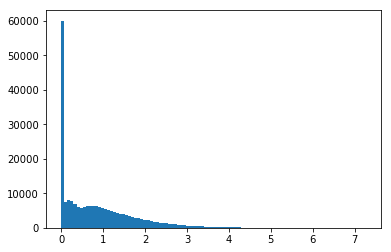

In [43]:
plt.hist(np.array(lst).mean(0).reshape([-1]),bins=100);

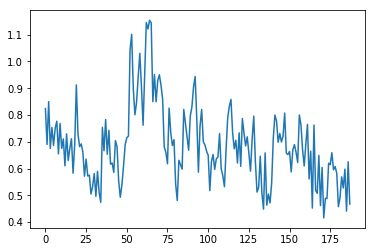

In [44]:
plt.plot(np.array(lst)[:,0,1200]);

In [45]:
for j in range(1680,1690):
    print j,np.nanmean(rawy[:,:,j],dtype=np.float),np.nanmean(y[:,:,j],dtype=np.float)

1680 1.68076379258 0.767920783369
1681 1.6817010969 0.767110917695
1682 1.62592518996 0.723749680765
1683 1.73977632686 0.821946088589
1684 1.71138398698 0.813116099178
1685 1.76363572066 0.845206885747
1686 1.69733310583 0.787718954939
1687 1.70009994492 0.789479112634
1688 nan 0.0
1689 nan 0.0


/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [46]:
for j in range(1680,1693):
    u=train_test[:,:,j]
    print j,np.nanmean(np.isnan(u),dtype=np.float),np.nanmean(u,dtype=np.float)

1680

 0.213592291478

 1.49359681379
1681

 0.214362265382

 1.45705210511
1682

 0.216620495835

 1.46630794092
1683

 0.217796095554

 1.47062584084
1684

 0.217712787313

 1.44272908524
1685

 0.217174420355

 1.47810353534
1686

 0.218934683328

 1.44905061994
1687

 0.219649829369

 1.42013354695
1688

 0.220041152263

 1.40335751804
1689

 0.220227466627

 1.39921918494
1690

 0.456670806986

 1.31885598732
1691

 0.482112441032

 1.3345727816
1692

 0.499074325003

 1.33062338786


In [47]:
np.mean(y[:,0,1688],dtype=np.float),np.mean(y[:,0,1686],dtype=np.float),np.mean(y[:,0,1687],dtype=np.float)

(0.0, 0.13274016203703703, 0.14341001157407407)

(54, 4100) 0.848855


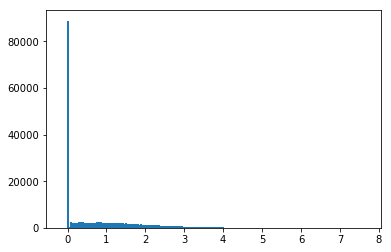

In [48]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1187]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.806146


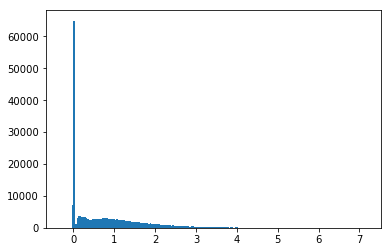

In [49]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1687]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.835325


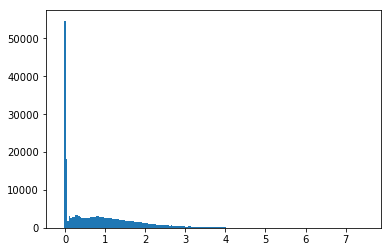

In [50]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.818108


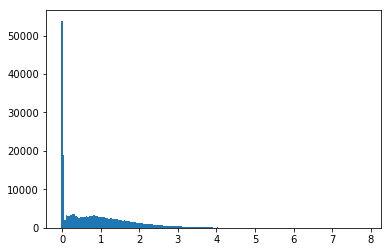

In [51]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1689]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

In [52]:
np.mean(isnan(train_test[:,:,1688]),dtype=np.float)

0.22004115226337448

In [53]:
np.mean(isnan(train_test[:,:,1687]),dtype=np.float)

0.21964982936866406

In [54]:
np.mean(isnan(train_test[:,:,1689]),dtype=np.float)

0.22022746662651813

(54, 4100) 0.835325


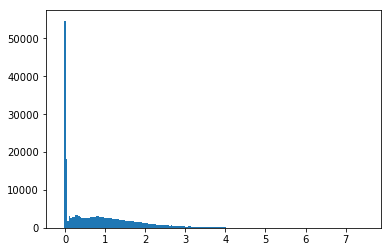

In [55]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);
pickle.dump(yy_pred3,open(a.name+".alt.pred",'wb'))

In [56]:
c=np.arange(60).reshape([3,4,5])

In [57]:
(c.reshape([-1,5]).reshape([3,4,5])==c).all()

True